In [3]:
# импортируем необходимые библиотеки, классы и функции
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import HuberRegressor

from statsmodels.tsa.api import VAR
import cp
# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')
# настроим удобное отображение графиков и таблиц
%matplotlib inline
plt.rc('figure', figsize=(18, 5))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 20
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import itertools
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import *
import scipy.special as sps
from scipy import *

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
# загрузим данные

s = pd.read_csv(
    'D:\\Michael\\Data\\Trinity\\Trinity_Value_stocks.csv', 
    index_col=1, 
    parse_dates=True)
# s['Date/Time'] = s['Date/Time'].astype('datetime64')
# s['Date/Time'] = s['Date/Time'].dt.strftime("%m/%d/%Y")
s.drop(columns=['Ticker'], inplace=True)
s


Month  MC  Business_Quality  Day_of_week    SMA    VQ  daysInSSI  \
Date/Time                                                                      
2021-05-25      5   1             -0.03            2    NaN   NaN        NaN   
2021-05-26      5   1             -0.03            3    NaN   NaN        NaN   
2021-05-27      5   1             -0.03            4    NaN   NaN        NaN   
2021-05-28      5   1             -0.03            5    NaN   NaN        NaN   
2021-06-01      6   1              0.06            2    NaN   NaN        NaN   
...           ...  ..               ...          ...    ...   ...        ...   
2023-03-02      0   2             -0.07            0 171.00 34.67     570.35   
2023-03-03      0   2             -0.07            0 171.00 34.67     571.35   
2023-03-06      0   2             -0.07            0 171.00 33.74     572.34   
2023-03-07      0   2             -0.07            0 171.00 33.74     573.34   
2023-03-08      0   2             -0.07            0 171.00 33.74     574.34   

            SmithRank  GV_value  GV_rank  Trend  Slope_of_trend  value  
Date/Time                                                               
2021-05-25        NaN      1.53   328.00    NaN            1.00      0  
2021-05-26        NaN      1.50   332.00    NaN            1.00      0  
2021-05-27        NaN      1.50   336.00    NaN            1.00      0  
2021-05-28        NaN      1.52   330.00    NaN            0.99      0  
2021-06-01        NaN      1.51   332.00    NaN            1.00      0  
...               ...       ...      ...    ...             ...    ...  
2023-03-02     161.00      2.46   588.00  -2.00            0.97      0  
2023-03-03     164.00      2.35   585.00  -2.00            0.99      0  
2023-03-06     165.00      2.26   583.00  -2.00            0.98      0  
2023-03-07     166.00      2.49   587.00  -2.00            0.93      0  
2023-03-08     168.00      2.43   583.00  -2.00            0.94      0  

[1393198 rows x 13 columns]

In [3]:
s = s.dropna()
s

Month  MC  Business_Quality  Day_of_week    SMA    VQ  daysInSSI  \
Date/Time                                                                      
2021-02-01      2   2             -0.32            1 297.00 41.94     163.42   
2021-02-02      2   2             -0.32            2 297.00 41.94     164.42   
2021-02-03      2   2             -0.32            3 297.00 41.94     165.42   
2021-02-04      2   2             -0.32            4 297.00 41.94     166.42   
2021-02-05      2   2             -0.32            5 297.00 41.94     167.42   
...           ...  ..               ...          ...    ...   ...        ...   
2023-03-02      0   2             -0.07            0 171.00 34.67     570.35   
2023-03-03      0   2             -0.07            0 171.00 34.67     571.35   
2023-03-06      0   2             -0.07            0 171.00 33.74     572.34   
2023-03-07      0   2             -0.07            0 171.00 33.74     573.34   
2023-03-08      0   2             -0.07            0 171.00 33.74     574.34   

            SmithRank  GV_value  GV_rank  Trend  Slope_of_trend  value  
Date/Time                                                               
2021-02-01       0.00     28.14   678.00   1.00            1.43      1  
2021-02-02       0.00     25.91   683.00   1.00            1.45      1  
2021-02-03       0.00     24.54   683.00   1.00            1.50      1  
2021-02-04       0.00     26.64   680.00   1.00            1.53      1  
2021-02-05       0.00     24.67   684.00   1.00            1.57      1  
...               ...       ...      ...    ...             ...    ...  
2023-03-02     161.00      2.46   588.00  -2.00            0.97      0  
2023-03-03     164.00      2.35   585.00  -2.00            0.99      0  
2023-03-06     165.00      2.26   583.00  -2.00            0.98      0  
2023-03-07     166.00      2.49   587.00  -2.00            0.93      0  
2023-03-08     168.00      2.43   583.00  -2.00            0.94      0  

[1212615 rows x 13 columns]

In [47]:
s.columns

Index(['Month', 'MC', 'Business_Quality', 'Day_of_week', 'SMA', 'VQ',
       'daysInSSI', 'SmithRank', 'GV_value', 'GV_rank', 'Trend',
       'Slope_of_trend', 'value'],
      dtype='object')

In [11]:
s_edit = s.drop(columns=['Month', 'MC', 'Day_of_week', 'SMA', 'VQ', 'SmithRank', 'GV_rank', 'Trend', 'daysInSSI'])
s_edit

Business_Quality  GV_value  Slope_of_trend  value
Date/Time                                                    
2021-02-01             -0.32     28.14            1.43      1
2021-02-02             -0.32     25.91            1.45      1
2021-02-03             -0.32     24.54            1.50      1
2021-02-04             -0.32     26.64            1.53      1
2021-02-05             -0.32     24.67            1.57      1
...                      ...       ...             ...    ...
2023-03-02             -0.07      2.46            0.97      0
2023-03-03             -0.07      2.35            0.99      0
2023-03-06             -0.07      2.26            0.98      0
2023-03-07             -0.07      2.49            0.93      0
2023-03-08             -0.07      2.43            0.94      0

[1212615 rows x 4 columns]

In [6]:
train = s_edit[(s_edit.index.year <= 2021)]
test = s_edit[s_edit.index.year == 2022]
X_train = train.drop(columns=['value'])
y_train = train['value']
X_test = test.drop(columns=['value'])
y_test = test['value']
X_test

Business_Quality  GV_rank  Slope_of_trend
Date/Time                                            
2022-01-03              0.26   615.00            1.27
2022-01-04              0.26   627.00            1.21
2022-01-05              0.26   621.00            1.23
2022-01-06              0.26   618.00            1.22
2022-01-07              0.26   601.00            1.31
...                      ...      ...             ...
2022-12-19             -0.07   511.00            0.86
2022-12-20             -0.07   487.00            0.87
2022-12-21             -0.07   473.00            0.90
2022-12-23             -0.07   462.00            0.92
2022-12-29             -0.07   462.00            0.93

[181934 rows x 3 columns]

In [29]:
# train = s[(s.index.year <= 2020)]
# test = s[s.index.year == 2021]
# X_train = train.drop(columns=['value'])
# y_train = train['value']
# X_test = test.drop(columns=['value'])
# y_test = test['value']
# X_test

Month  MC  Business_Quality  Day_of_week    SMA    VQ  daysInSSI  \
Date/Time                                                                      
2021-02-01      2   2             -0.32            1 297.00 41.94     163.42   
2021-02-02      2   2             -0.32            2 297.00 41.94     164.42   
2021-02-03      2   2             -0.32            3 297.00 41.94     165.42   
2021-02-04      2   2             -0.32            4 297.00 41.94     166.42   
2021-02-05      2   2             -0.32            5 297.00 41.94     167.42   
...           ...  ..               ...          ...    ...   ...        ...   
2021-11-26     11   3              0.32            5 170.00 31.97     254.32   
2021-11-29     11   3              0.32            1 170.00 31.98     255.32   
2021-11-30     11   3              0.35            2 170.00 31.98     256.32   
2021-12-03     12   3              0.35            5 170.00 31.98     259.32   
2021-12-08     12   3              0.35            3 170.00 32.02     262.32   

            SmithRank  GV_value  GV_rank  Trend  Slope_of_trend  
Date/Time                                                        
2021-02-01       0.00     28.14   678.00   1.00            1.43  
2021-02-02       0.00     25.91   683.00   1.00            1.45  
2021-02-03       0.00     24.54   683.00   1.00            1.50  
2021-02-04       0.00     26.64   680.00   1.00            1.53  
2021-02-05       0.00     24.67   684.00   1.00            1.57  
...               ...       ...      ...    ...             ...  
2021-11-26     121.00      2.87   555.00   1.00            1.14  
2021-11-29     117.00      2.76   539.00   1.00            1.15  
2021-11-30     119.00      2.61   529.00   1.00            1.12  
2021-12-03     121.00      3.12   559.00   1.00            1.09  
2021-12-08     124.00      3.24   573.00   1.00            1.11  

[168285 rows x 12 columns]

In [7]:
std_scaler = MinMaxScaler()
std_scaler.fit(X_train)
std_scaled = std_scaler.transform(X_train)
std_scaled_test = std_scaler.transform(X_test)
X_train[X_train.columns] = std_scaled
X_test[X_test.columns] = std_scaled_test
X_train

Business_Quality  GV_rank  Slope_of_trend
Date/Time                                            
2021-02-01              0.42     0.89            0.26
2021-02-02              0.42     0.90            0.26
2021-02-03              0.42     0.90            0.27
2021-02-04              0.42     0.90            0.28
2021-02-05              0.42     0.90            0.29
...                      ...      ...             ...
2021-11-26              0.67     0.67            0.20
2021-11-29              0.67     0.64            0.21
2021-11-30              0.69     0.62            0.20
2021-12-03              0.69     0.68            0.19
2021-12-08              0.69     0.70            0.20

[999496 rows x 3 columns]

In [23]:
X_train_corr = X_train.corr(method='pearson')
X_train_corr

Month    MC  Business_Quality  Day_of_week   SMA    VQ  \
Month              1.00  0.01             -0.00        -0.02 -0.00  0.06   
MC                 0.01  1.00              0.27        -0.00 -0.05 -0.37   
Business_Quality  -0.00  0.27              1.00         0.00 -0.03 -0.28   
Day_of_week       -0.02 -0.00              0.00         1.00 -0.00 -0.00   
SMA               -0.00 -0.05             -0.03        -0.00  1.00  0.00   
VQ                 0.06 -0.37             -0.28        -0.00  0.00  1.00   
daysInSSI         -0.02 -0.05              0.05        -0.00  0.11 -0.05   
SmithRank          0.01  0.04             -0.11        -0.00  0.02 -0.06   
GV_value           0.00 -0.01             -0.05         0.00 -0.02  0.10   
GV_rank            0.04  0.02             -0.10         0.00  0.01  0.12   
Trend              0.01  0.17              0.05         0.00 -0.09 -0.12   
Slope_of_trend     0.10  0.14              0.03        -0.00 -0.01 -0.01   

                  daysInSSI  SmithRank  GV_value  GV_rank  Trend  \
Month                 -0.02       0.01      0.00     0.04   0.01   
MC                    -0.05       0.04     -0.01     0.02   0.17   
Business_Quality       0.05      -0.11     -0.05    -0.10   0.05   
Day_of_week           -0.00      -0.00      0.00     0.00   0.00   
SMA                    0.11       0.02     -0.02     0.01  -0.09   
VQ                    -0.05      -0.06      0.10     0.12  -0.12   
daysInSSI              1.00       0.34     -0.02    -0.17  -0.29   
SmithRank              0.34       1.00      0.08     0.25  -0.13   
GV_value              -0.02       0.08      1.00     0.23  -0.06   
GV_rank               -0.17       0.25      0.23     1.00  -0.12   
Trend                 -0.29      -0.13     -0.06    -0.12   1.00   
Slope_of_trend        -0.11      -0.04     -0.07    -0.07   0.45   

                  Slope_of_trend  
Month                       0.10  
MC                          0.14  
Business_Quality            0.03  
Day_of_week                -0.00  
SMA                        -0.01  
VQ                         -0.01  
daysInSSI                  -0.11  
SmithRank                  -0.04  
GV_value                   -0.07  
GV_rank                    -0.07  
Trend                       0.45  
Slope_of_trend              1.00

<AxesSubplot:>

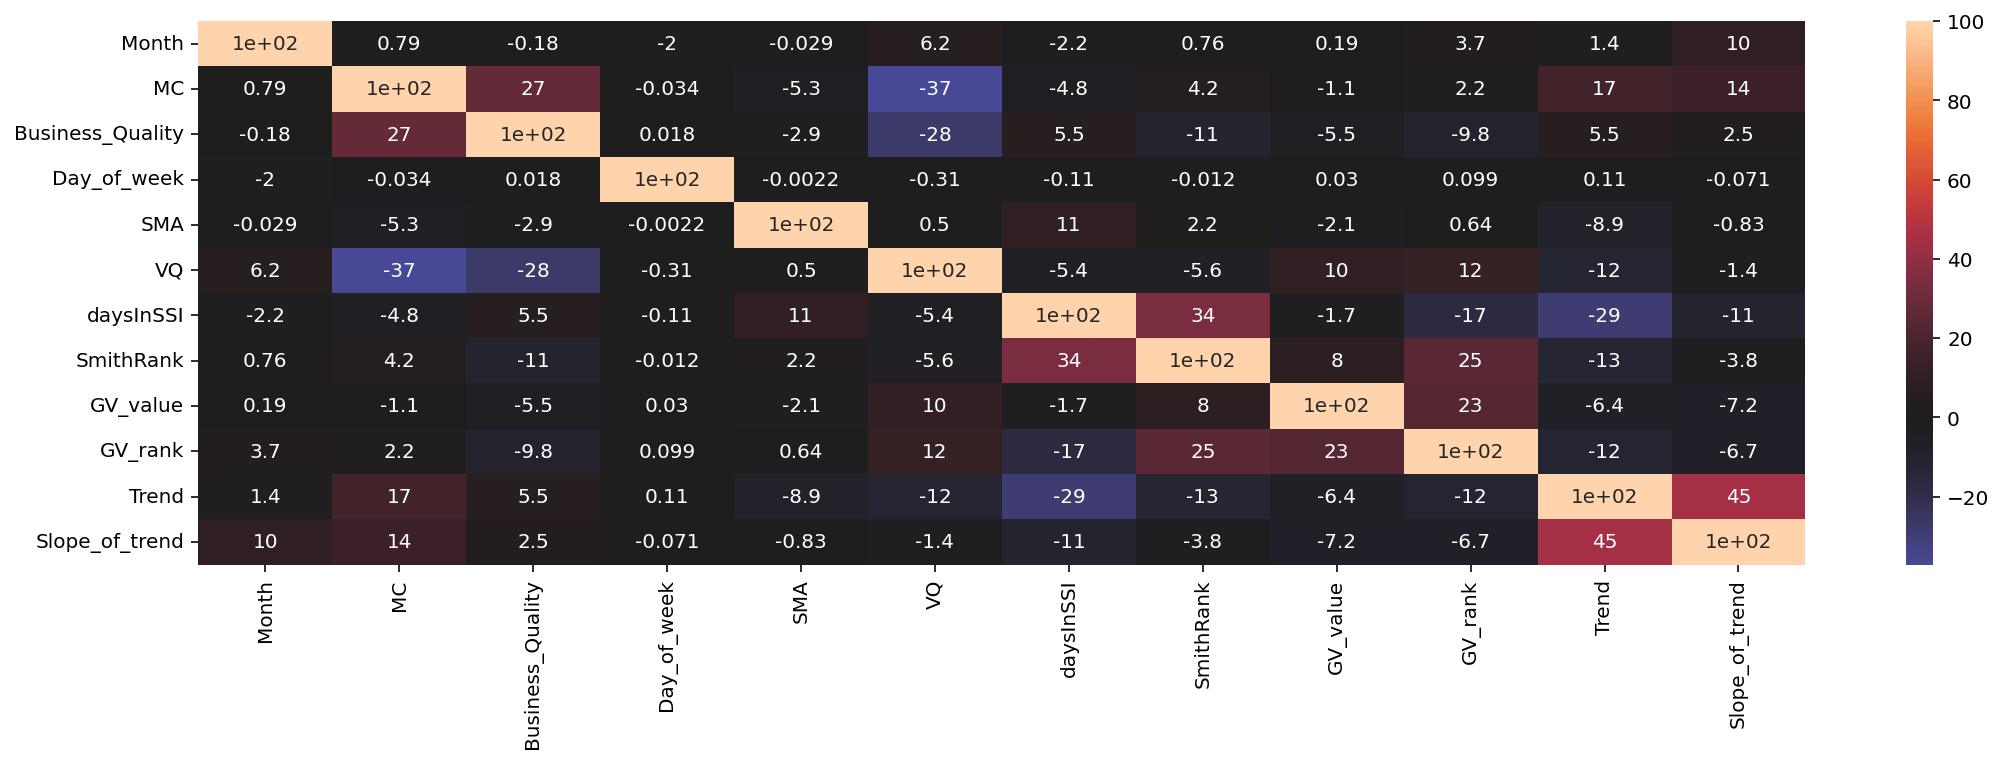

In [24]:
sns.heatmap(X_train_corr*100, center=0, annot=True)

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


from sklearn.neural_network import MLPClassifier


from sklearn.ensemble import BaggingClassifier








import time
t0 = time.time()
lr_model = RandomForestClassifier(random_state=42)
lr_model.fit(X_train, y_train)
lr_model.random_state

lr_y = y_test.values

lr_y_pred = lr_model.predict_proba(X_test)
tF = time.time()


lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
print('roc_auc = %.2f' % lr_rocauc)
print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
## Time to train = 0.00 seconds

roc_auc = 0.51
Time to train = 180.76 seconds


roc_auc = 0.41

Time to train = 147.80 seconds
All data normalized


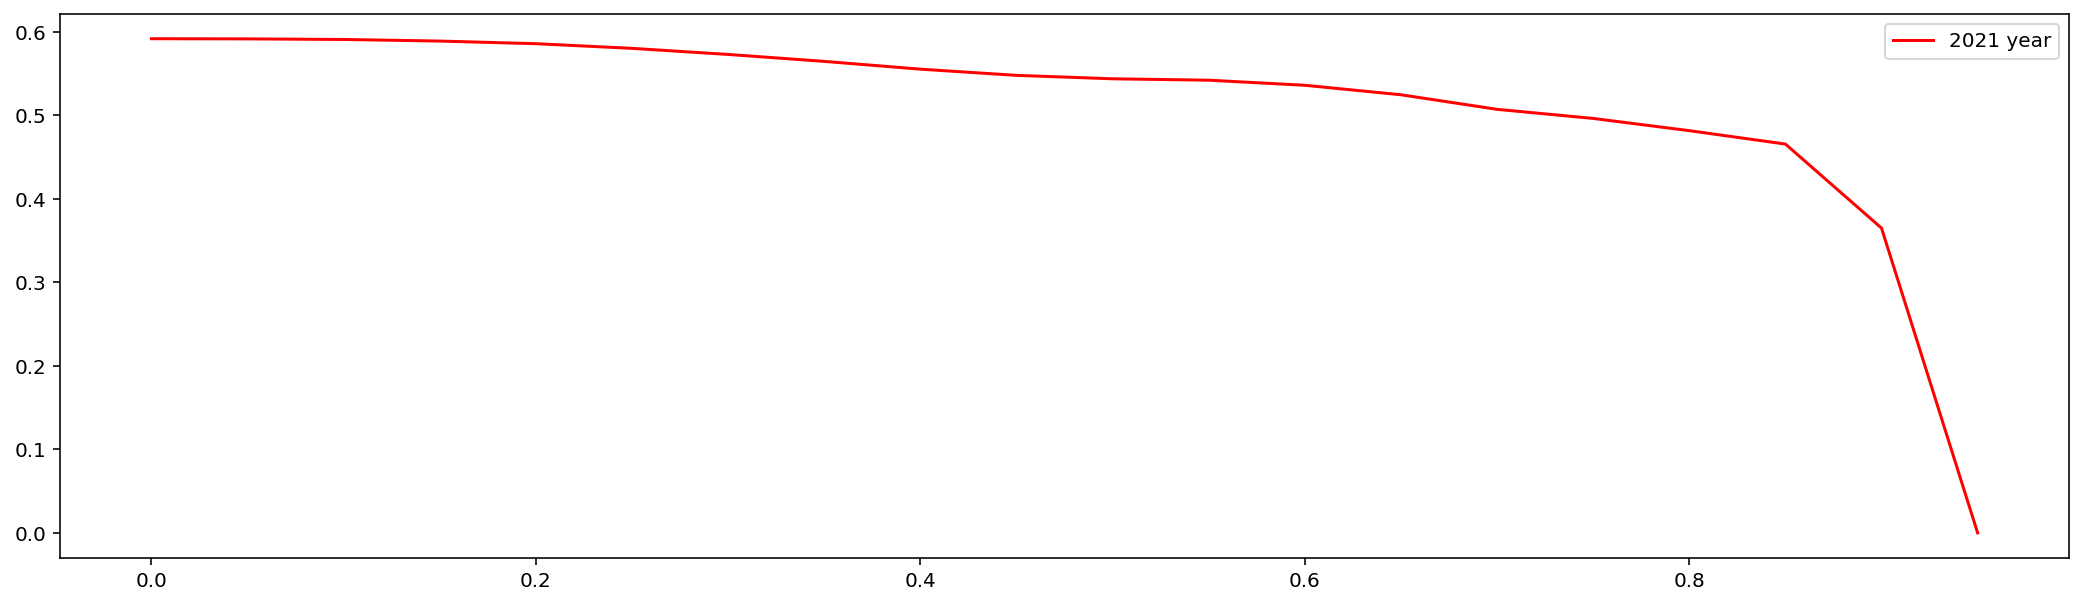

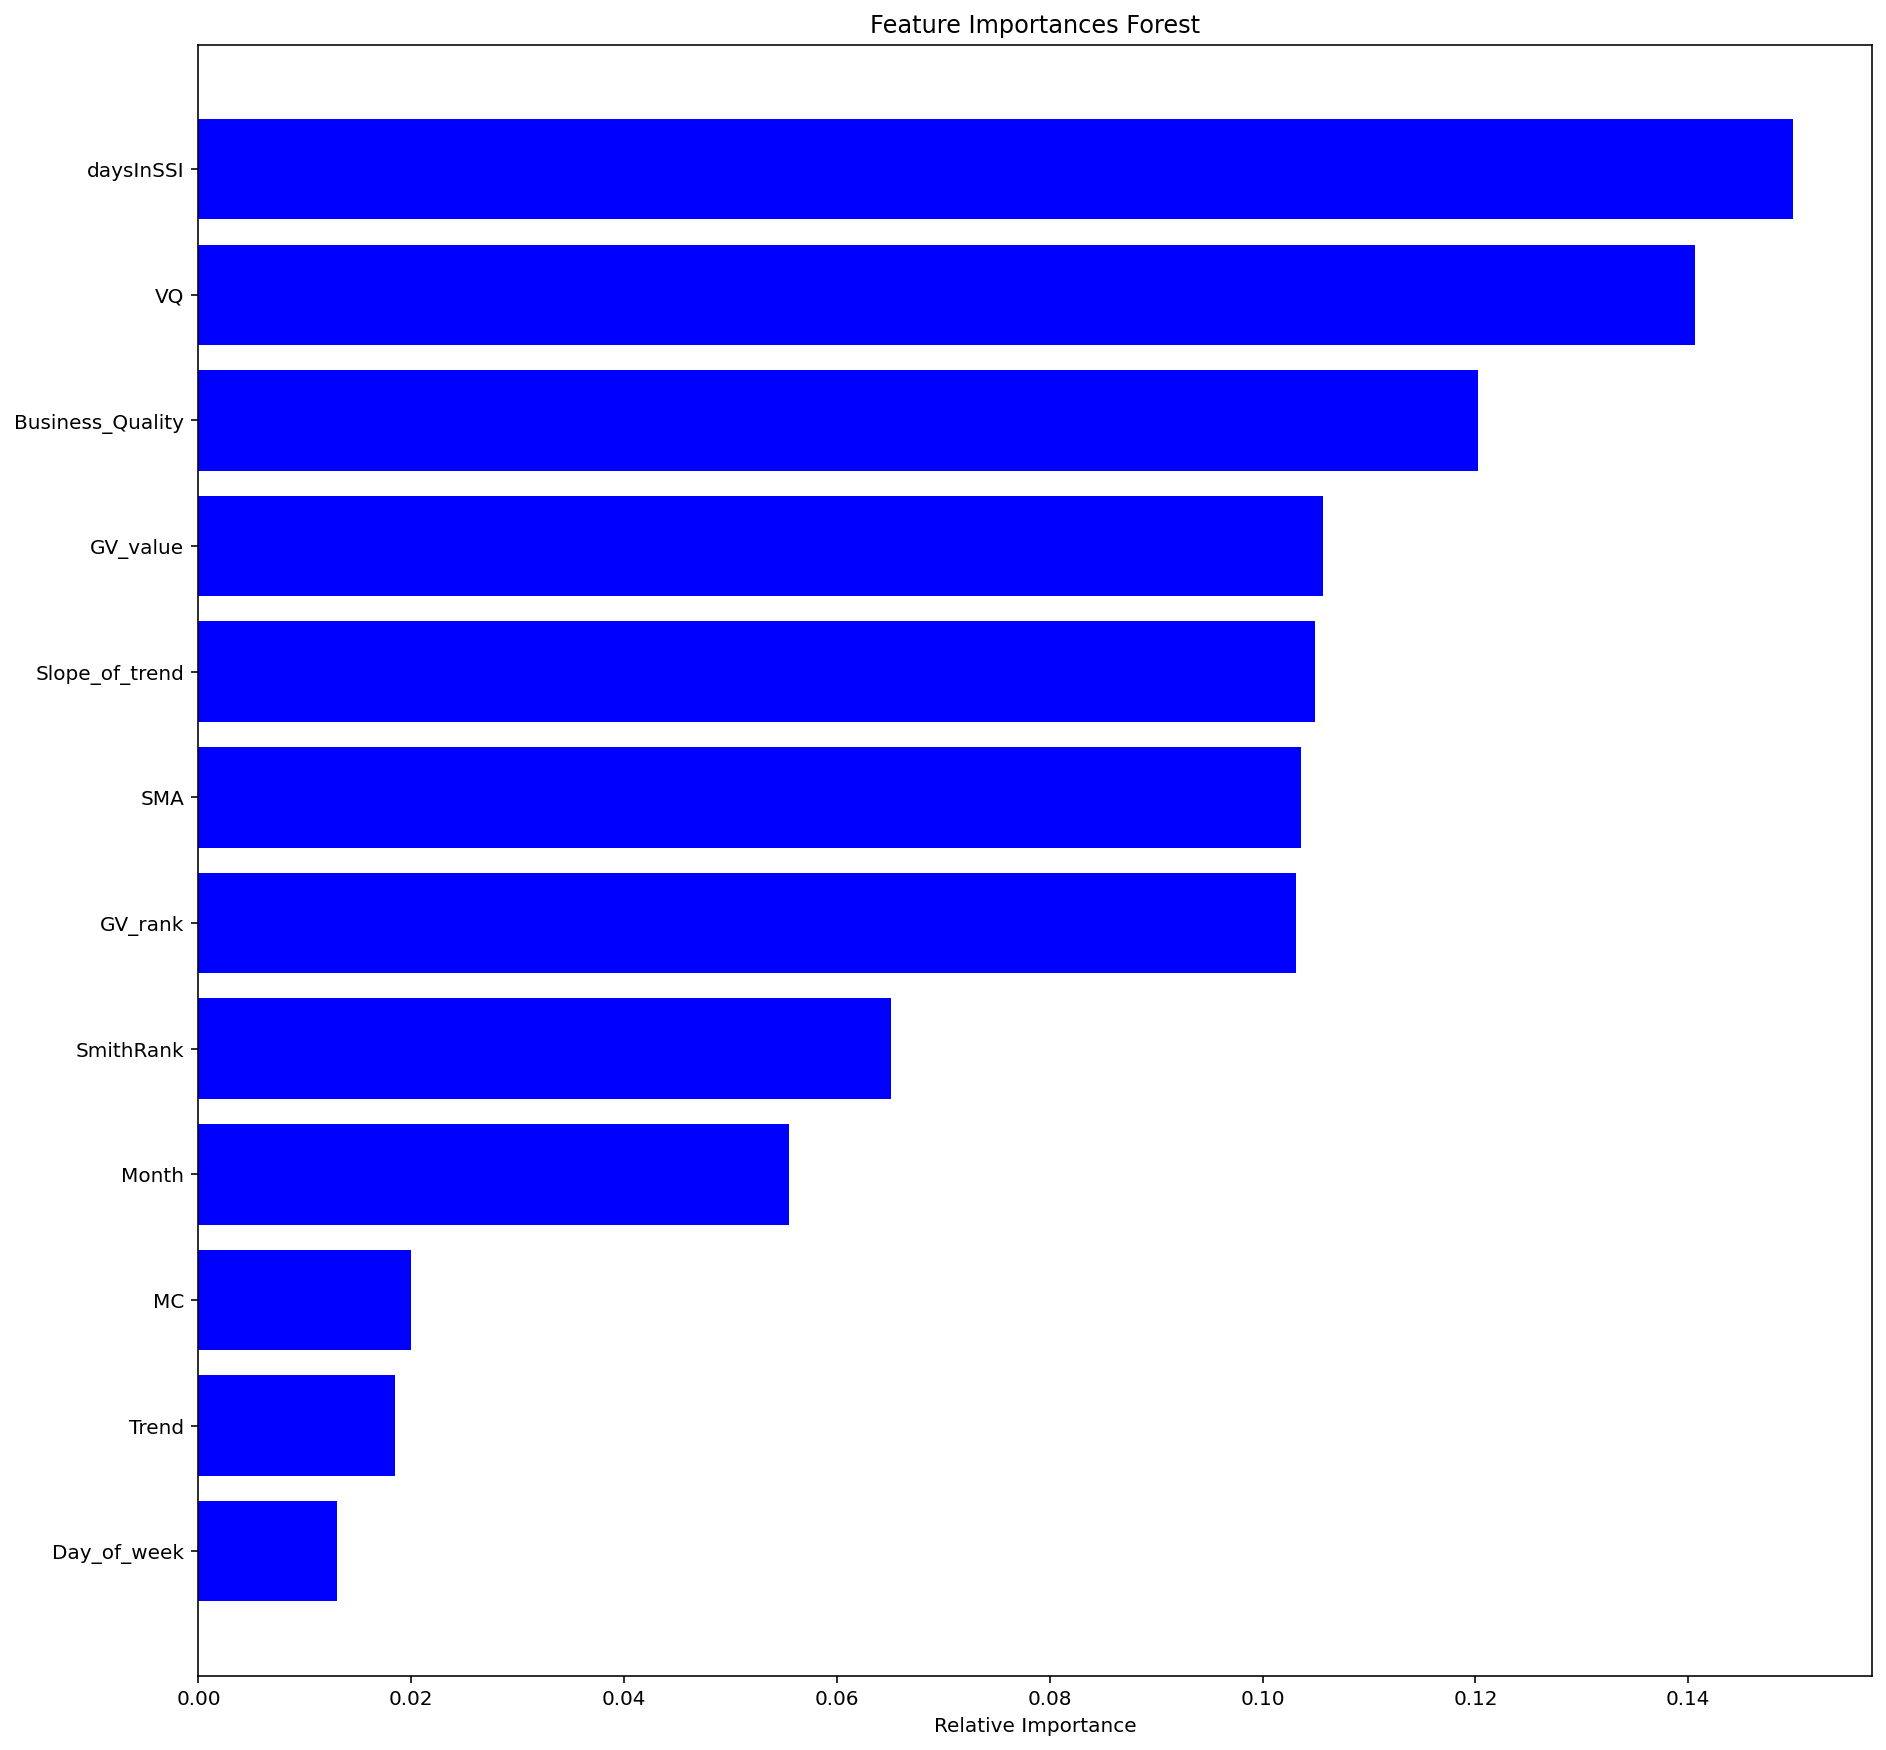

In [28]:
print('roc_auc = %.2f' % lr_rocauc)
print('')
print('Time to train = %.2f seconds' % (tF - t0))
print('All data normalized')
probs_val = lr_y_pred[:,1]
precision = []
for j in np.arange(0,1,0.05):

    cl = (probs_val > j).astype(int)
    precision.append(precision_score(y_test, cl))



plt.plot(np.arange(0,1,0.05), precision, color='red', label=f'{2020+1} year')
plt.legend()
plt.show()
features = X_train.columns
importances = lr_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15, 15))
plt.title('Feature Importances Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

roc_auc = 0.42

Time to train = 148.54 seconds
All data not normalized


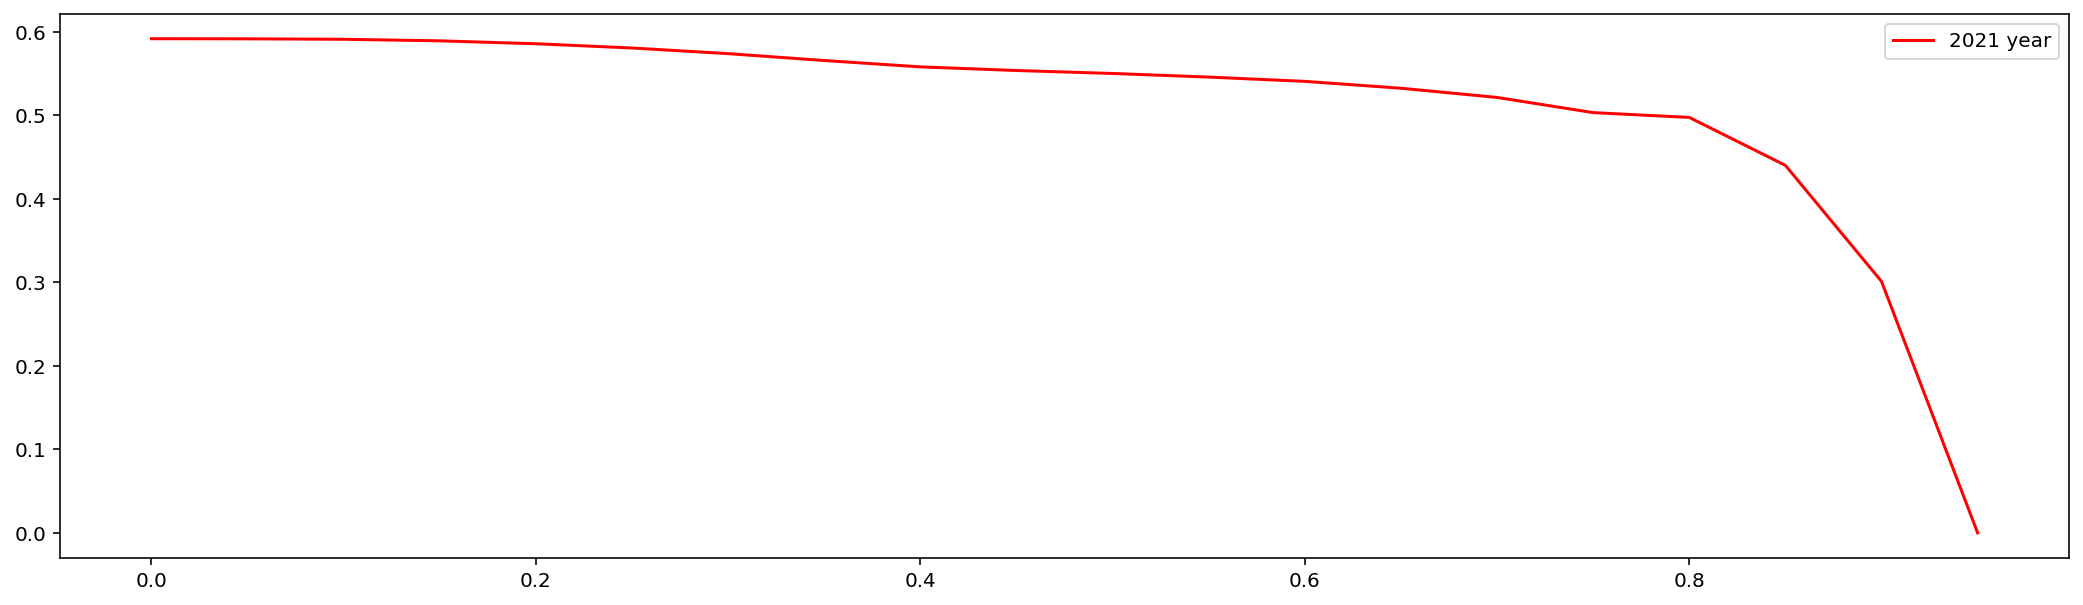

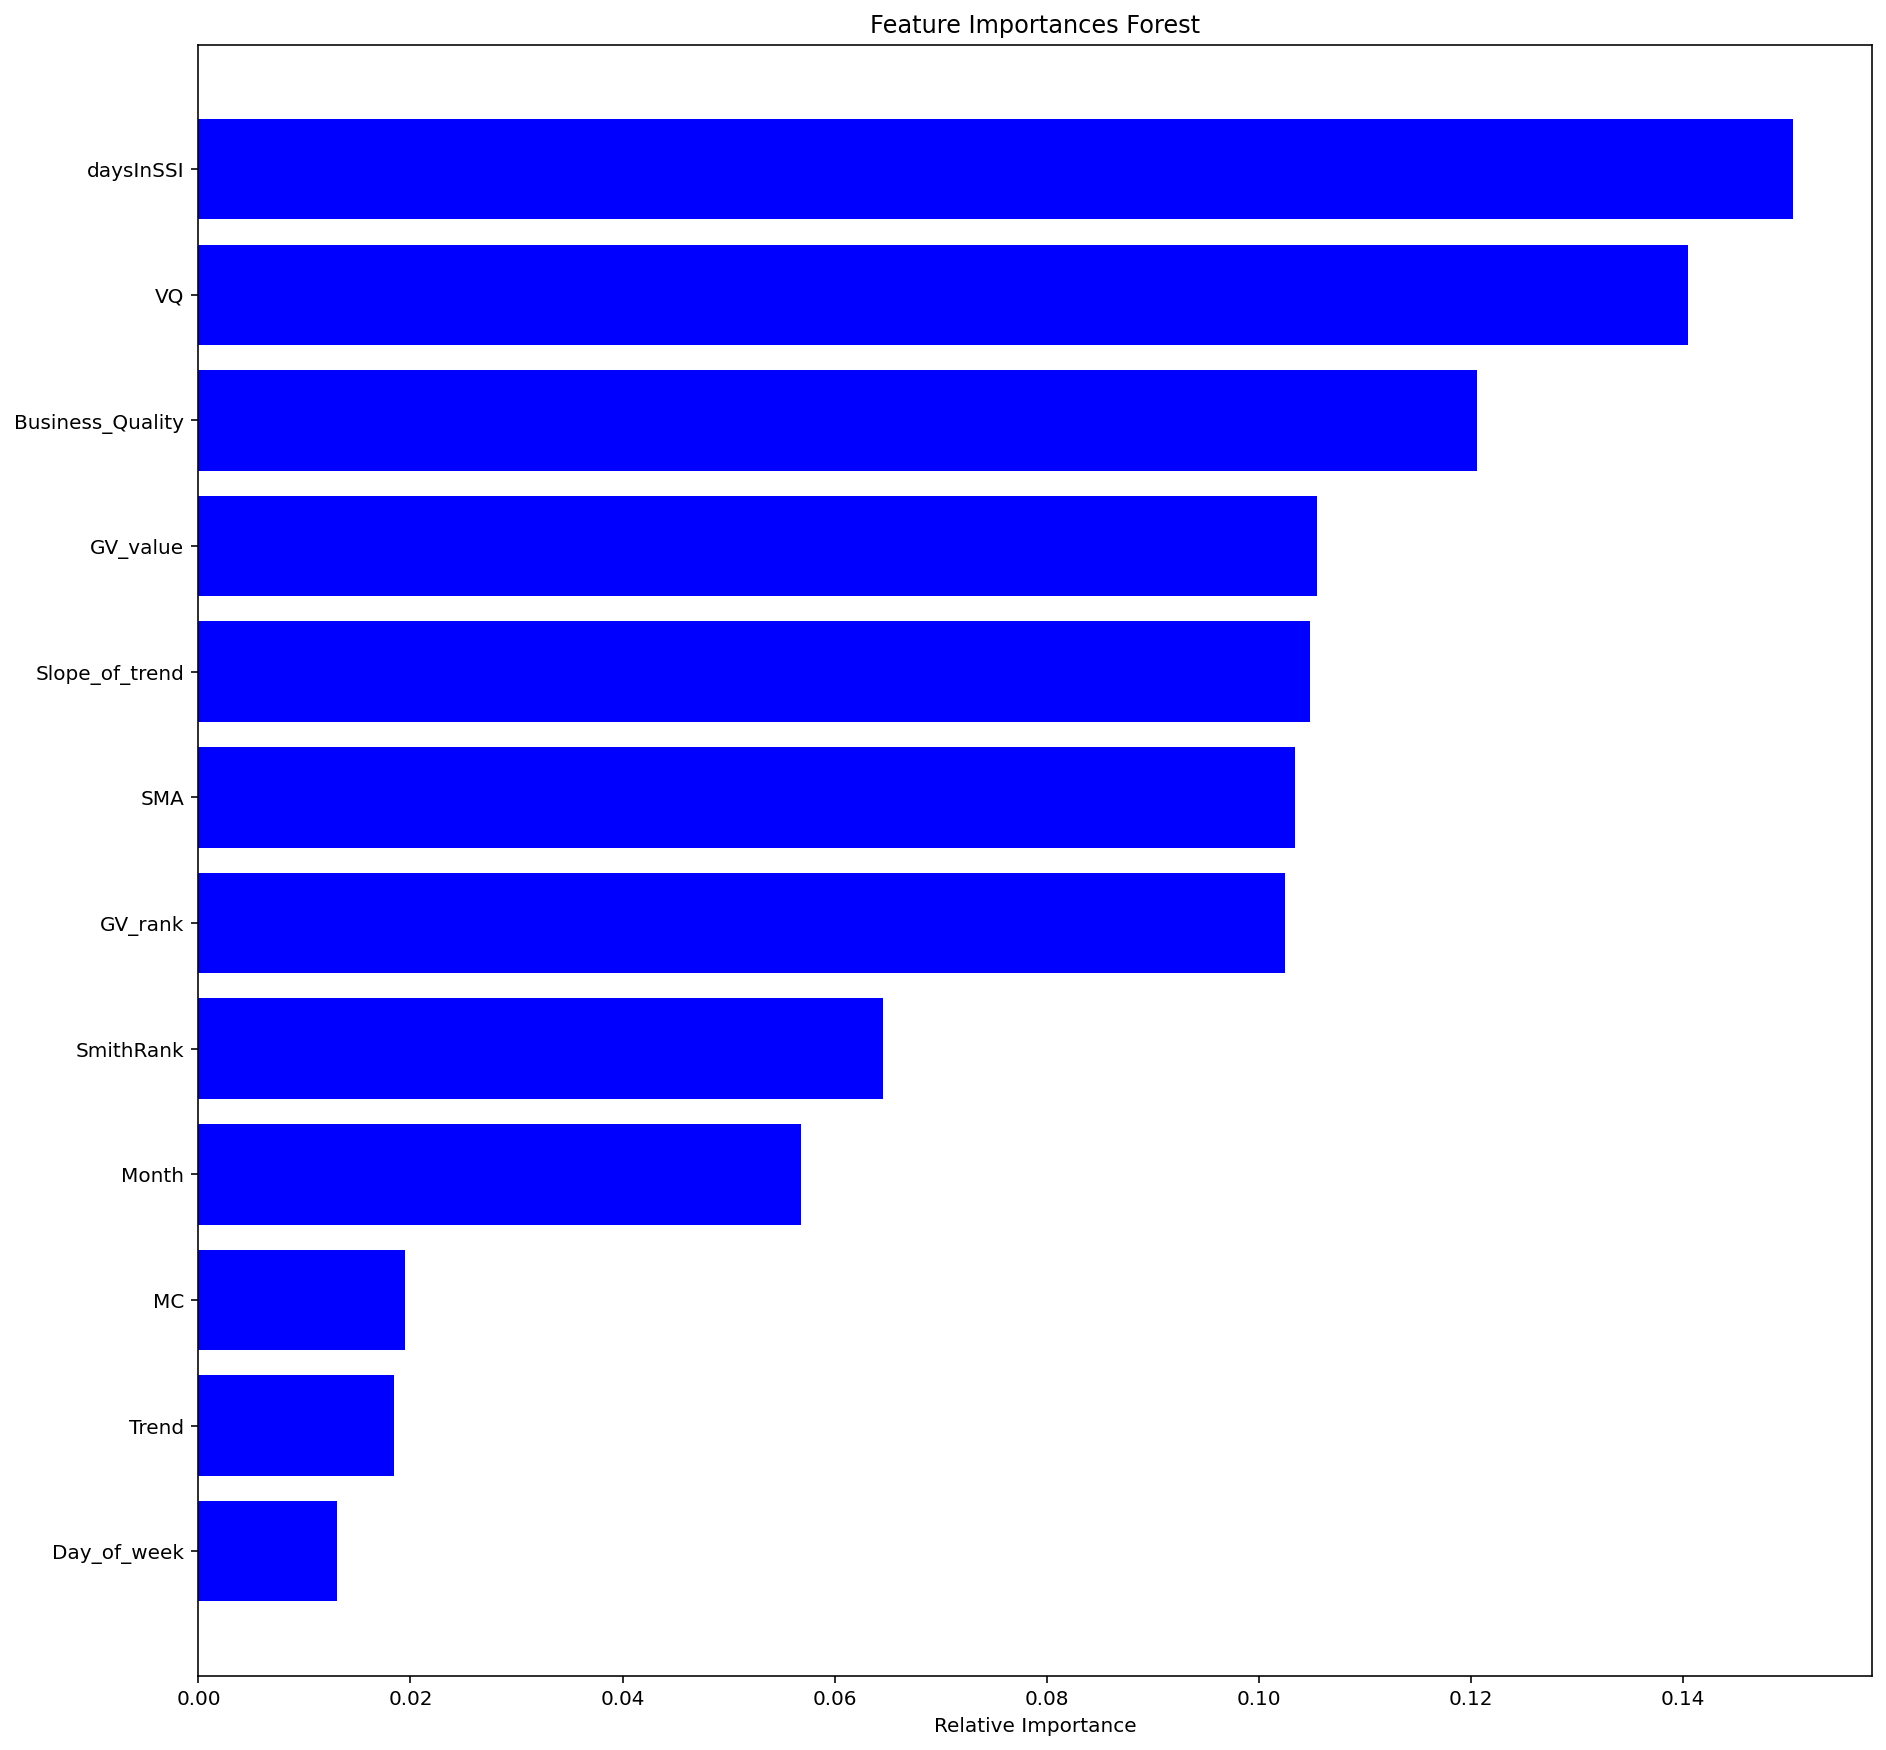

In [31]:
print('roc_auc = %.2f' % lr_rocauc)
print('')
print('Time to train = %.2f seconds' % (tF - t0))
print('All data not normalized')
probs_val = lr_y_pred[:,1]
precision = []
for j in np.arange(0,1,0.05):

    cl = (probs_val > j).astype(int)
    precision.append(precision_score(y_test, cl))



plt.plot(np.arange(0,1,0.05), precision, color='red', label=f'{2020+1} year')
plt.legend()
plt.show()
features = X_train.columns
importances = lr_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15, 15))
plt.title('Feature Importances Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

roc_auc = 0.42

Time to train = 157.28 seconds
Without Trend normalized


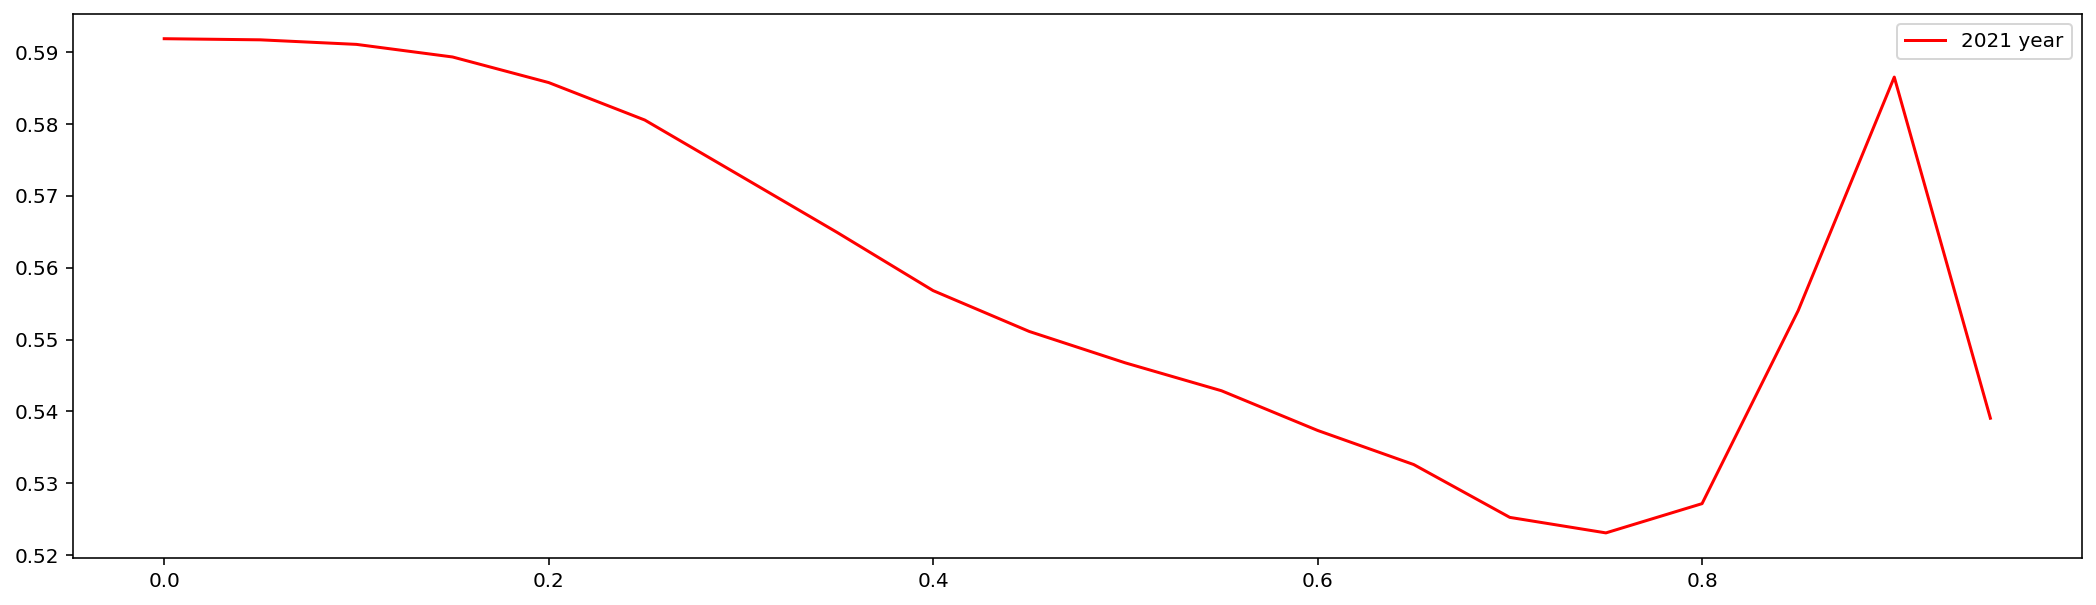

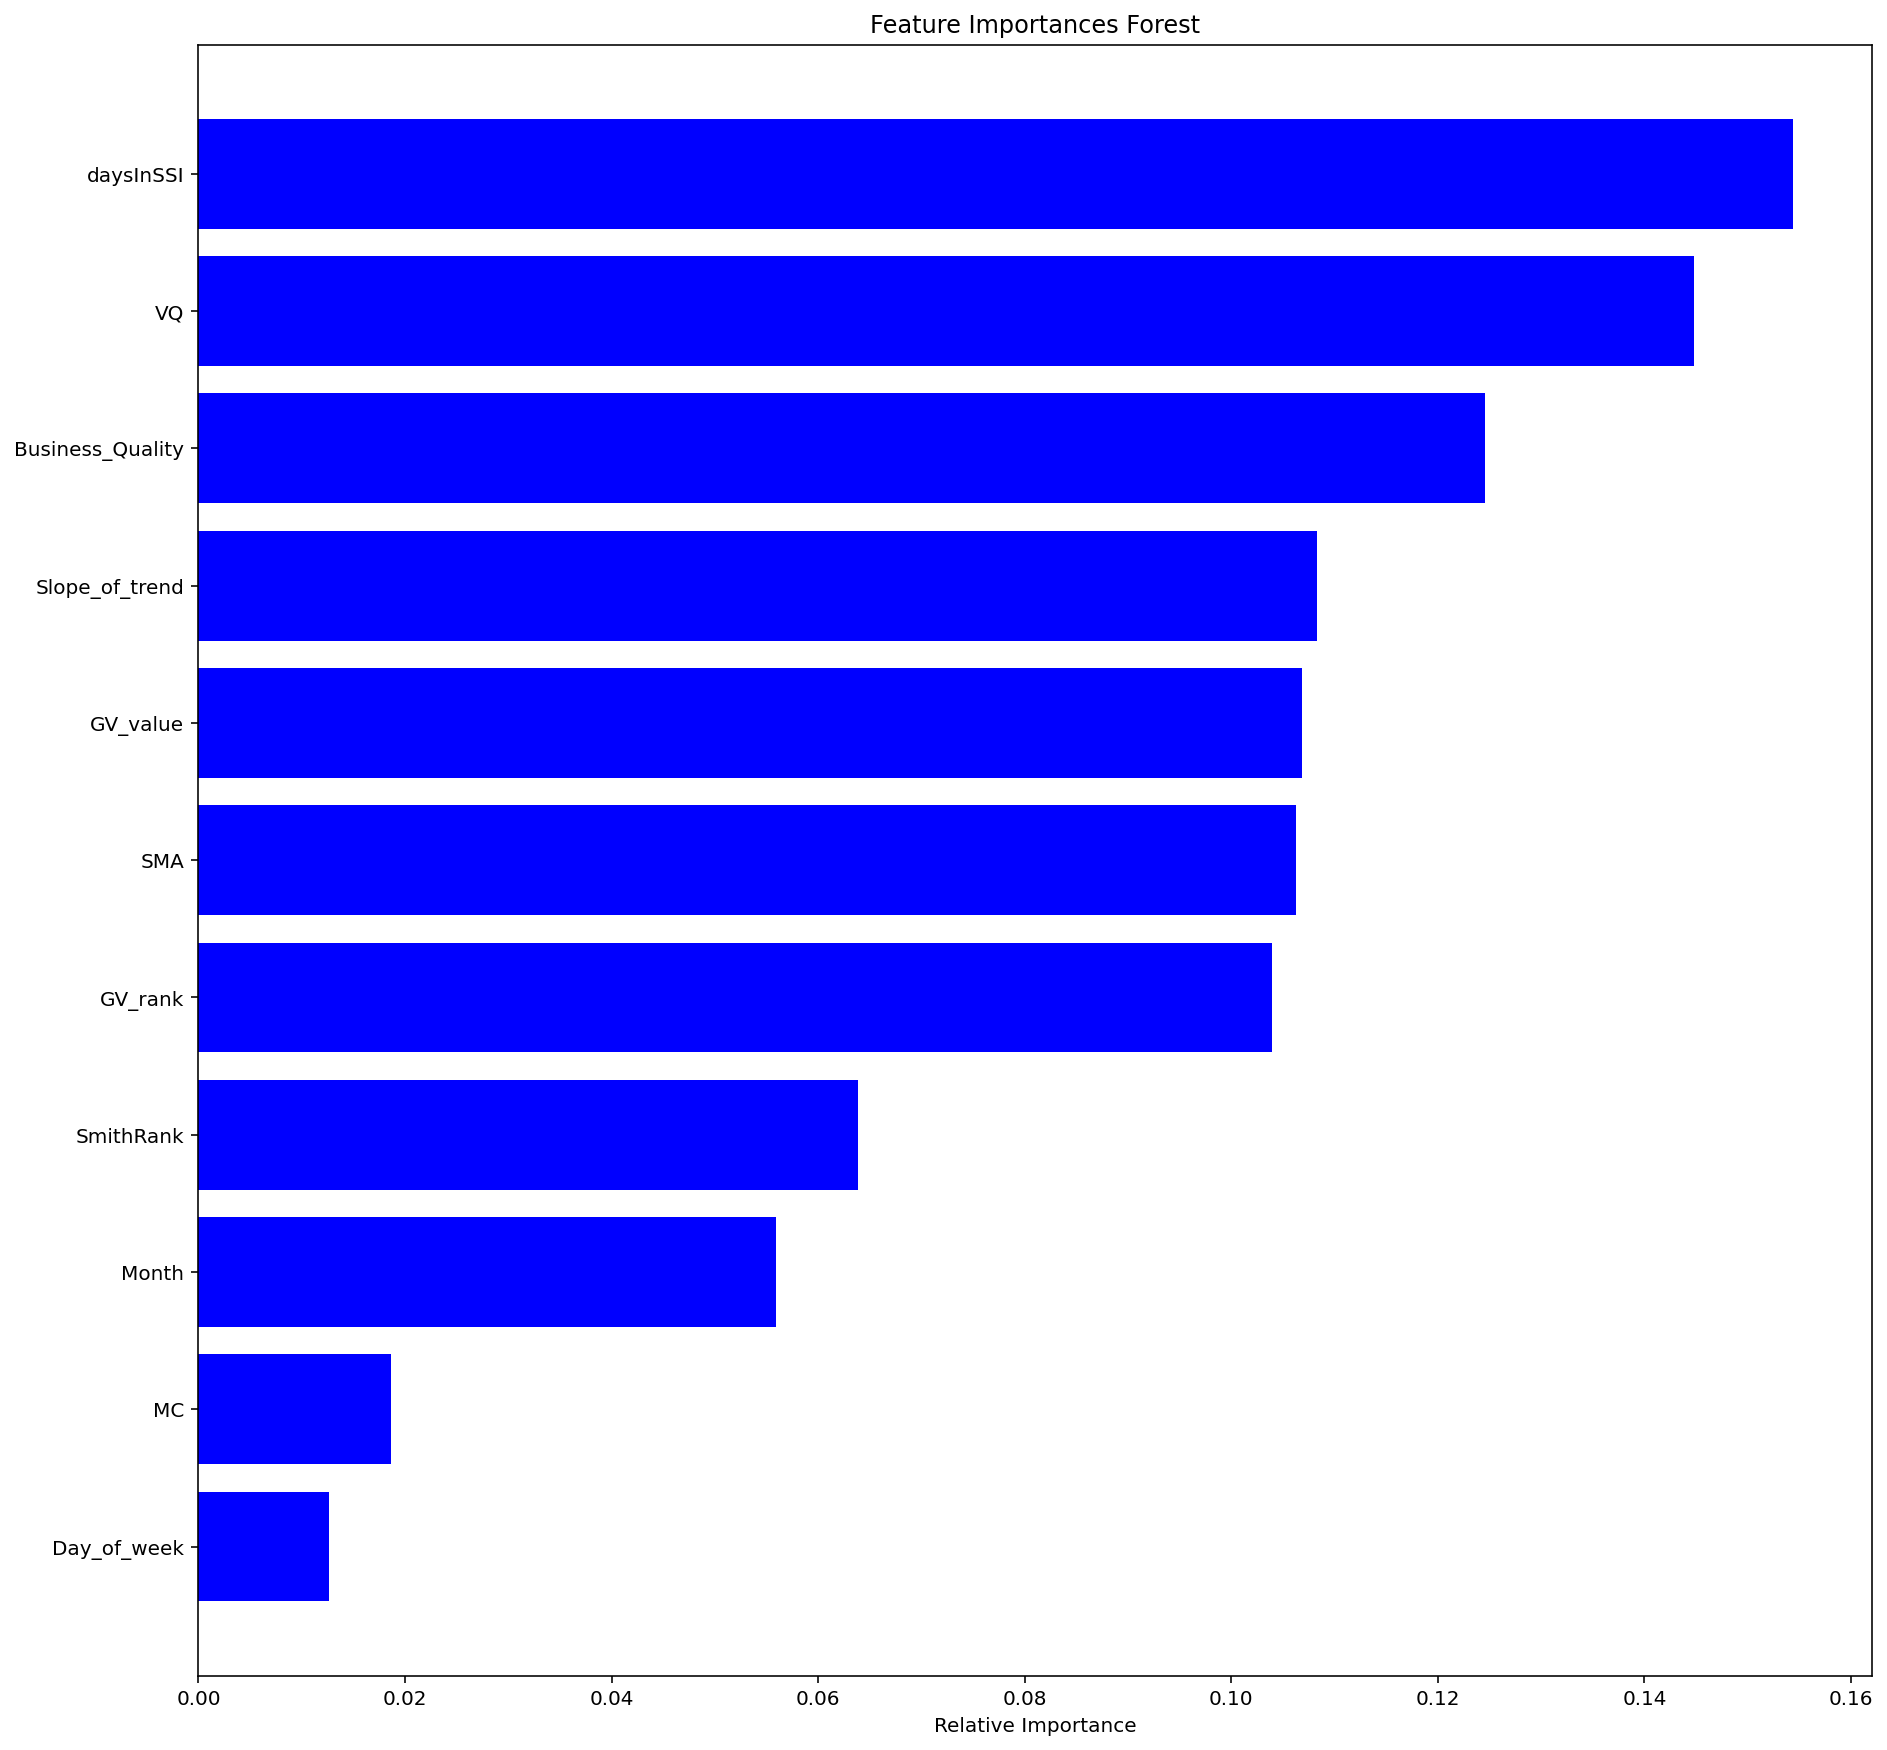

In [36]:
print('roc_auc = %.2f' % lr_rocauc)
print('')
print('Time to train = %.2f seconds' % (tF - t0))
print('Without Trend normalized')
probs_val = lr_y_pred[:,1]
precision = []
for j in np.arange(0,1,0.05):

    cl = (probs_val > j).astype(int)
    precision.append(precision_score(y_test, cl))



plt.plot(np.arange(0,1,0.05), precision, color='red', label=f'{2020+1} year')
plt.legend()
plt.show()
features = X_train.columns
importances = lr_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15, 15))
plt.title('Feature Importances Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

roc_auc = 0.42

Time to train = 175.69 seconds
Without (Trend, MC, Day_of_week) normalized


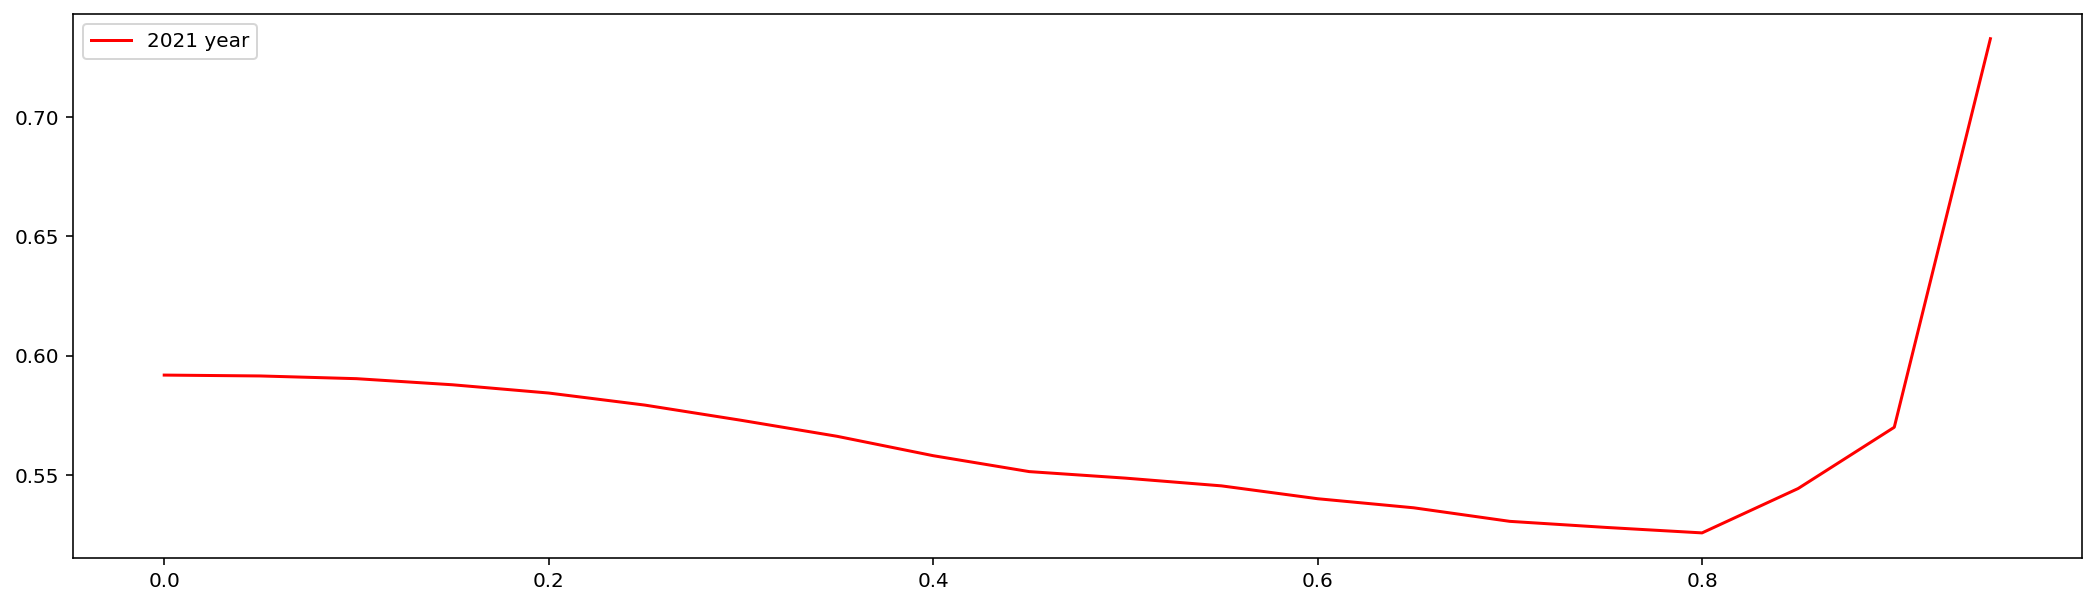

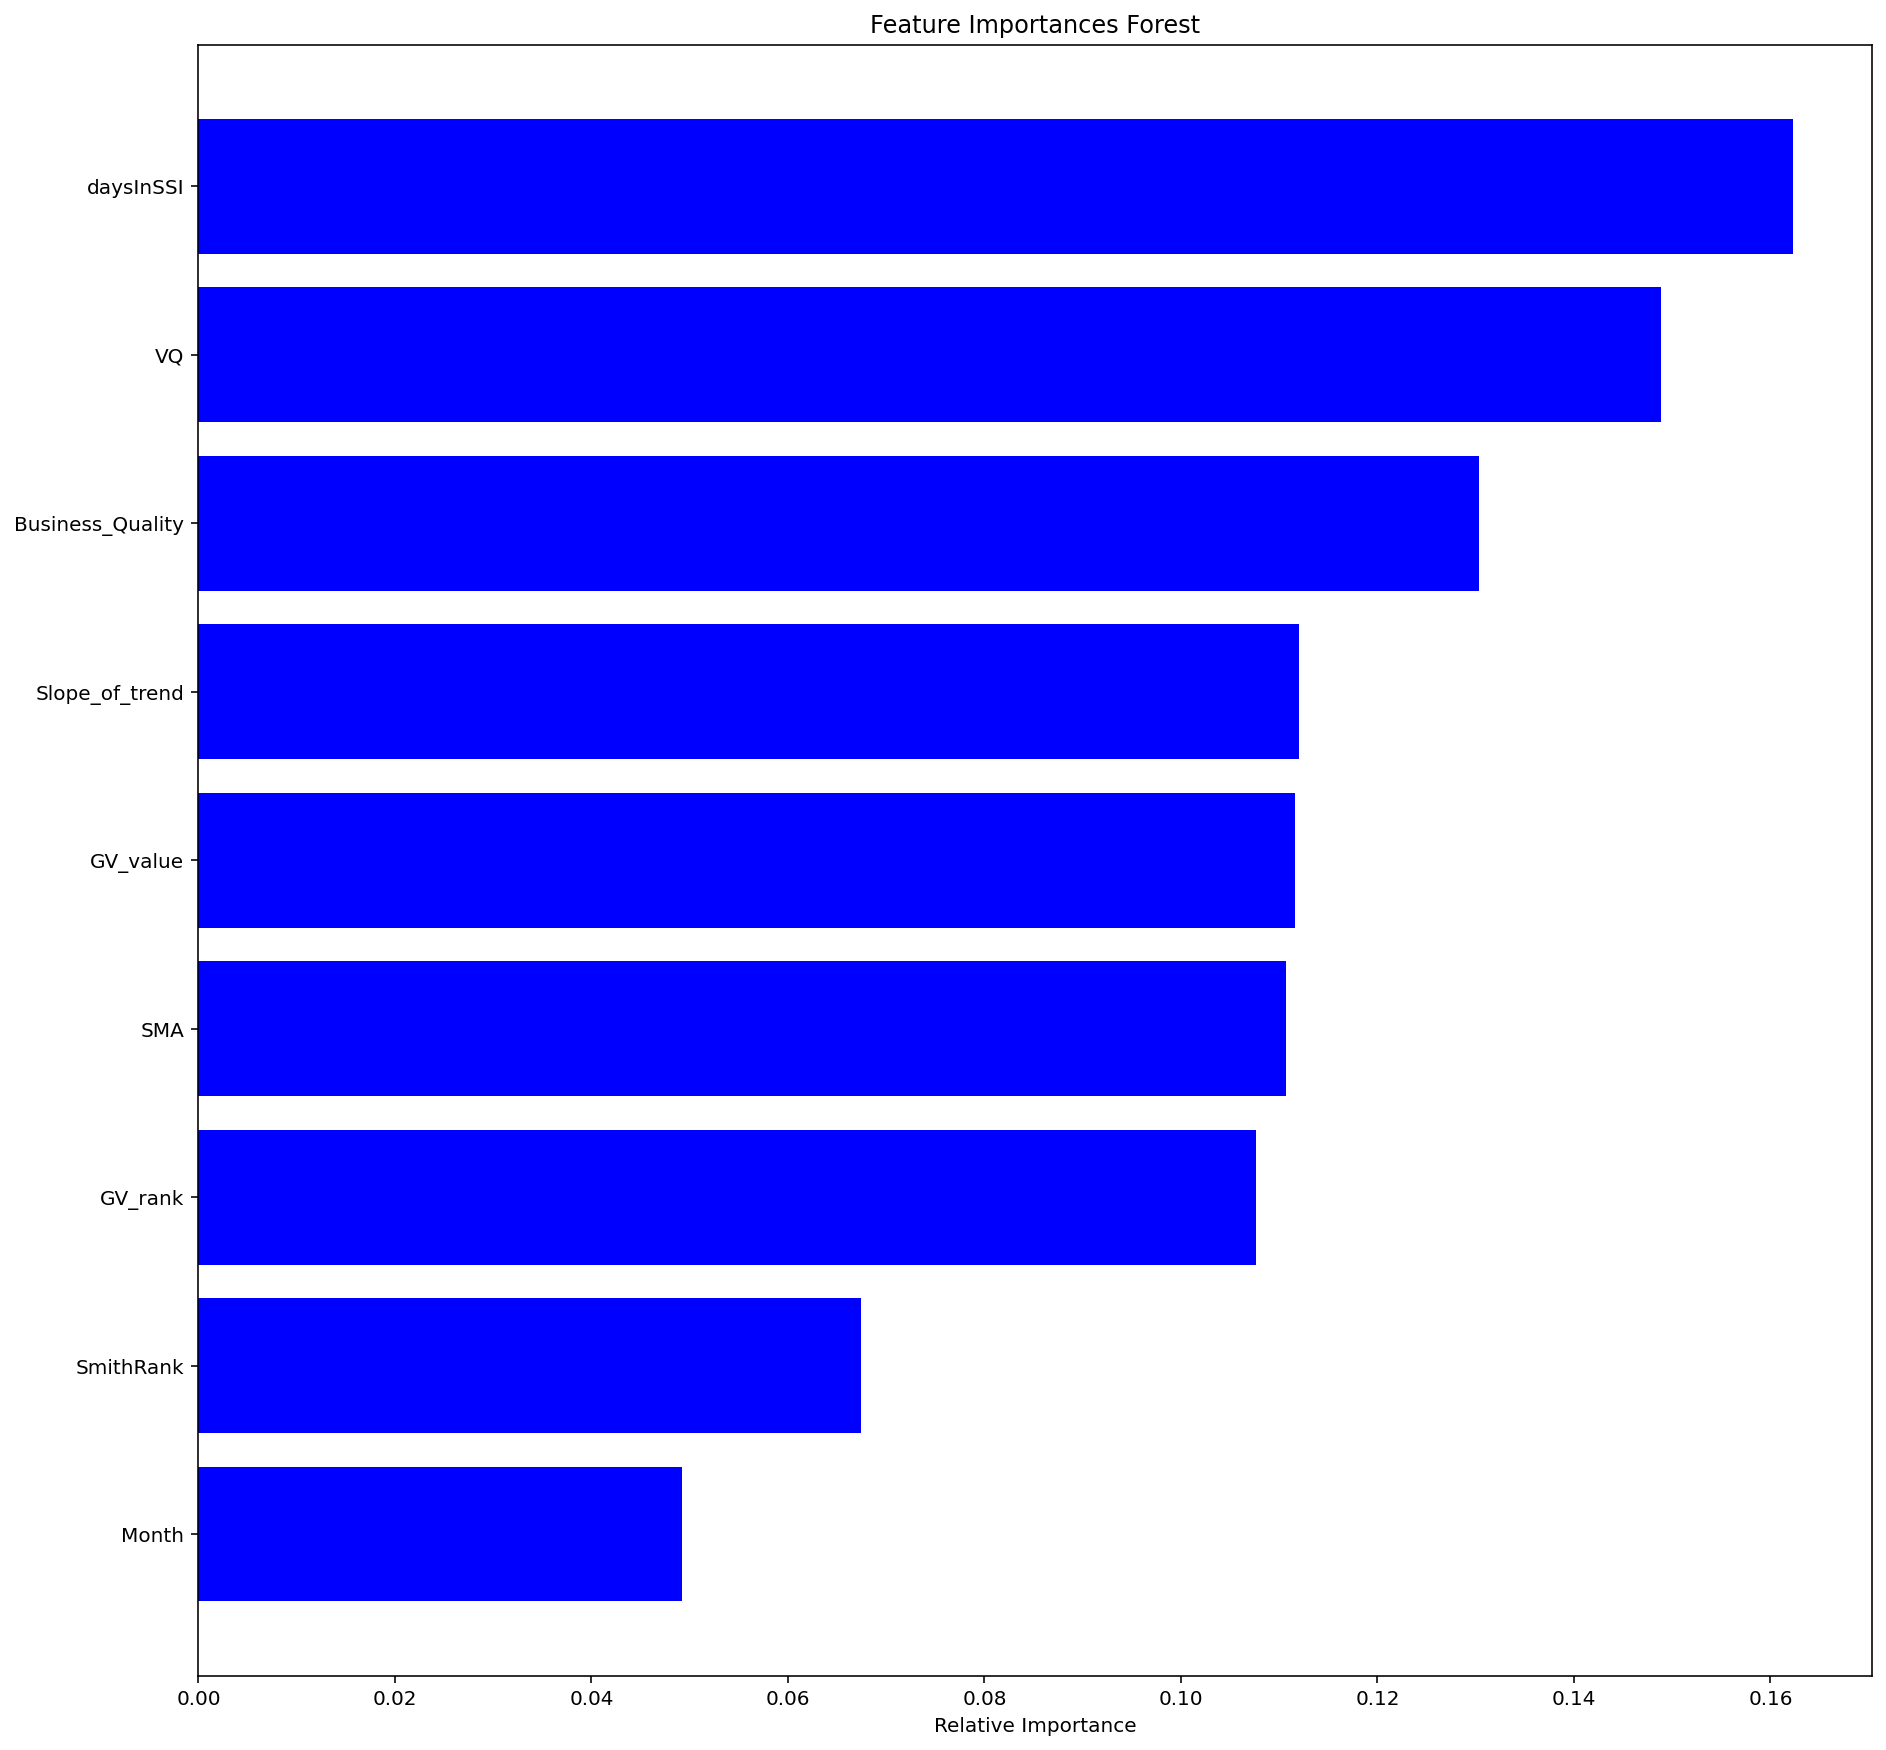

In [46]:
print('roc_auc = %.2f' % lr_rocauc)
print('')
print('Time to train = %.2f seconds' % (tF - t0))
print('Without (Trend, MC, Day_of_week) normalized')
probs_val = lr_y_pred[:,1]
precision = []
for j in np.arange(0,1,0.05):

    cl = (probs_val > j).astype(int)
    precision.append(precision_score(y_test, cl))



plt.plot(np.arange(0,1,0.05), precision, color='red', label=f'{2020+1} year')
plt.legend()
plt.show()
features = X_train.columns
importances = lr_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15, 15))
plt.title('Feature Importances Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

roc_auc = 0.51

Time to train = 128.28 seconds
Only BQ, SOT, GV_rank normalized


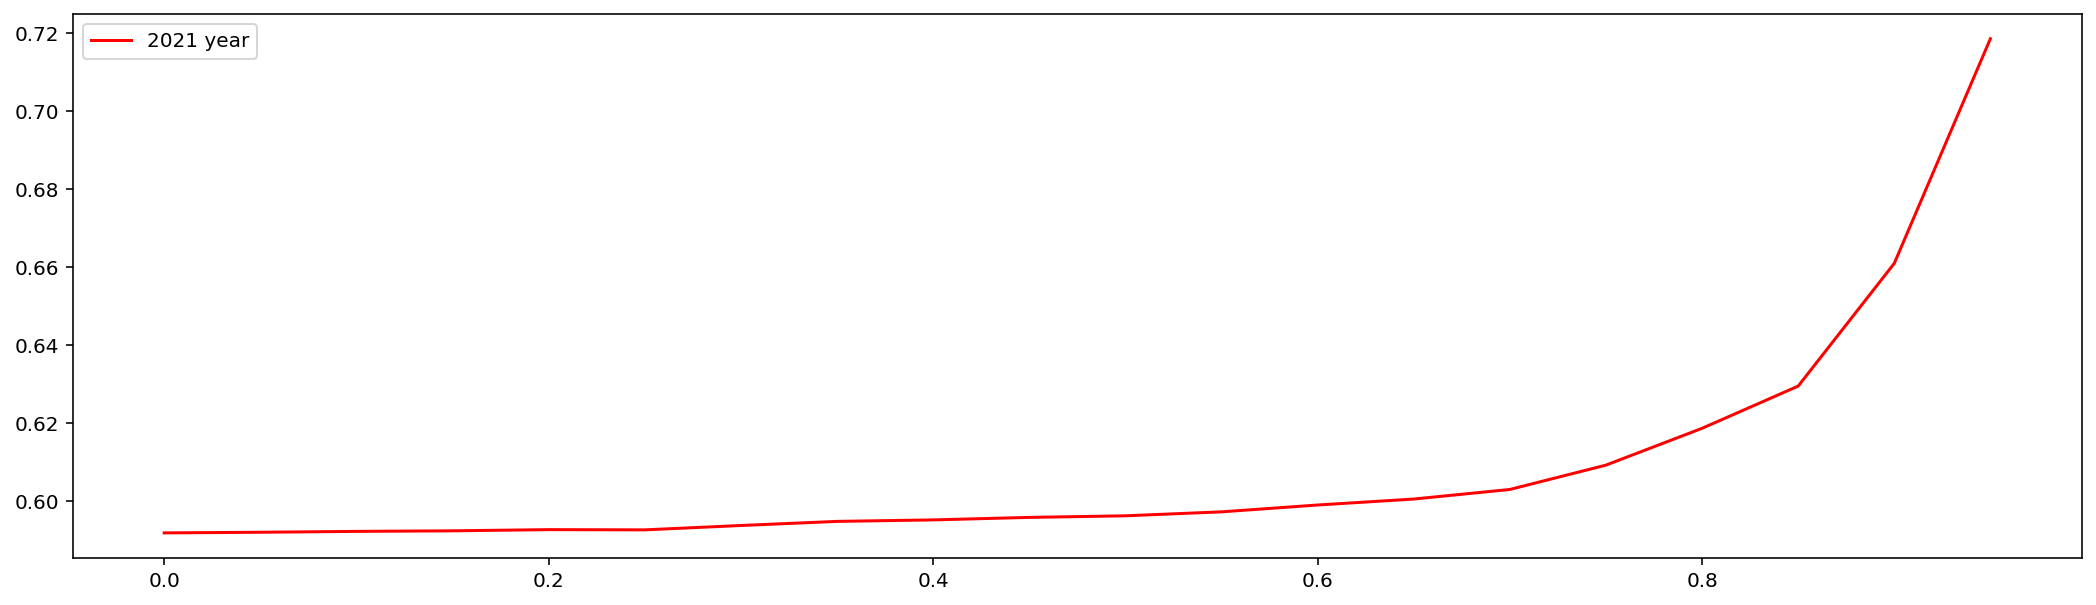

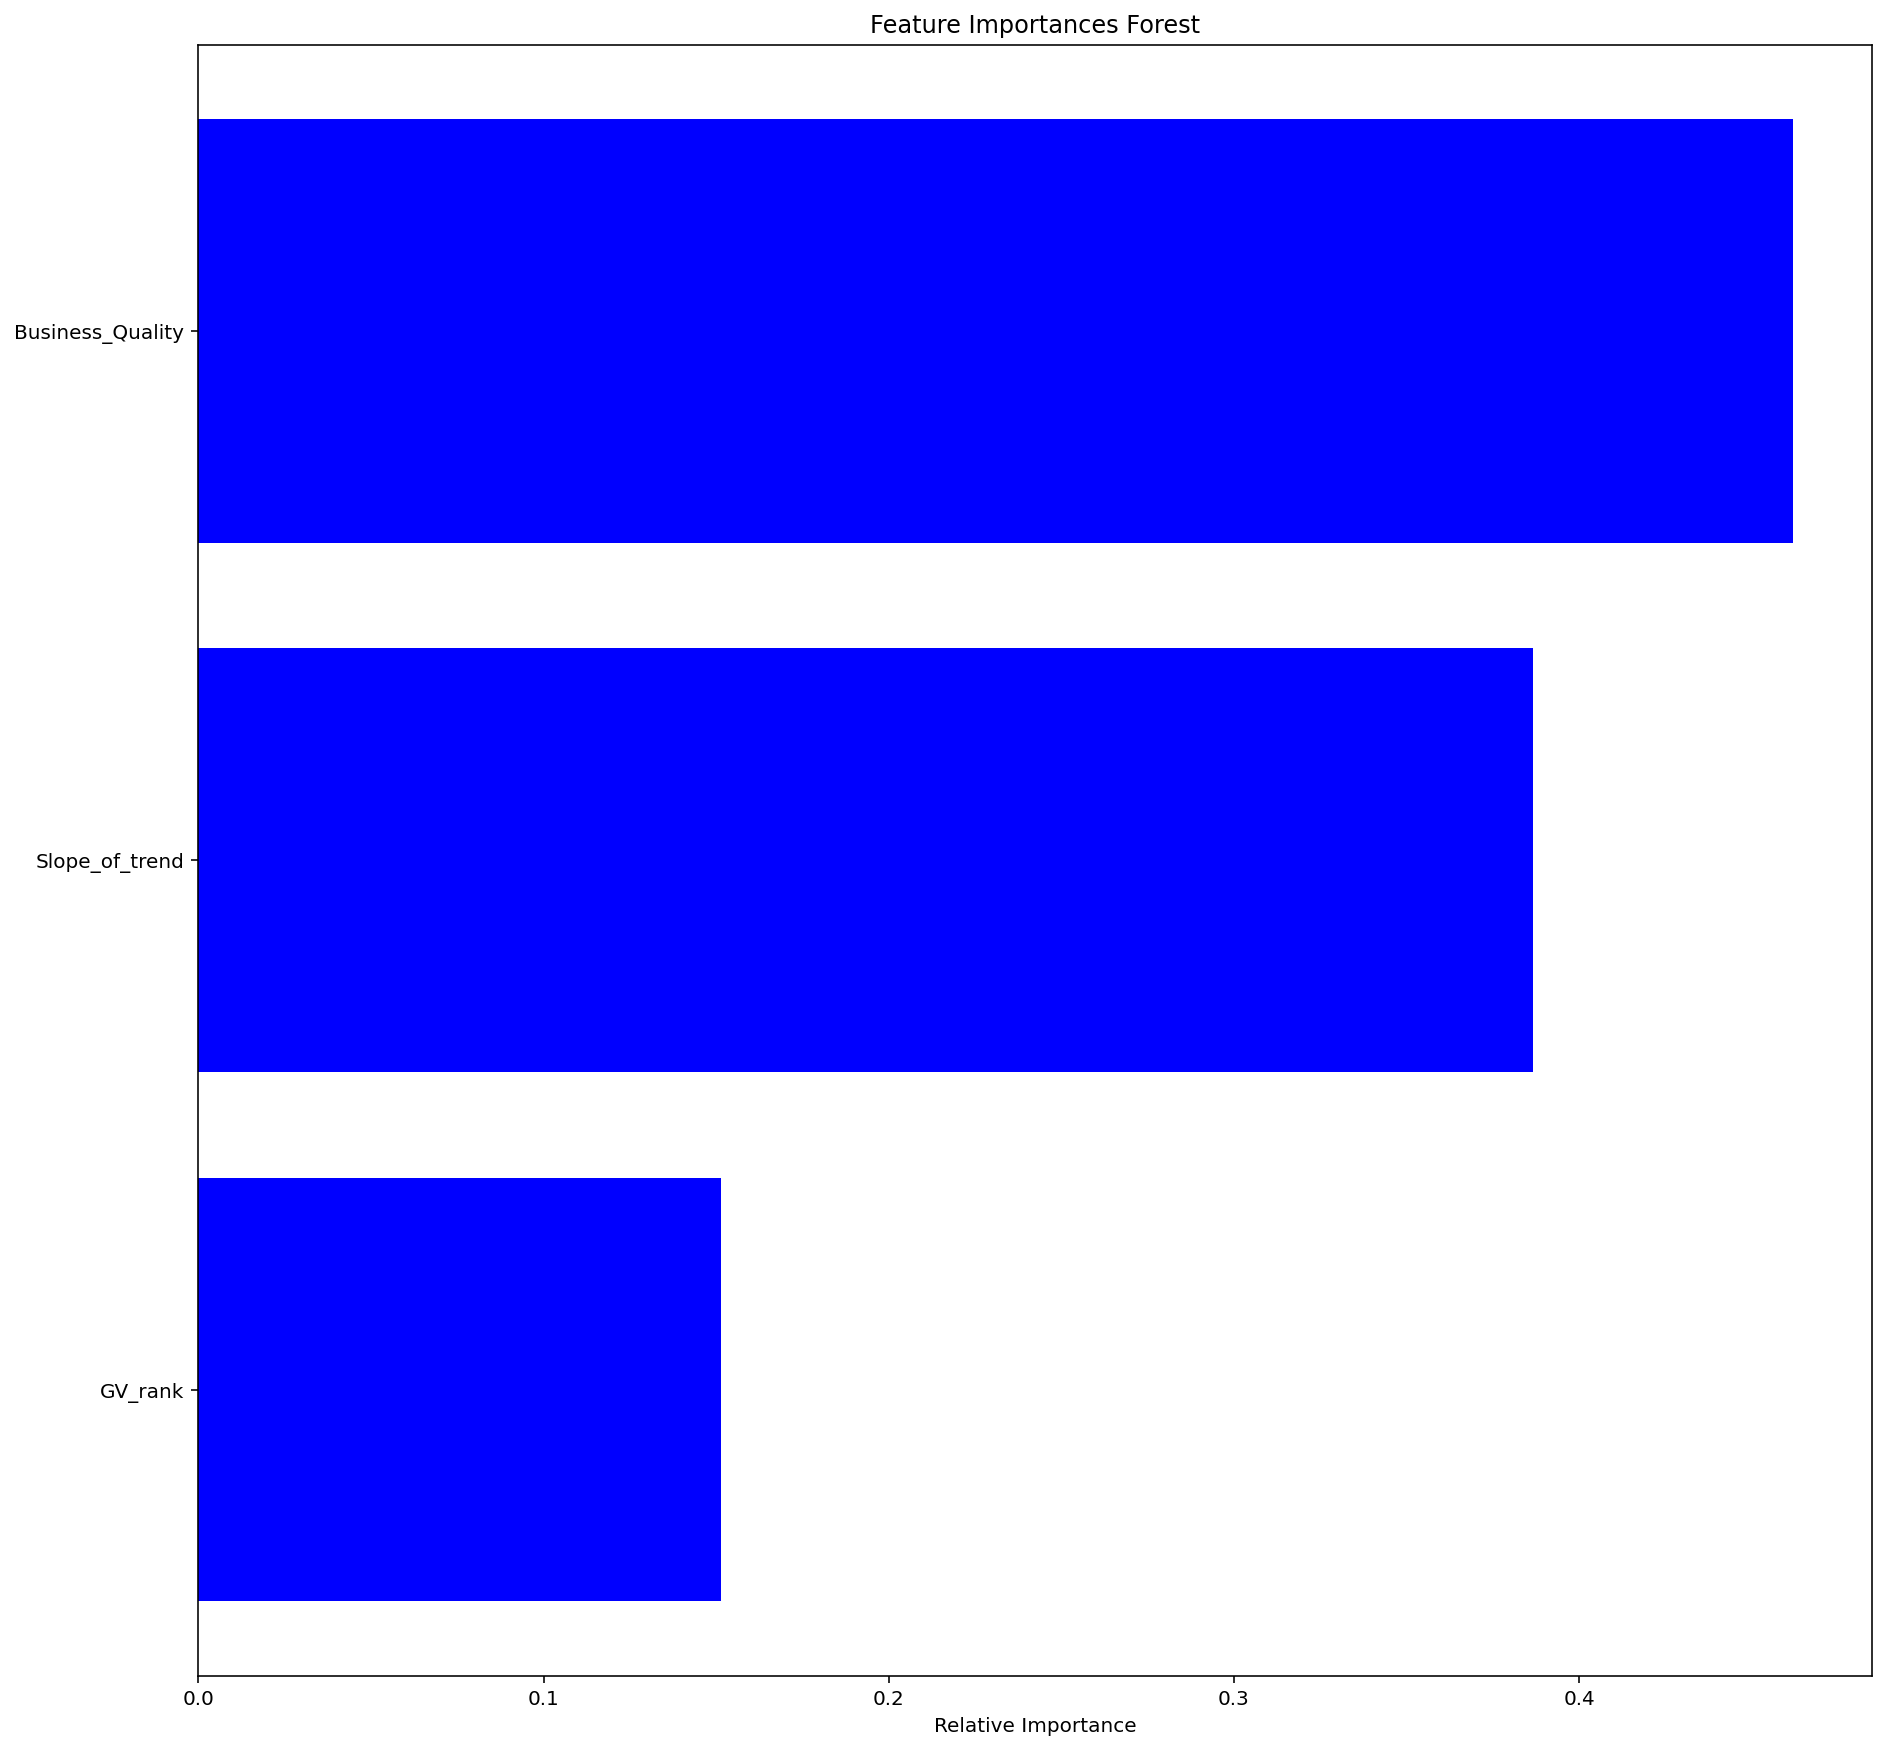

In [54]:
print('roc_auc = %.2f' % lr_rocauc)
print('')
print('Time to train = %.2f seconds' % (tF - t0))
print('Only BQ, SOT, GV_rank normalized')
probs_val = lr_y_pred[:,1]
precision = []
for j in np.arange(0,1,0.05):

    cl = (probs_val > j).astype(int)
    precision.append(precision_score(y_test, cl))



plt.plot(np.arange(0,1,0.05), precision, color='red', label=f'{2020+1} year')
plt.legend()
plt.show()
features = X_train.columns
importances = lr_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15, 15))
plt.title('Feature Importances Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

roc_auc = 0.51

Time to train = 156.76 seconds
Only BQ, SOT, GV_value normalized


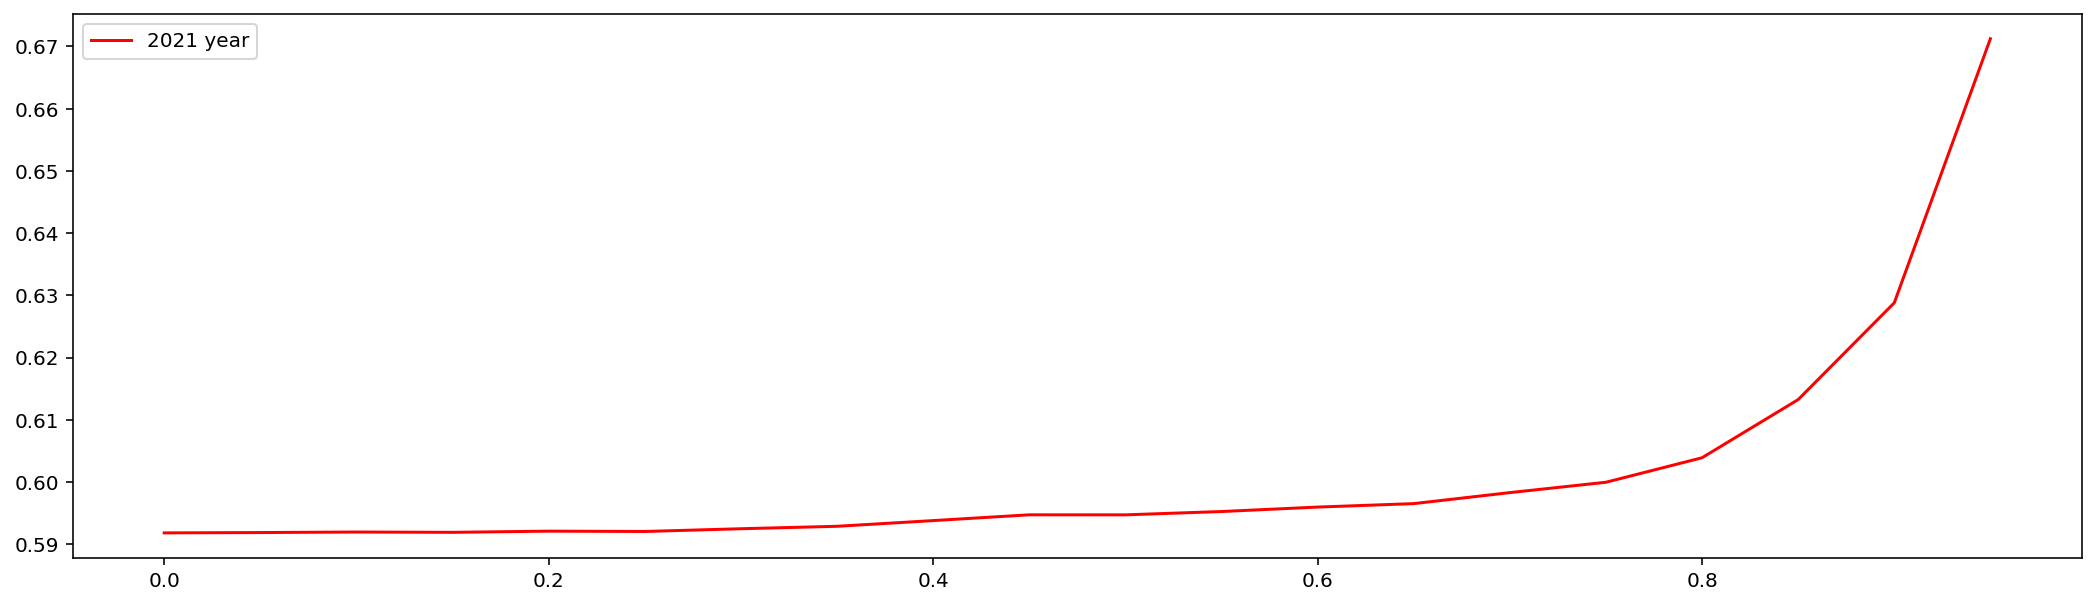

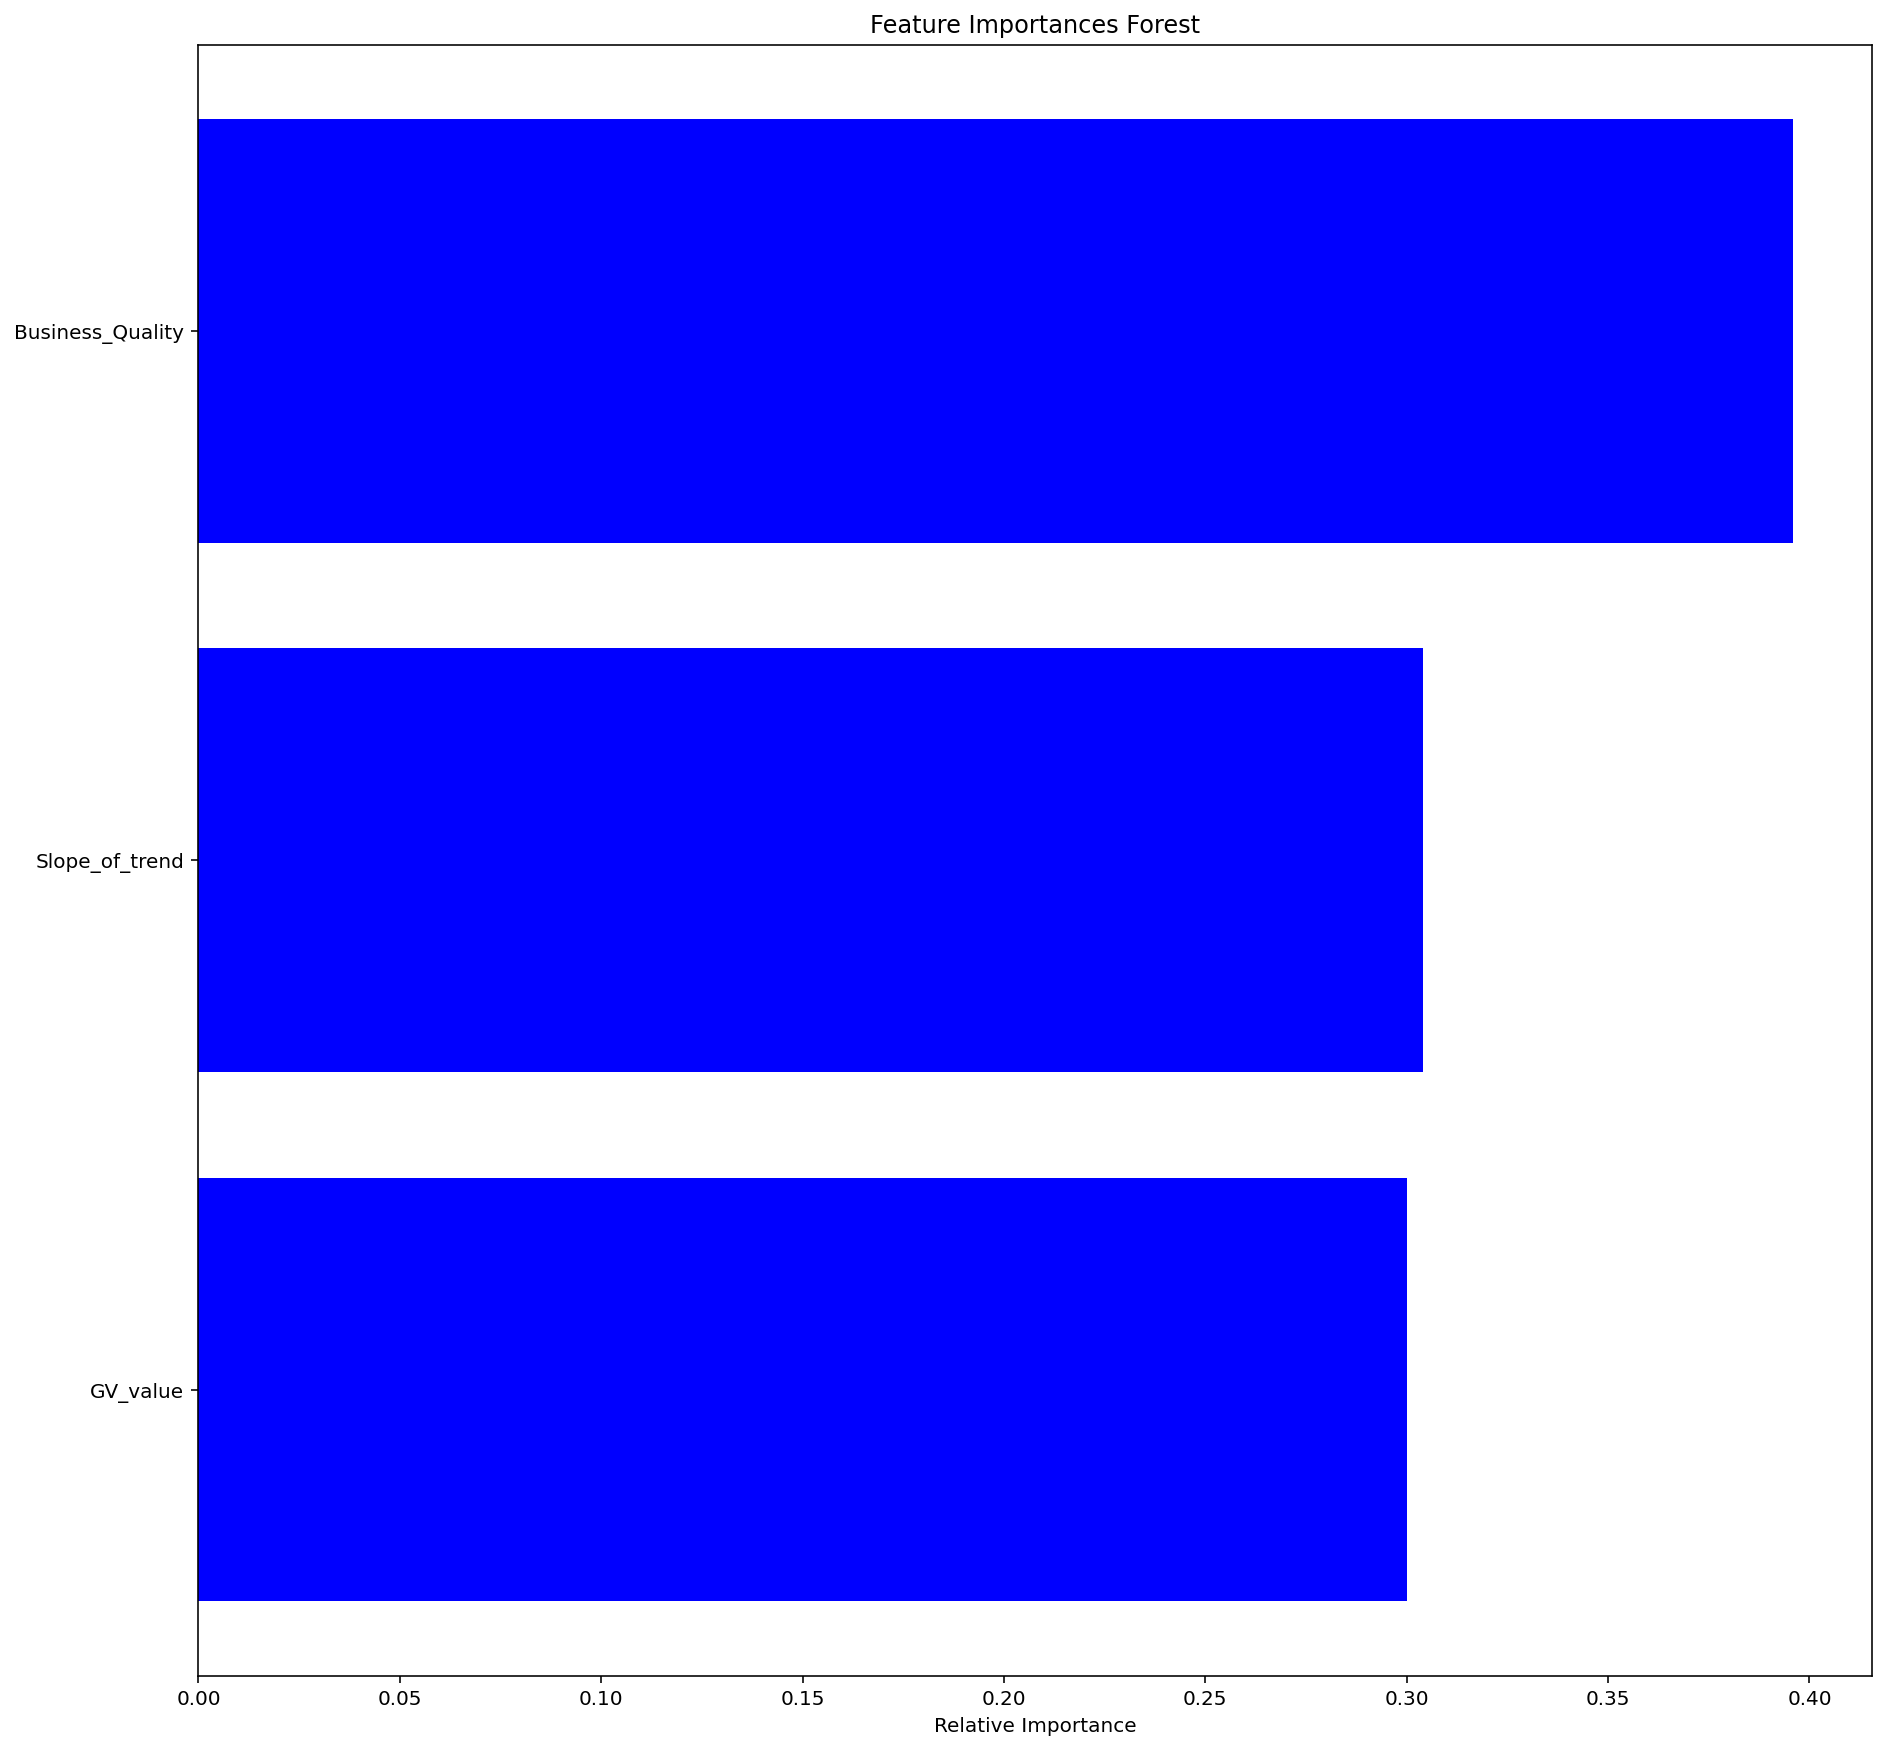

In [59]:
print('roc_auc = %.2f' % lr_rocauc)
print('')
print('Time to train = %.2f seconds' % (tF - t0))
print('Only BQ, SOT, GV_value normalized')
probs_val = lr_y_pred[:,1]
precision = []
for j in np.arange(0,1,0.05):

    cl = (probs_val > j).astype(int)
    precision.append(precision_score(y_test, cl))



plt.plot(np.arange(0,1,0.05), precision, color='red', label=f'{2020+1} year')
plt.legend()
plt.show()
features = X_train.columns
importances = lr_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15, 15))
plt.title('Feature Importances Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### RandomForestClassifier

2014
roc_auc = 0.52
Time to train = 1.33 seconds
максимальная точность 0.670049968769519


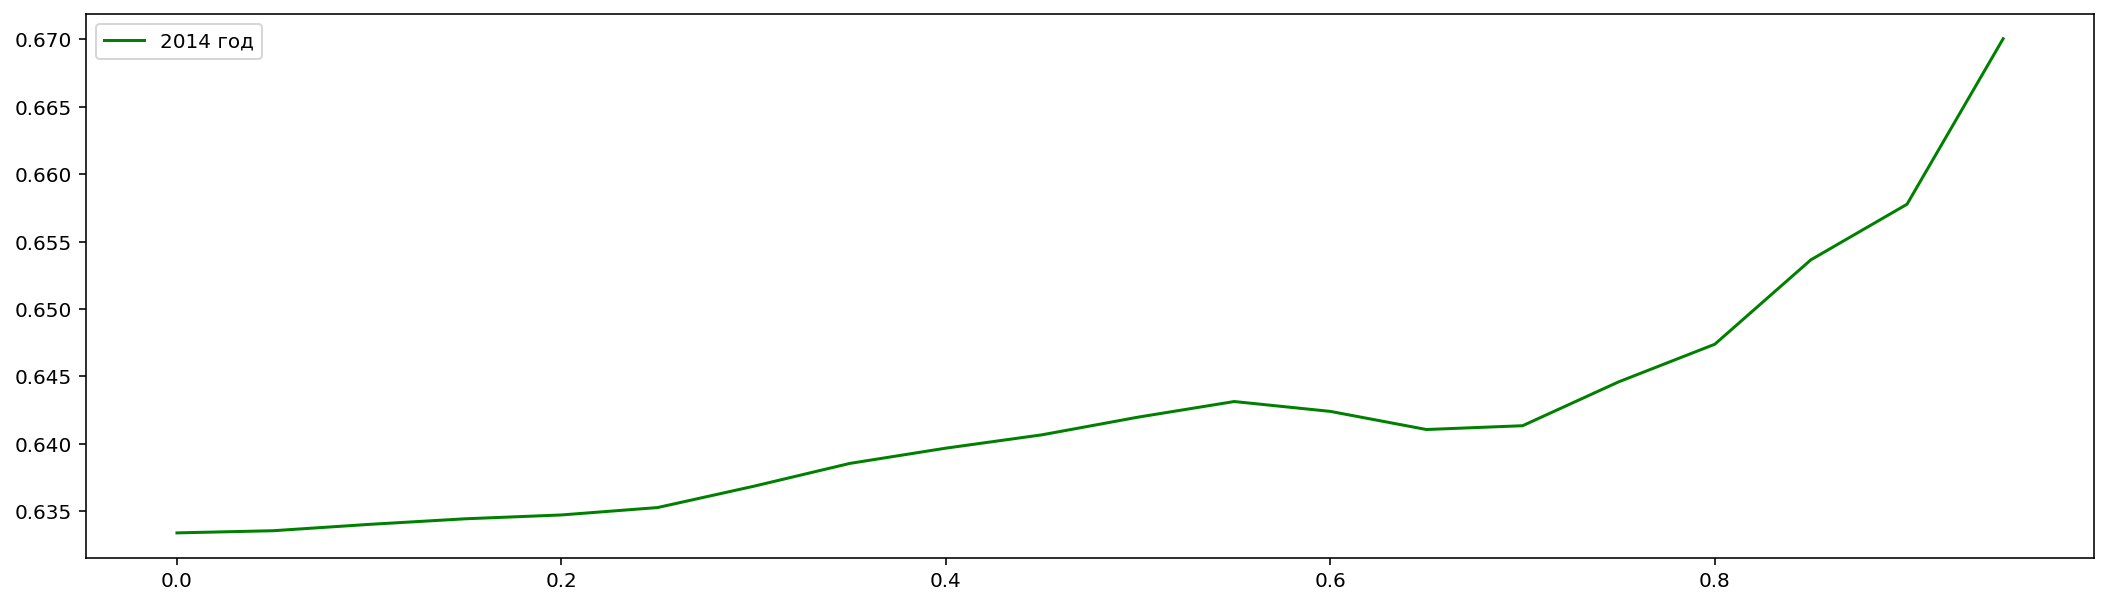

2015
roc_auc = 0.52
Time to train = 16.97 seconds
максимальная точность 0.5767195767195767


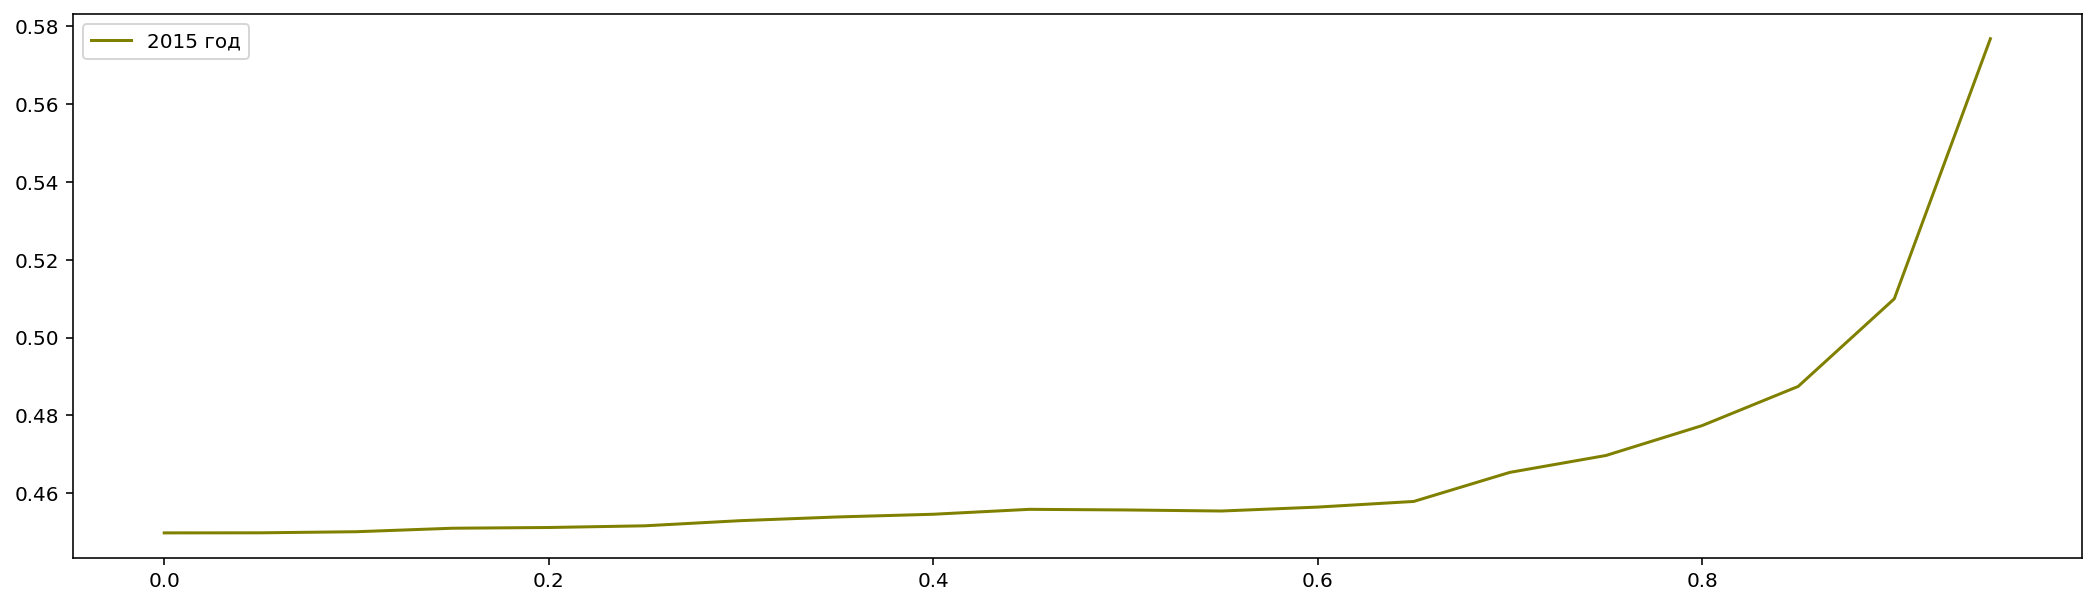

2016
roc_auc = 0.54
Time to train = 38.05 seconds
максимальная точность 0.8118279569892473


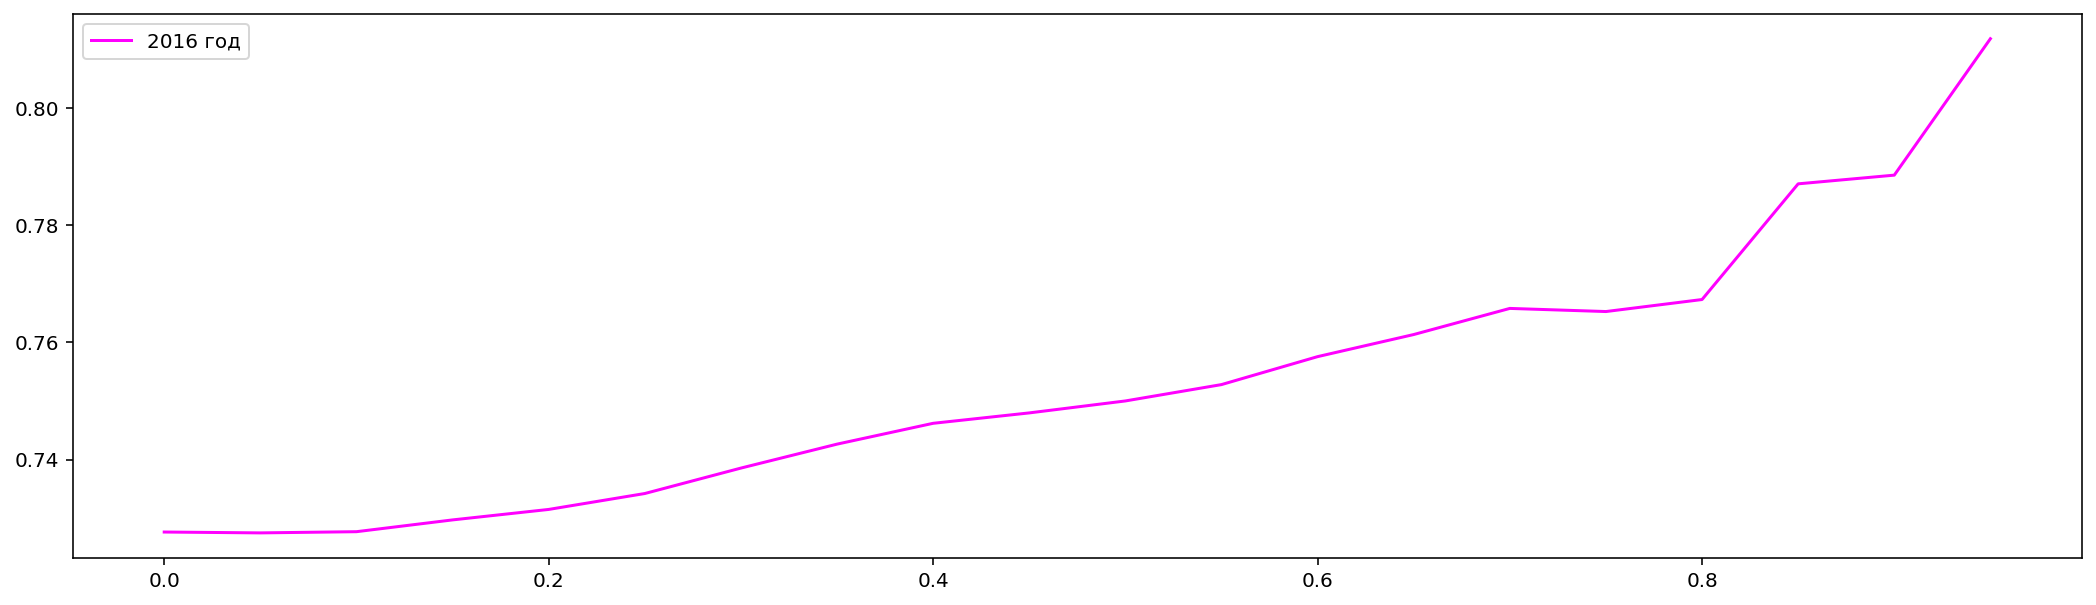

2017
roc_auc = 0.51
Time to train = 58.10 seconds
максимальная точность 0.6056491037479631


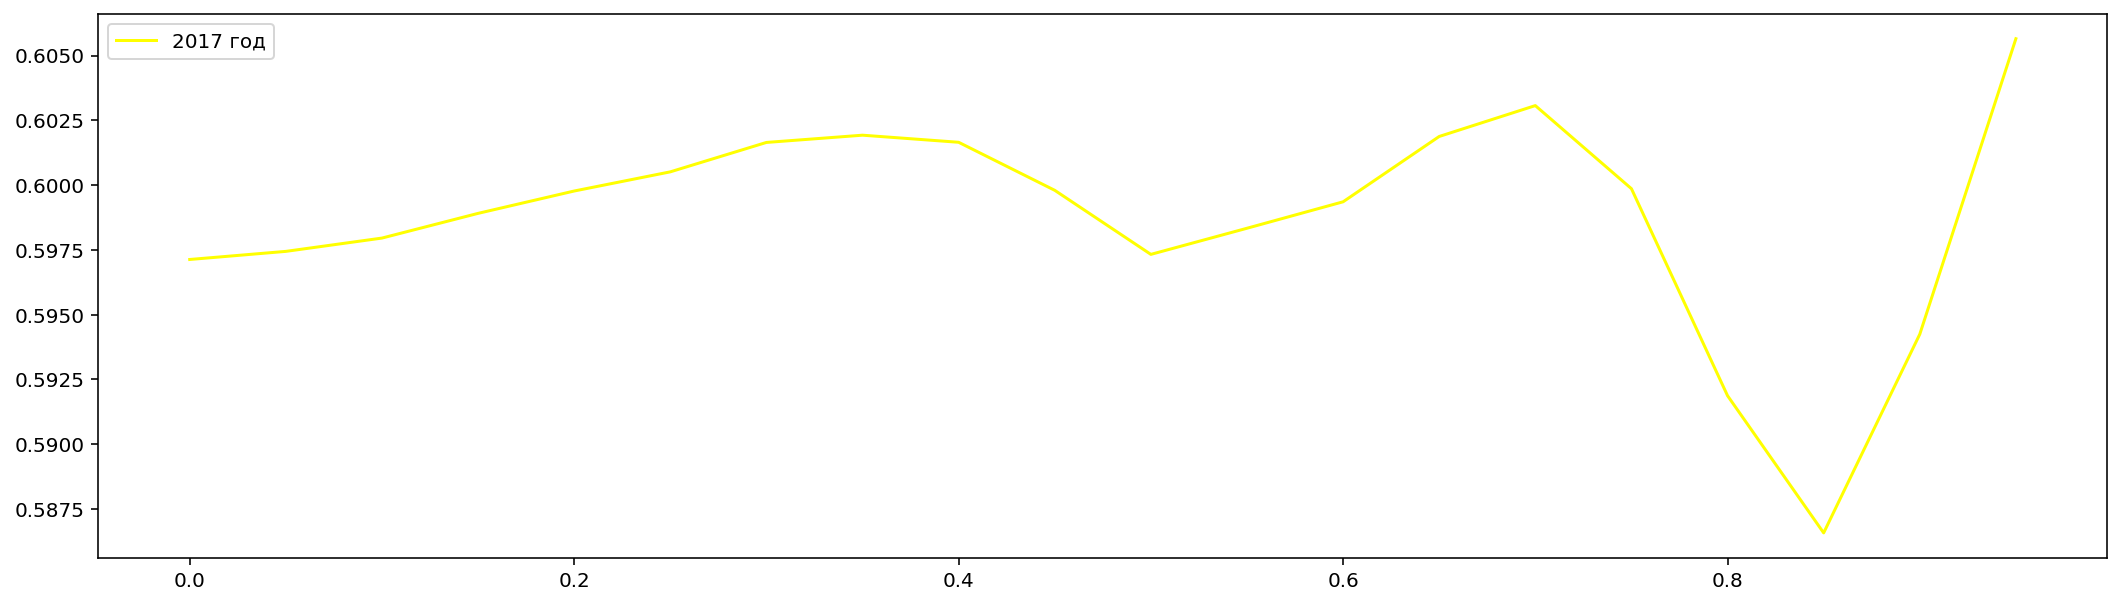

2018
roc_auc = 0.51
Time to train = 81.11 seconds
максимальная точность 0.5697879858657244


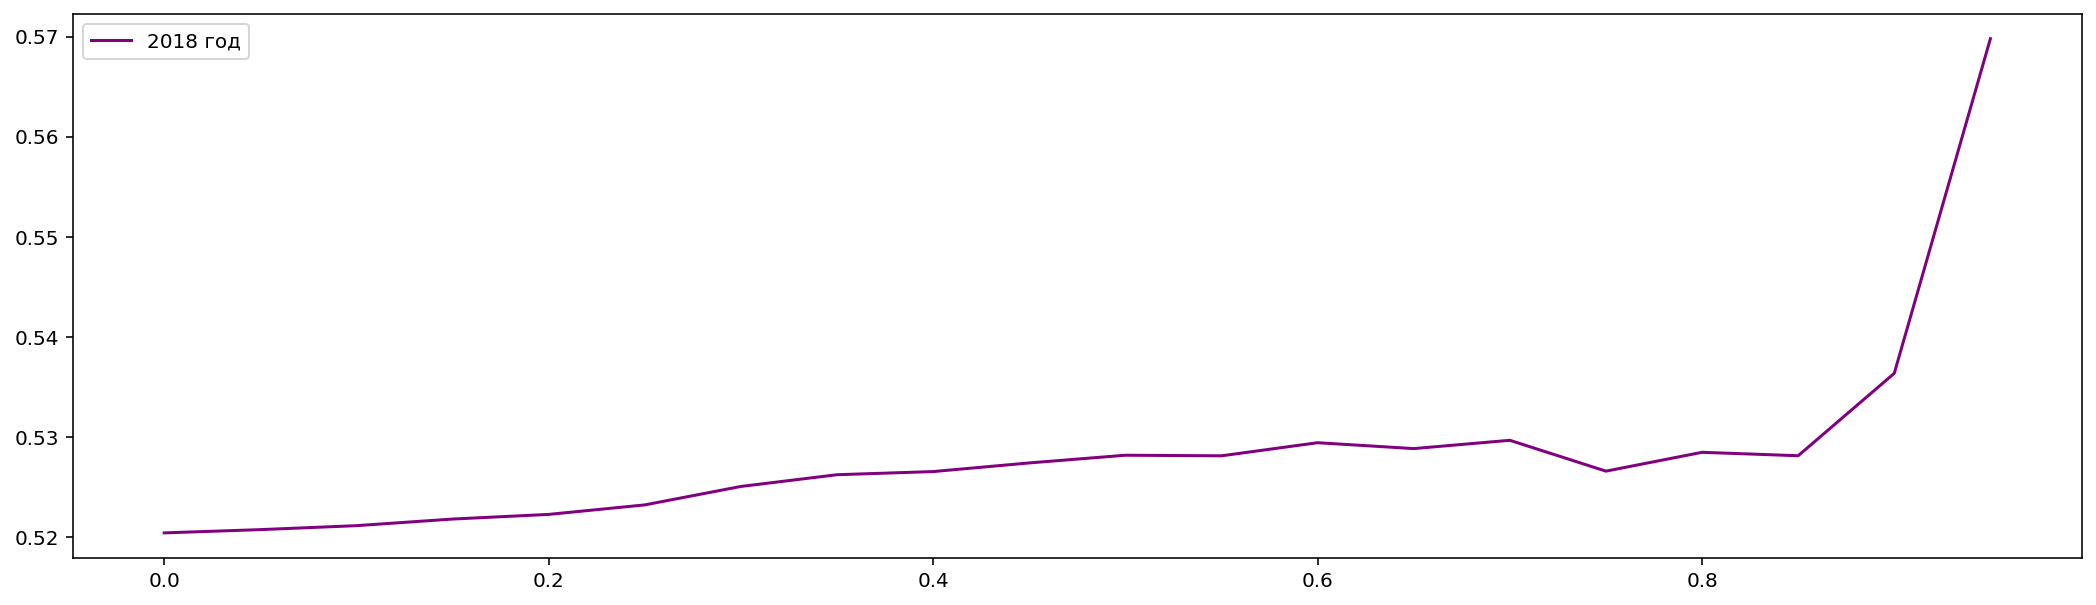

2019
roc_auc = 0.51
Time to train = 106.48 seconds
максимальная точность 0.655994043186895


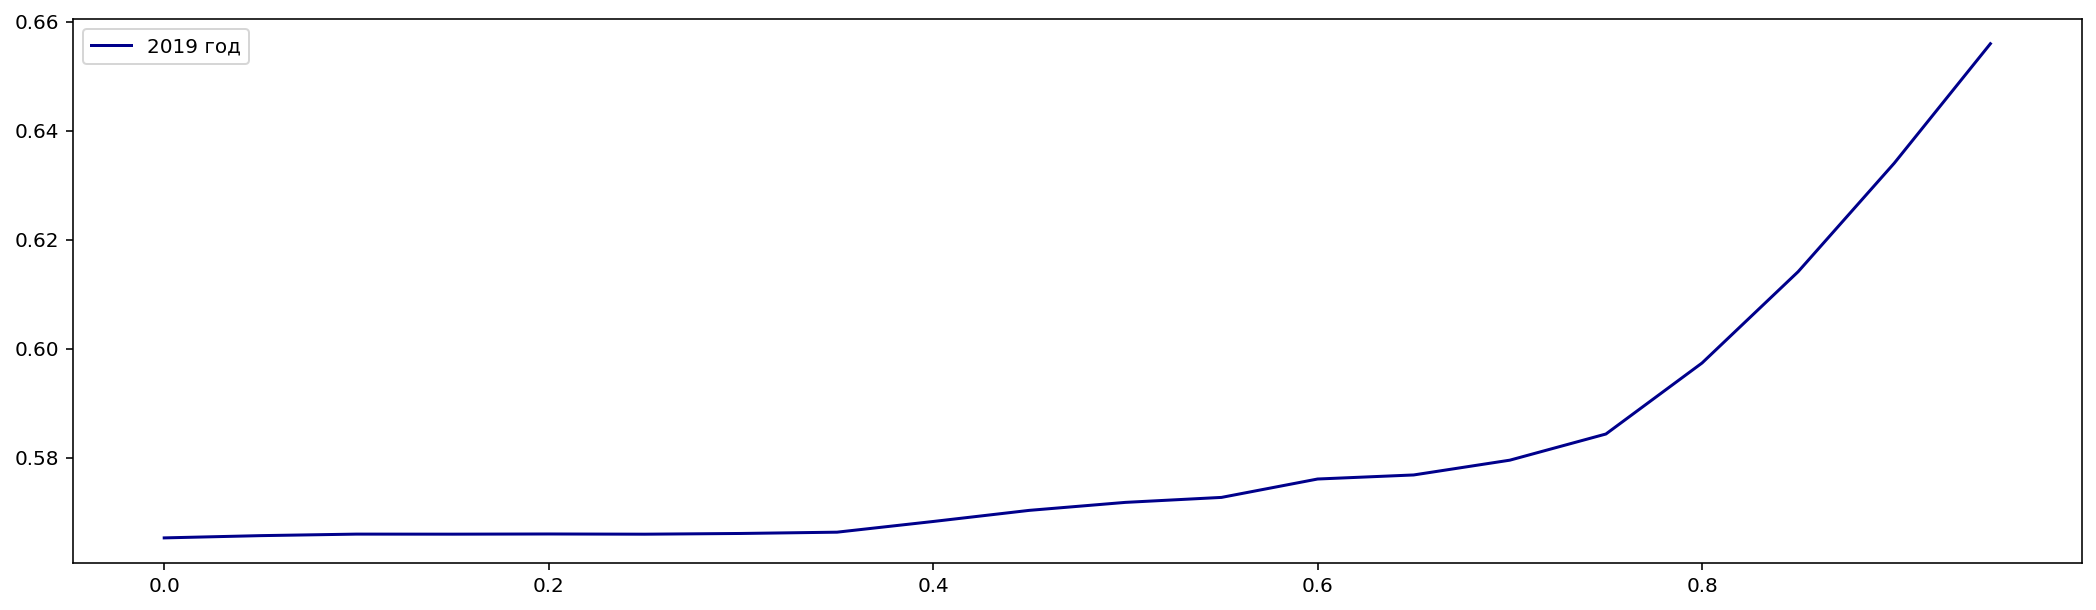

2020
roc_auc = 0.53
Time to train = 138.83 seconds
максимальная точность 0.7363558597091531


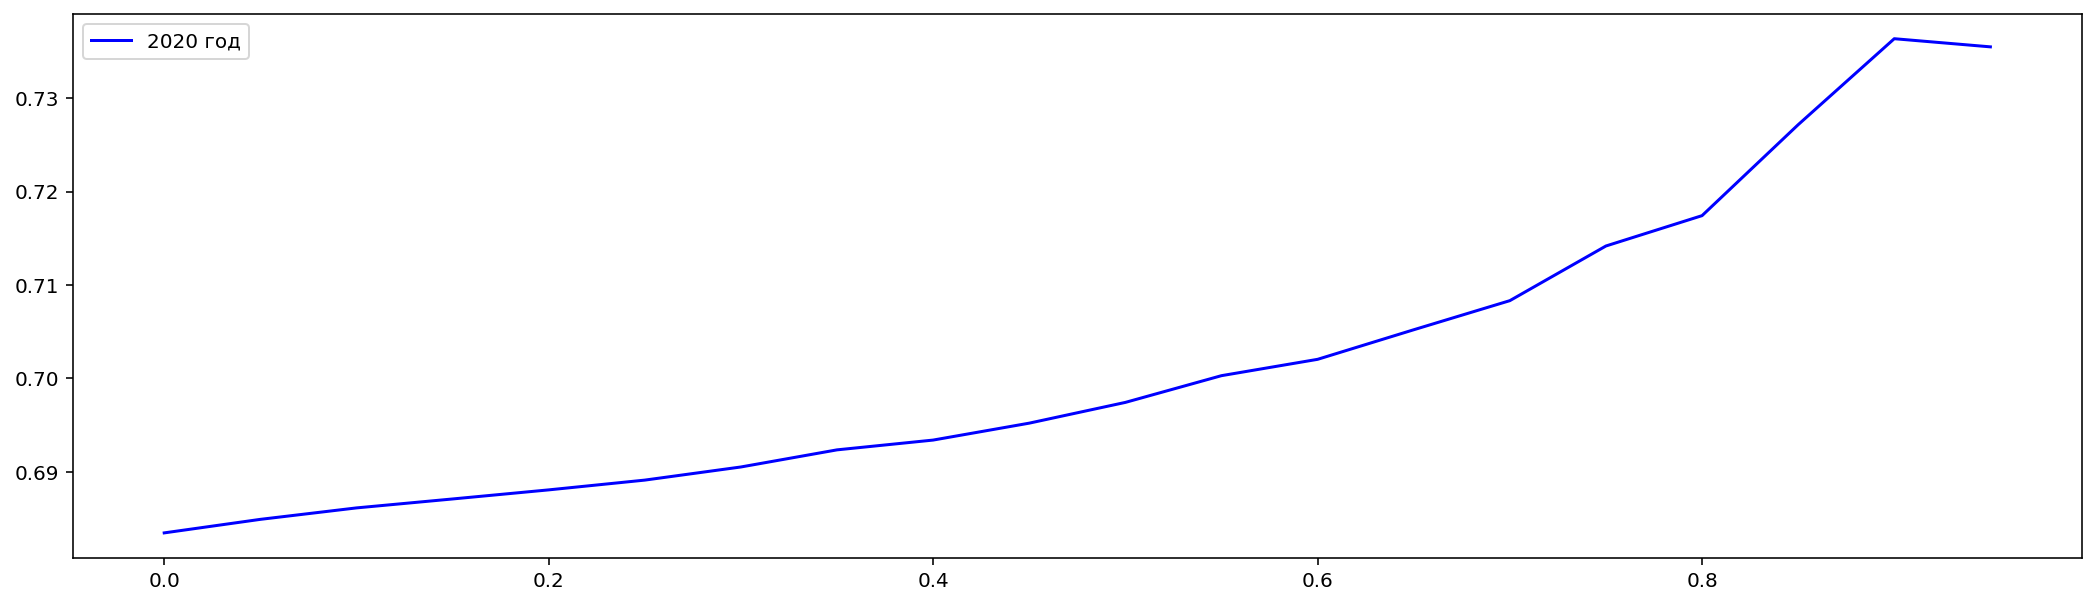

2021
roc_auc = 0.51
Time to train = 179.97 seconds
максимальная точность 0.6684747925973197


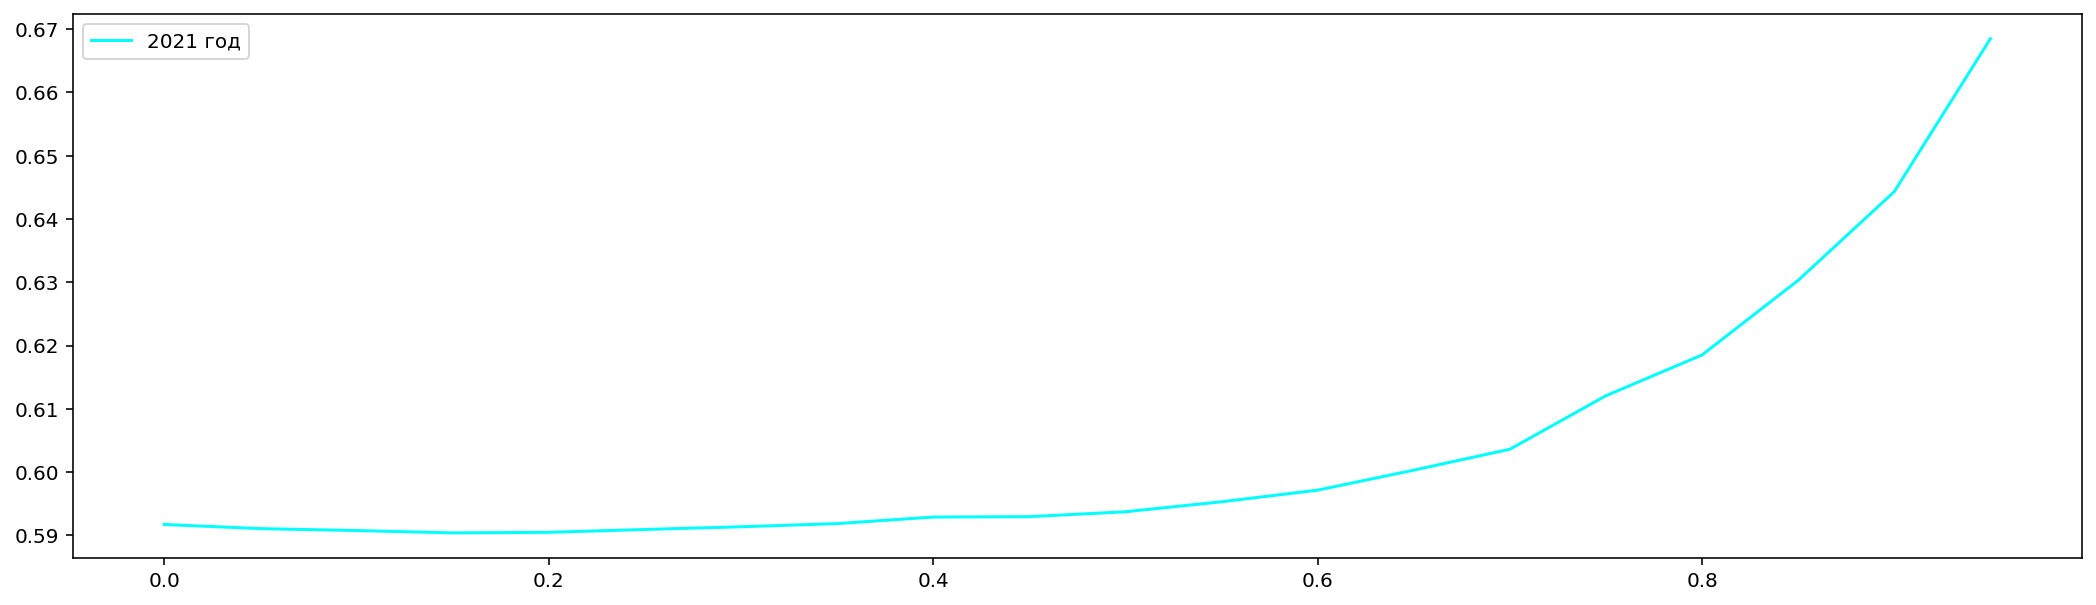

2022
roc_auc = 0.51
Time to train = 229.72 seconds
максимальная точность 0.45594594121457205


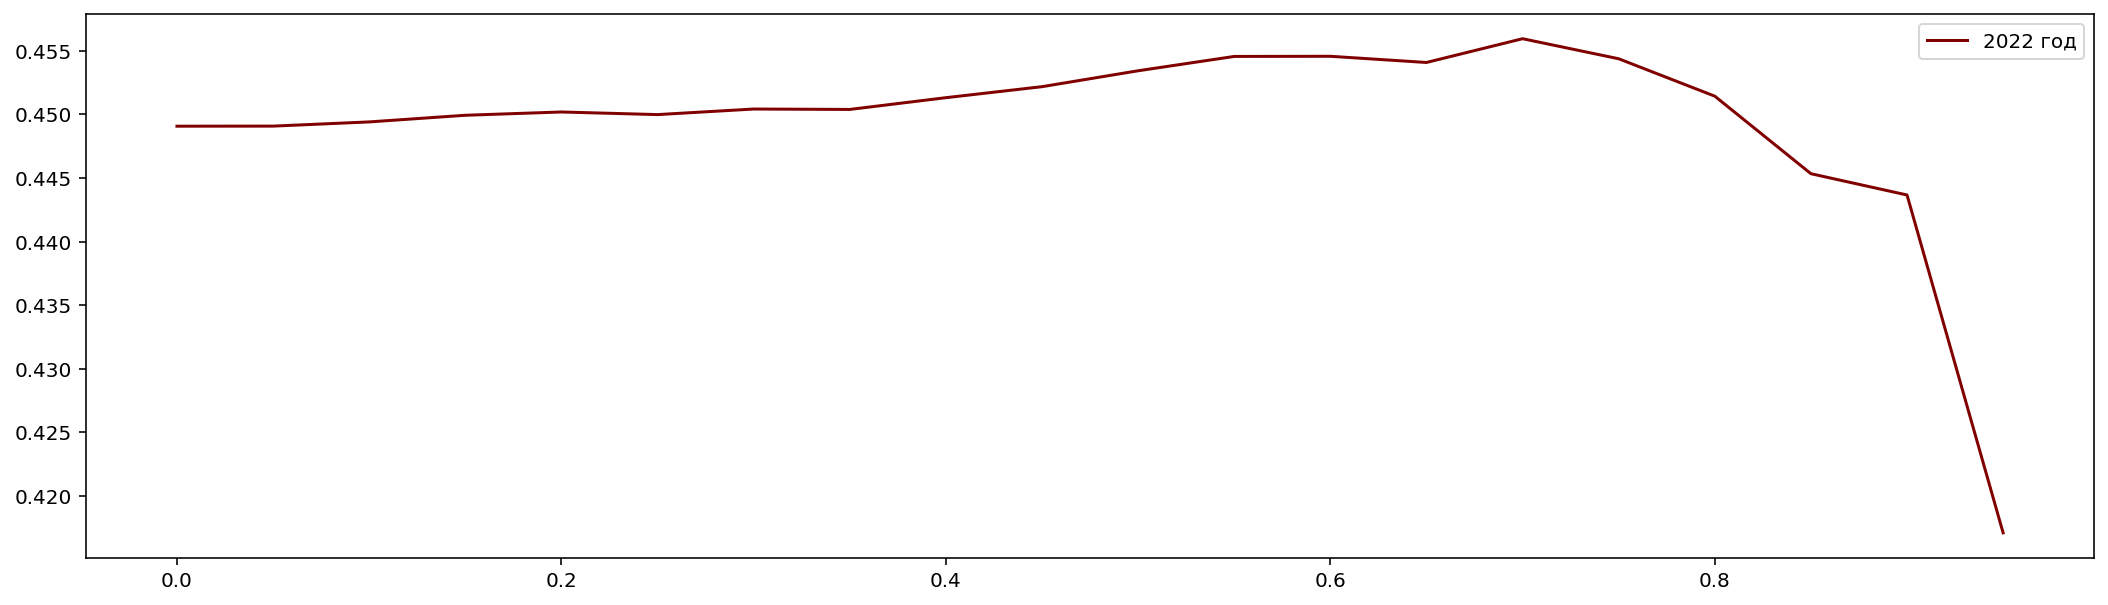

In [71]:





colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = RandomForestClassifier(random_state=42)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

2015
roc_auc = 0.51
Time to train = 1.47 seconds
максимальная точность 0.4738519484282196


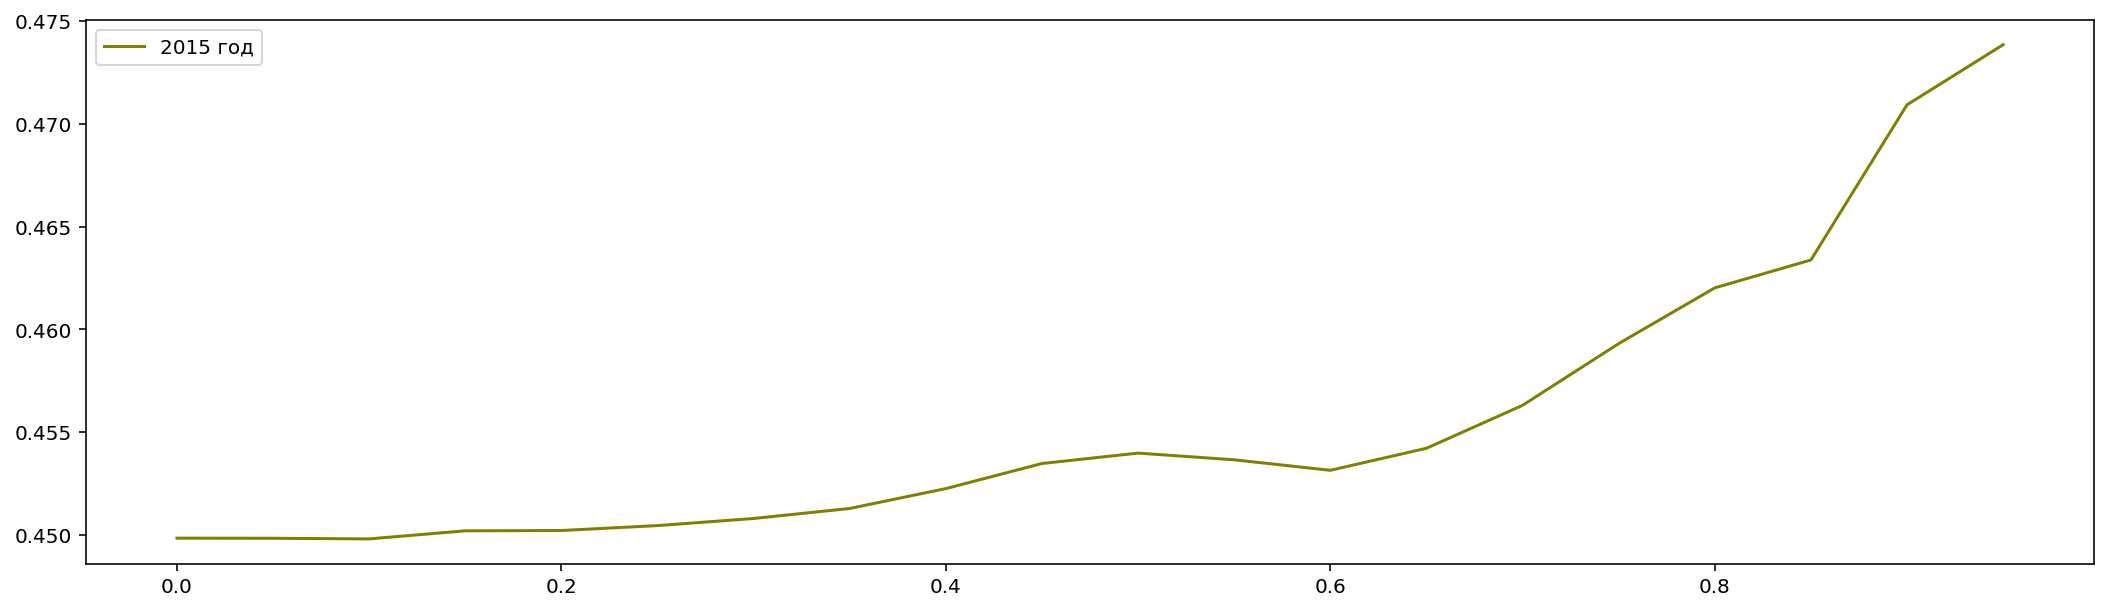

2016
roc_auc = 0.51
Time to train = 16.53 seconds
максимальная точность 0.7343488328066522


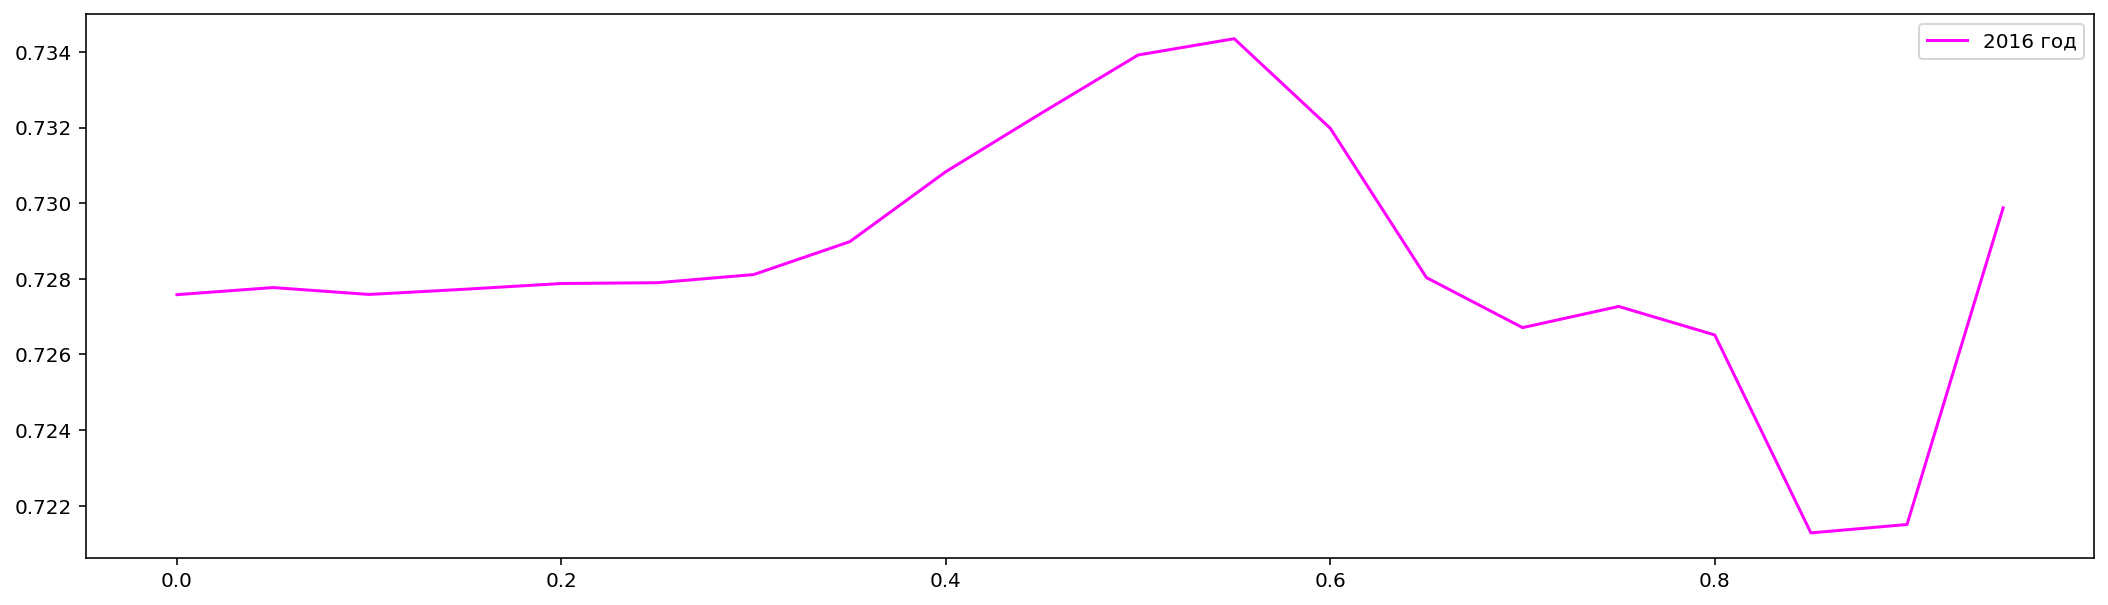

2017
roc_auc = 0.51
Time to train = 17.95 seconds
максимальная точность 0.6061371841155234


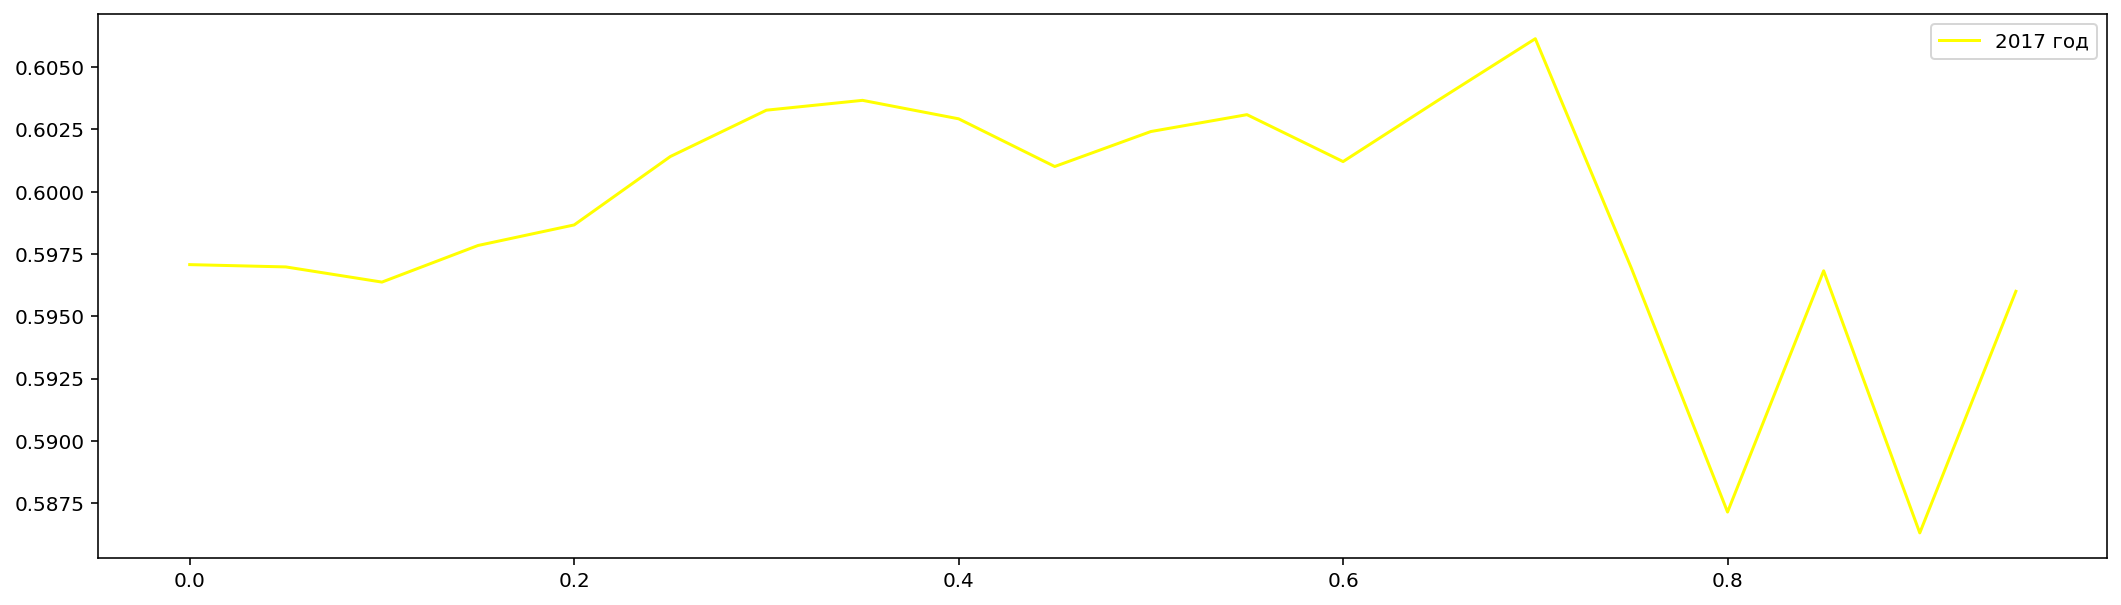

2018
roc_auc = 0.52
Time to train = 15.85 seconds
максимальная точность 0.5367370150385442


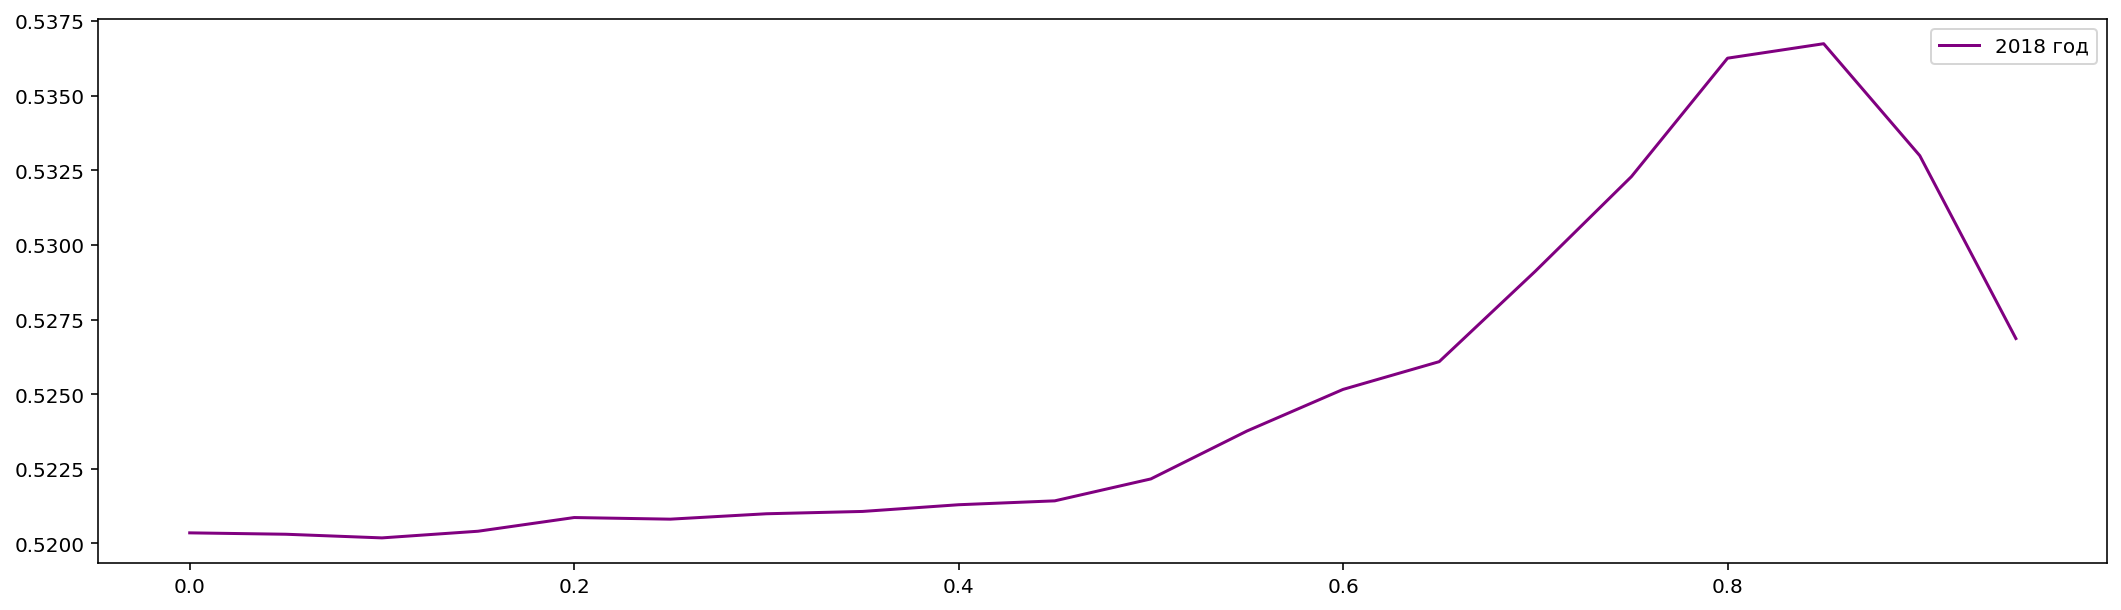

2019
roc_auc = 0.49
Time to train = 17.58 seconds
максимальная точность 0.5915708812260536


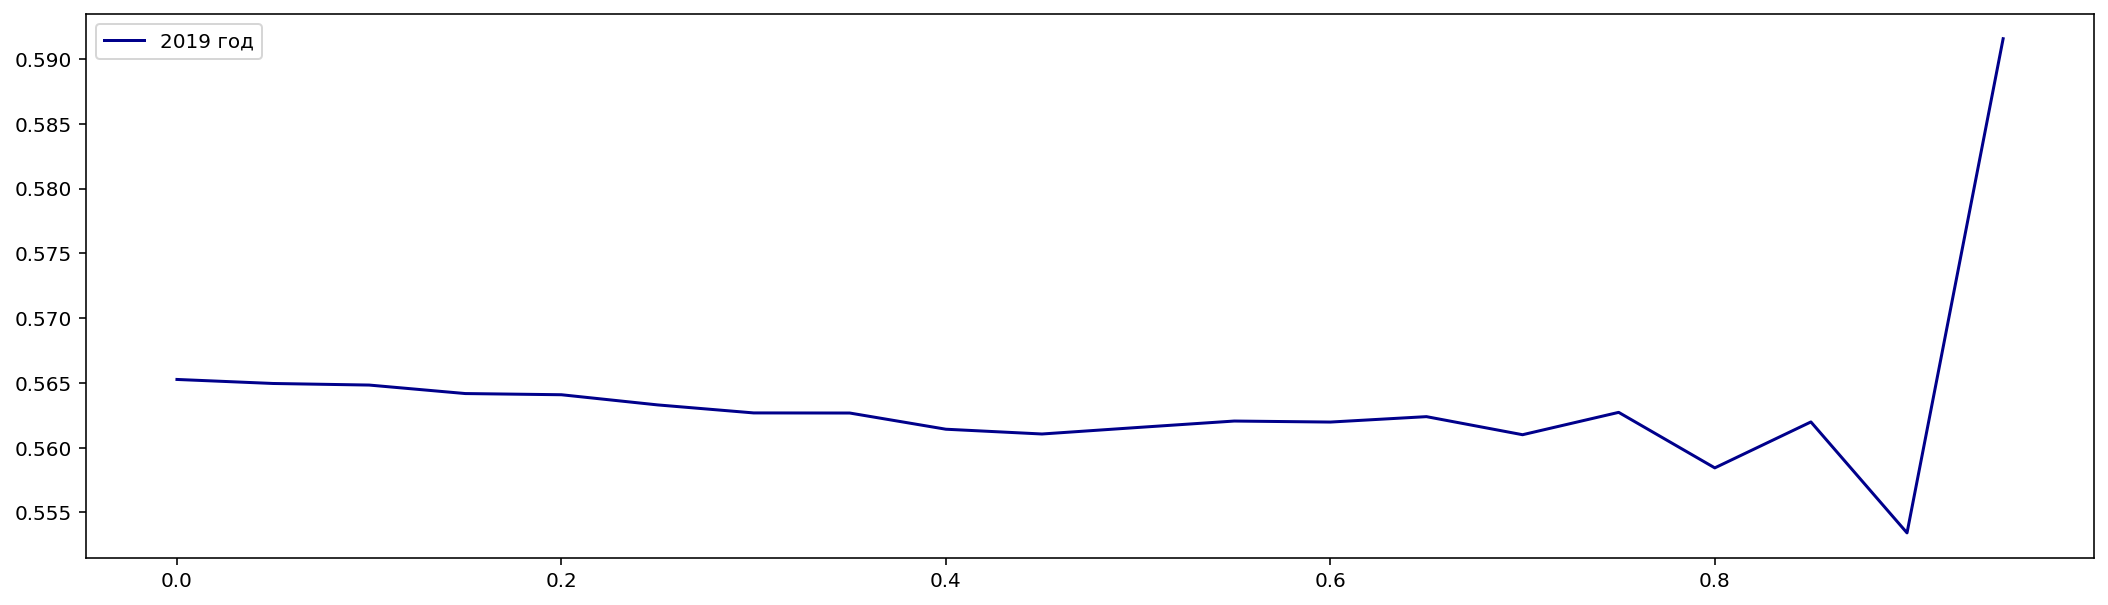

2020
roc_auc = 0.52
Time to train = 18.91 seconds
максимальная точность 0.7231430325352978


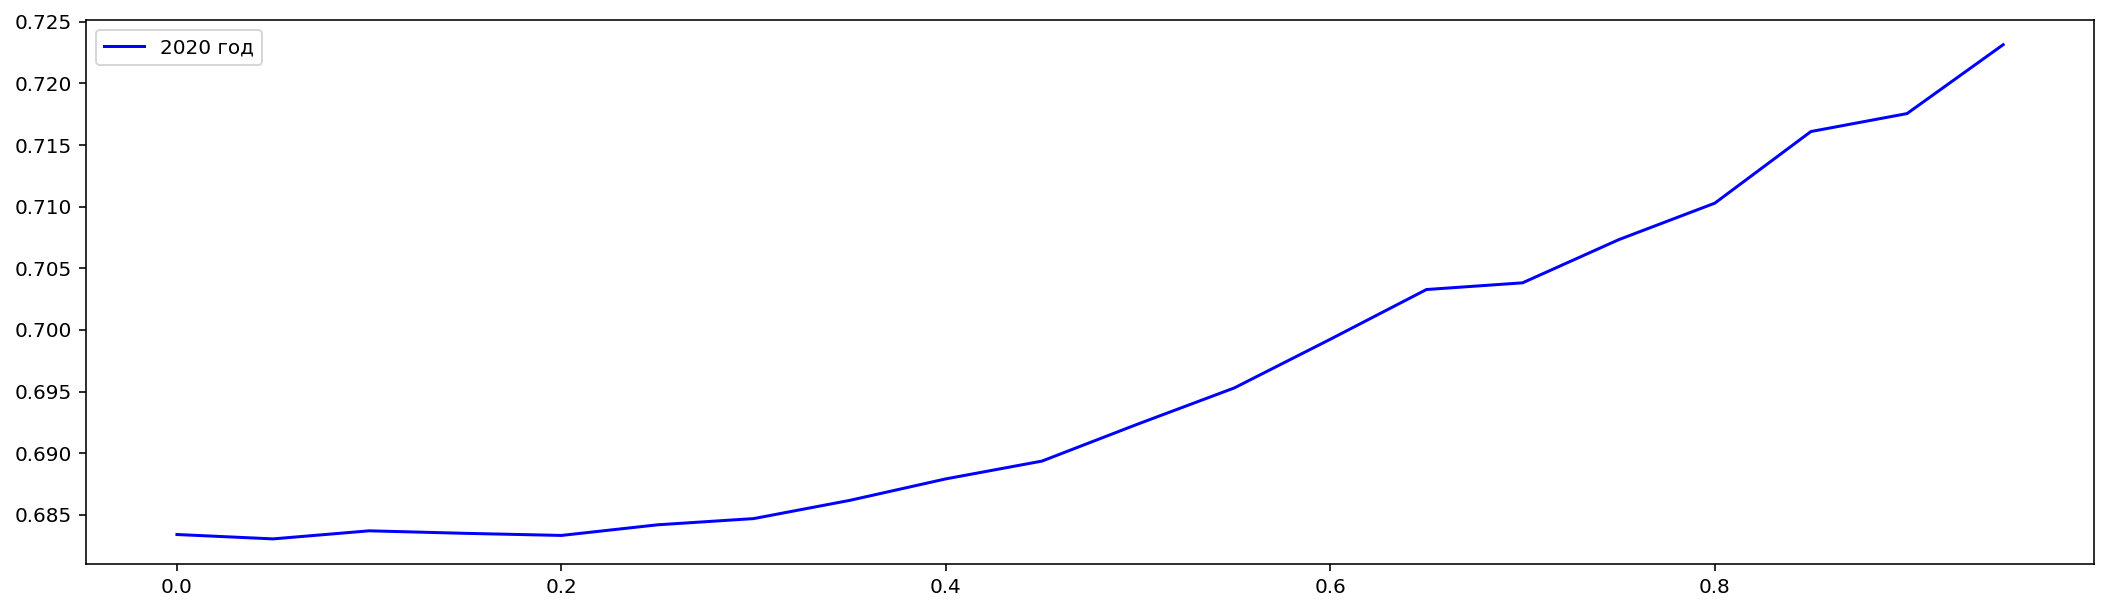

2021
roc_auc = 0.50
Time to train = 19.76 seconds
максимальная точность 0.6004432802740278


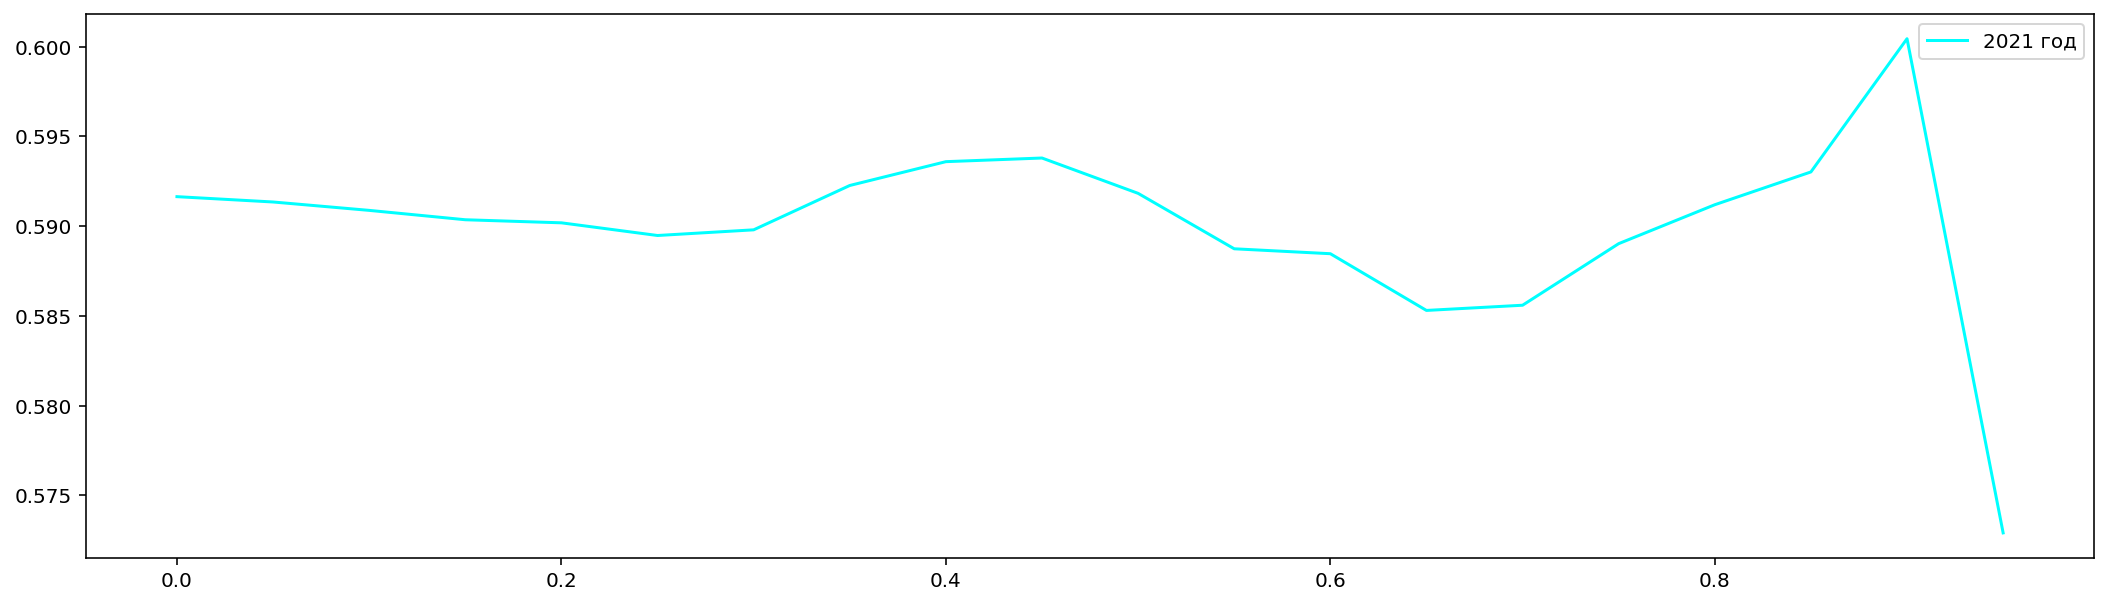

2022
roc_auc = 0.50
Time to train = 26.03 seconds
максимальная точность 0.4547547778033617


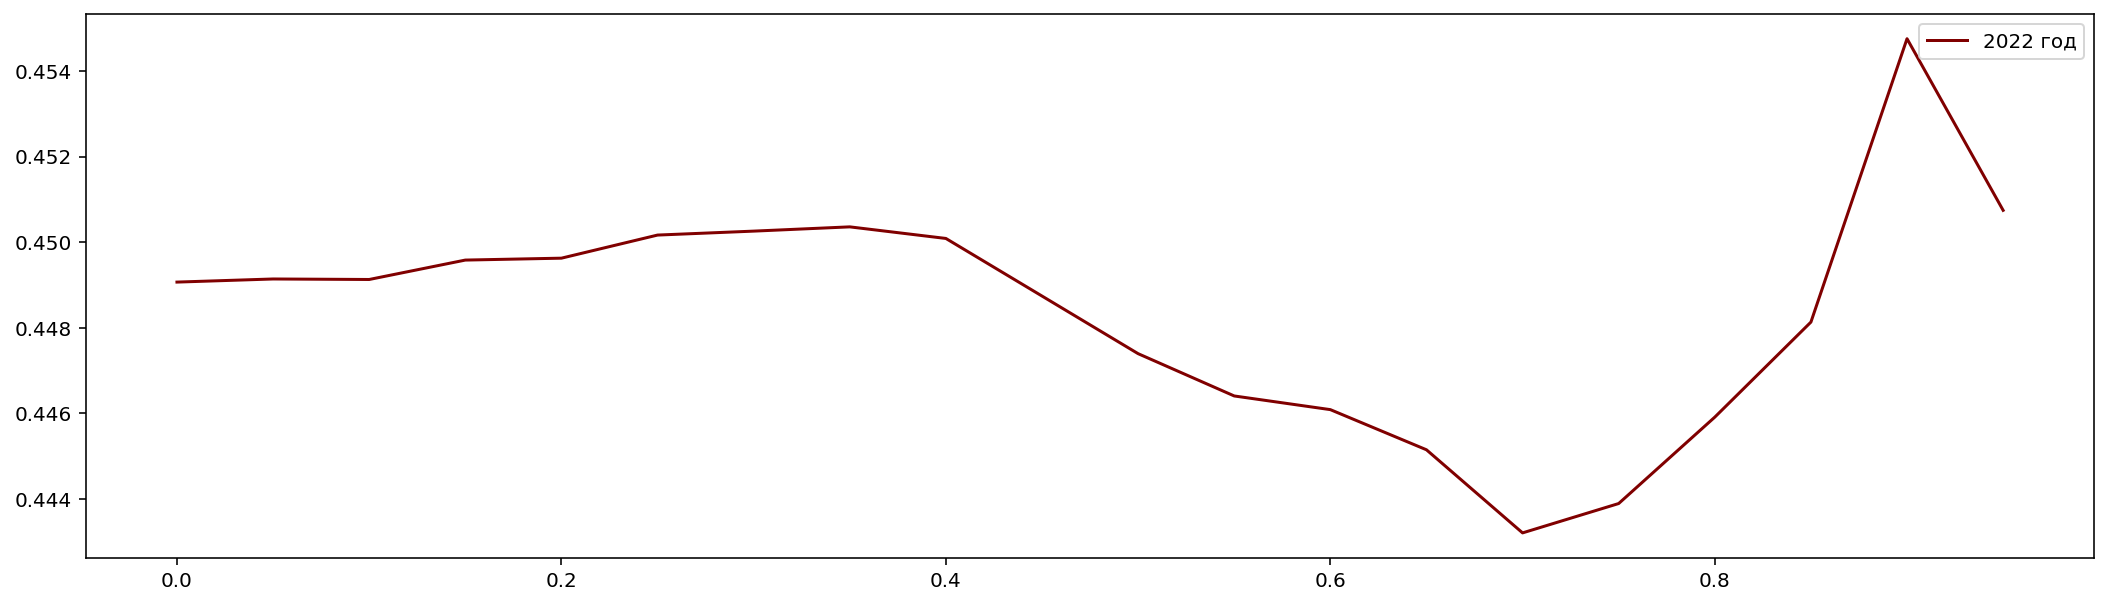

In [72]:

# Обучение на 2-х годах



colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'darkblue', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2014, 2022):
    train = s_edit[(s_edit.index.year <= i) & (s_edit.index.year == i-1)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = RandomForestClassifier(random_state=42)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

### MLP Classifier

2014
roc_auc = 0.51
Time to train = 4.25 seconds
максимальная точность 0.641298958849777


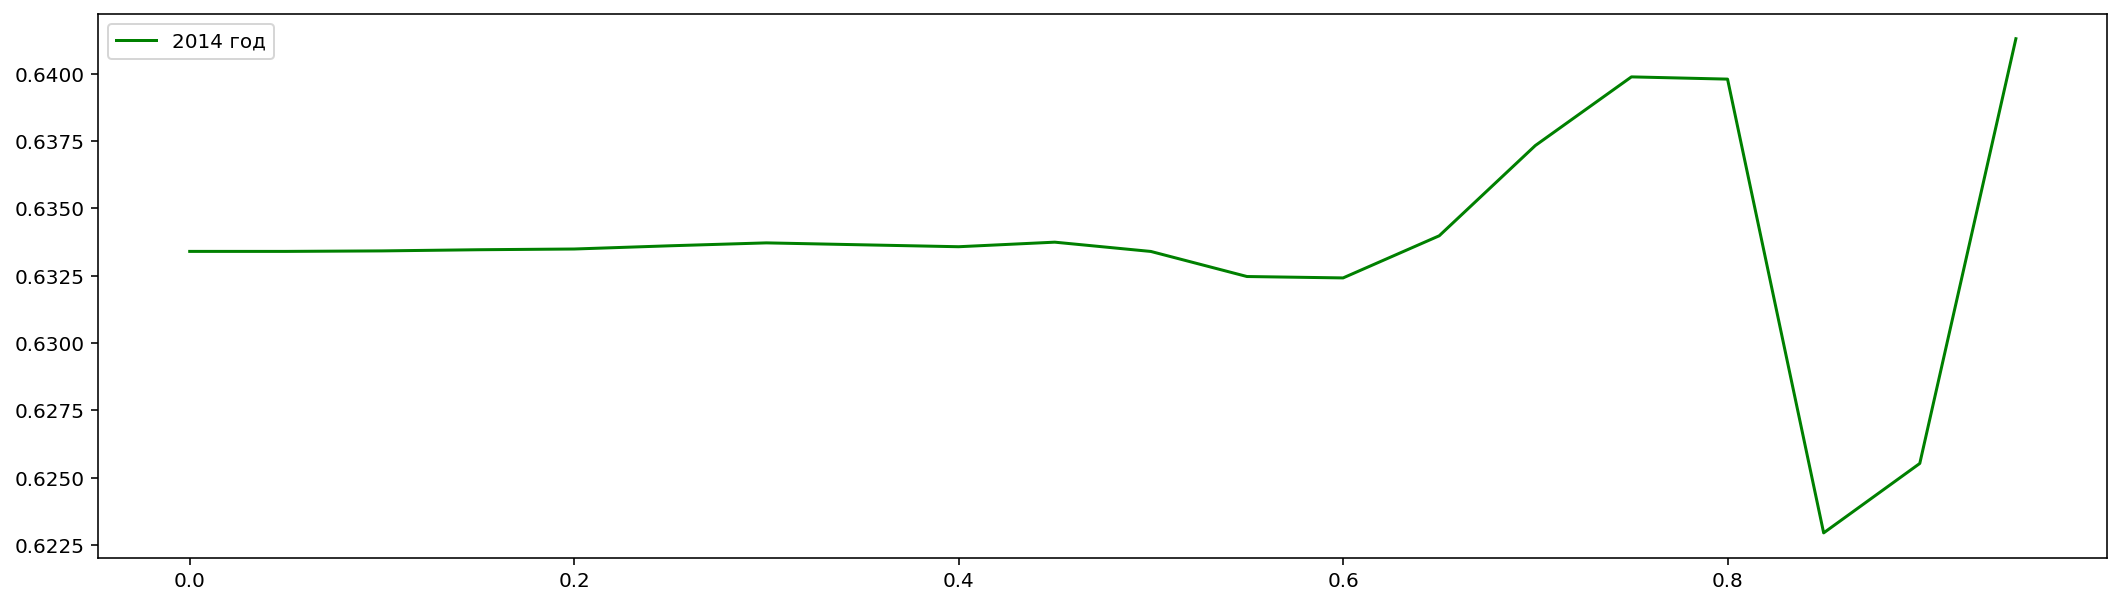

2015
roc_auc = 0.49
Time to train = 95.16 seconds
максимальная точность 0.59375


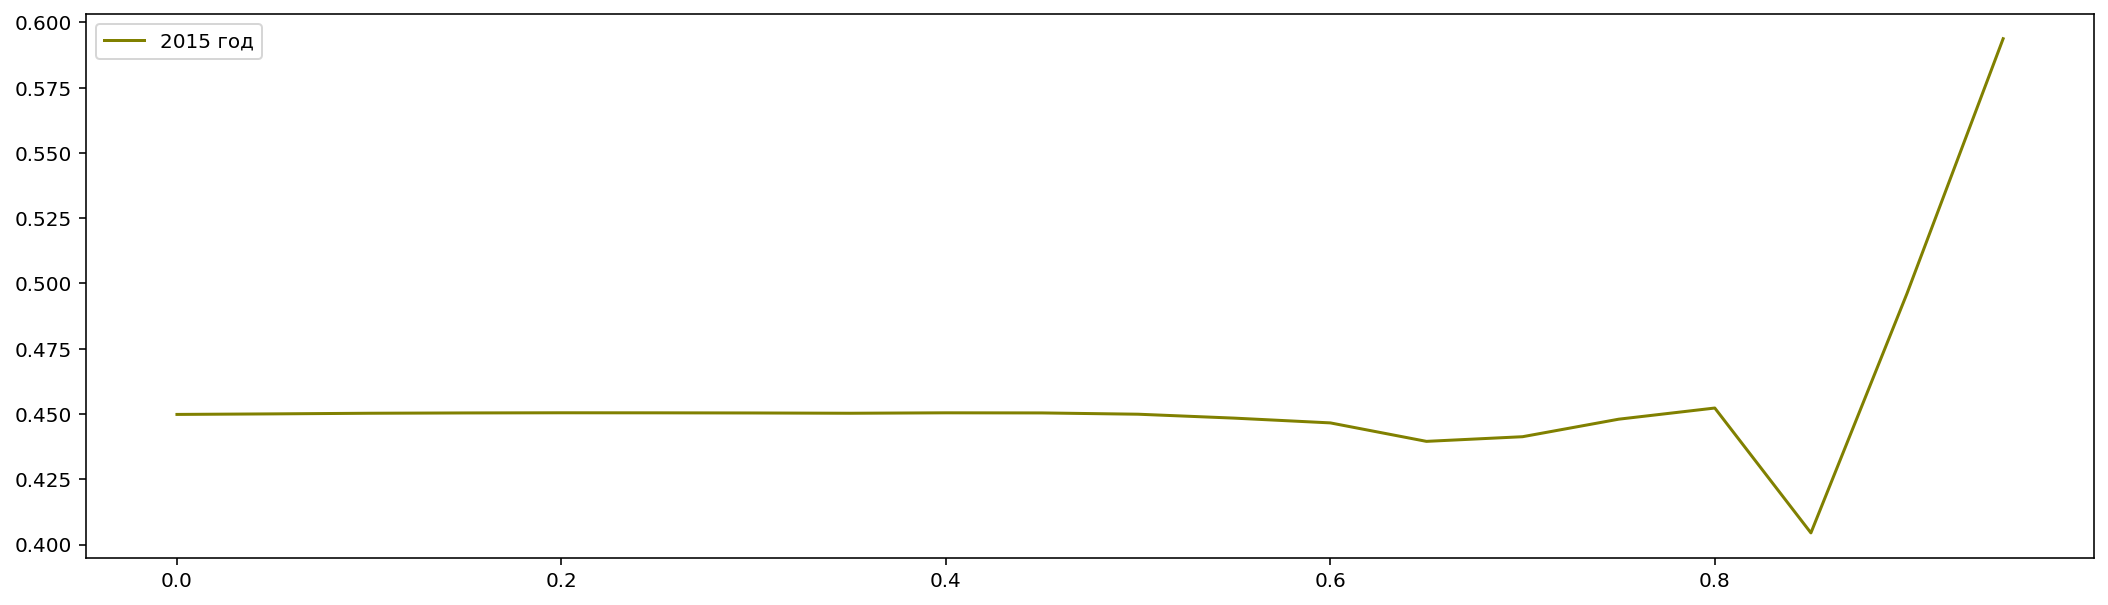

2016
roc_auc = 0.52
Time to train = 182.09 seconds
максимальная точность 0.8983050847457628


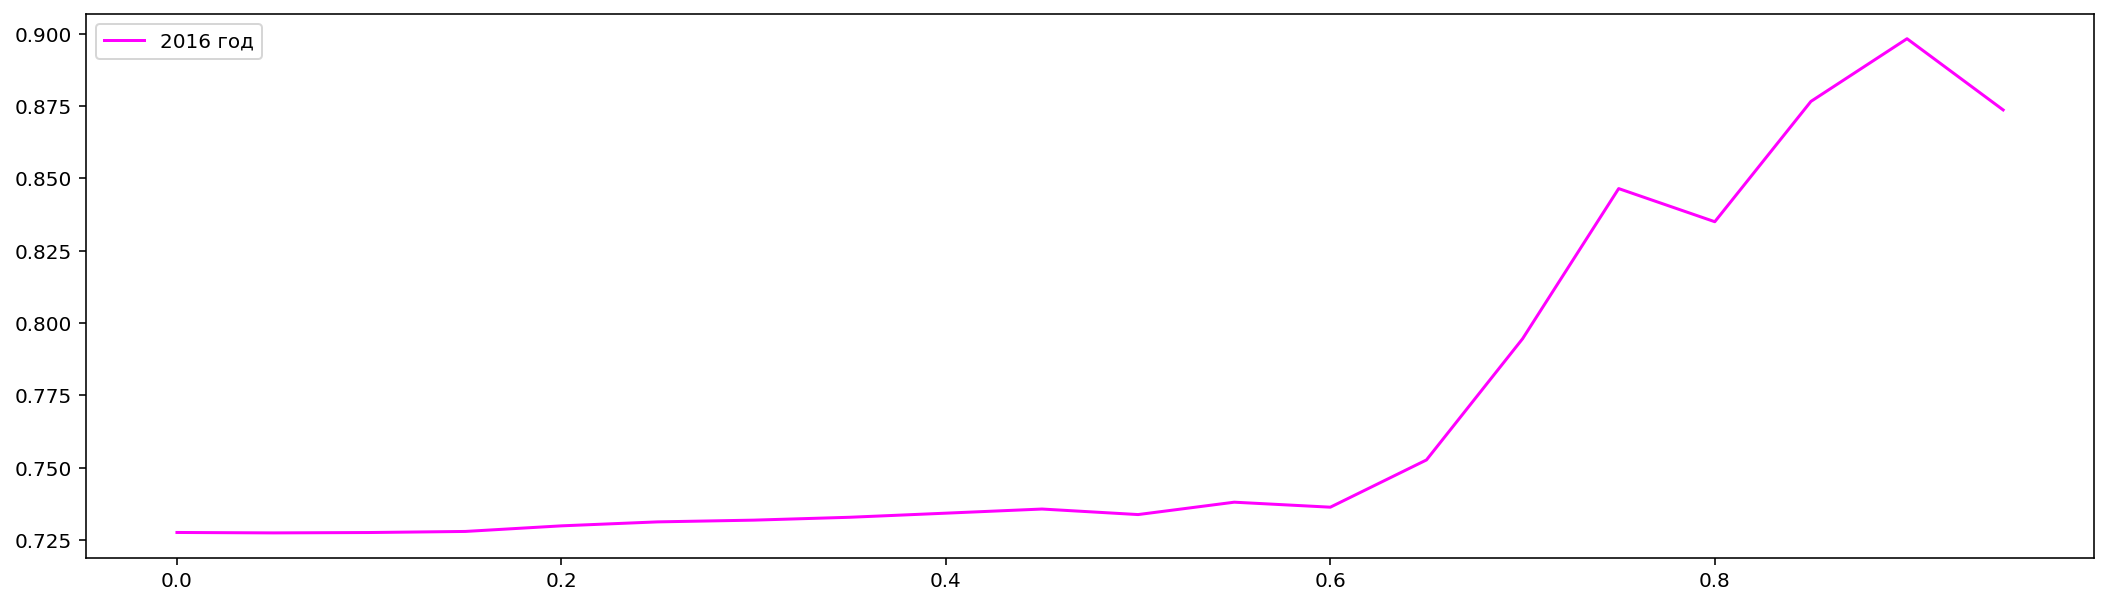

2017
roc_auc = 0.51
Time to train = 185.02 seconds
максимальная точность 0.7363636363636363


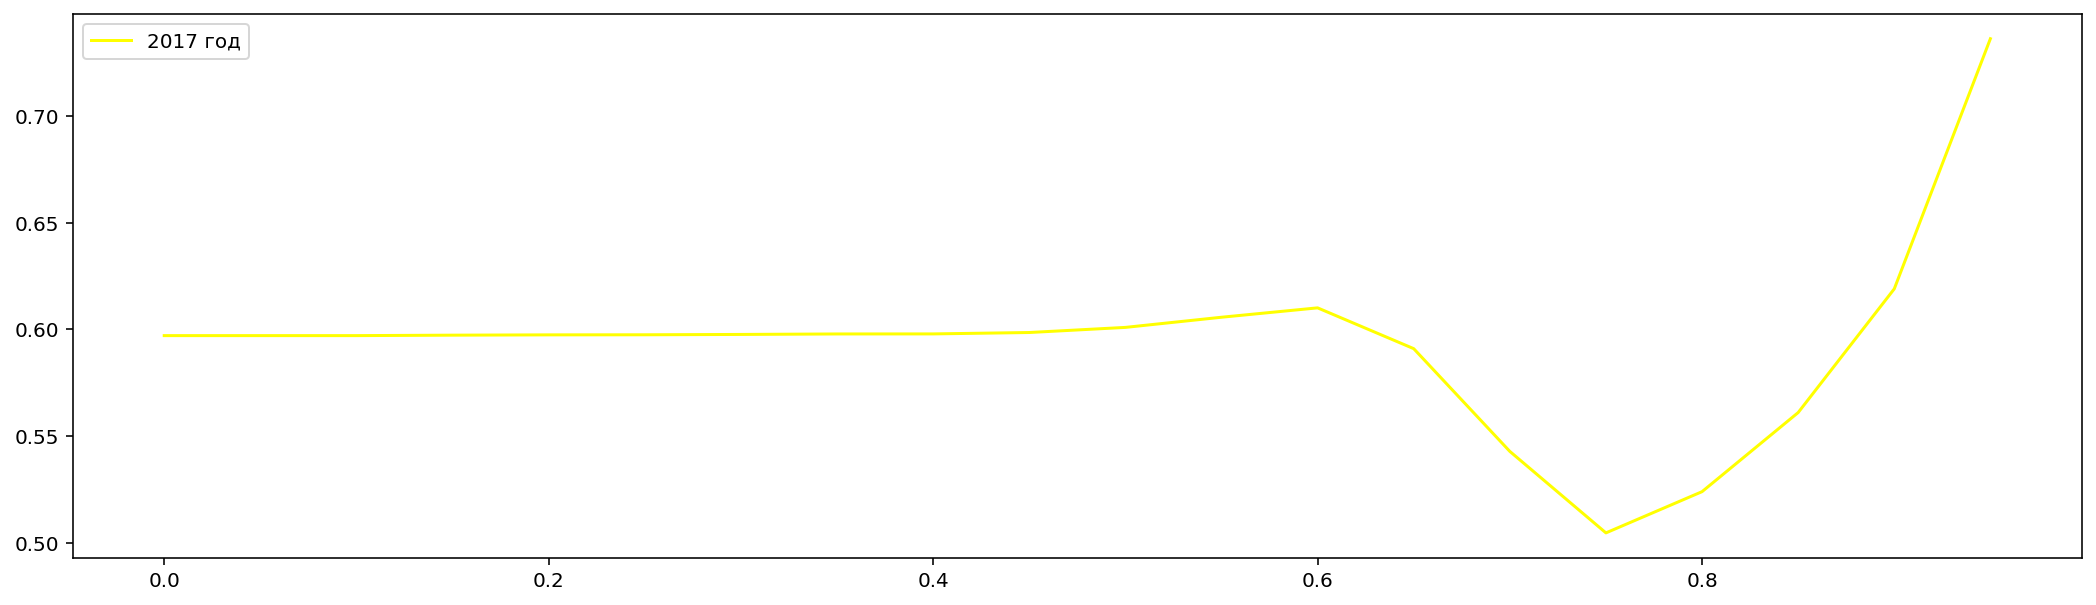

2018
roc_auc = 0.50
Time to train = 131.07 seconds
максимальная точность 0.7894736842105263


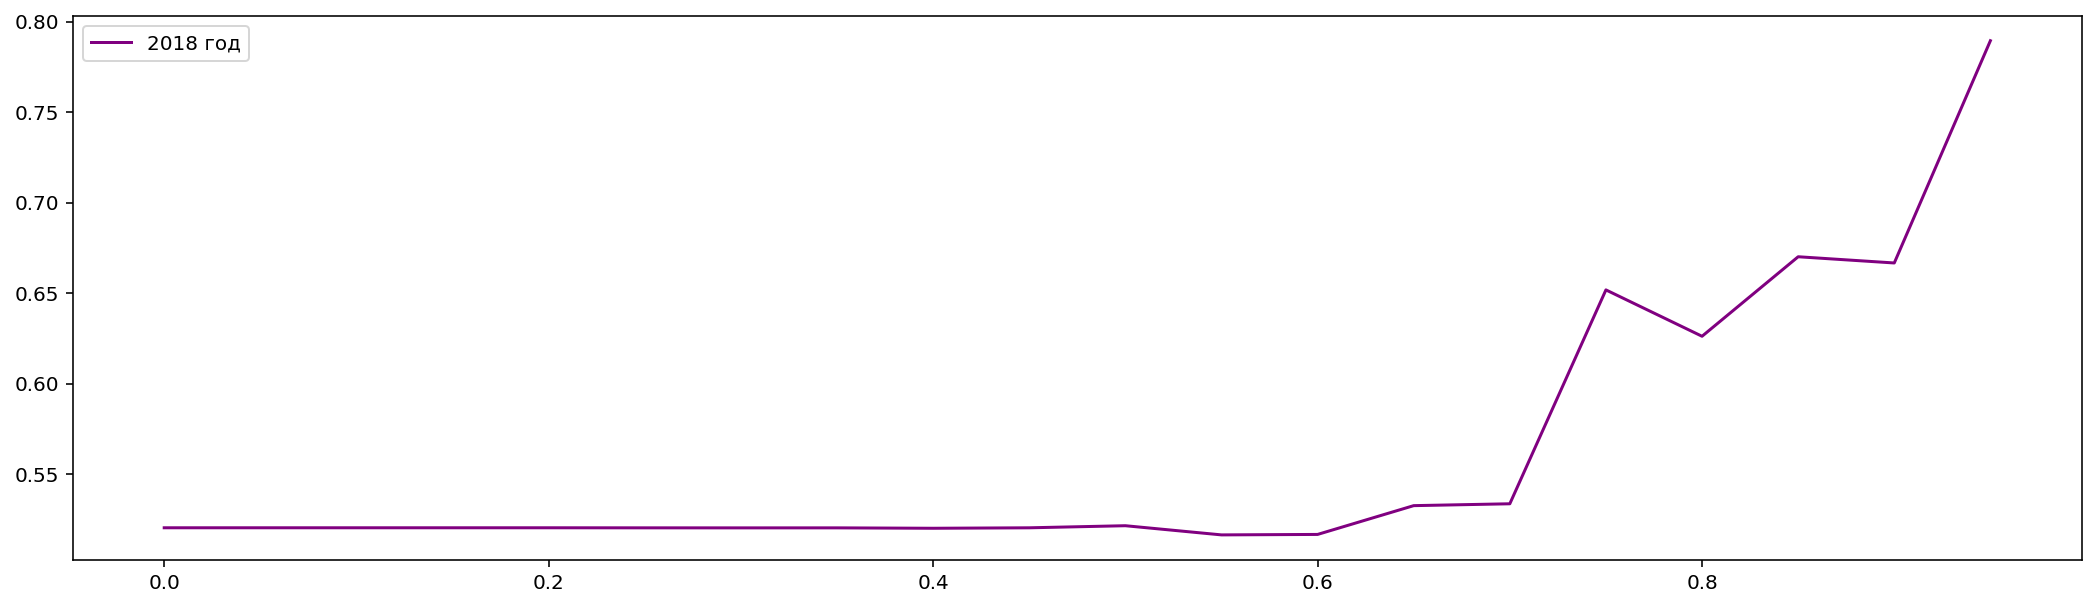

2019
roc_auc = 0.51
Time to train = 136.45 seconds
максимальная точность 0.7029702970297029


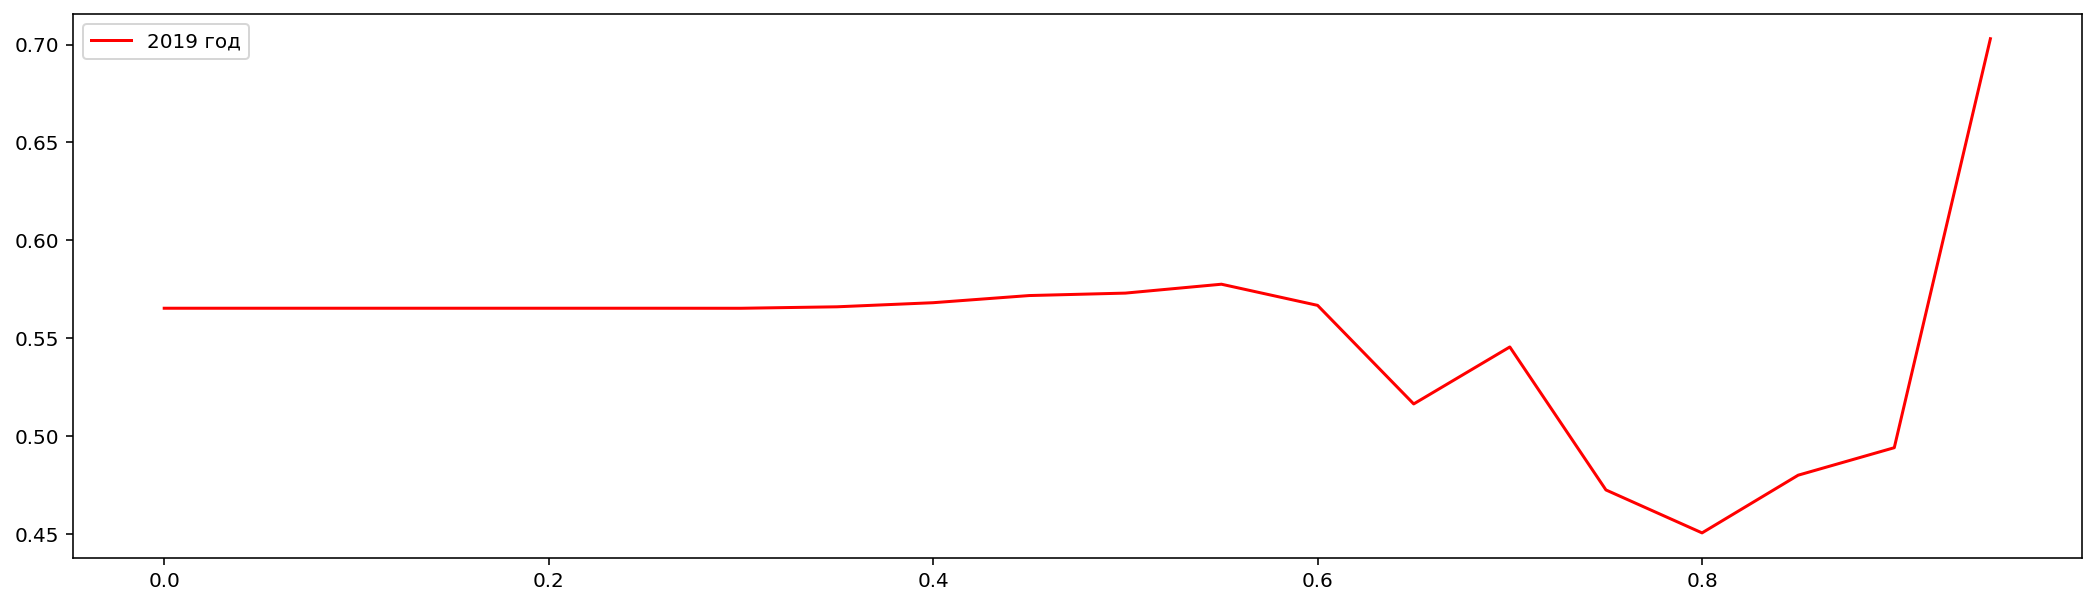

2020
roc_auc = 0.50
Time to train = 128.68 seconds
максимальная точность 0.9212656364974245


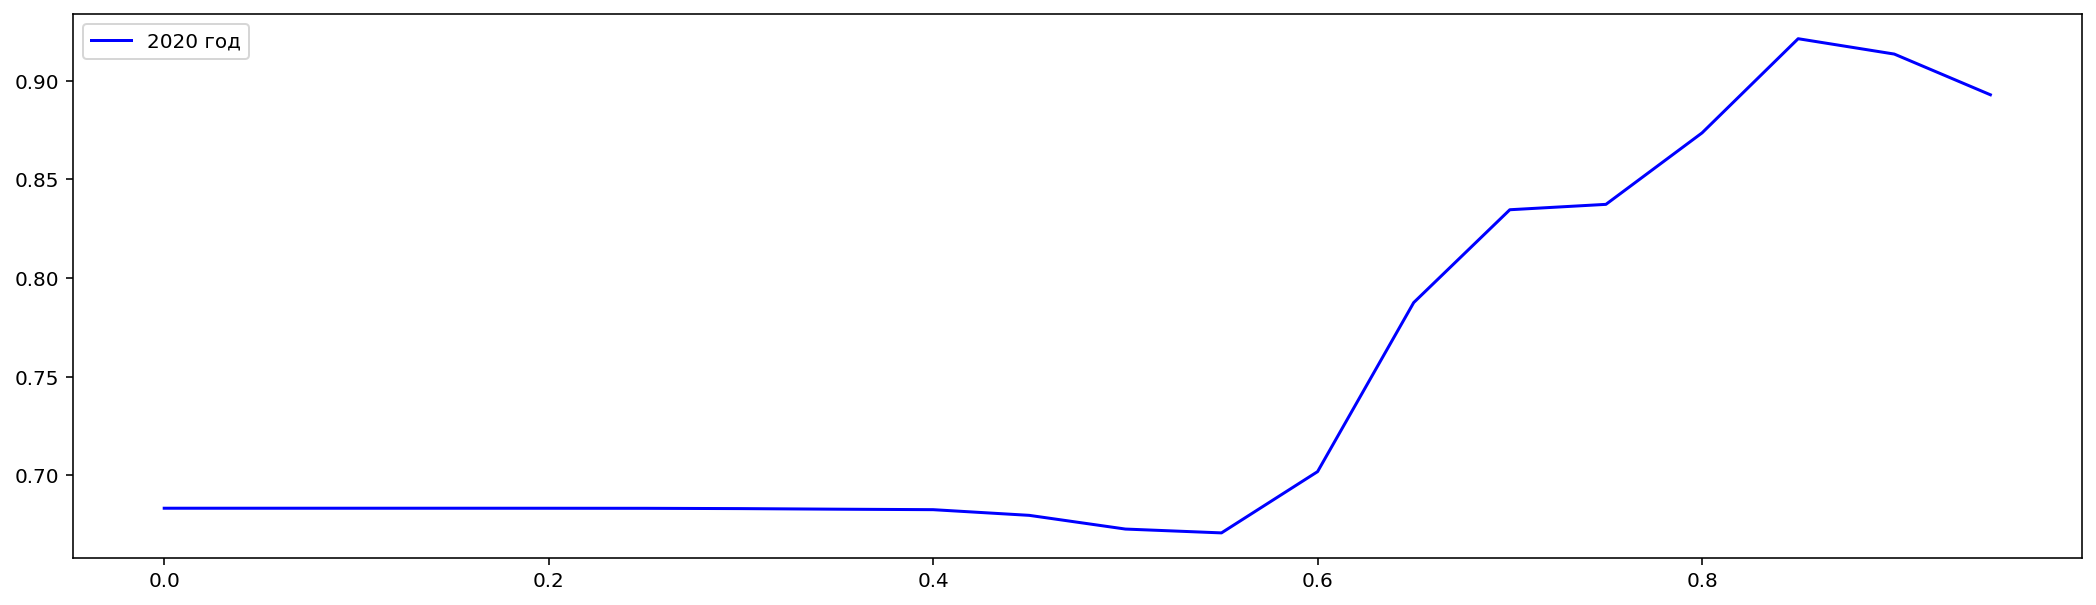

2021
roc_auc = 0.51
Time to train = 168.53 seconds
максимальная точность 0.682068470193919


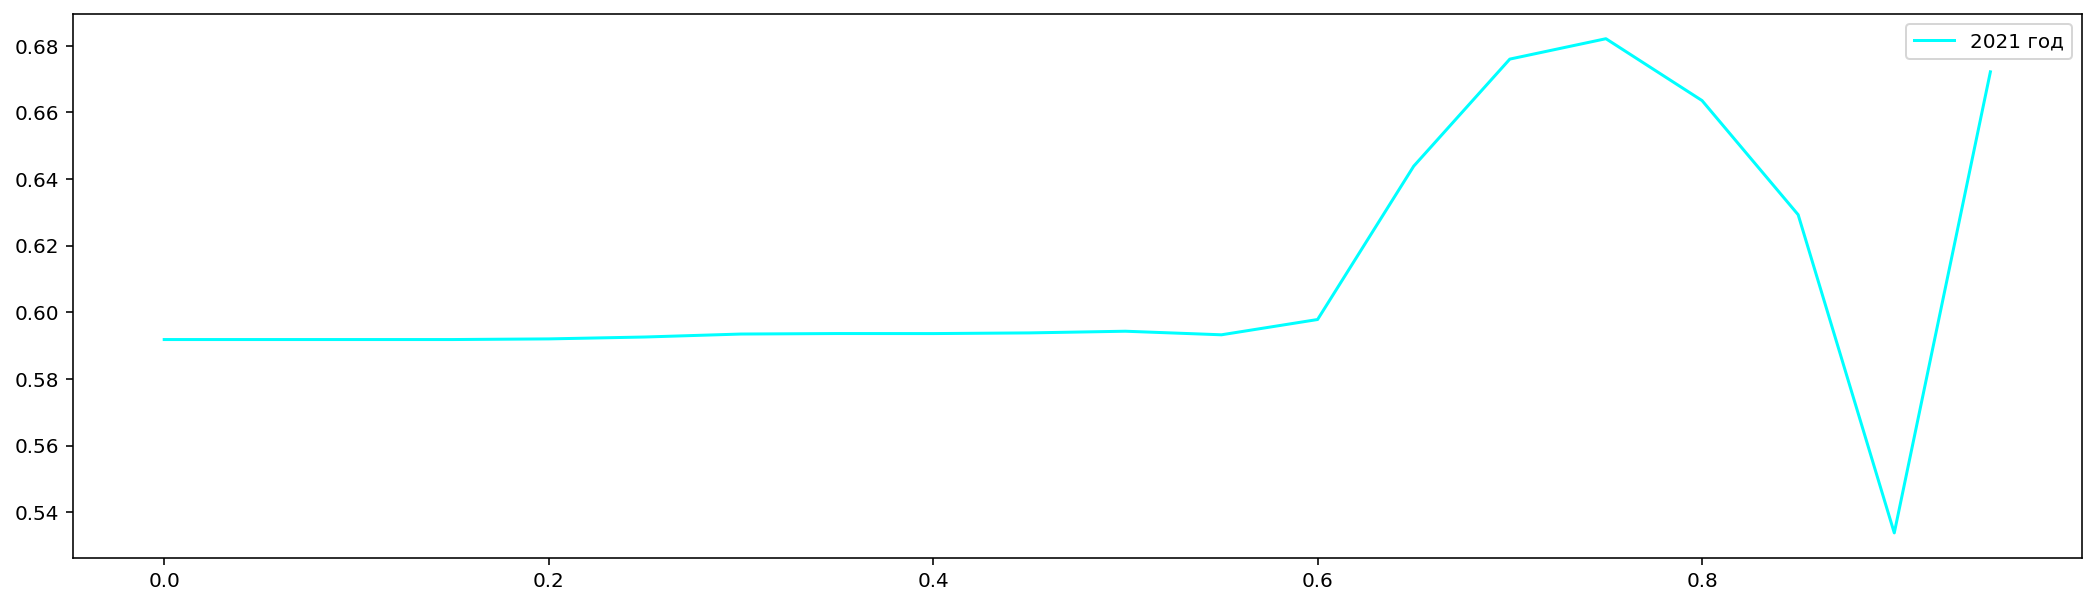

2022
roc_auc = 0.50
Time to train = 142.21 seconds
максимальная точность 0.4562397462539648


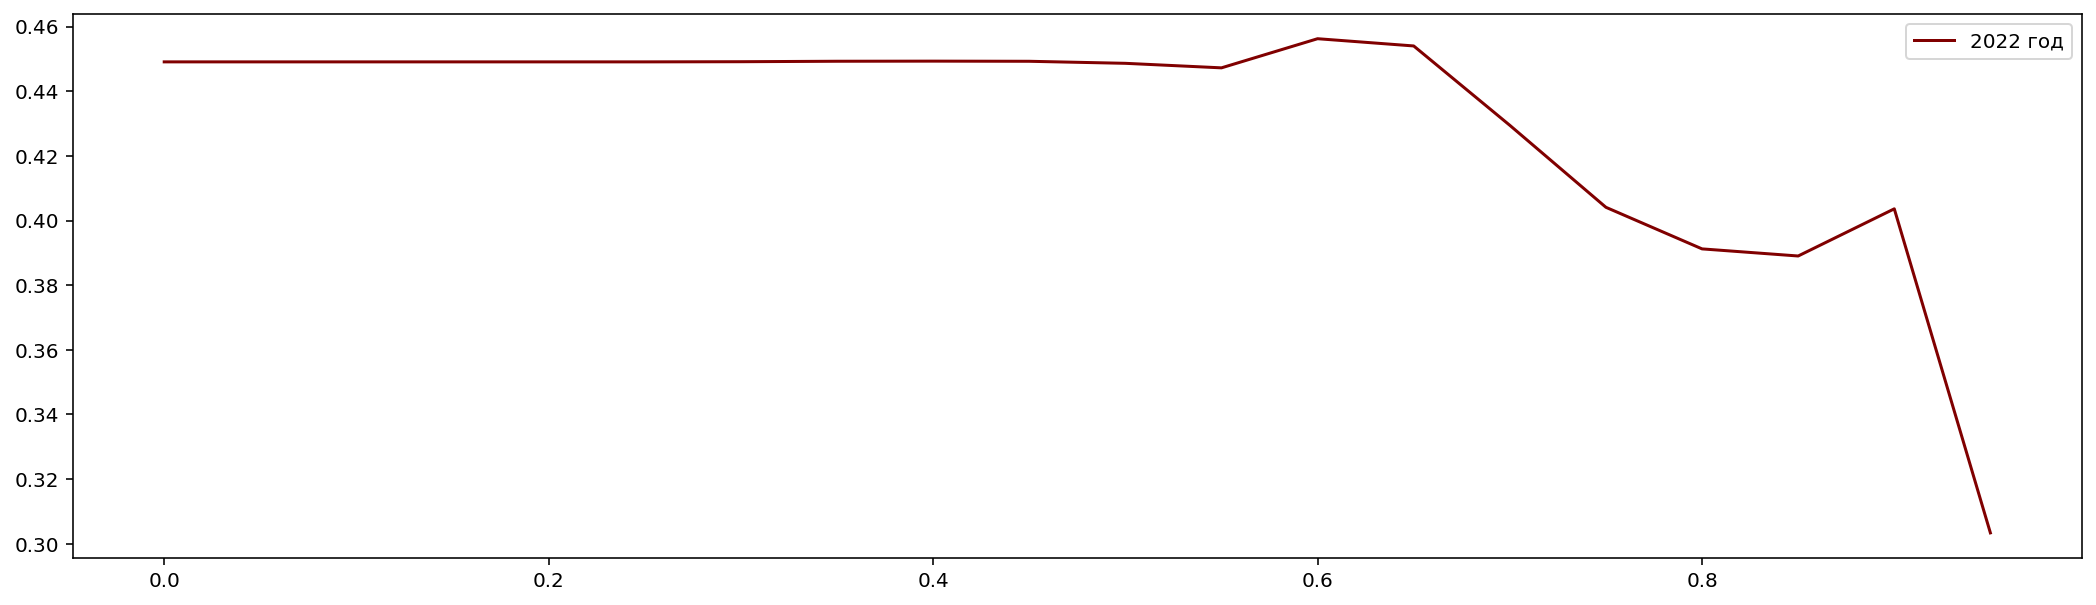

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = MLPClassifier(random_state=42)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

### BaggingClassifier

2014
roc_auc = 0.52
Time to train = 0.21 seconds
максимальная точность 0.6541209620609842


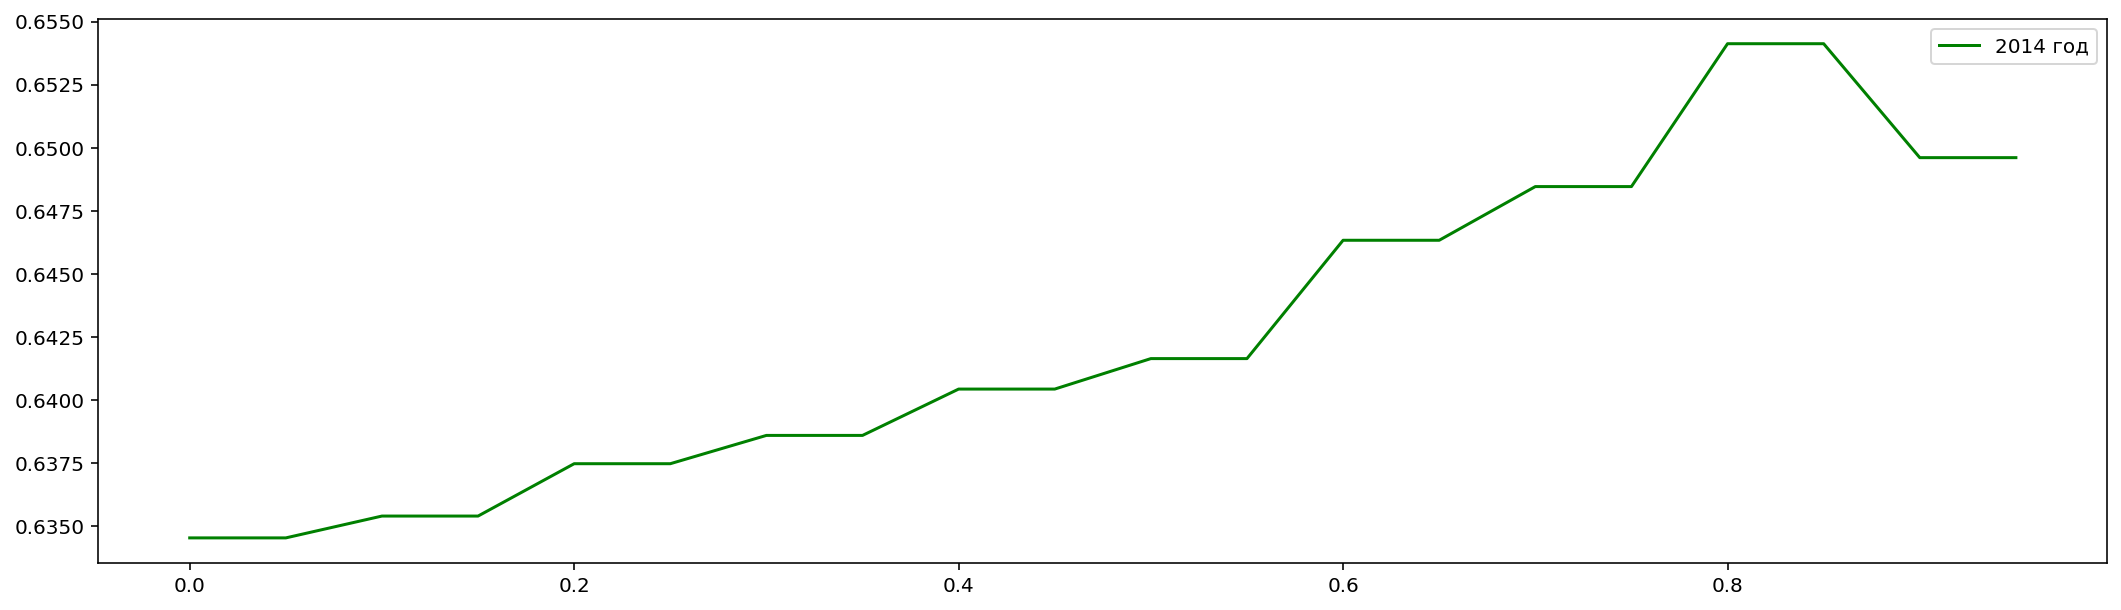

2015
roc_auc = 0.52
Time to train = 3.03 seconds
максимальная точность 0.48134927717294307


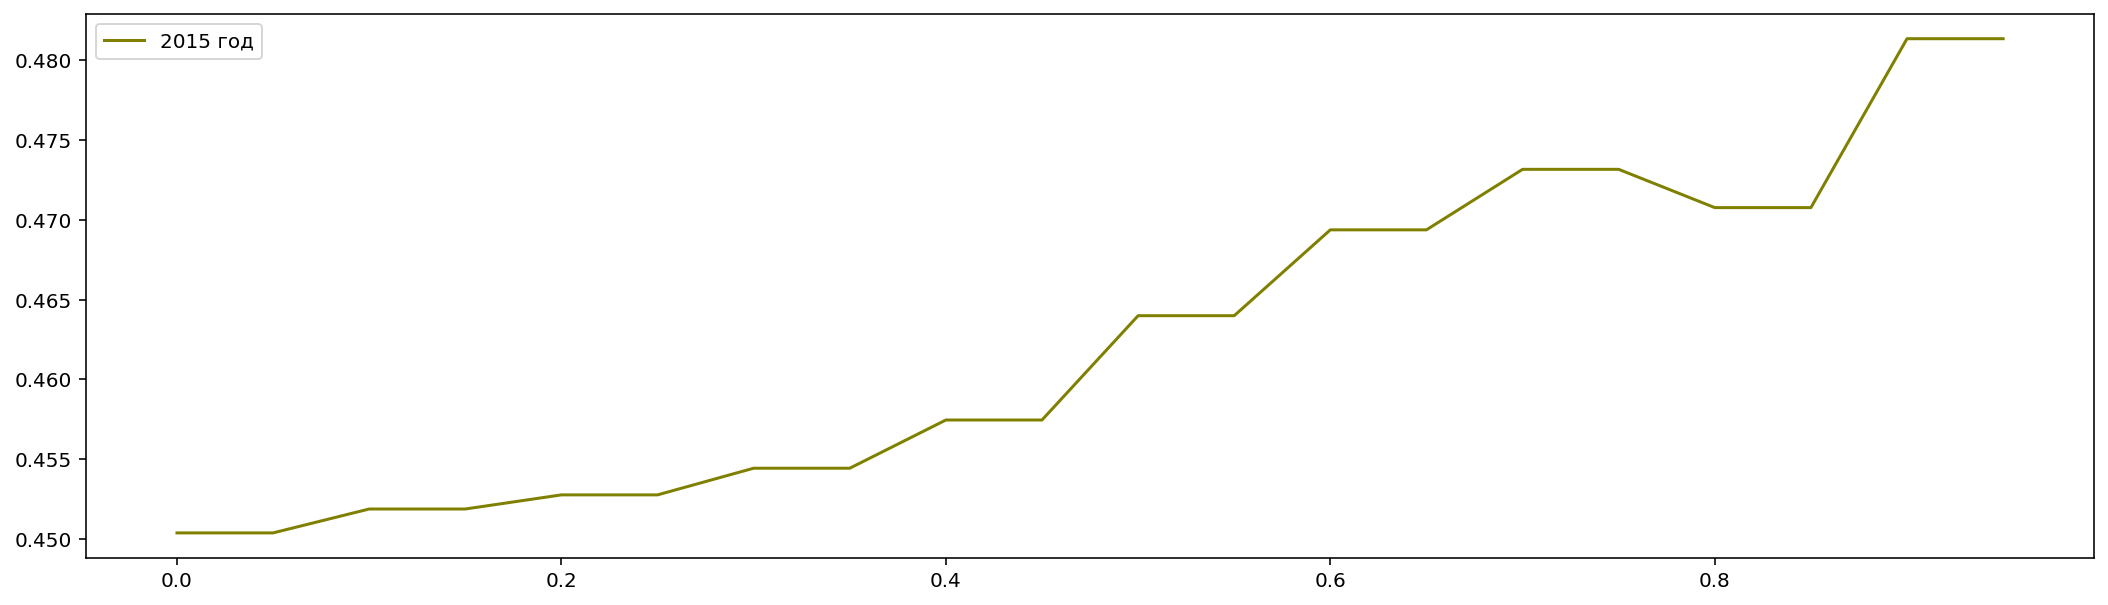

2016
roc_auc = 0.54
Time to train = 6.71 seconds
максимальная точность 0.7766634829672079


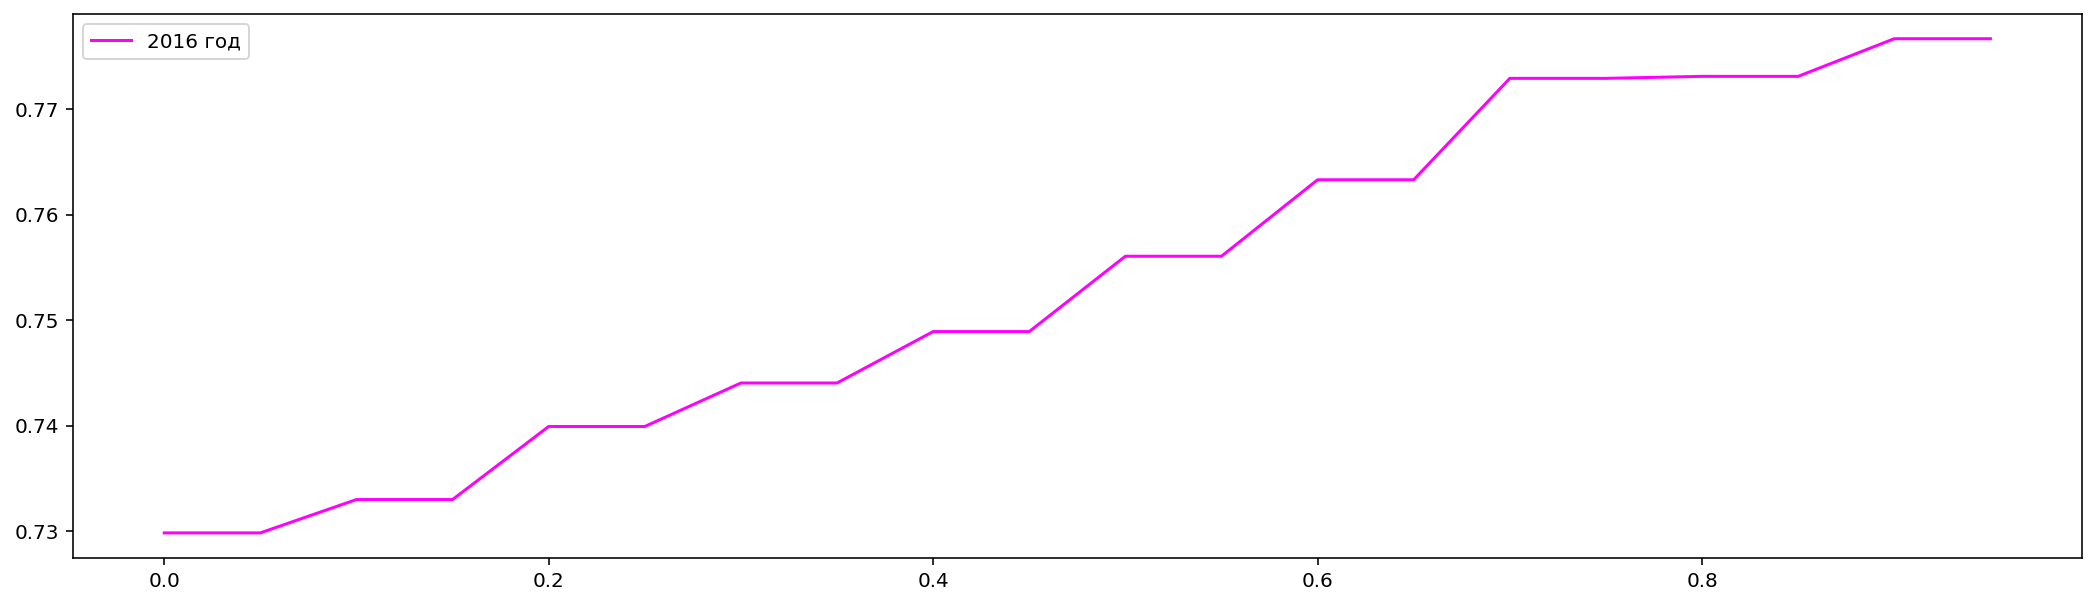

2017
roc_auc = 0.51
Time to train = 10.31 seconds
максимальная точность 0.6097849208225006


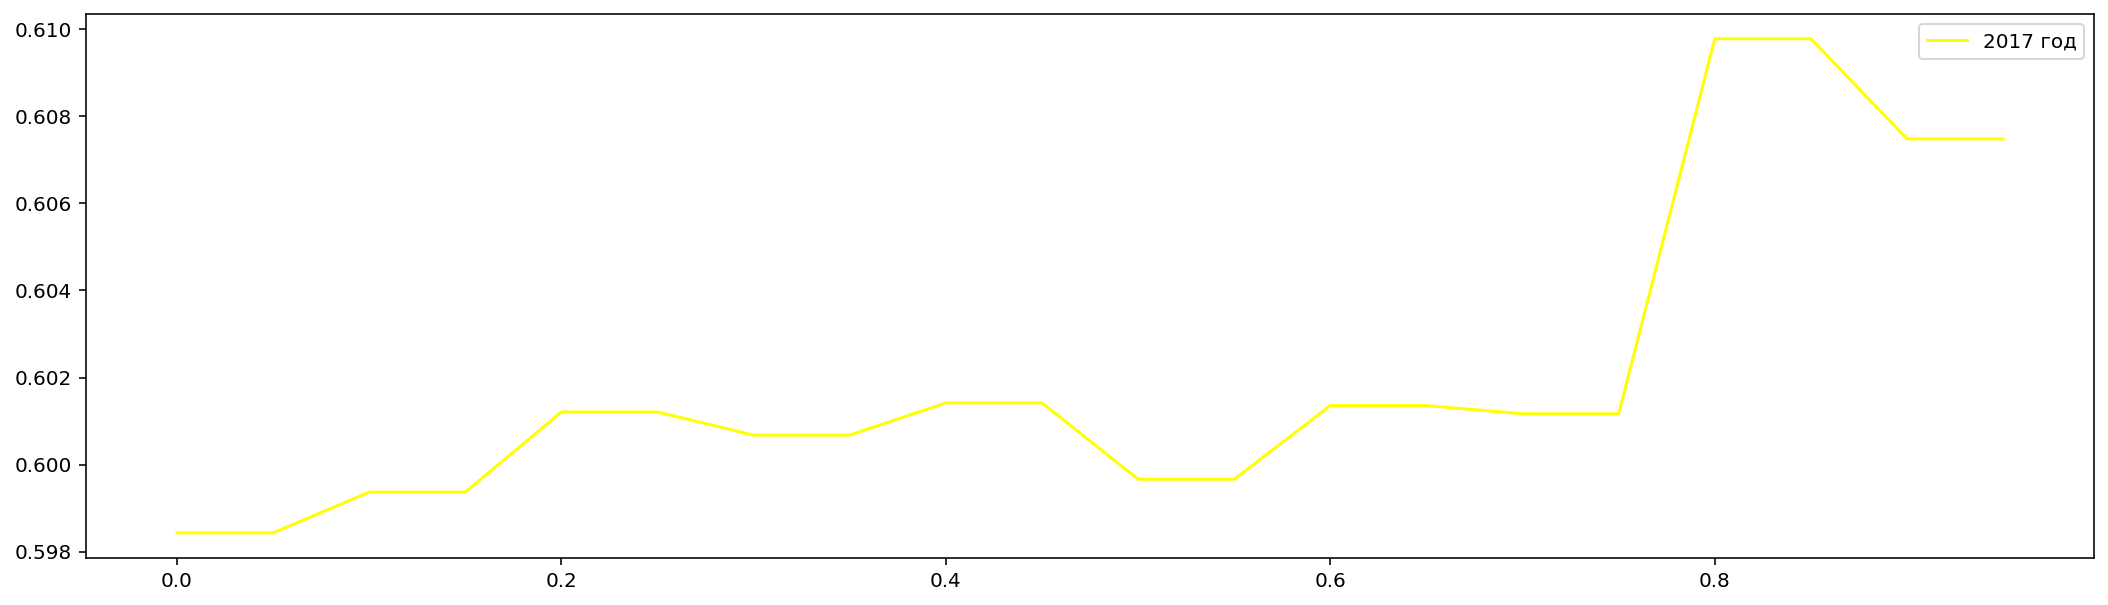

2018
roc_auc = 0.52
Time to train = 14.87 seconds
максимальная точность 0.5463661971830986


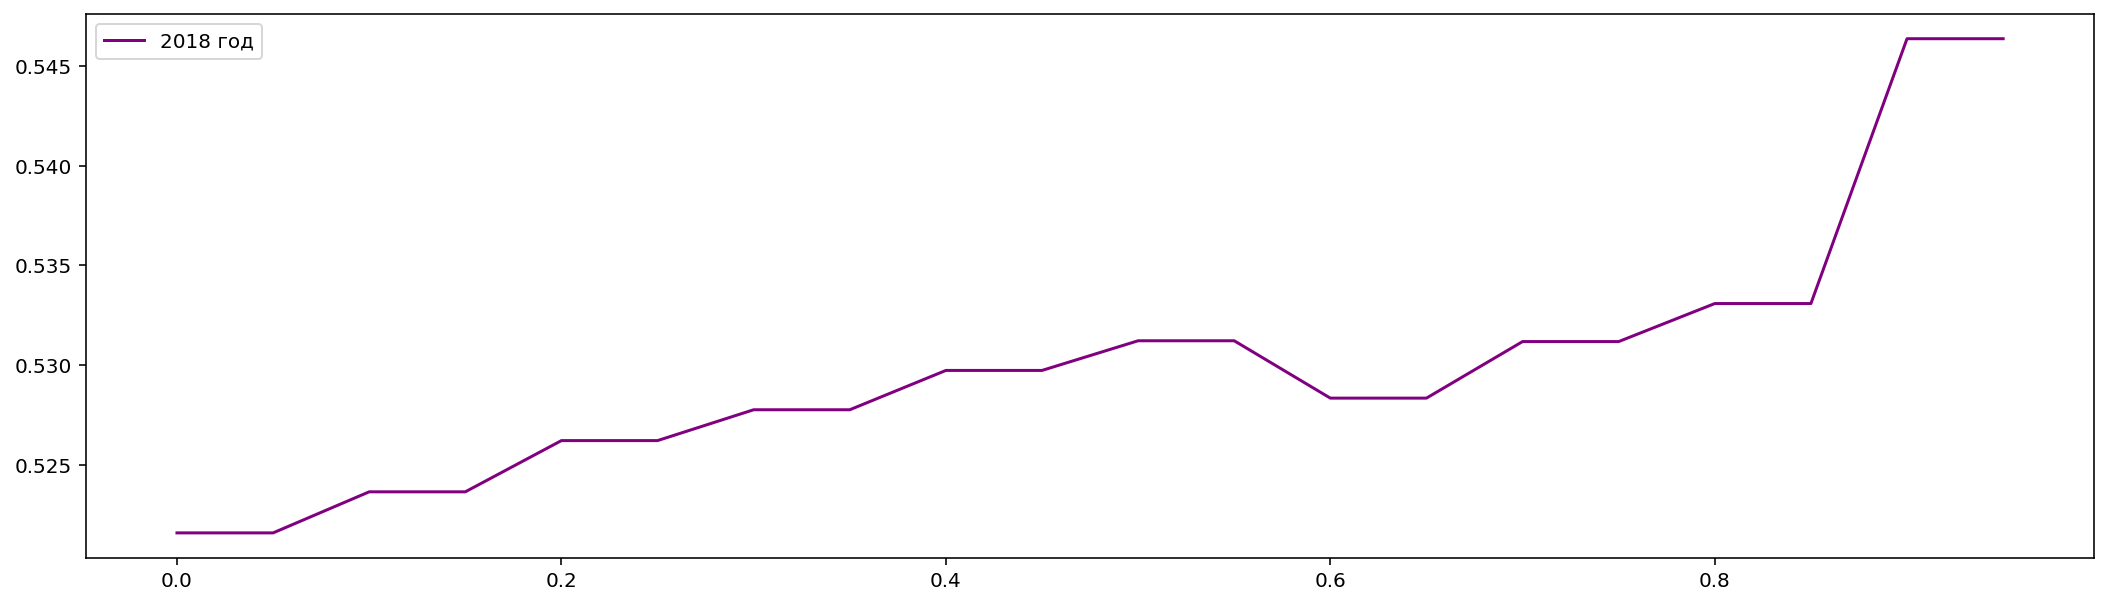

2019
roc_auc = 0.52
Time to train = 19.66 seconds
максимальная точность 0.5966084788029925


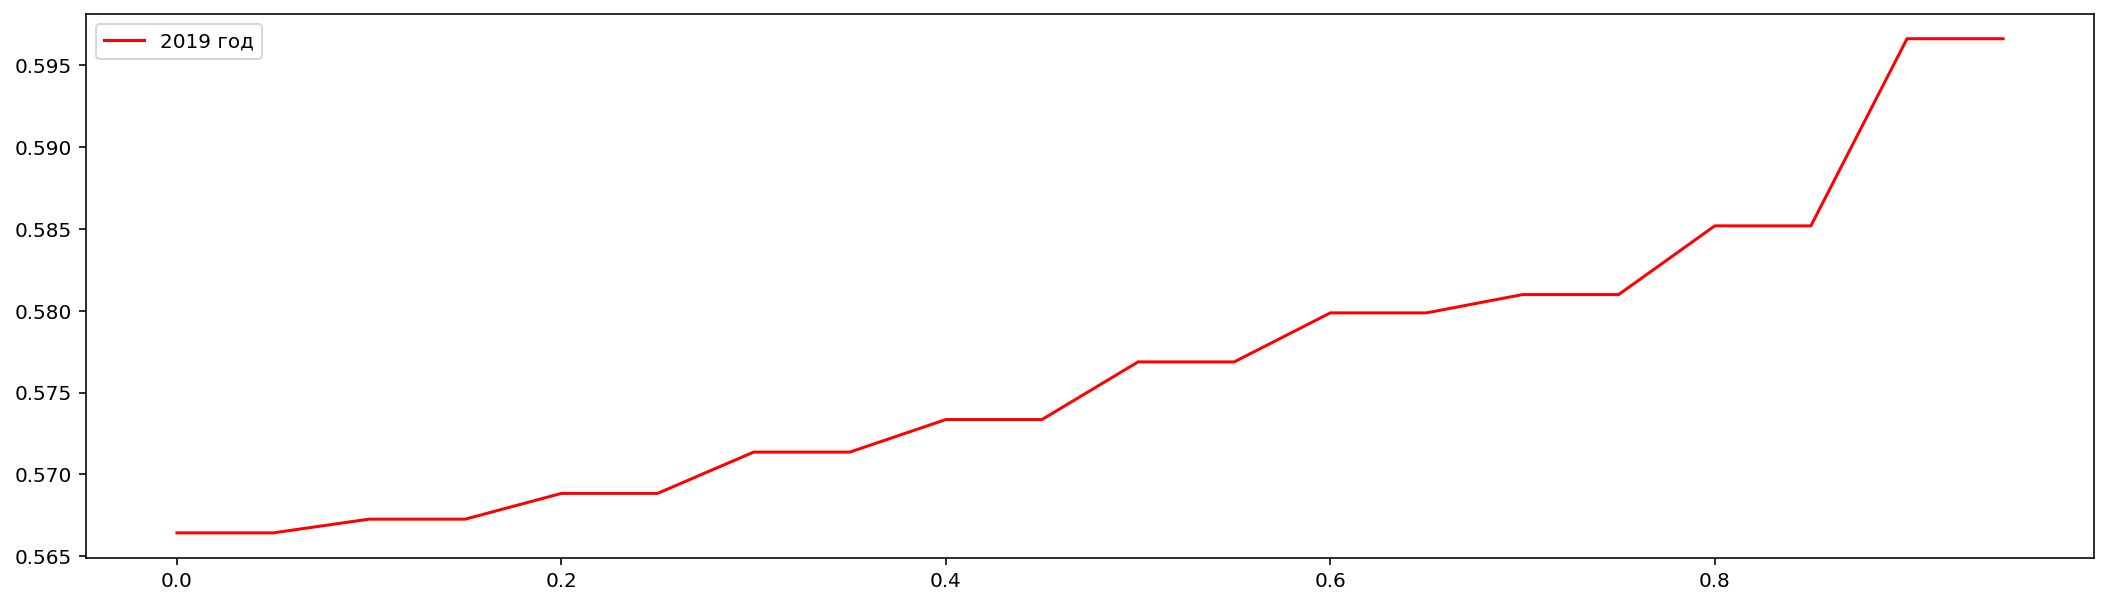

2020
roc_auc = 0.53
Time to train = 26.37 seconds
максимальная точность 0.7152509652509652


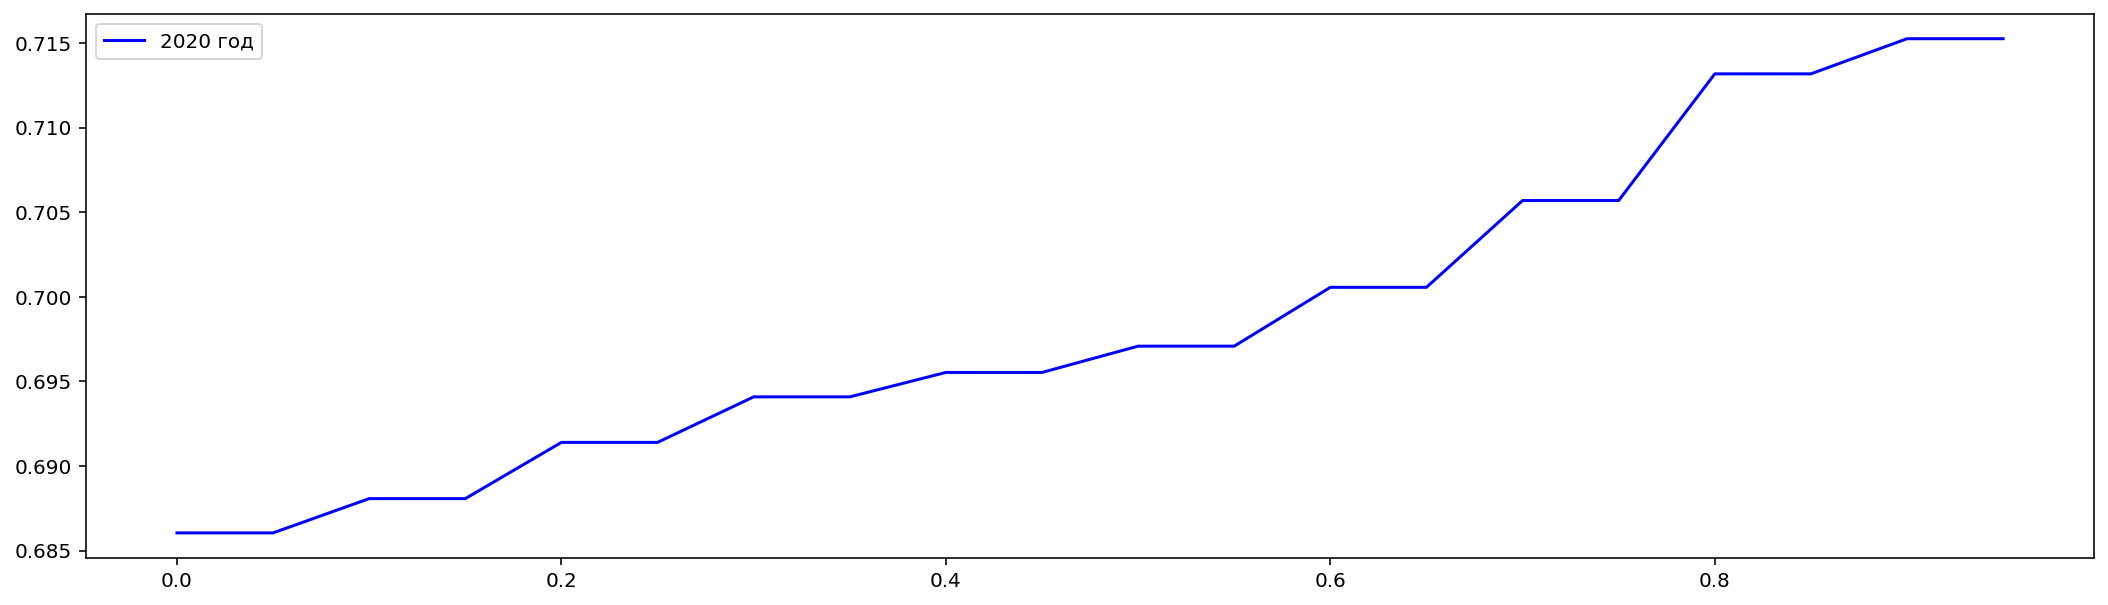

2021
roc_auc = 0.51
Time to train = 33.71 seconds
максимальная точность 0.6150877192982456


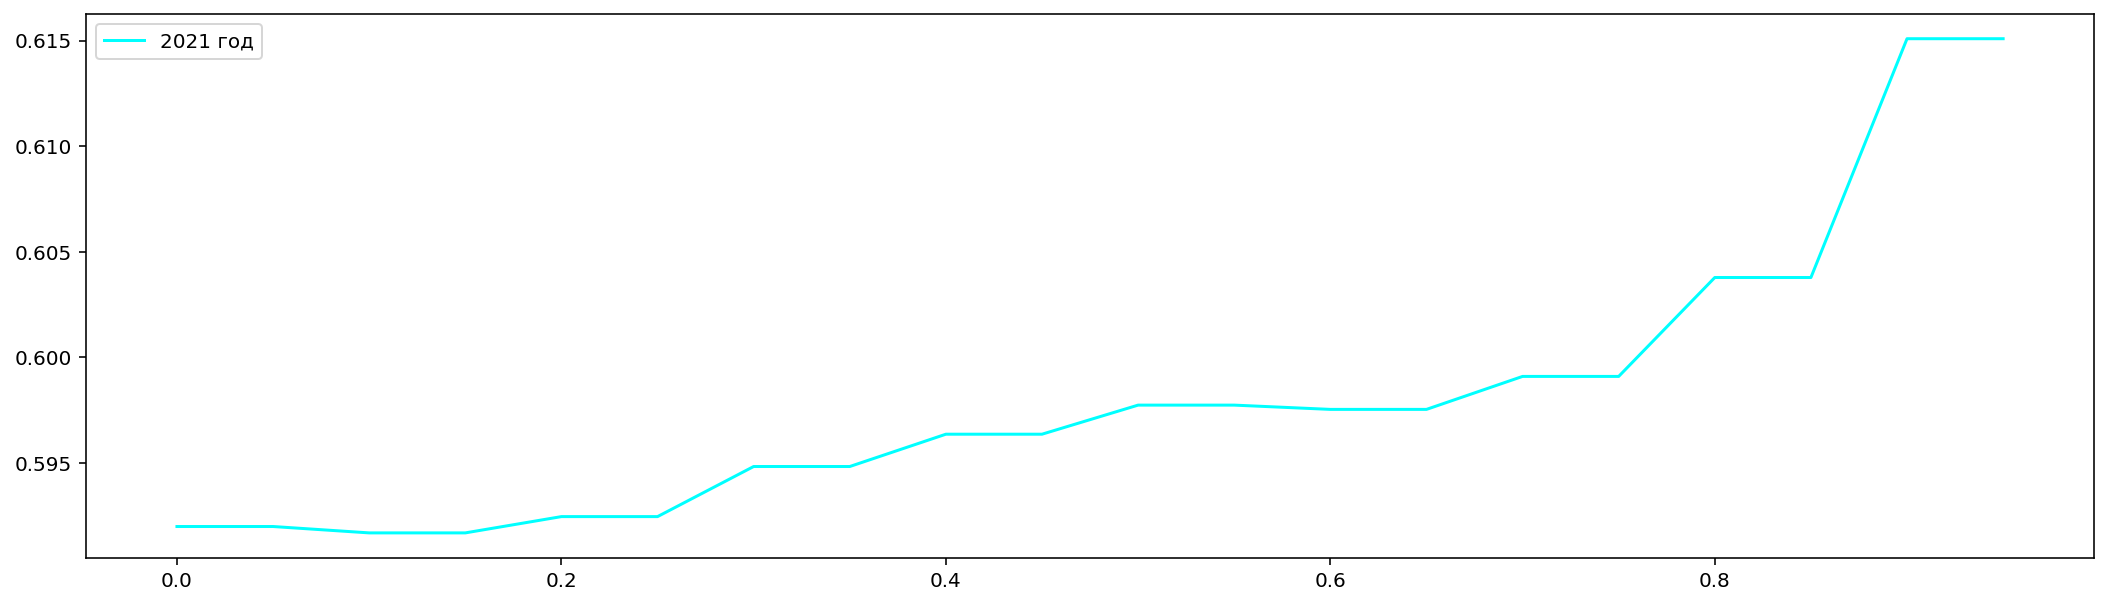

2022
roc_auc = 0.51
Time to train = 43.81 seconds
максимальная точность 0.45720880020846516


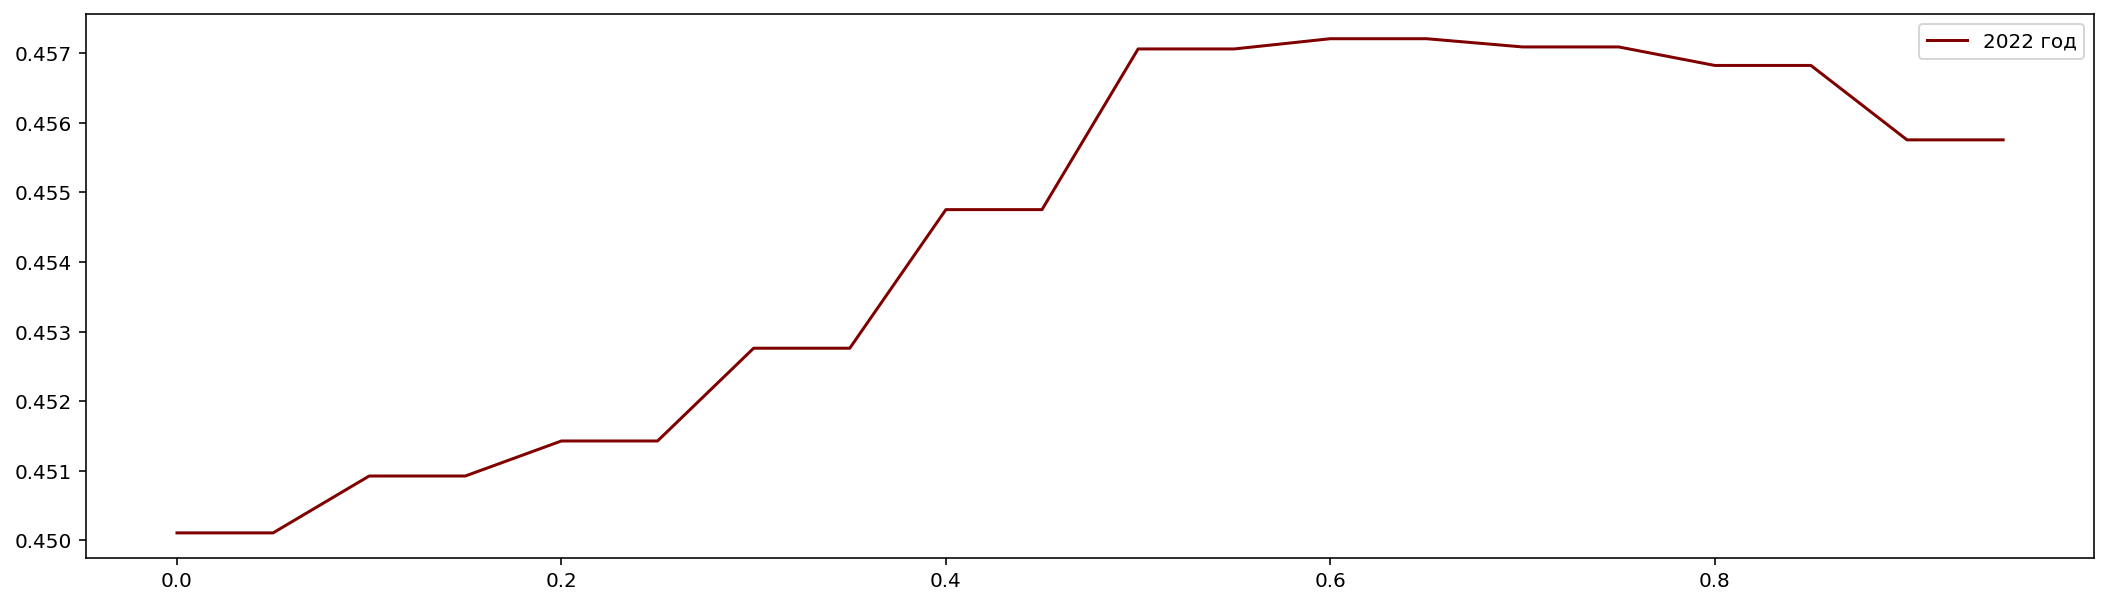

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = BaggingClassifier(random_state=42)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

### LogisticRegression

2014
roc_auc = 0.49
Time to train = 0.03 seconds
максимальная точность 0.6352898594438077


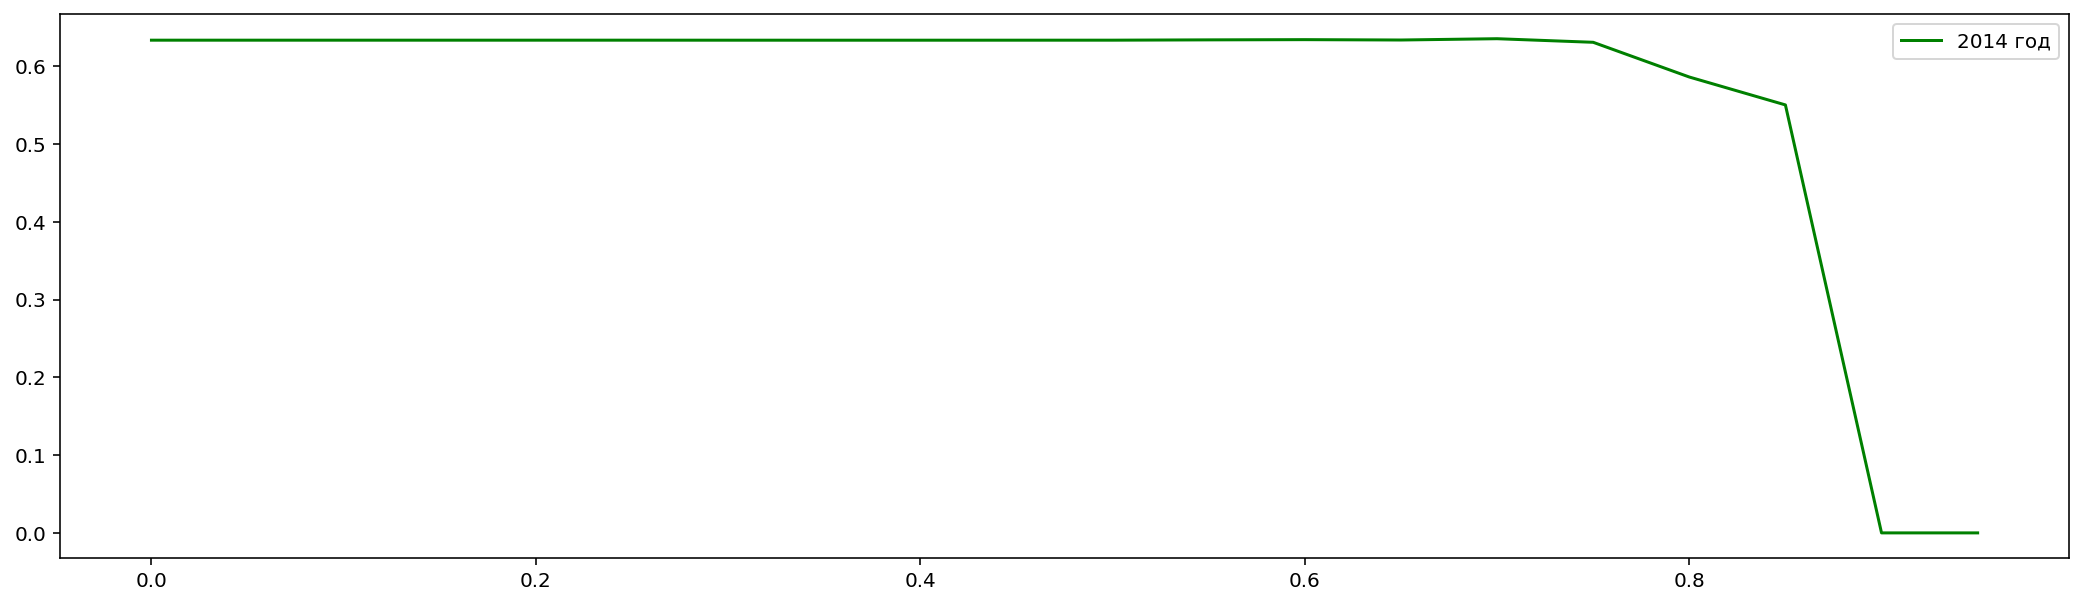

2015
roc_auc = 0.50
Time to train = 0.06 seconds
максимальная точность 0.4532310659991733


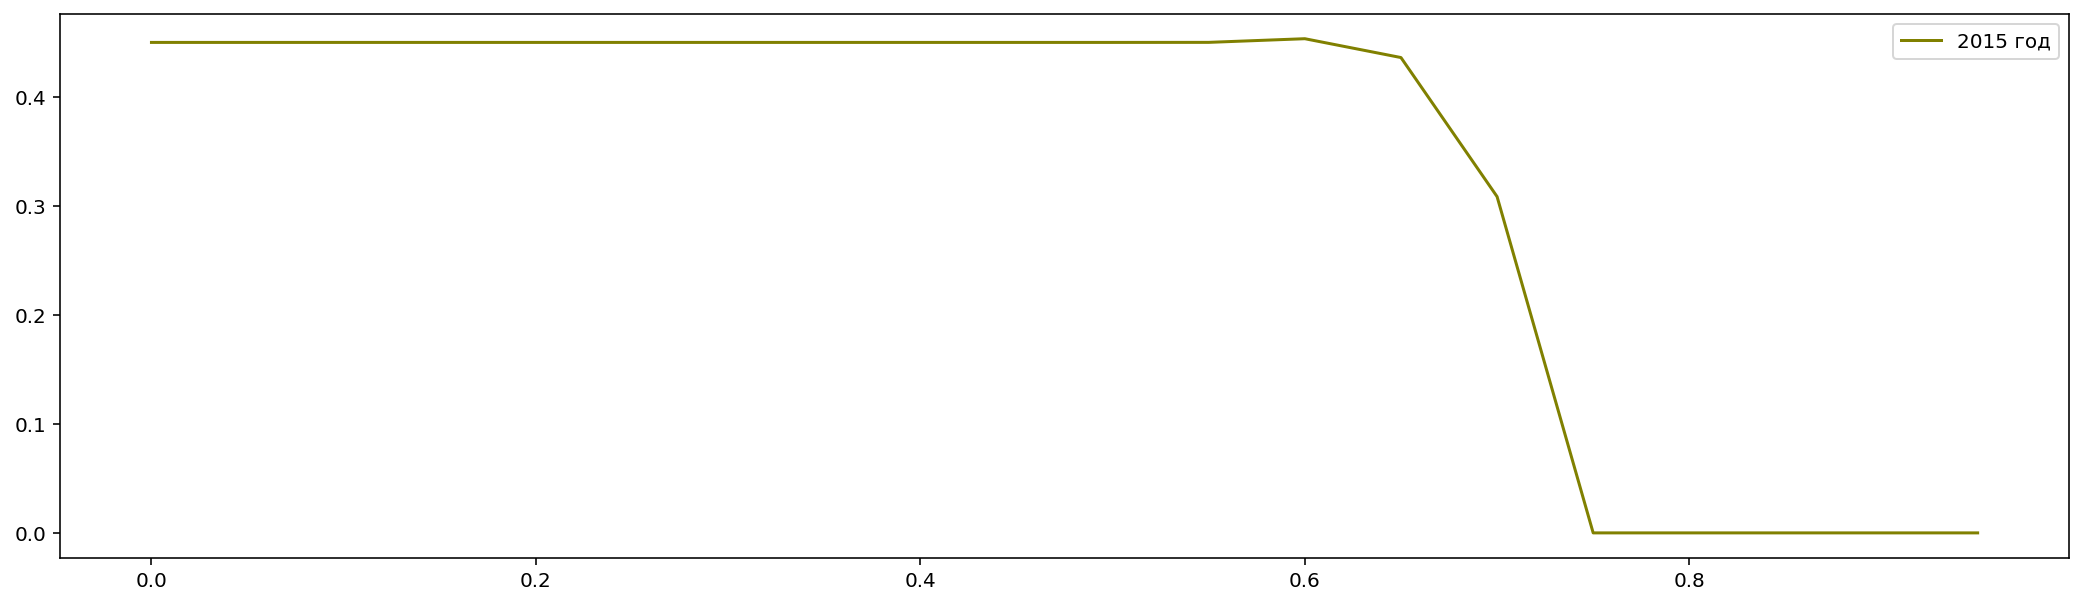

2016
roc_auc = 0.43
Time to train = 0.28 seconds
максимальная точность 0.9545454545454546


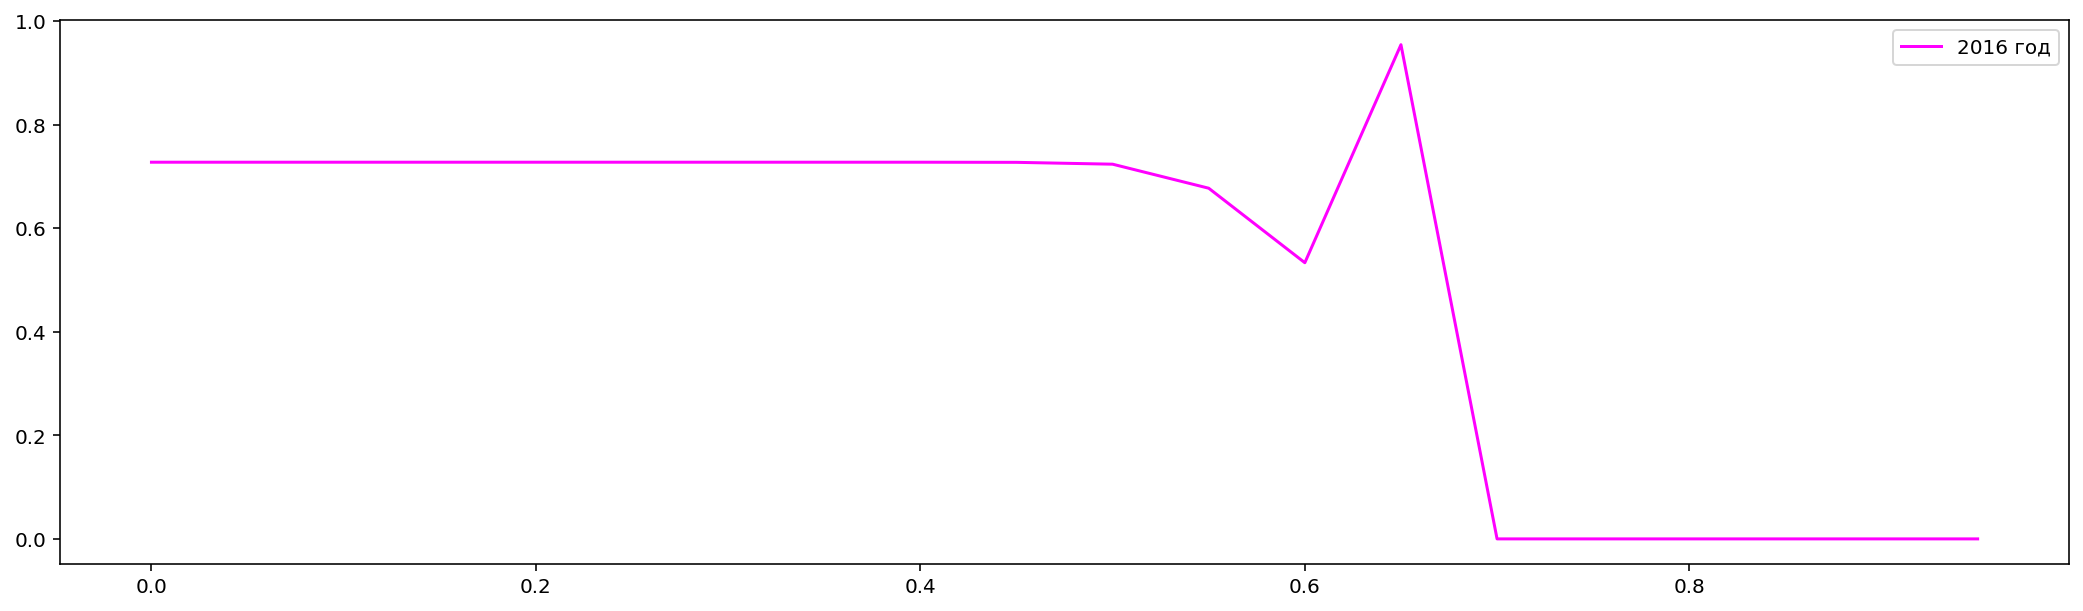

2017
roc_auc = 0.51
Time to train = 0.54 seconds
максимальная точность 0.9158878504672897


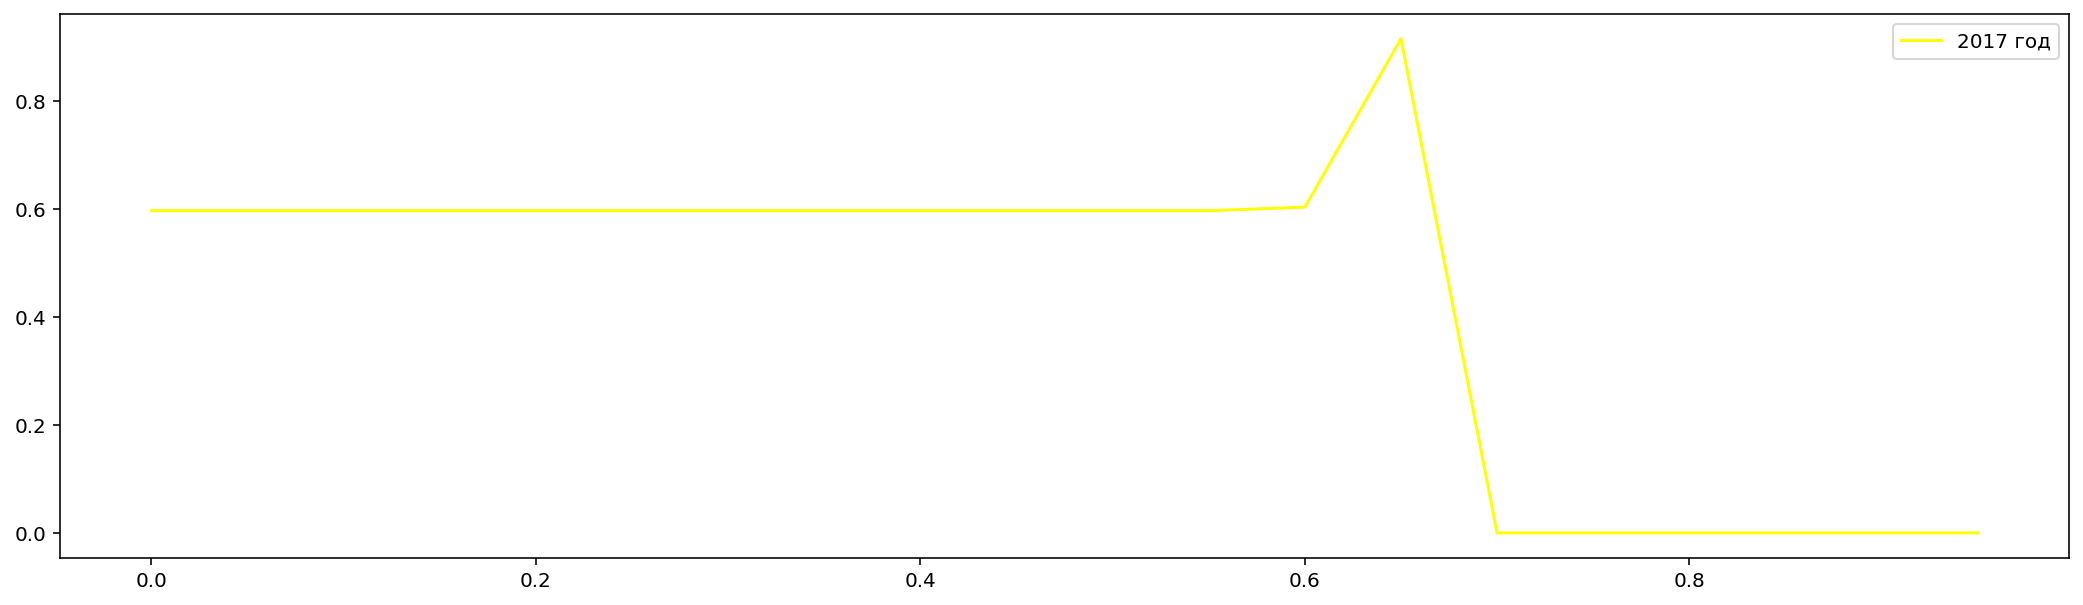

2018
roc_auc = 0.51
Time to train = 0.50 seconds
максимальная точность 0.5257697190922076


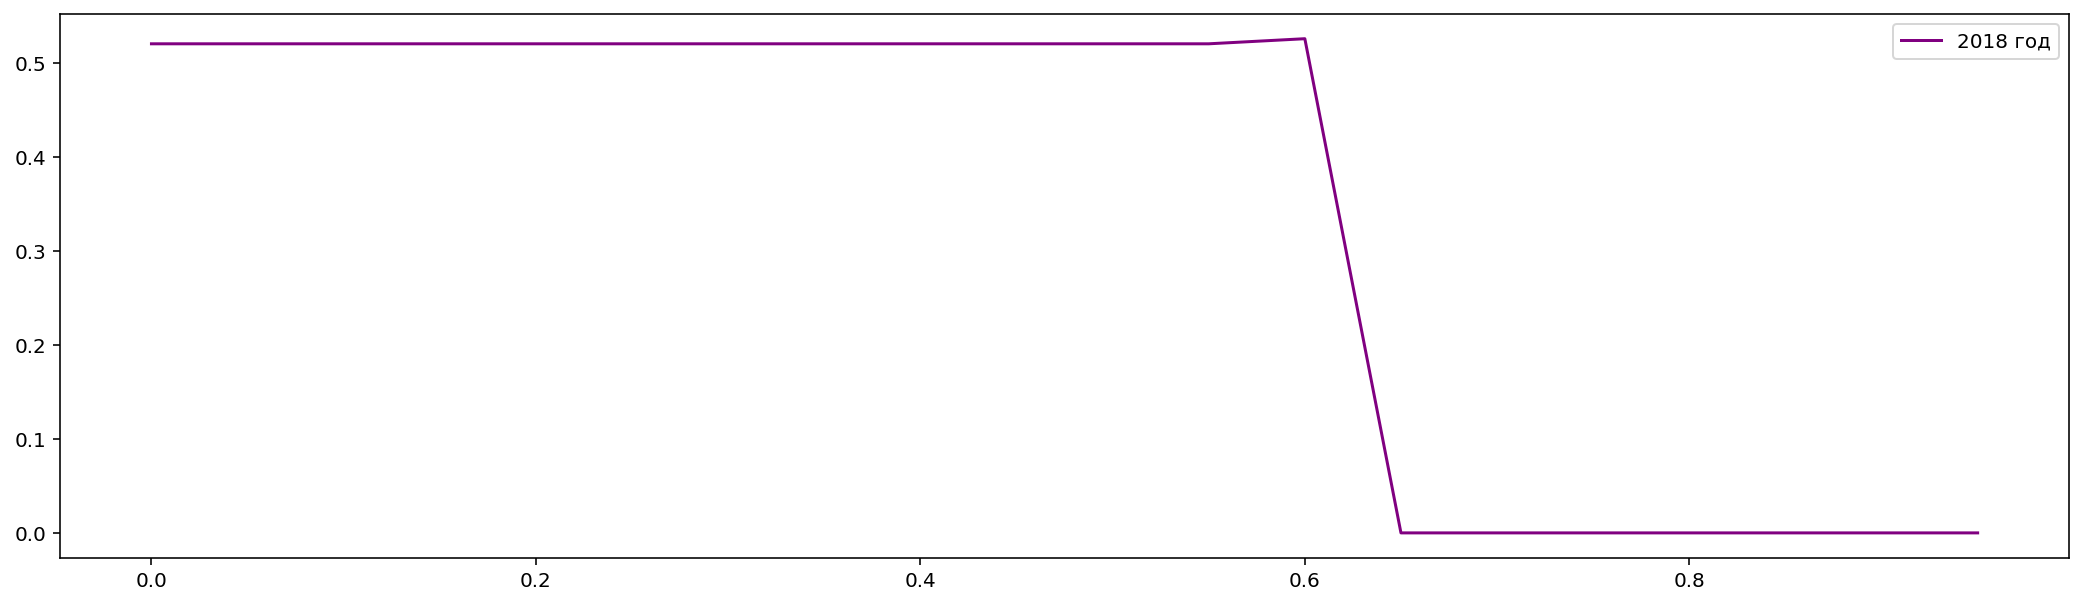

2019
roc_auc = 0.55
Time to train = 0.79 seconds
максимальная точность 0.5980104001808727


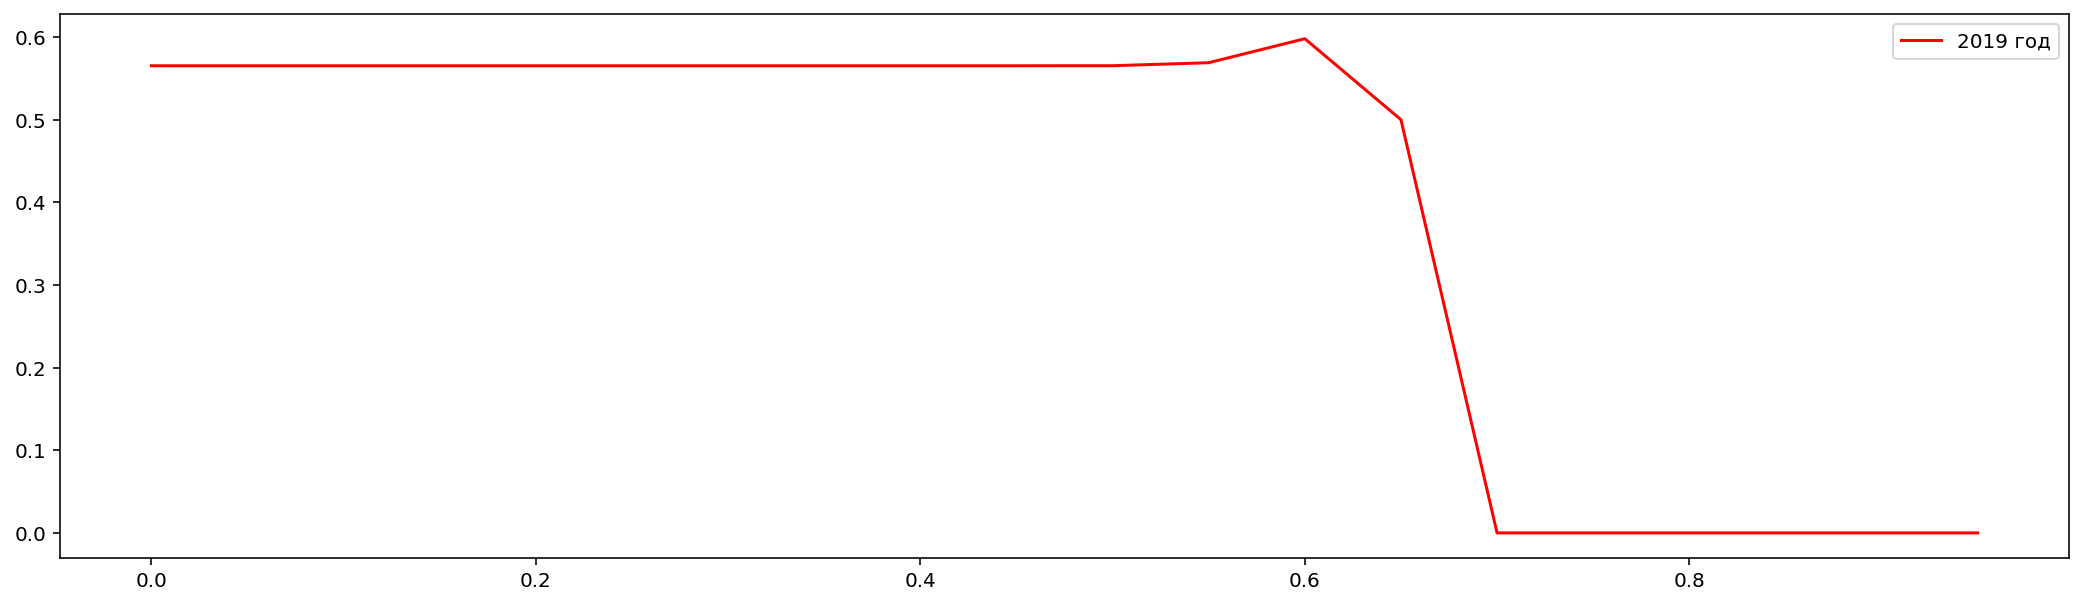

2020
roc_auc = 0.51
Time to train = 0.90 seconds
максимальная точность 0.9661266568483063


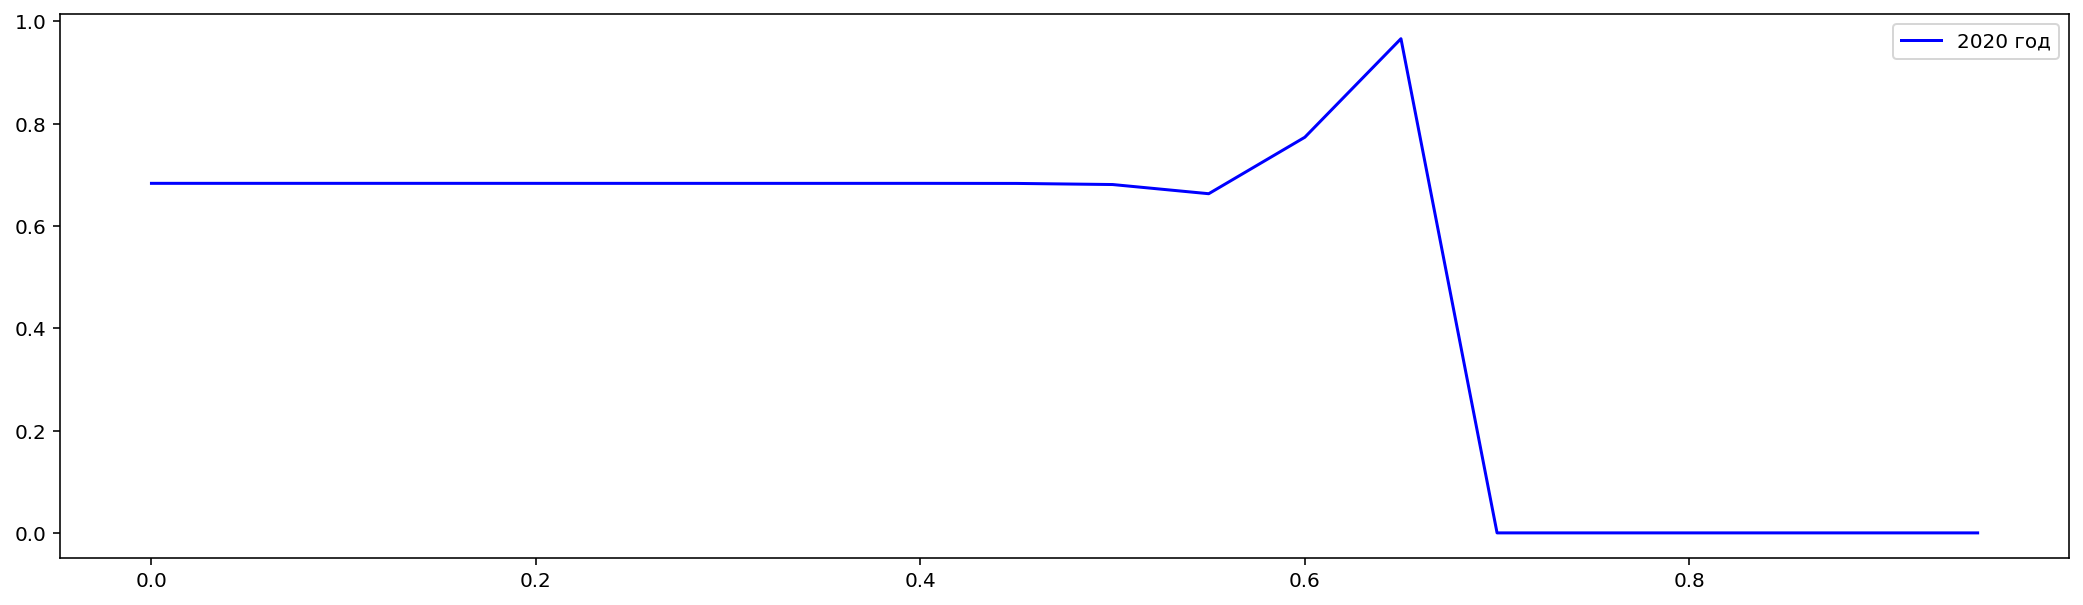

2021
roc_auc = 0.49
Time to train = 1.25 seconds
максимальная точность 0.5939413943594821


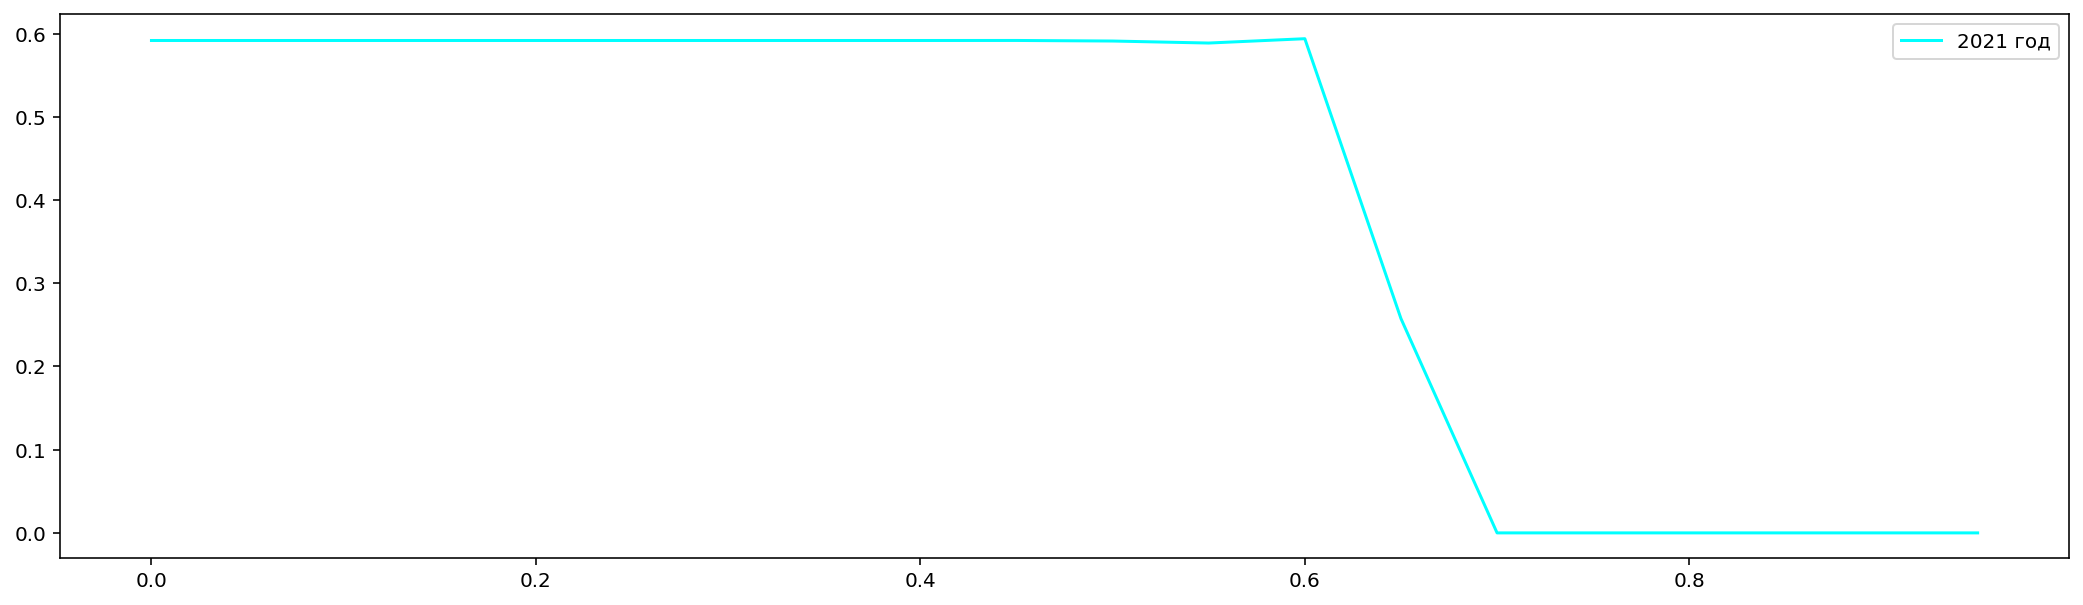

2022
roc_auc = 0.52
Time to train = 1.52 seconds
максимальная точность 0.4630497532511872


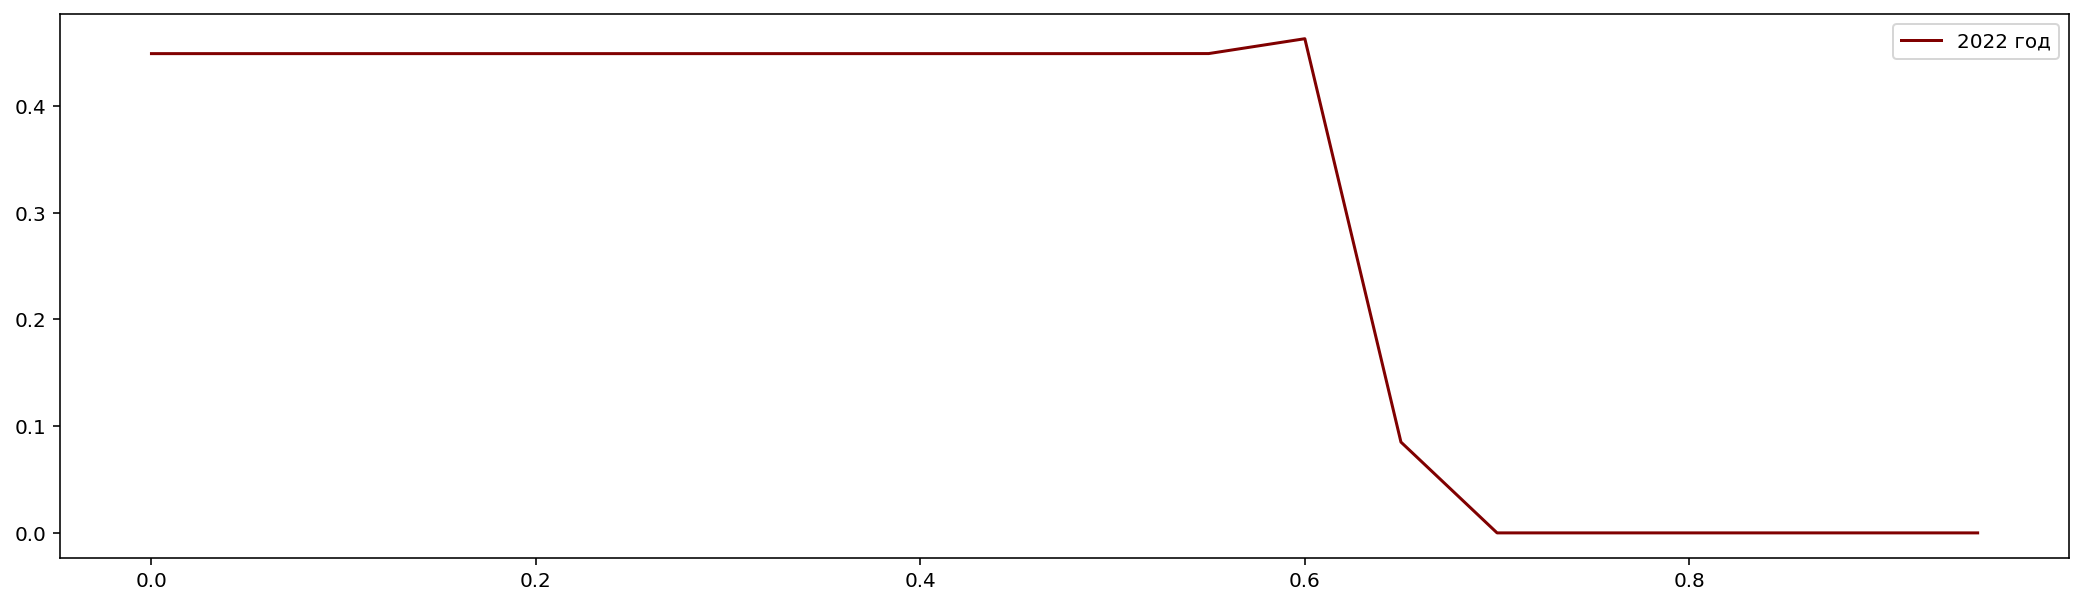

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

### ExtraTreesClassifier

2014
roc_auc = 0.53
Time to train = 0.98 seconds
максимальная точность 0.7272457752742366


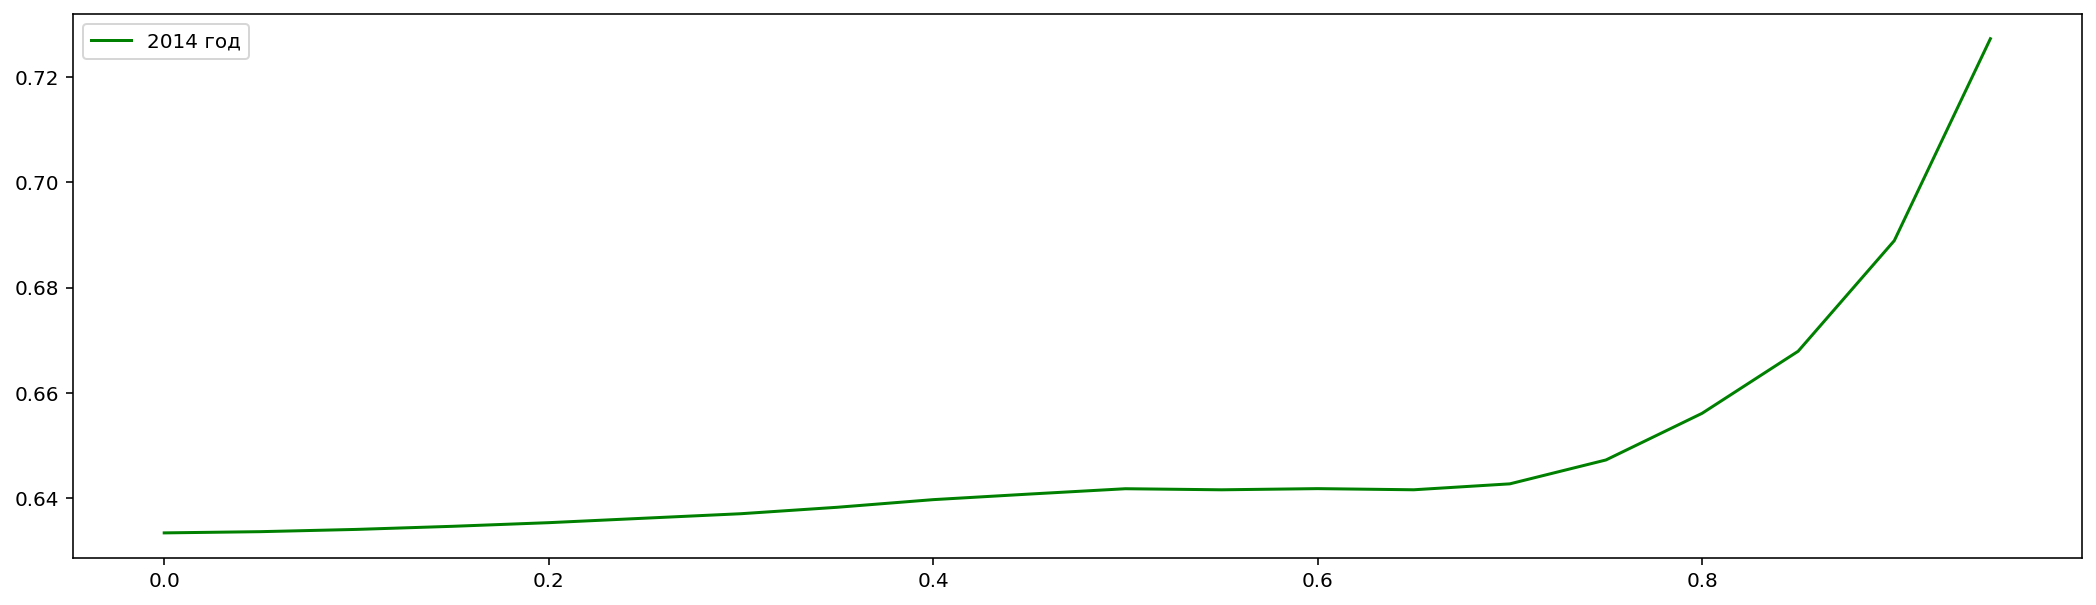

2015
roc_auc = 0.52
Time to train = 5.98 seconds
максимальная точность 0.6137761377613776


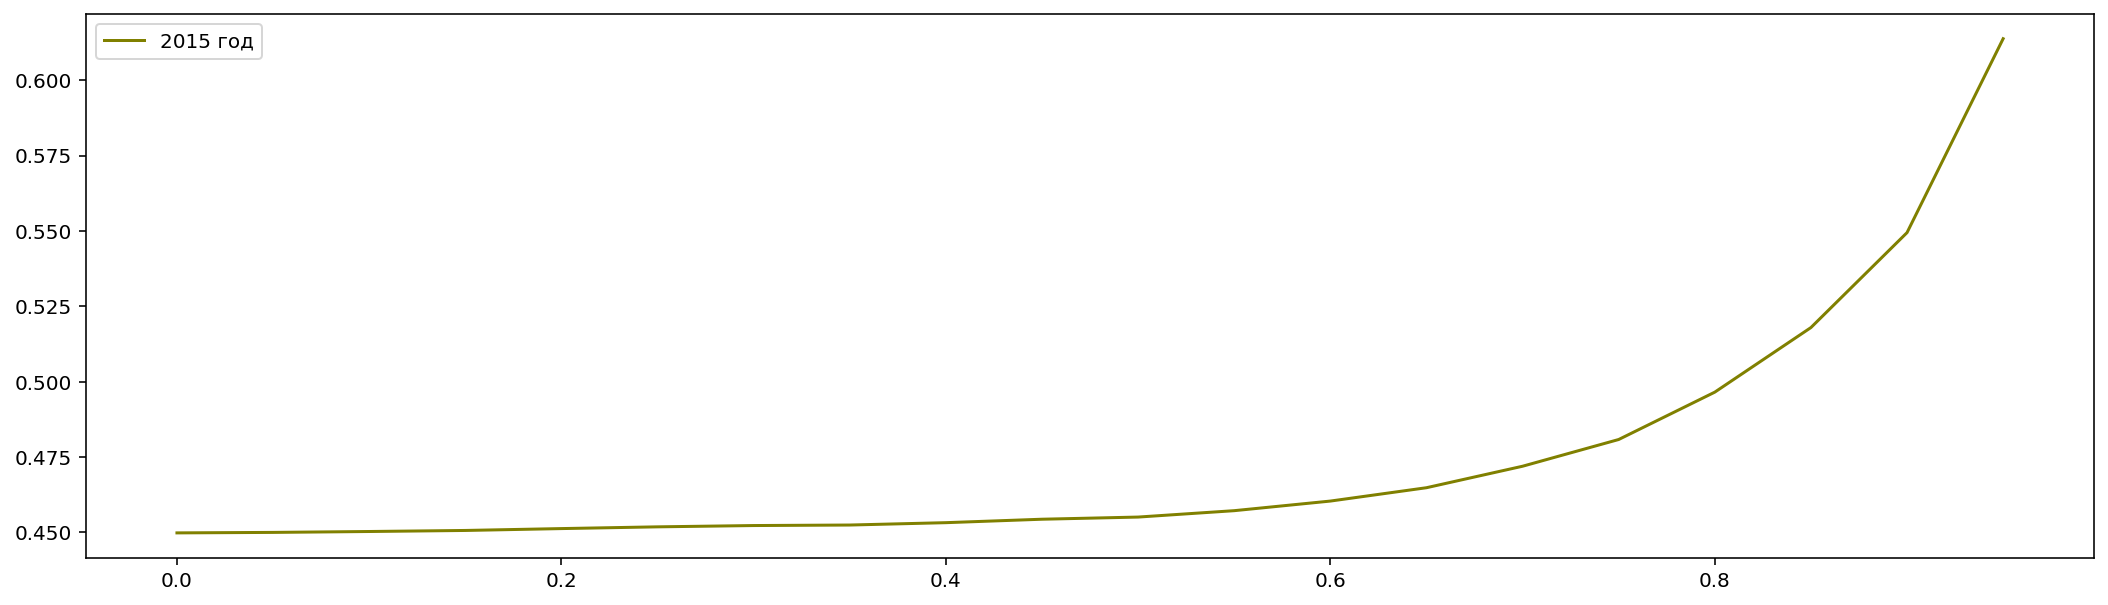

2016
roc_auc = 0.54
Time to train = 12.66 seconds
максимальная точность 0.8115183246073299


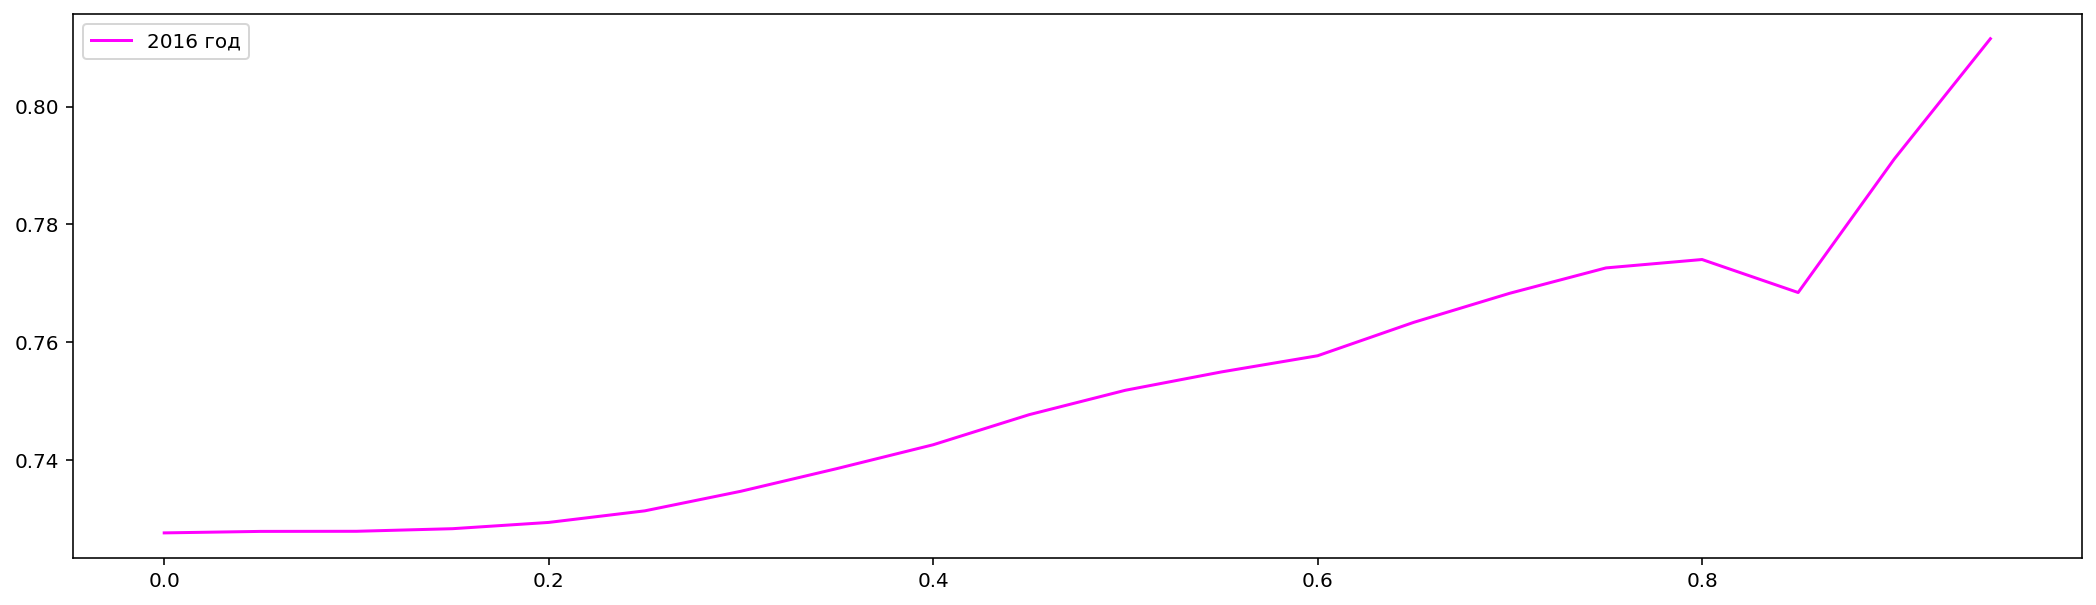

2017
roc_auc = 0.51
Time to train = 18.62 seconds
максимальная точность 0.605195163123988


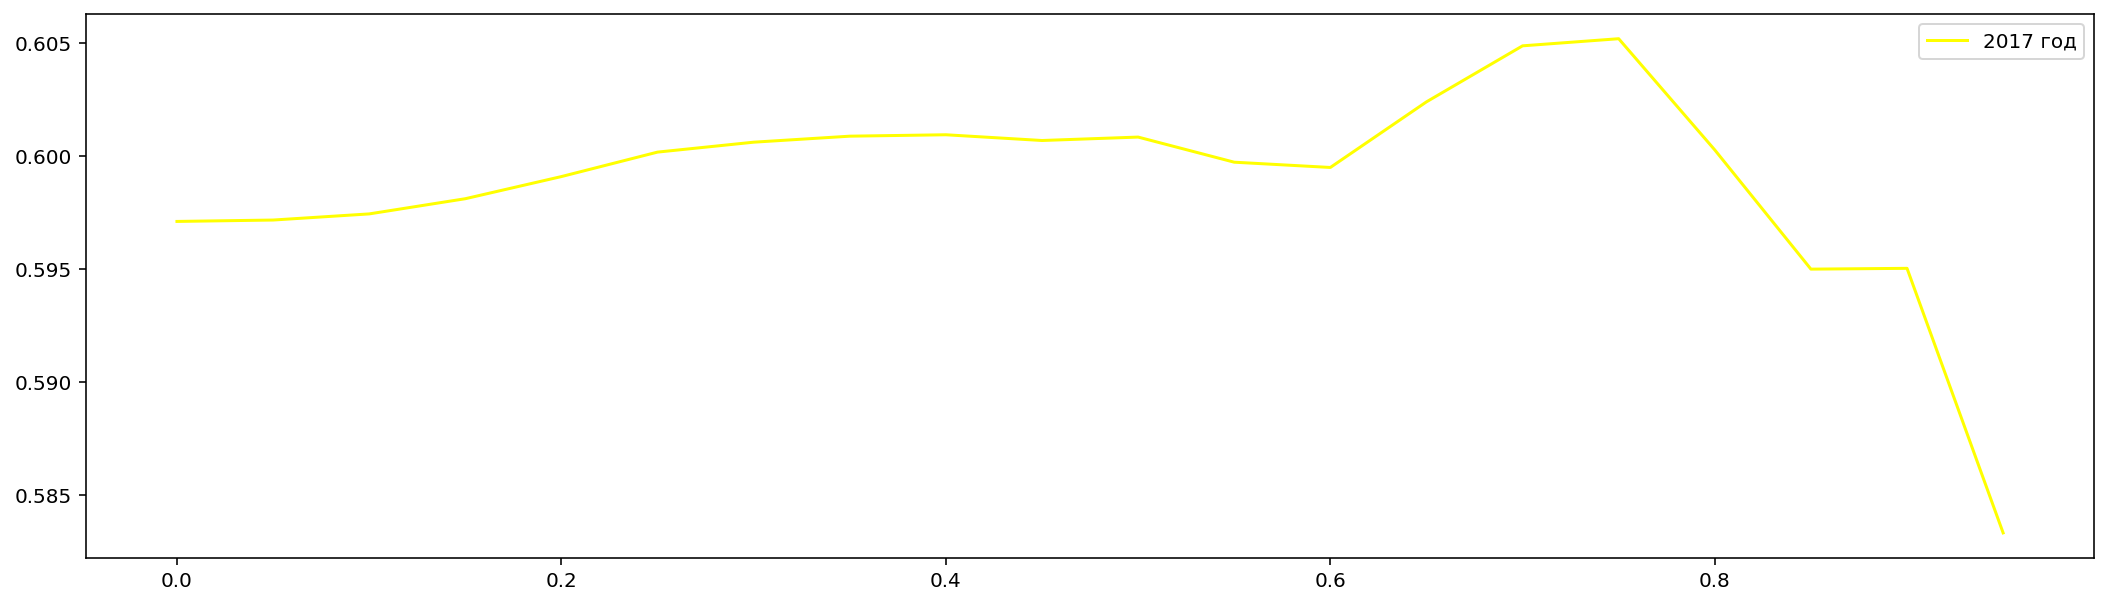

2018
roc_auc = 0.51
Time to train = 26.56 seconds
максимальная точность 0.5484949832775919


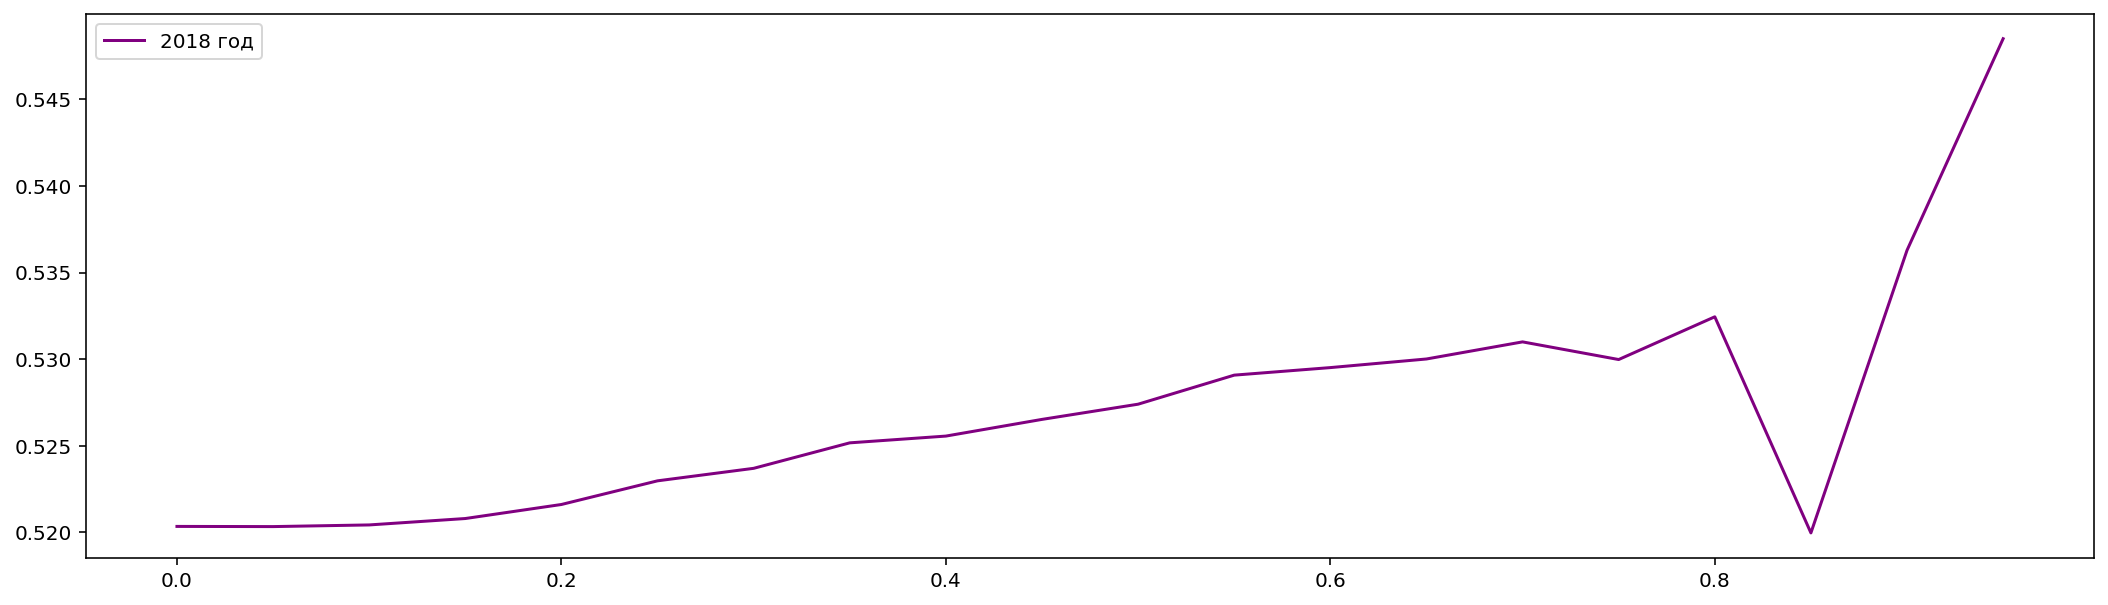

2019
roc_auc = 0.52
Time to train = 34.94 seconds
максимальная точность 0.7560975609756098


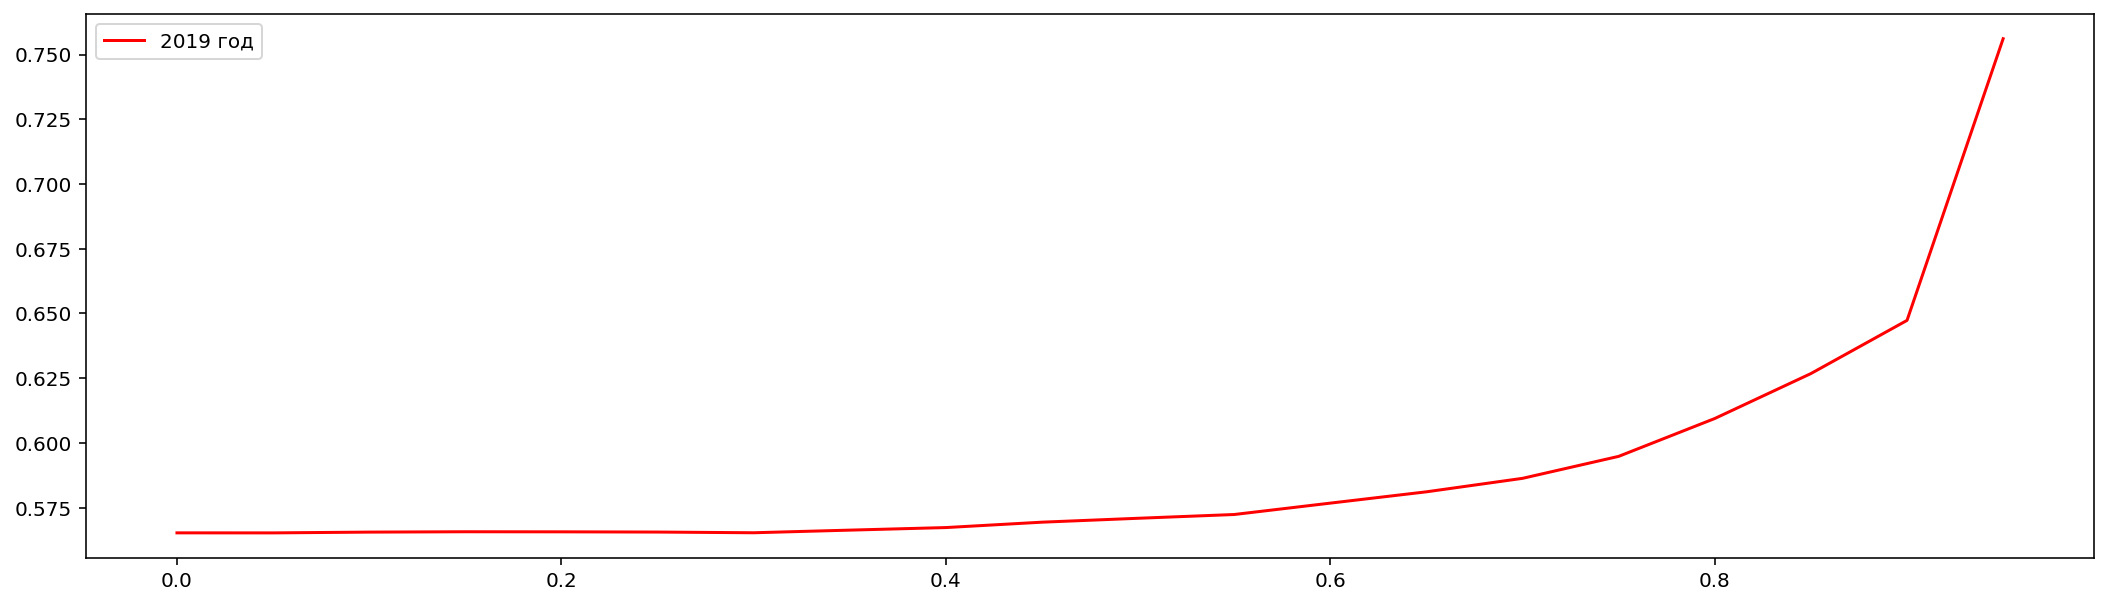

2020
roc_auc = 0.54
Time to train = 42.22 seconds
максимальная точность 0.8063492063492064


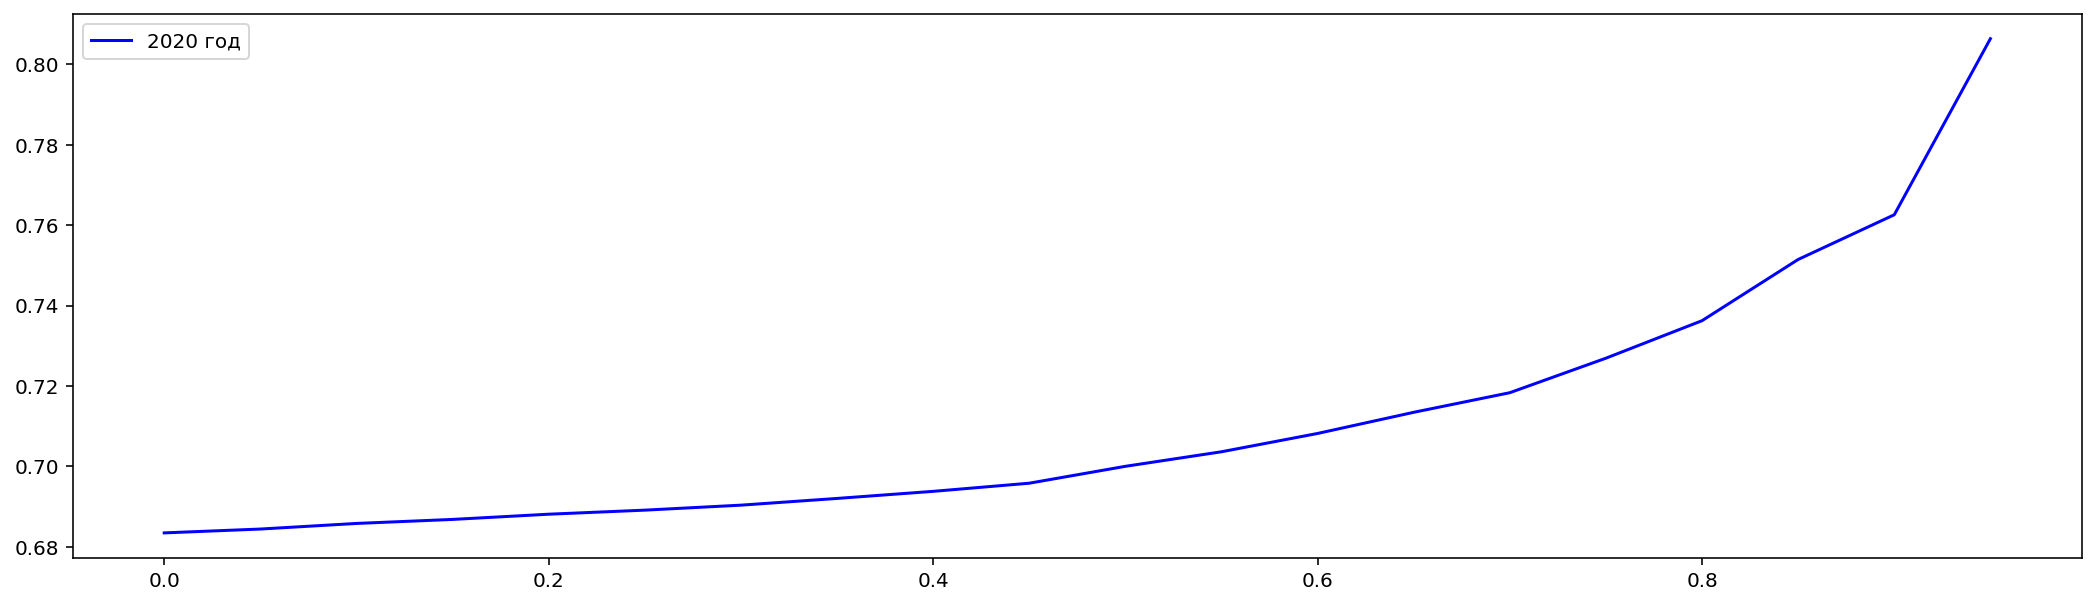

2021
roc_auc = 0.51
Time to train = 54.29 seconds
максимальная точность 0.73046875


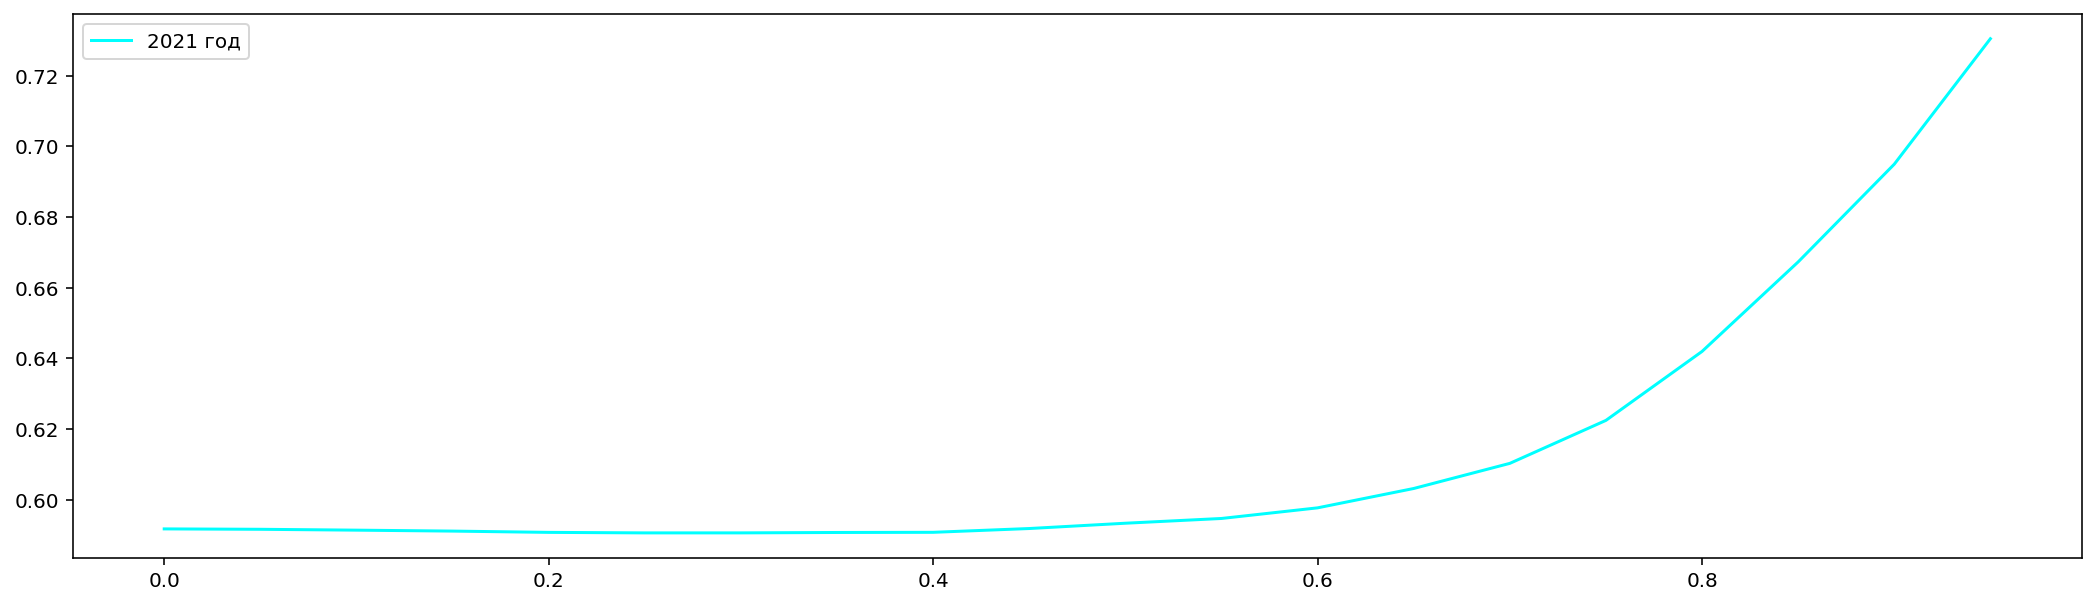

2022
roc_auc = 0.51
Time to train = 66.73 seconds
максимальная точность 0.4619341563786008


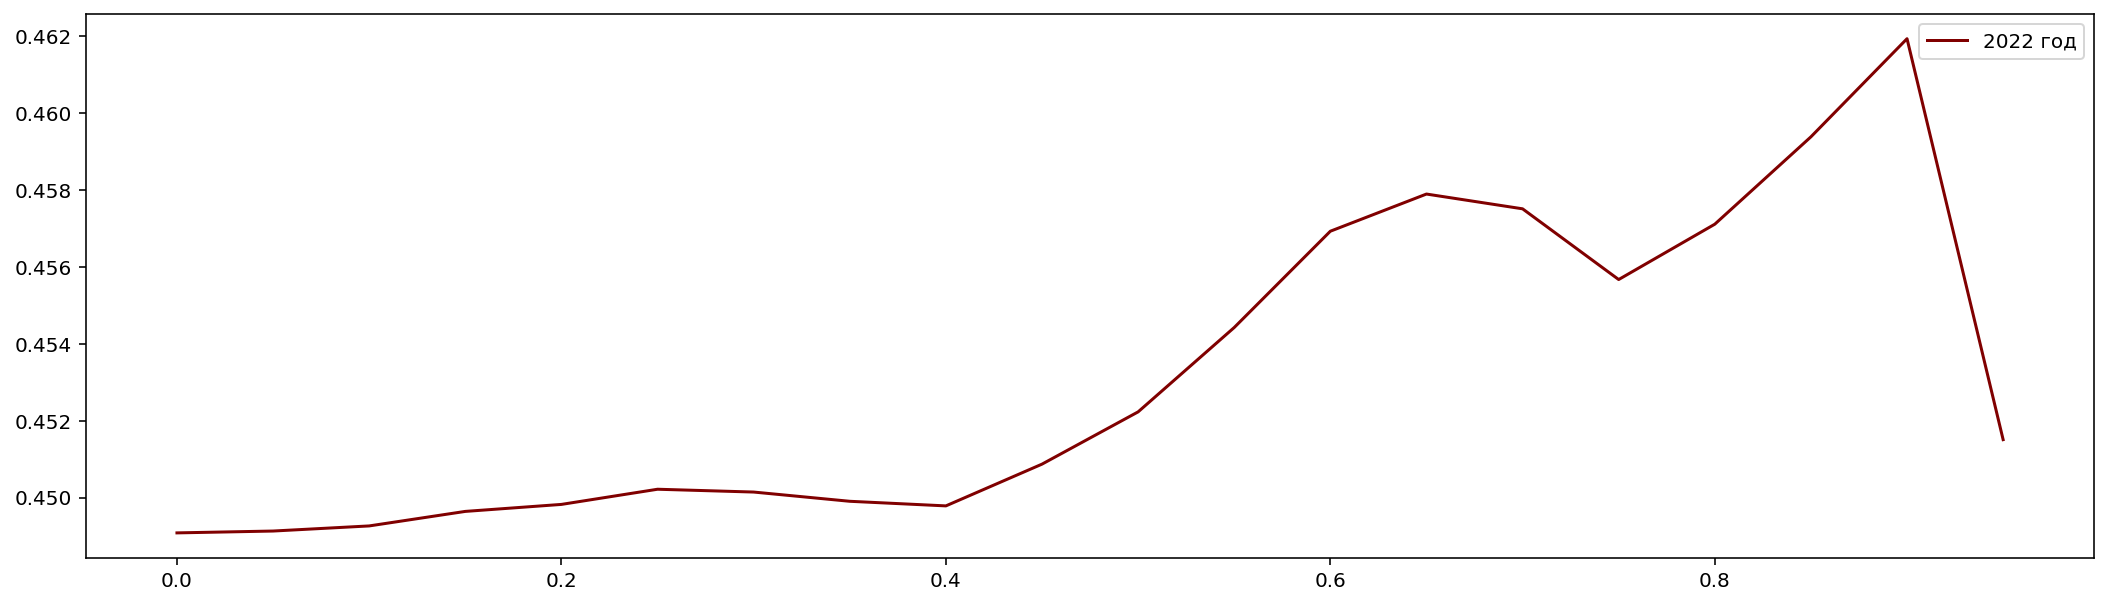

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = ExtraTreesClassifier(random_state=42)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

### GradientBoostingClassifier

2014
roc_auc = 0.50
Time to train = 1.00 seconds
максимальная точность 0.6360838730434053


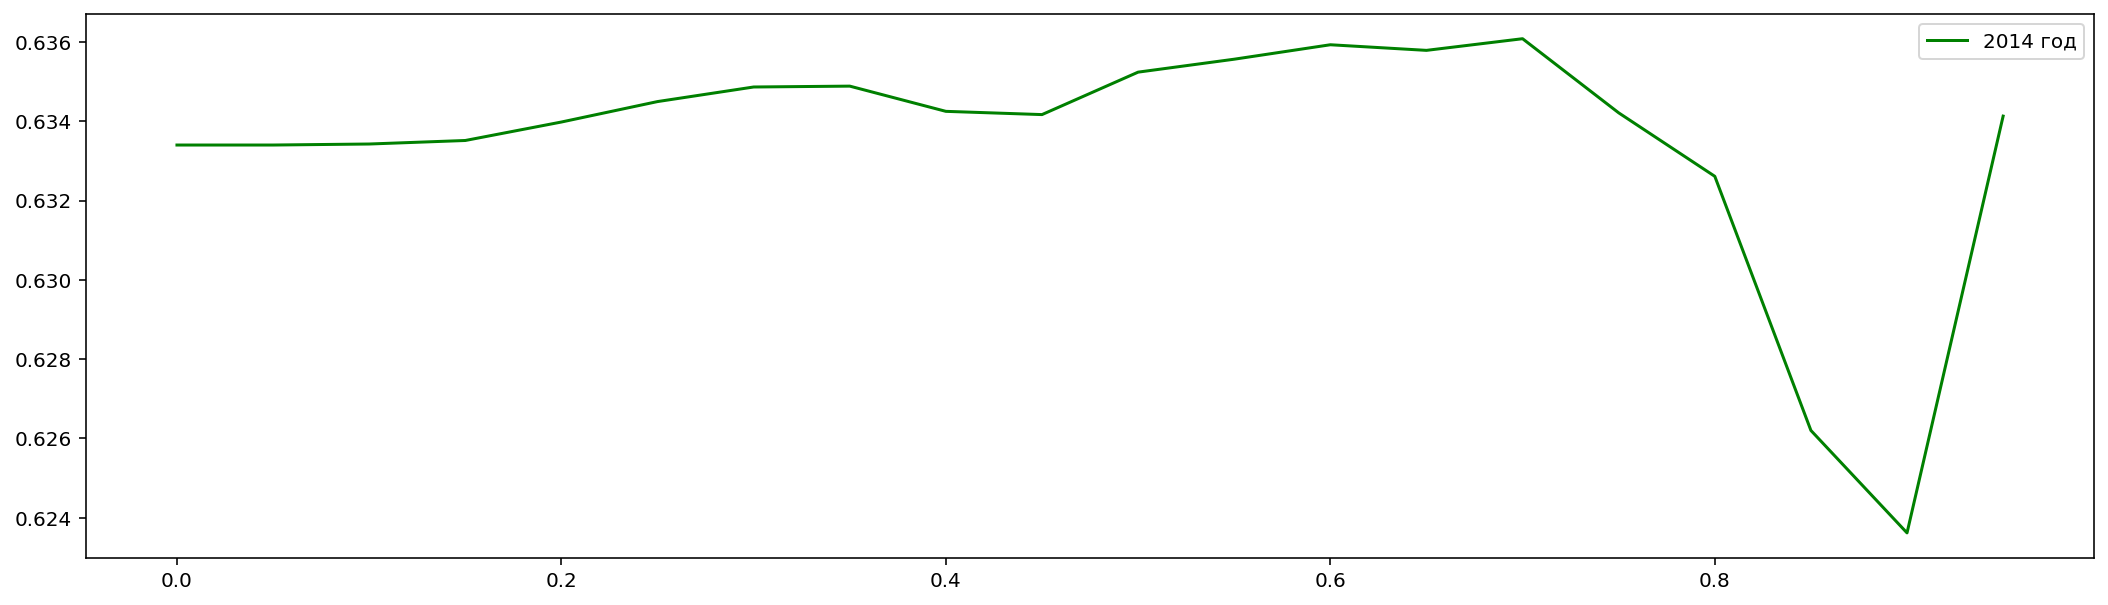

2015
roc_auc = 0.49
Time to train = 8.90 seconds
максимальная точность 0.46279373368146215


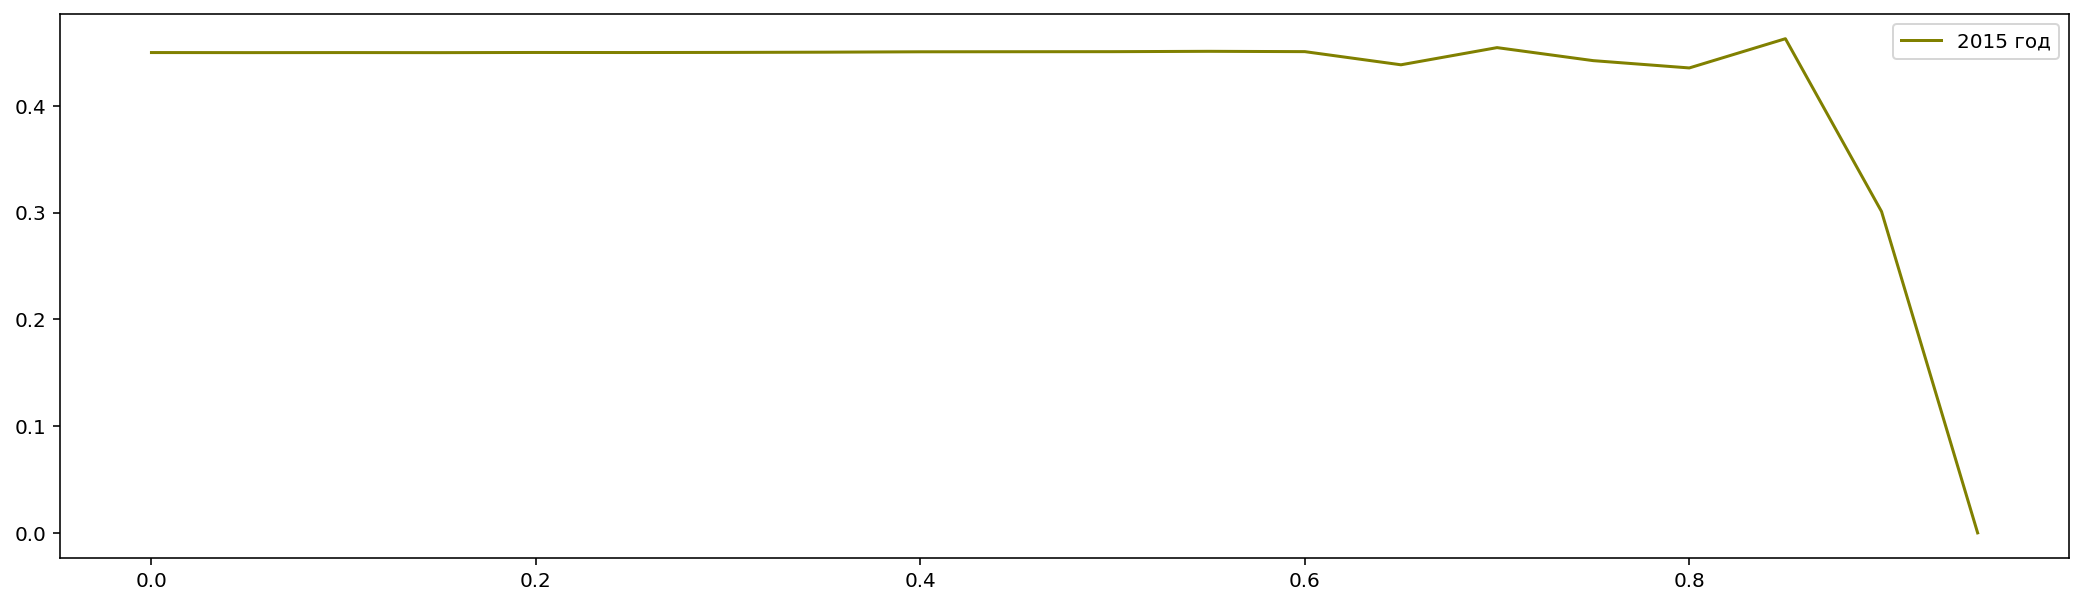

2016
roc_auc = 0.50
Time to train = 19.00 seconds
максимальная точность 0.762589928057554


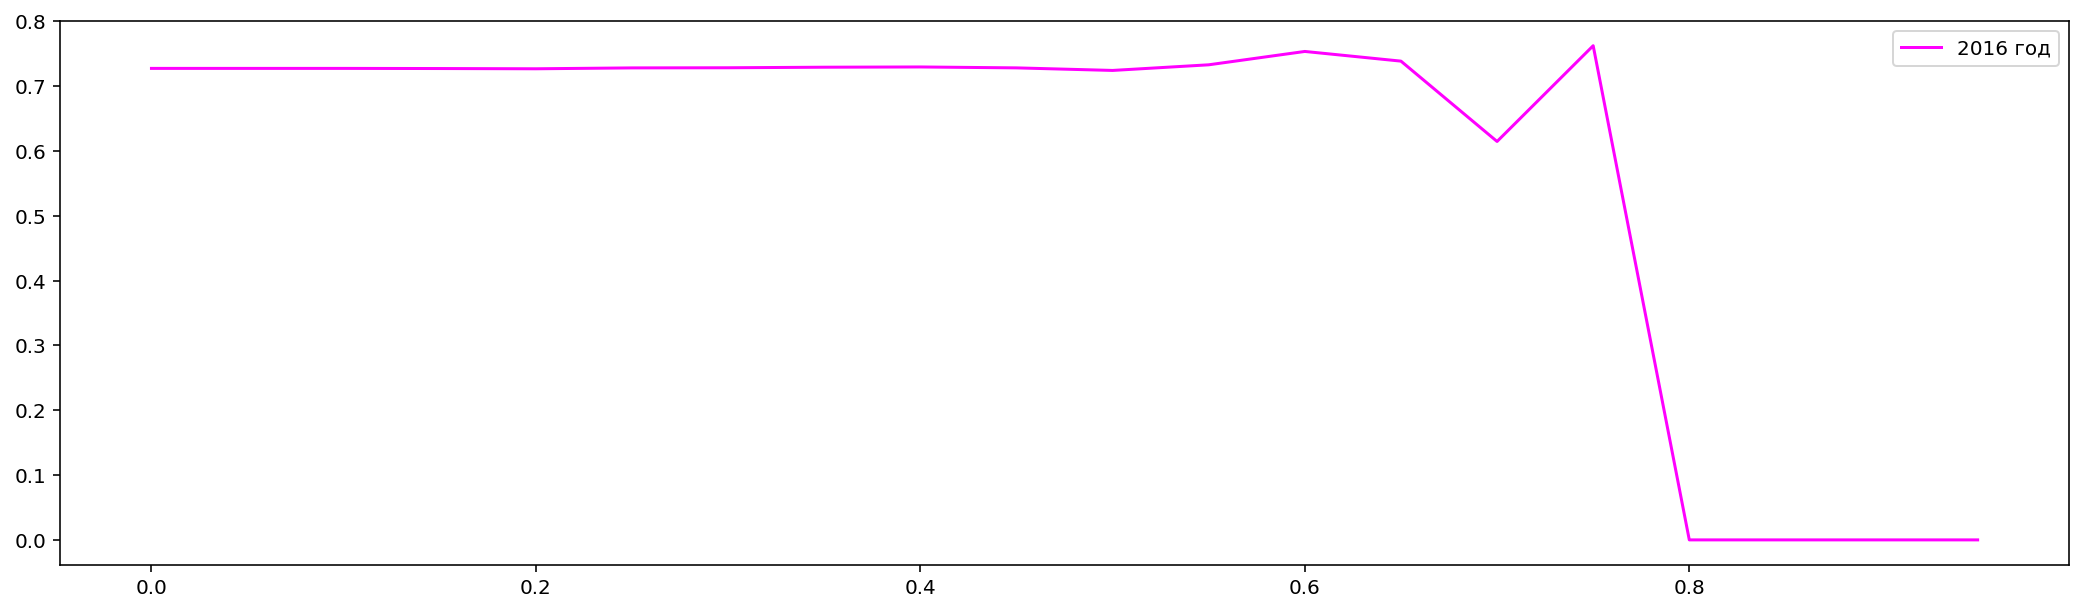

2017
roc_auc = 0.51
Time to train = 29.14 seconds
максимальная точность 0.6073610608254888


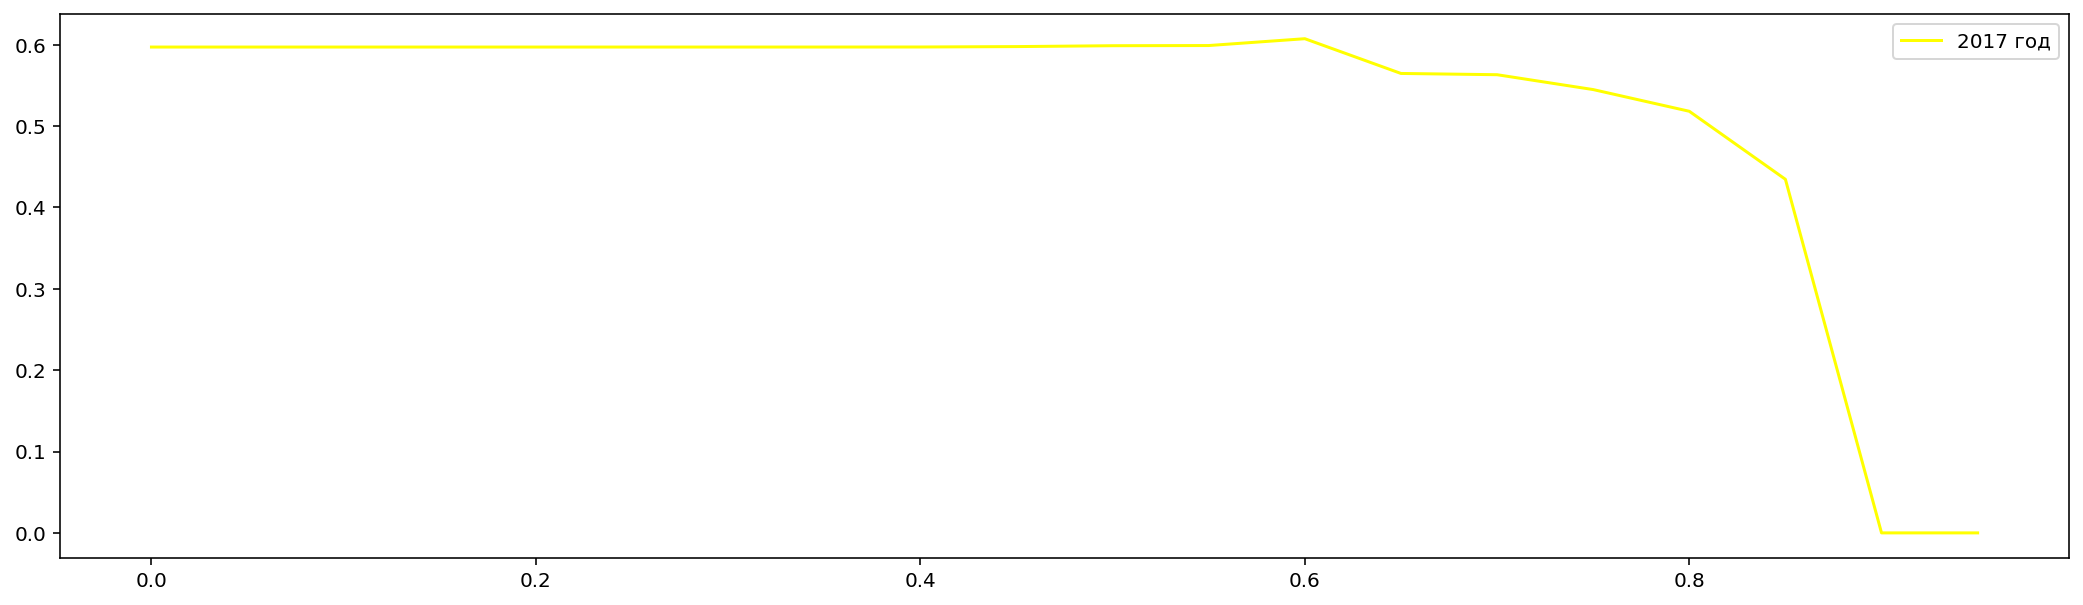

2018
roc_auc = 0.51
Time to train = 40.25 seconds
максимальная точность 0.6197183098591549


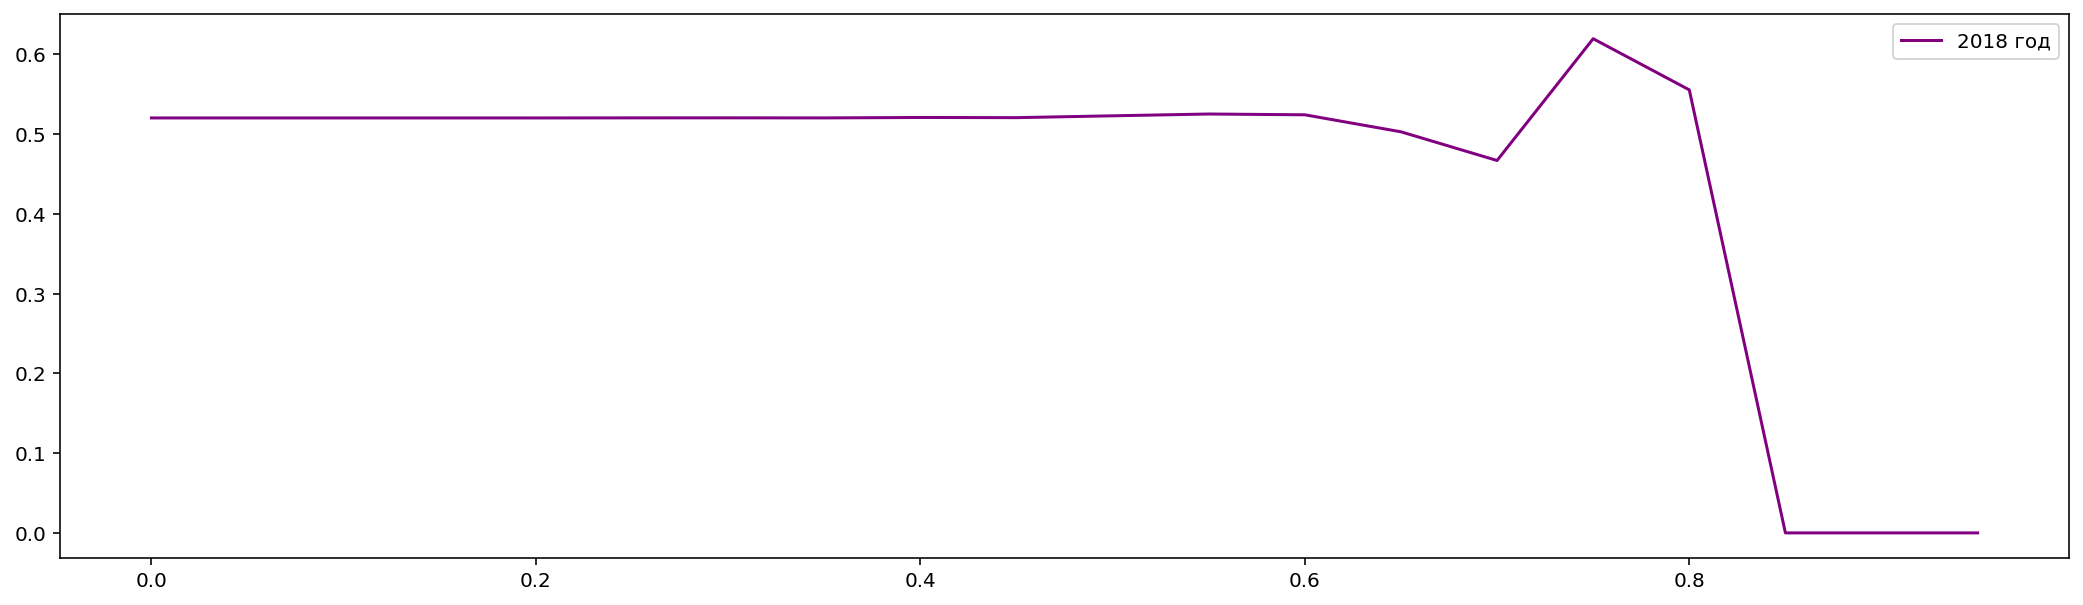

2019
roc_auc = 0.52
Time to train = 52.75 seconds
максимальная точность 1.0


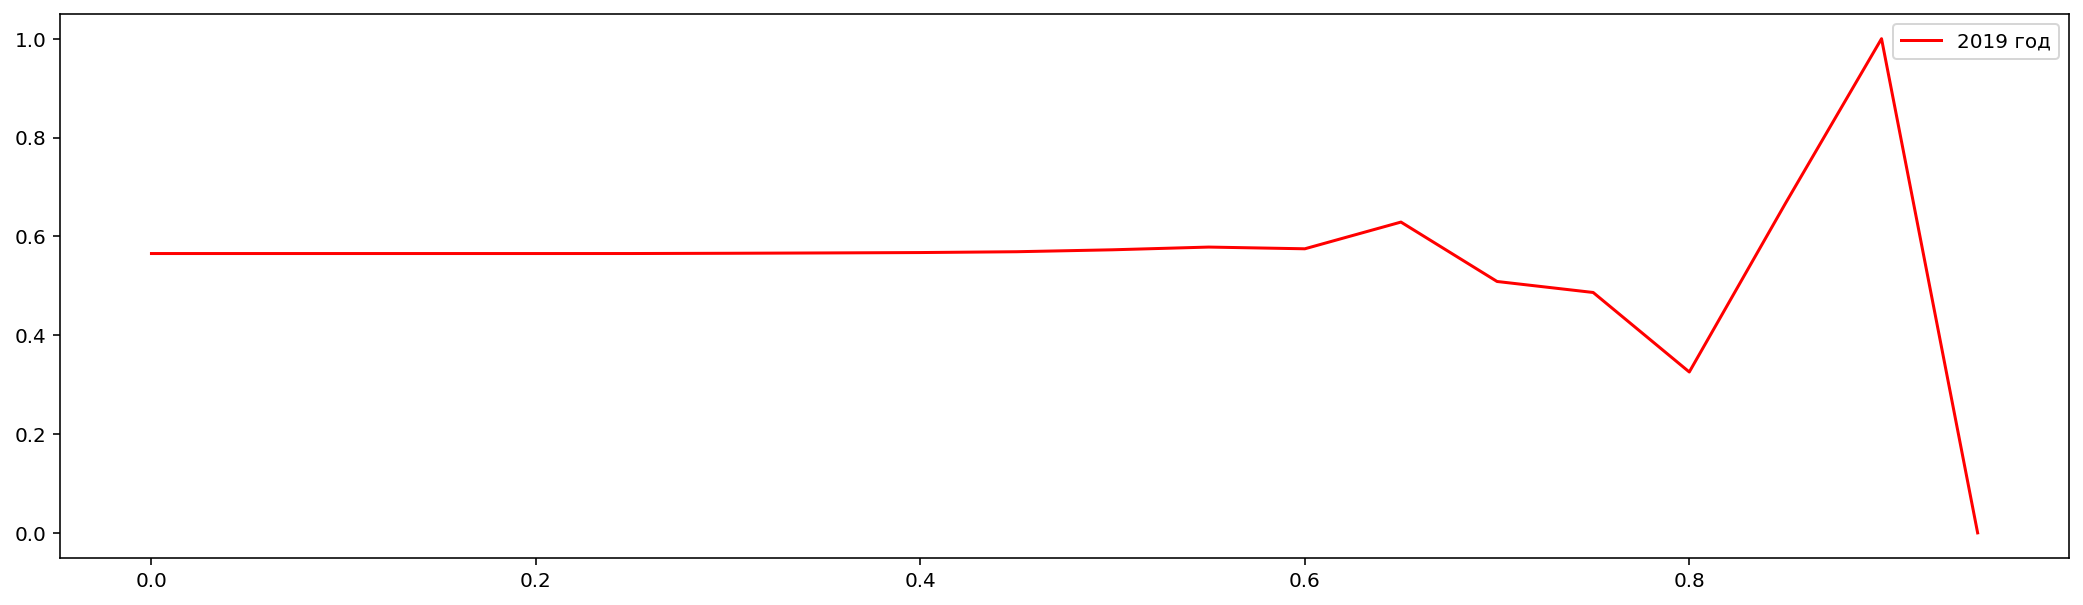

2020
roc_auc = 0.50
Time to train = 65.78 seconds
максимальная точность 1.0


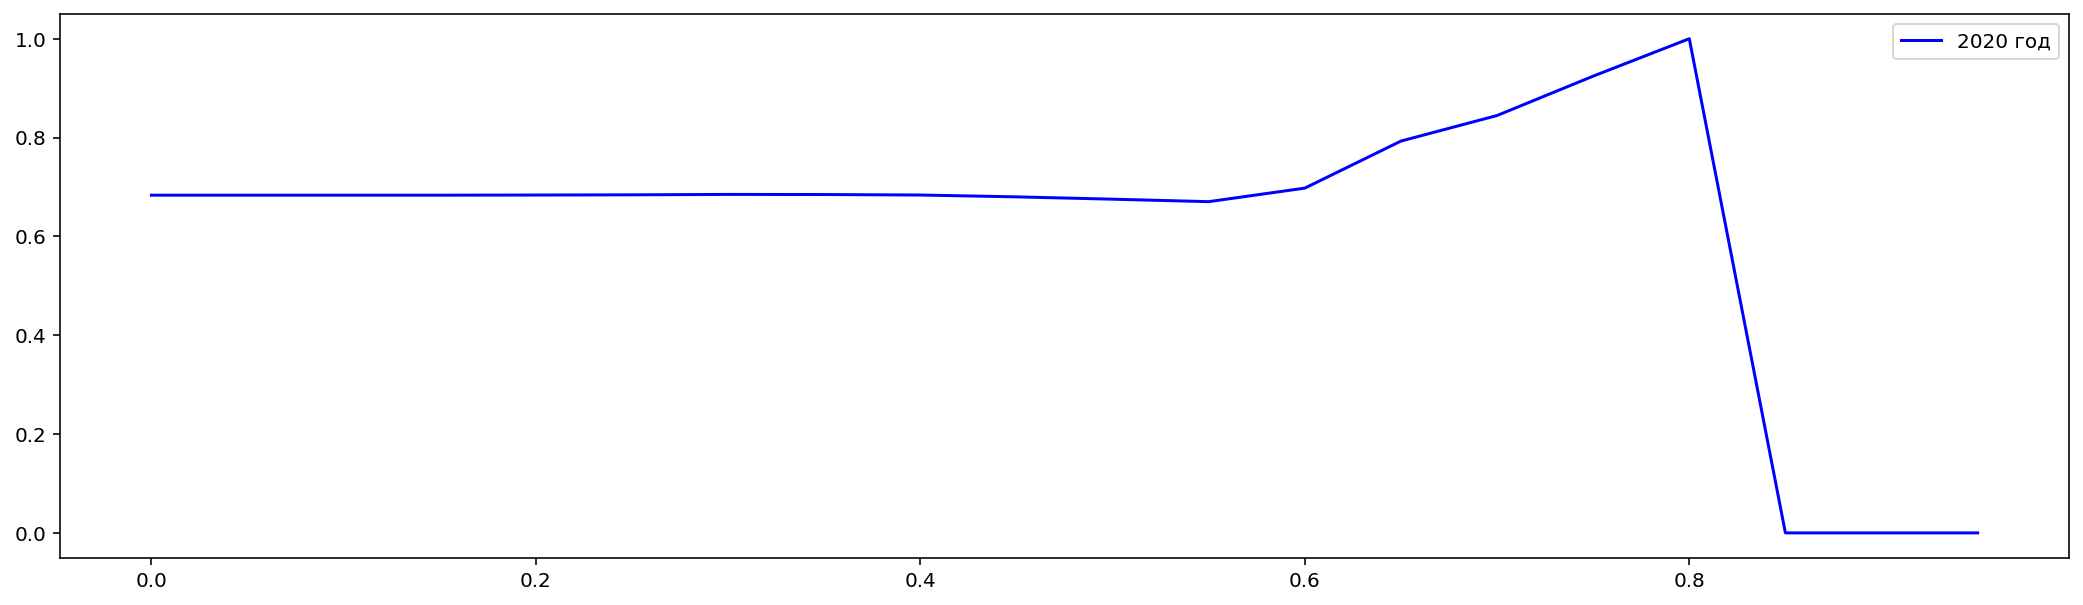

2021
roc_auc = 0.51
Time to train = 81.30 seconds
максимальная точность 0.8166666666666667


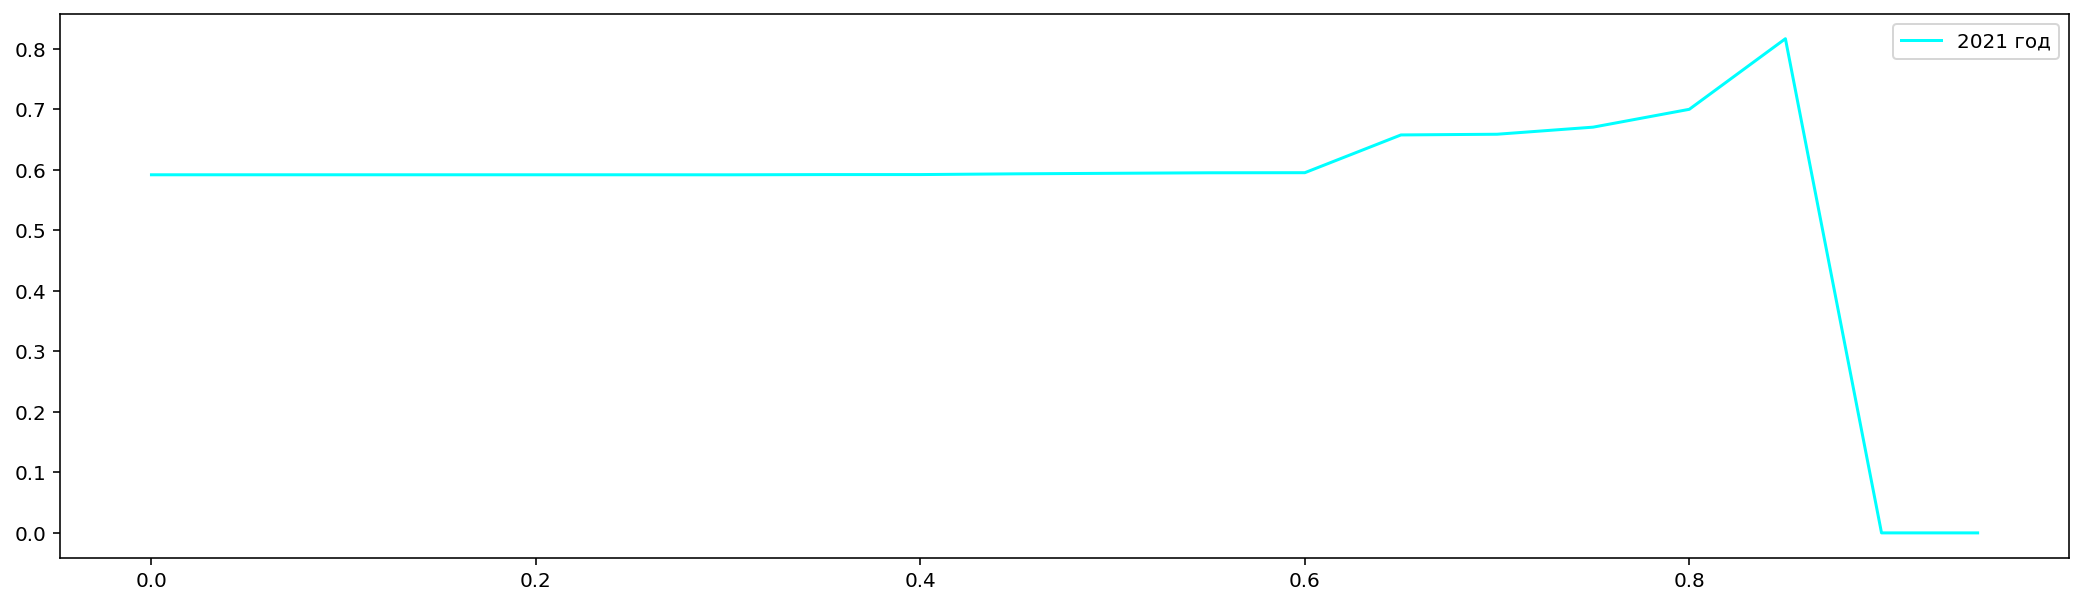

2022
roc_auc = 0.49
Time to train = 99.91 seconds
максимальная точность 0.4852941176470588


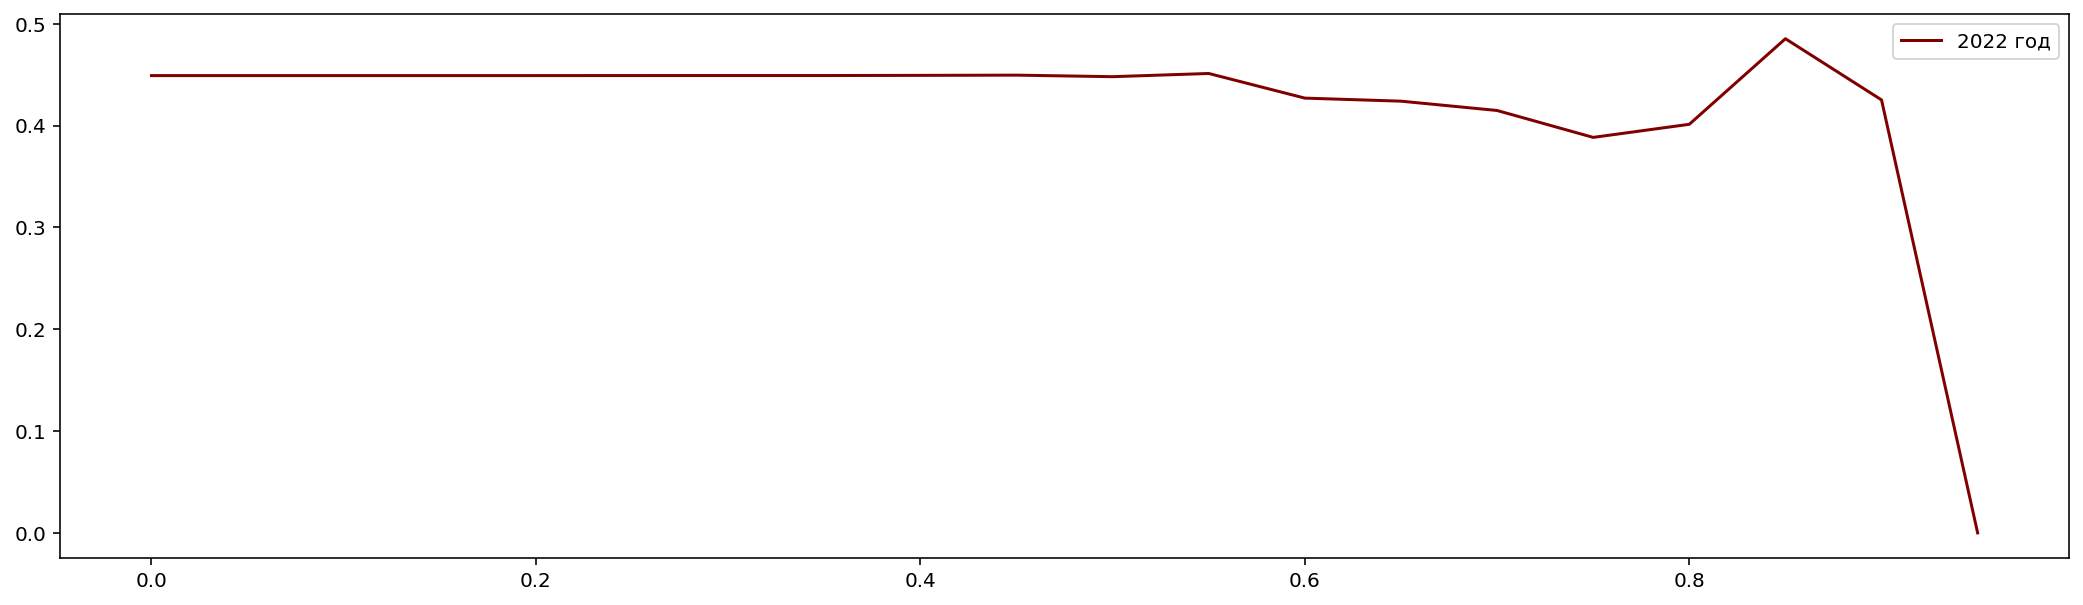

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = GradientBoostingClassifier(random_state=42)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

### HistGradientBoostingClassifier

2014
roc_auc = 0.51
Time to train = 0.39 seconds
максимальная точность 0.640513389030481


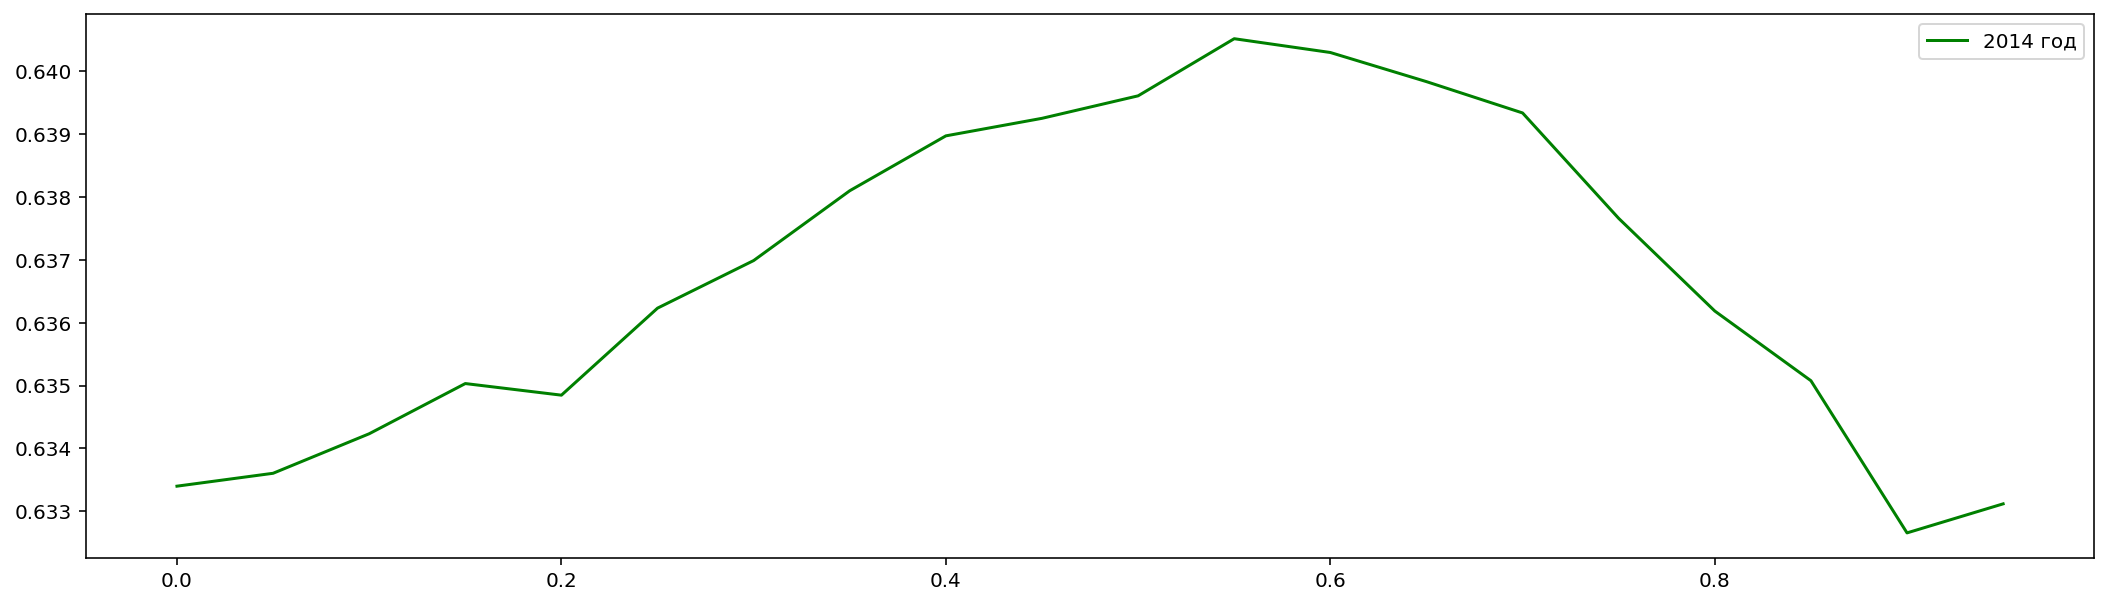

2015
roc_auc = 0.50
Time to train = 0.90 seconds
максимальная точность 0.45543082623760756


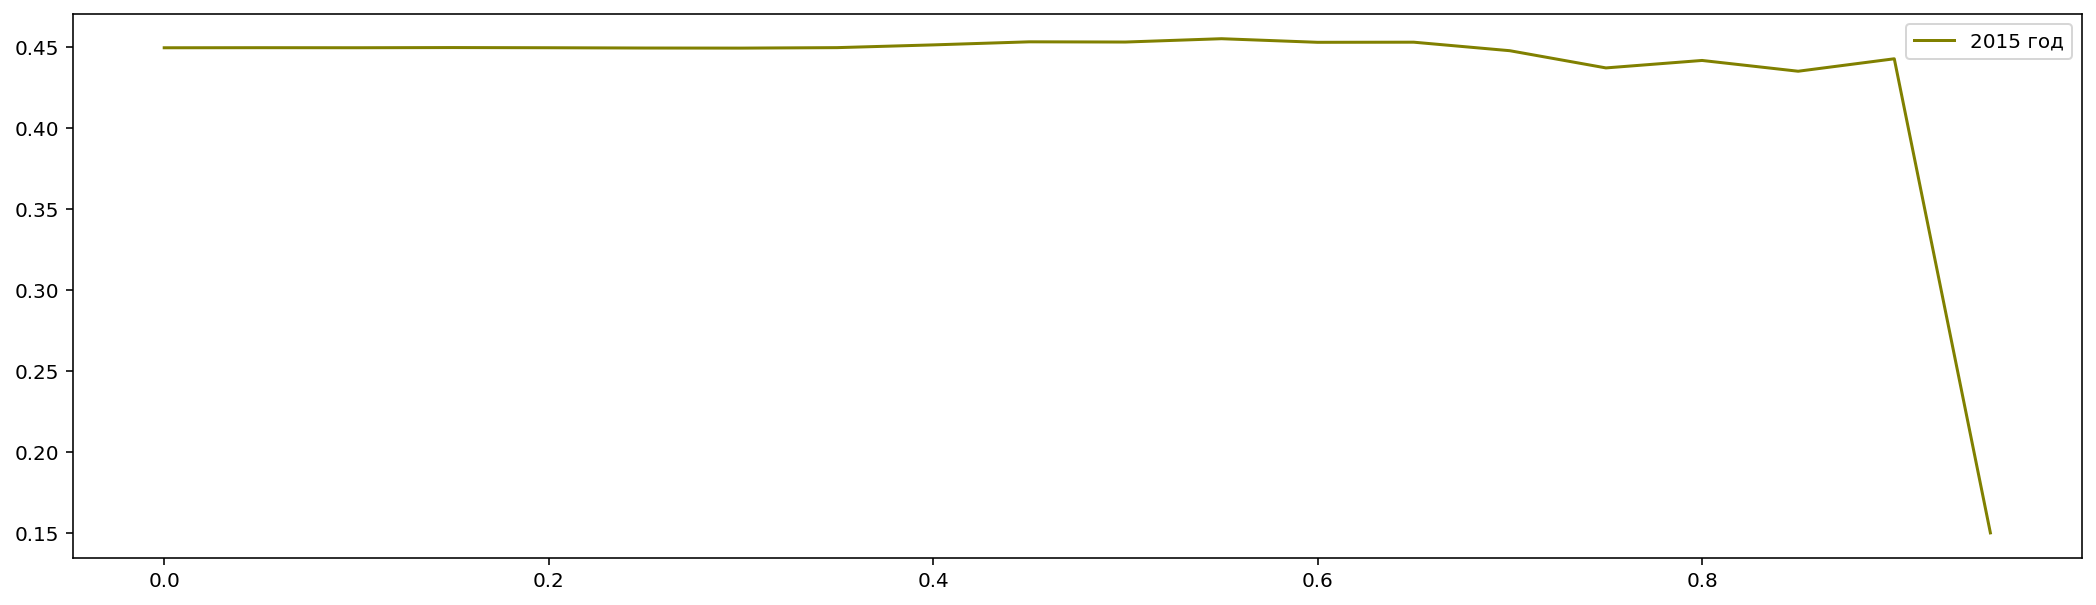

2016
roc_auc = 0.52
Time to train = 1.67 seconds
максимальная точность 0.8289156626506025


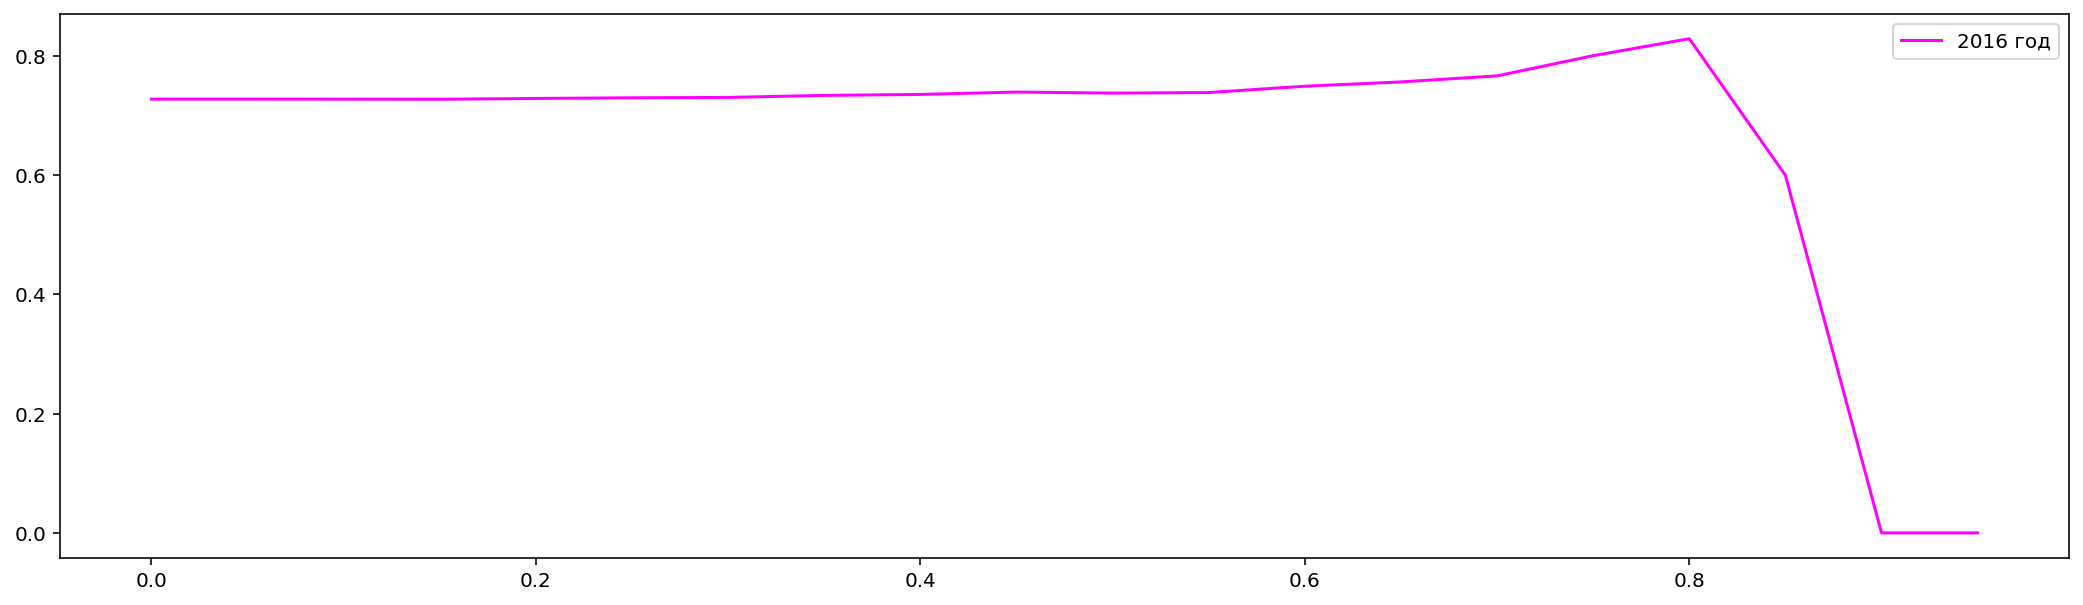

2017
roc_auc = 0.50
Time to train = 2.38 seconds
максимальная точность 0.6331360946745562


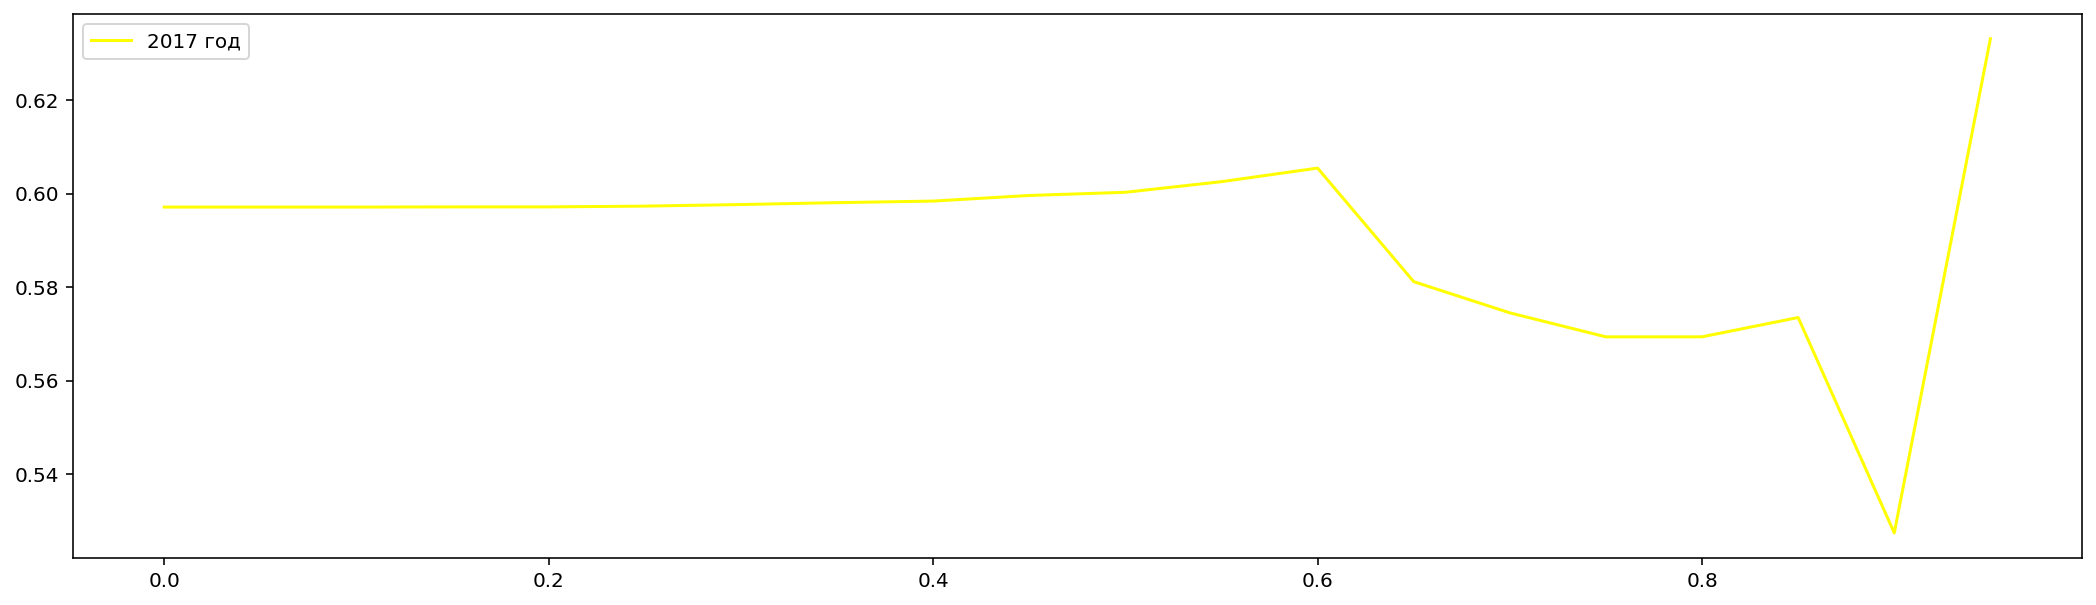

2018
roc_auc = 0.50
Time to train = 3.12 seconds
максимальная точность 0.5262993600749181


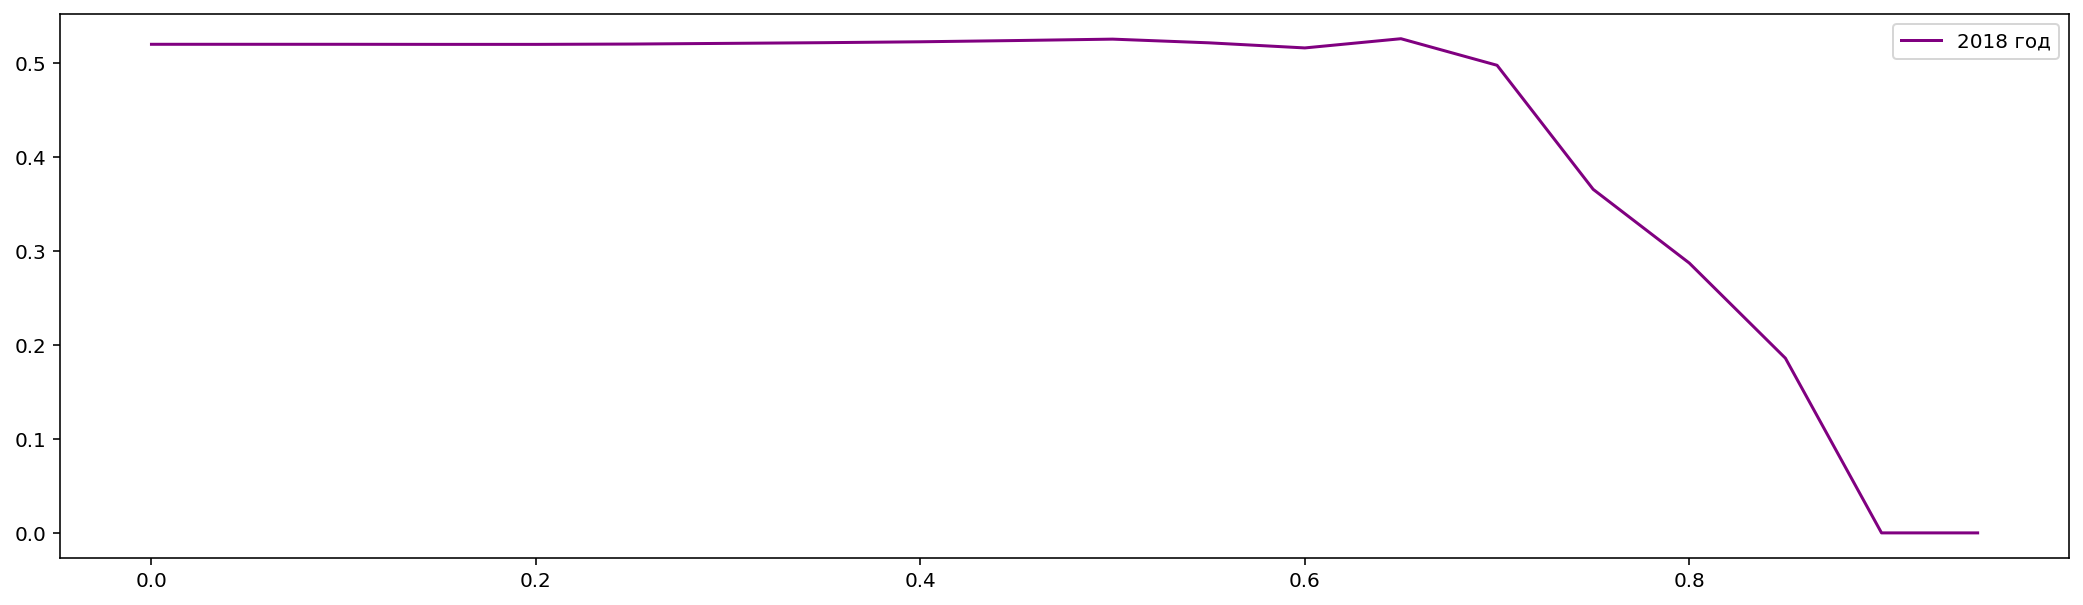

2019
roc_auc = 0.52
Time to train = 3.82 seconds
максимальная точность 0.9333333333333333


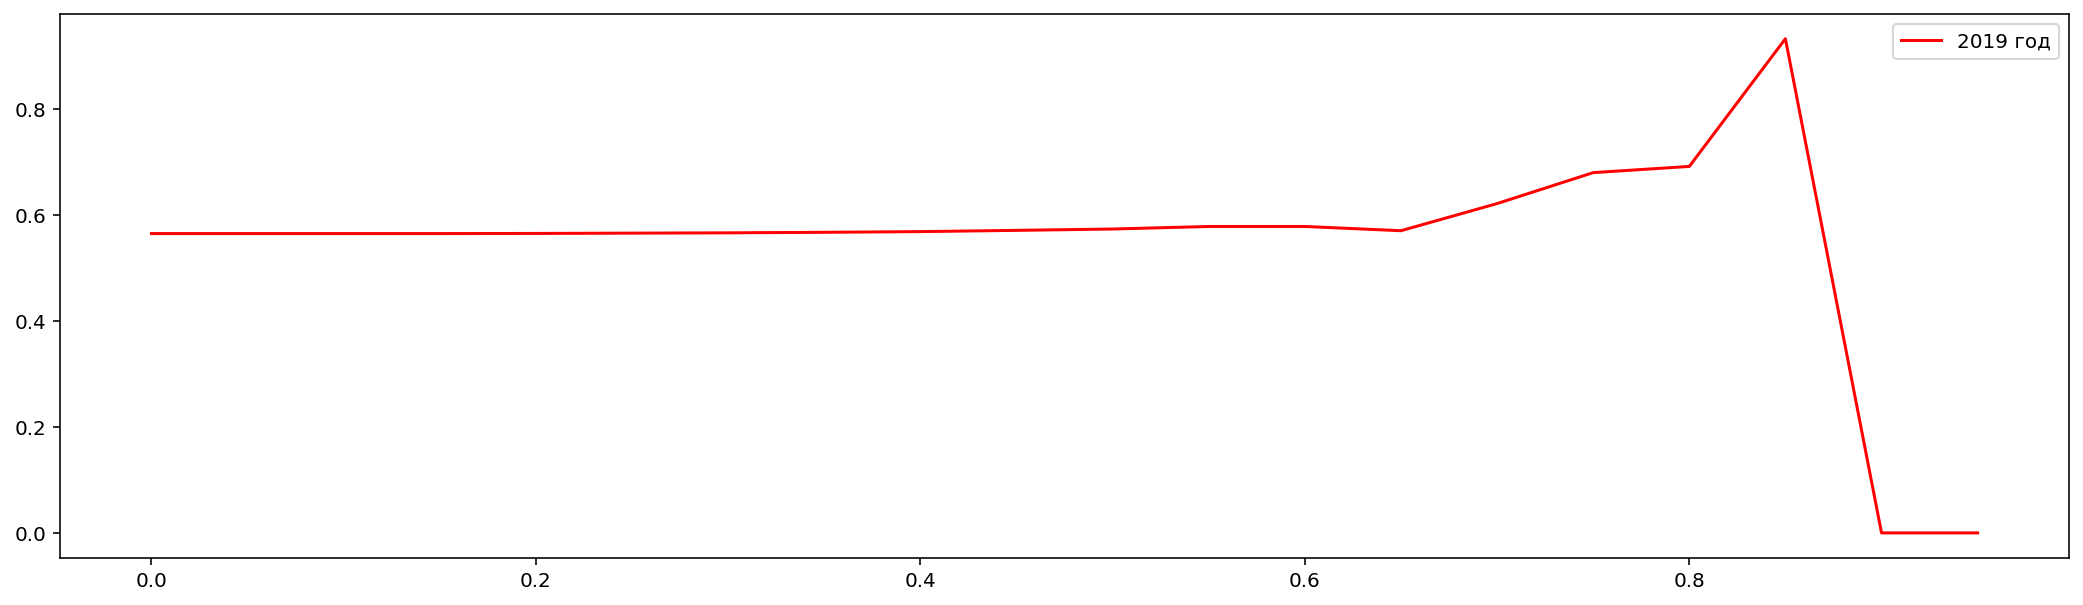

2020
roc_auc = 0.51
Time to train = 4.59 seconds
максимальная точность 1.0


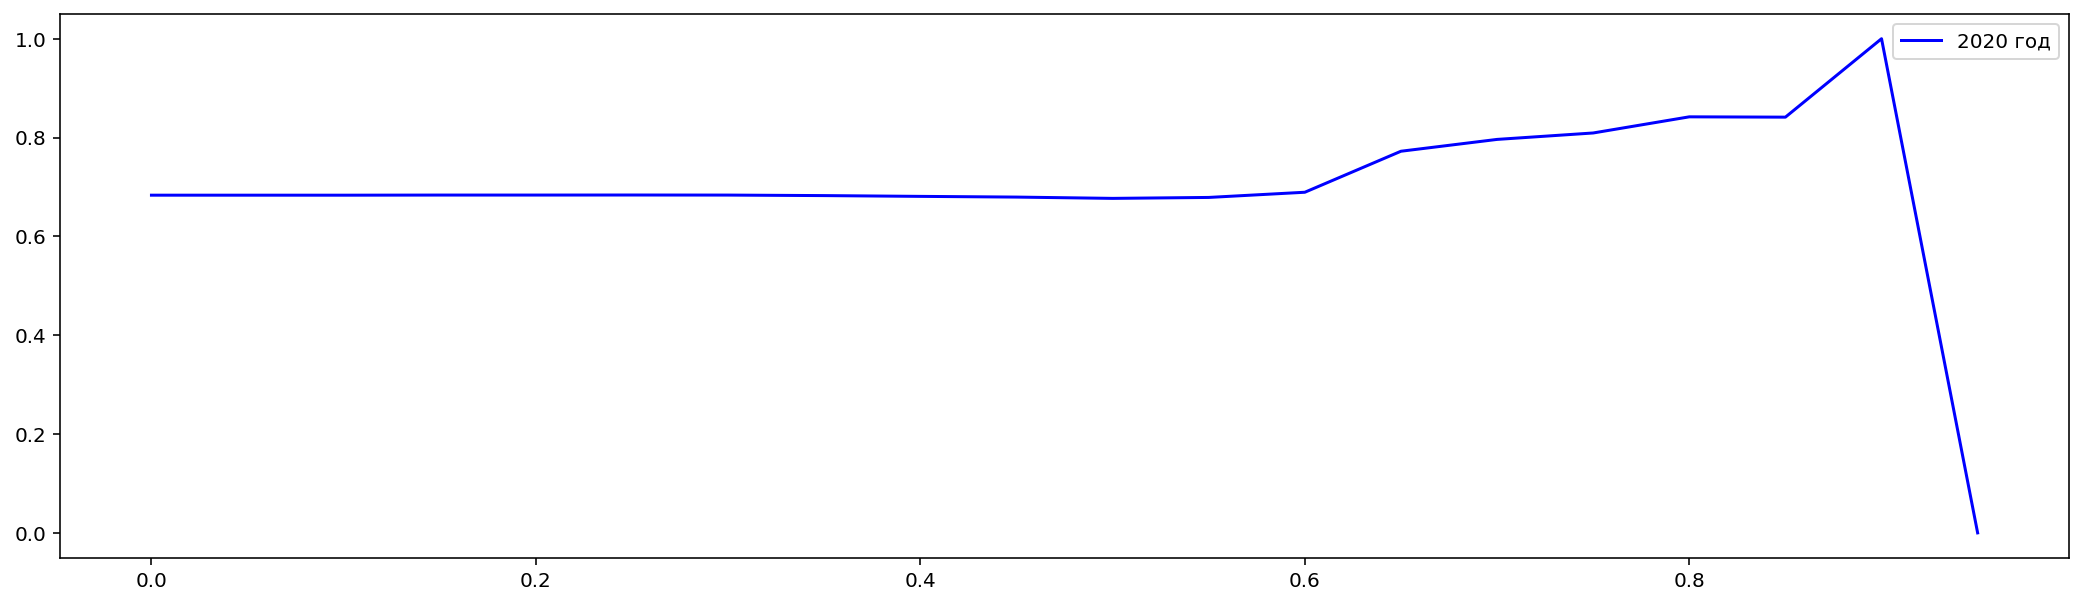

2021
roc_auc = 0.51
Time to train = 5.61 seconds
максимальная точность 0.7217694994179278


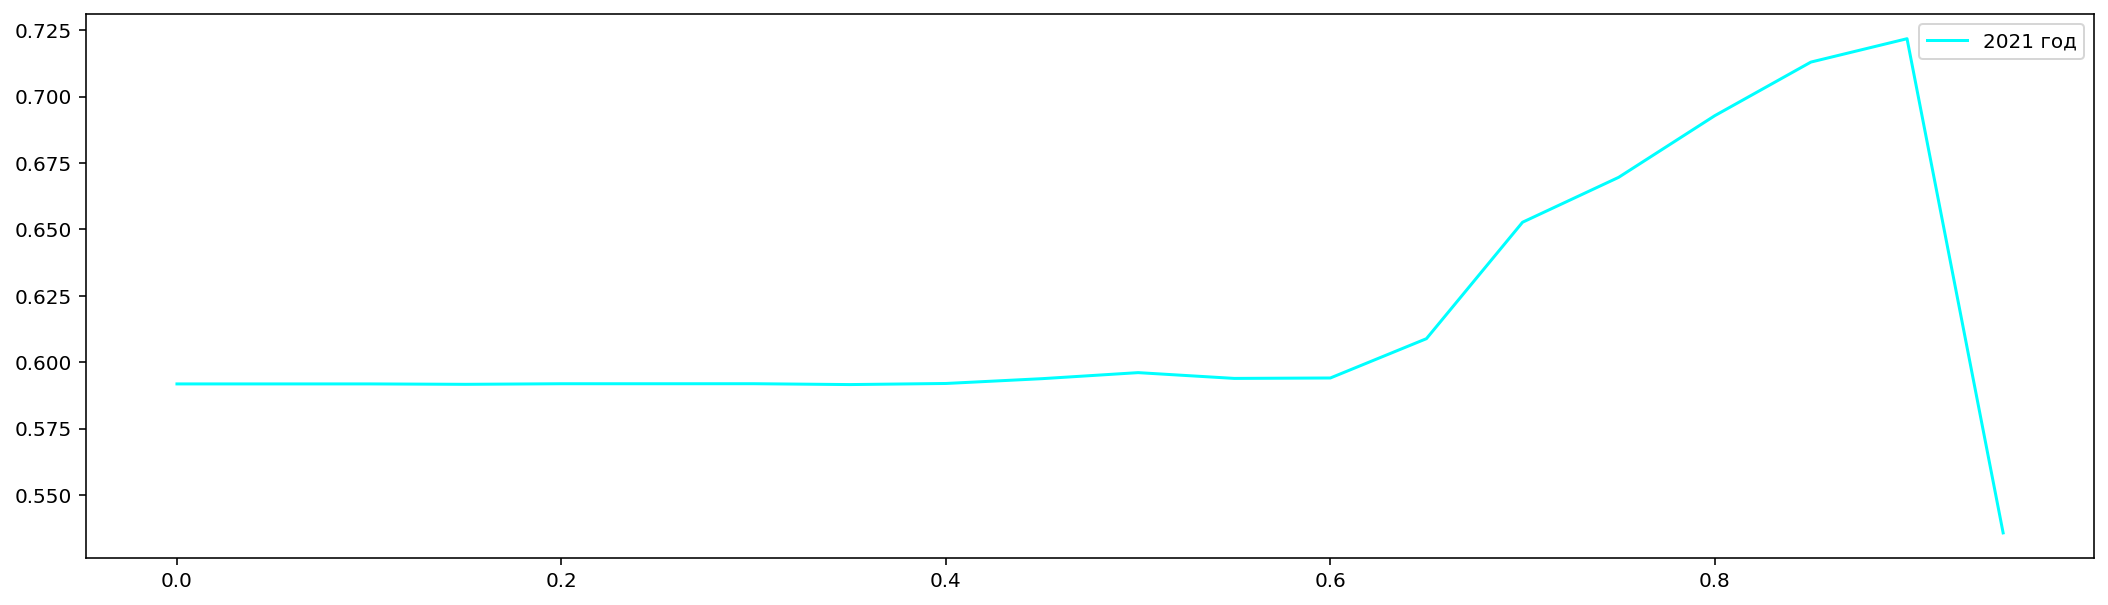

2022
roc_auc = 0.50
Time to train = 6.77 seconds
максимальная точность 0.45662100456621


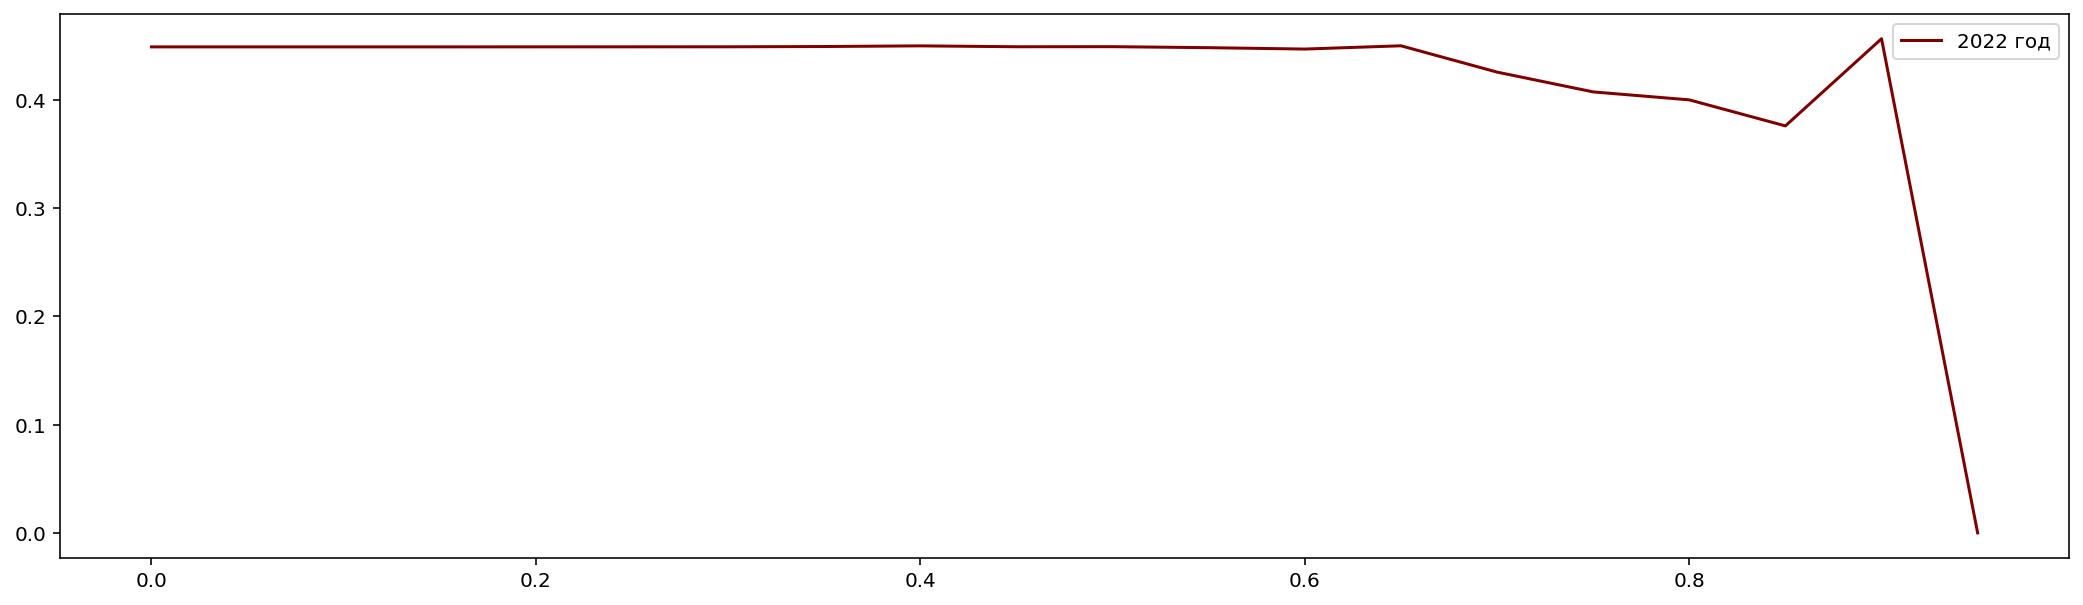

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = HistGradientBoostingClassifier(random_state=42)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

### GaussianNB

2014
roc_auc = 0.49
Time to train = 0.01 seconds
максимальная точность 0.6615678776290631


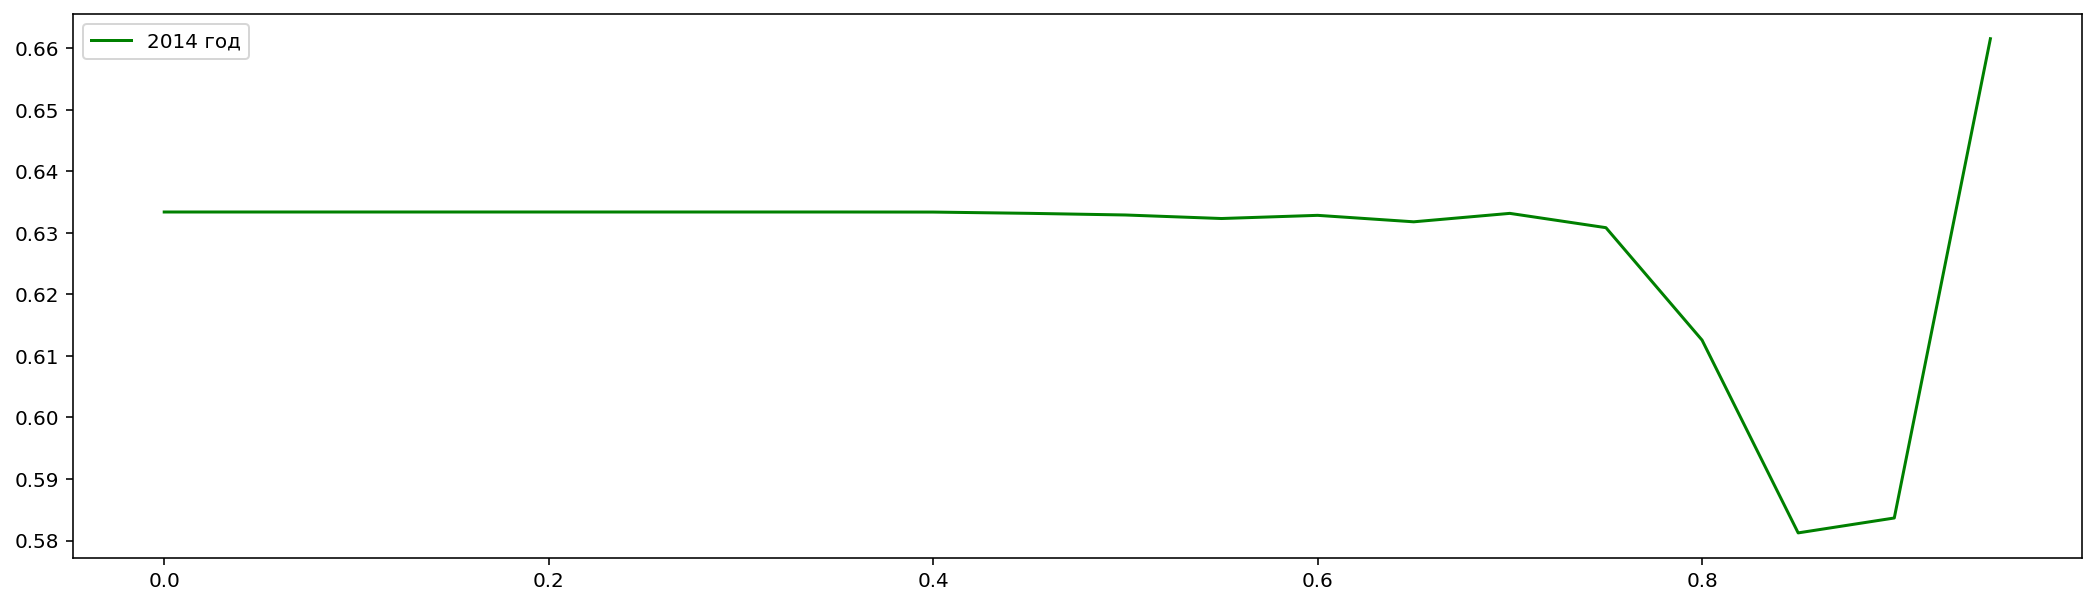

2015
roc_auc = 0.49
Time to train = 0.02 seconds
максимальная точность 0.5


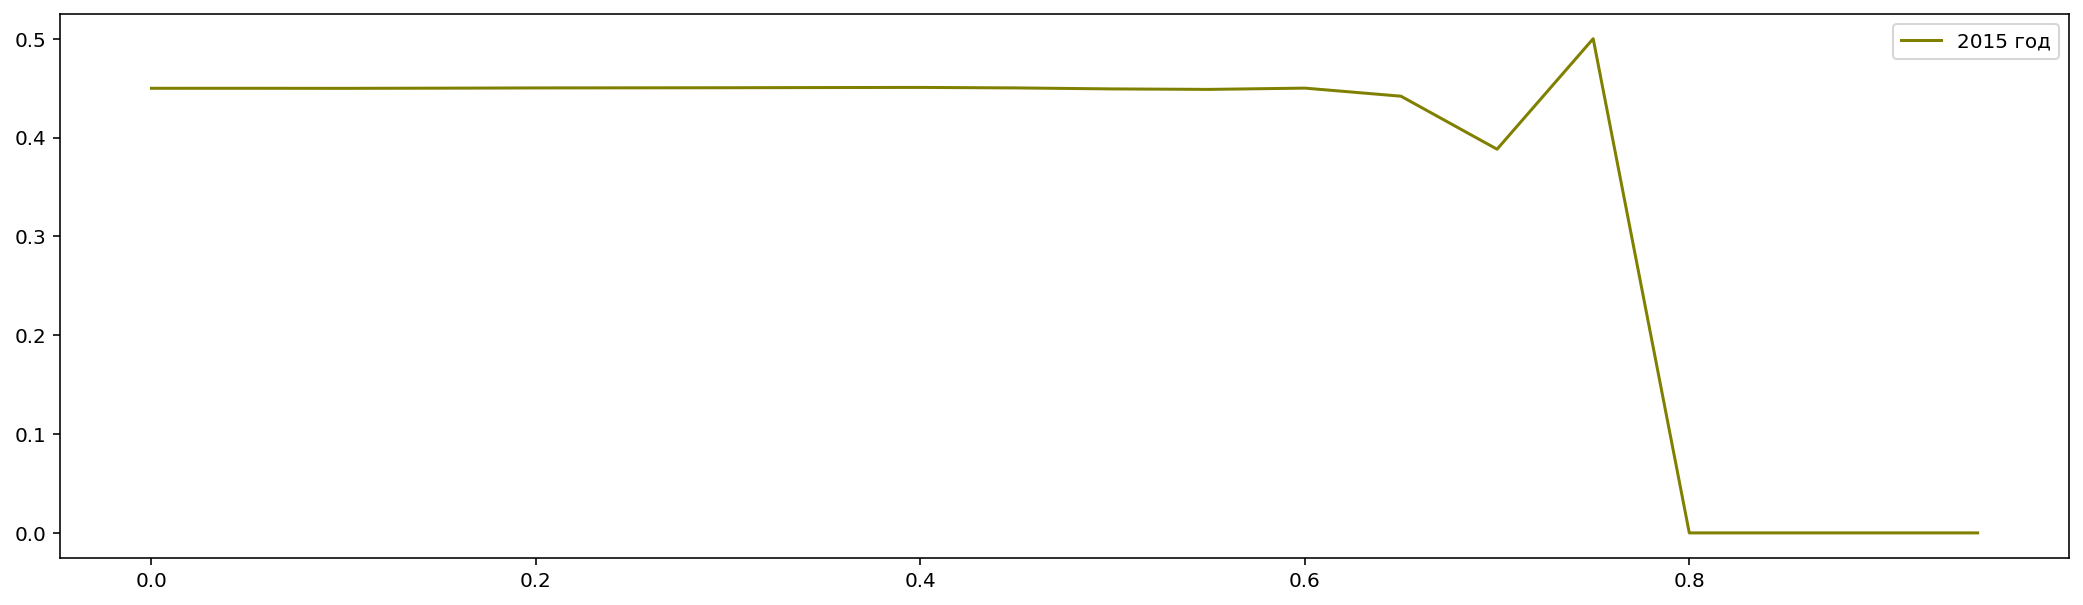

2016
roc_auc = 0.49
Time to train = 0.04 seconds
максимальная точность 0.7292868547719776


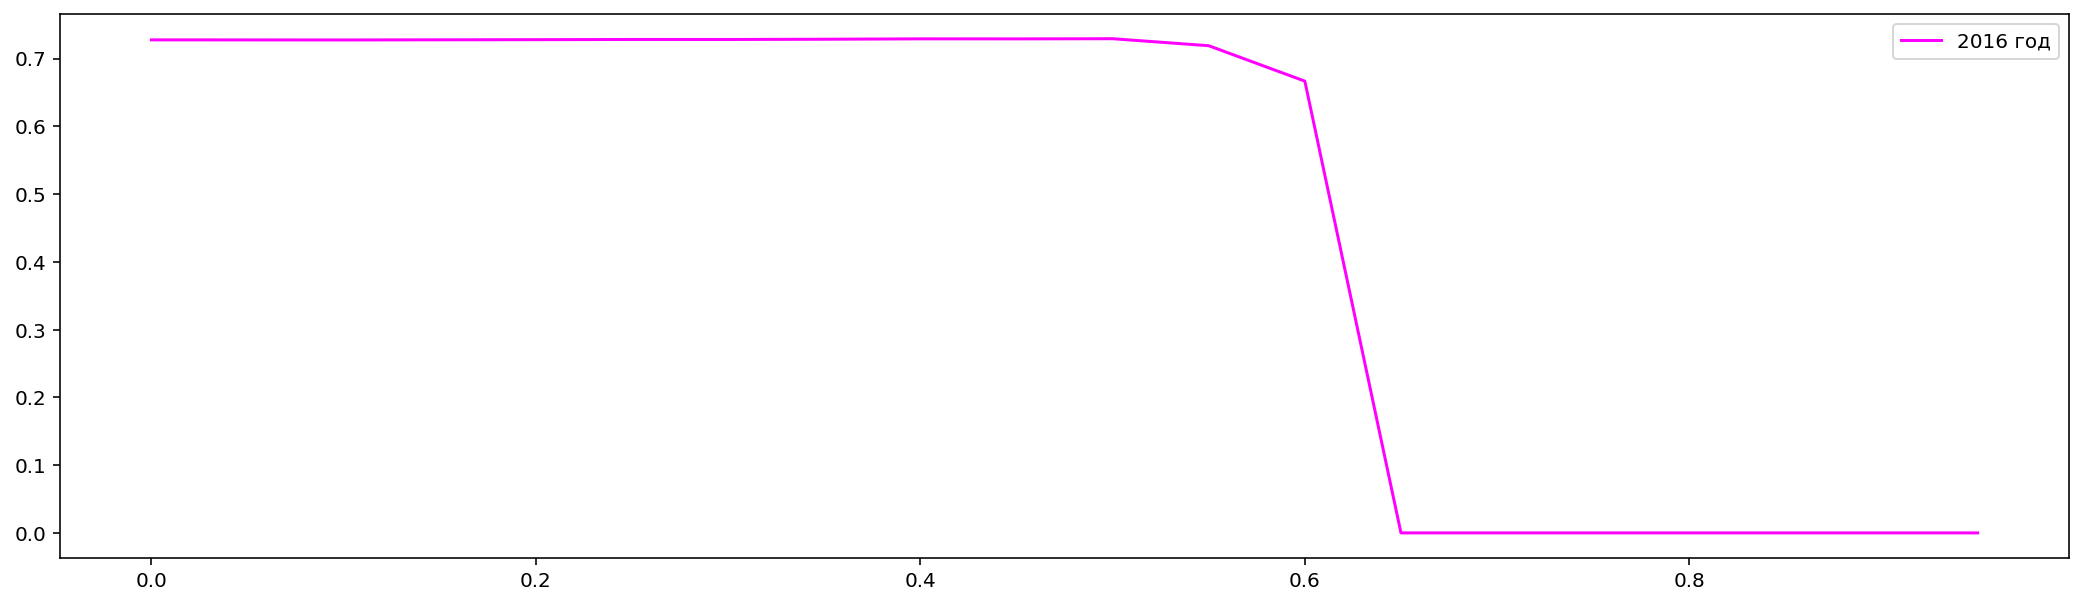

2017
roc_auc = 0.51
Time to train = 0.06 seconds
максимальная точность 0.6040680771597734


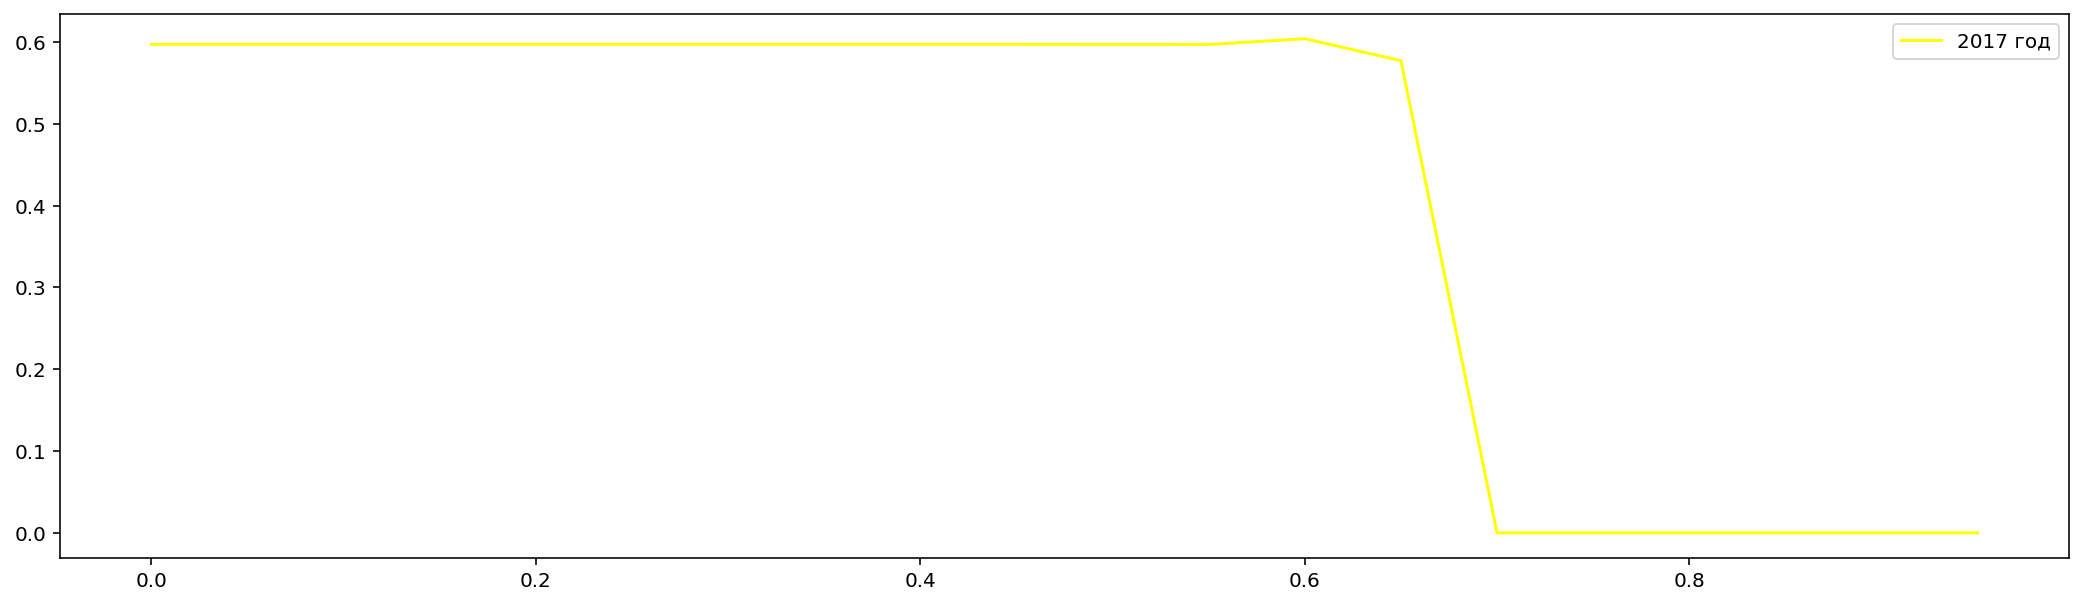

2018
roc_auc = 0.49
Time to train = 0.07 seconds
максимальная точность 0.520861619451409


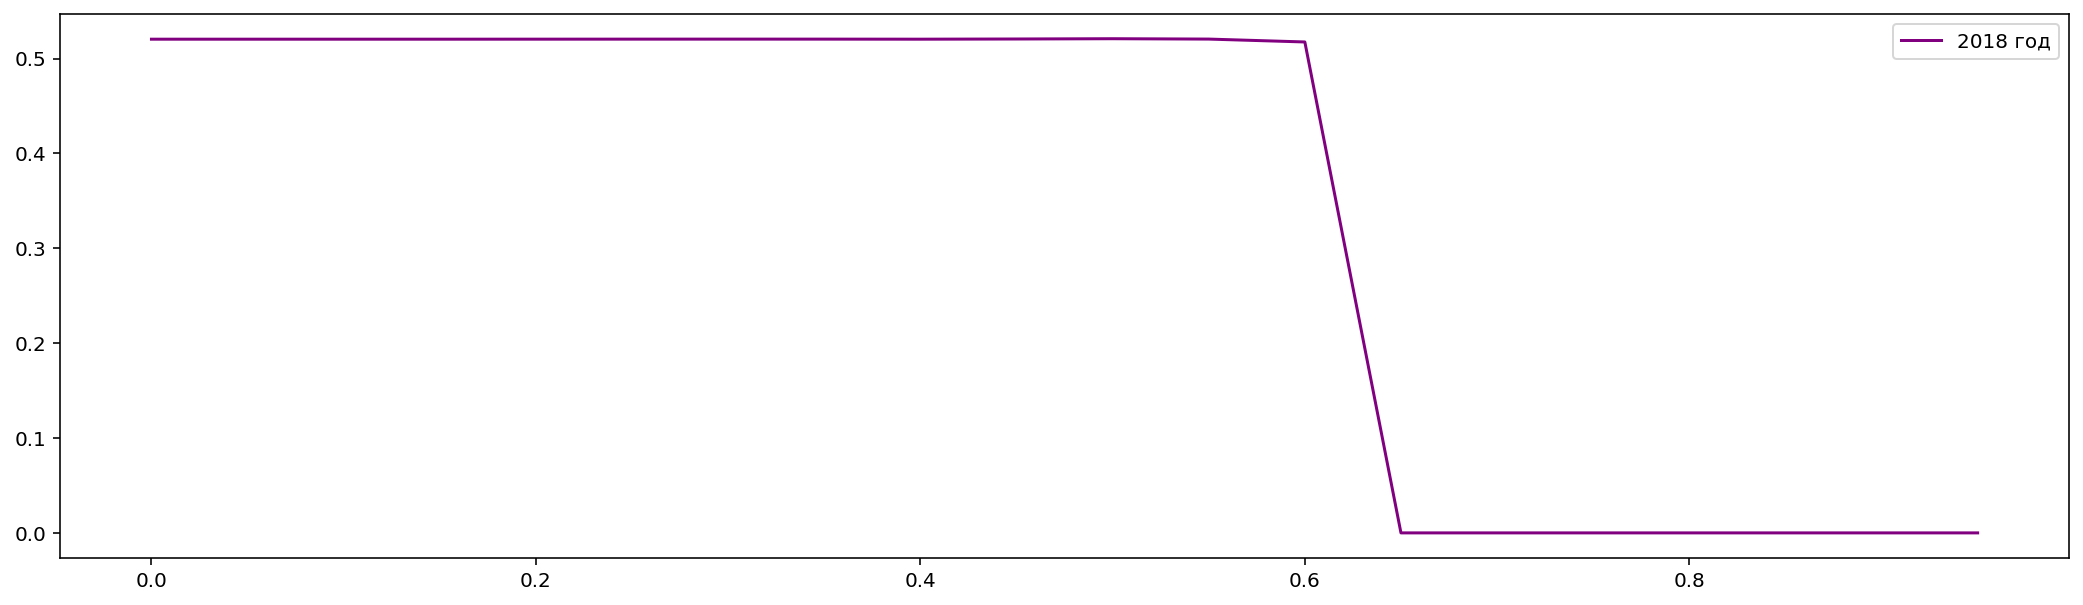

2019
roc_auc = 0.55
Time to train = 0.09 seconds
максимальная точность 0.6154613964166292


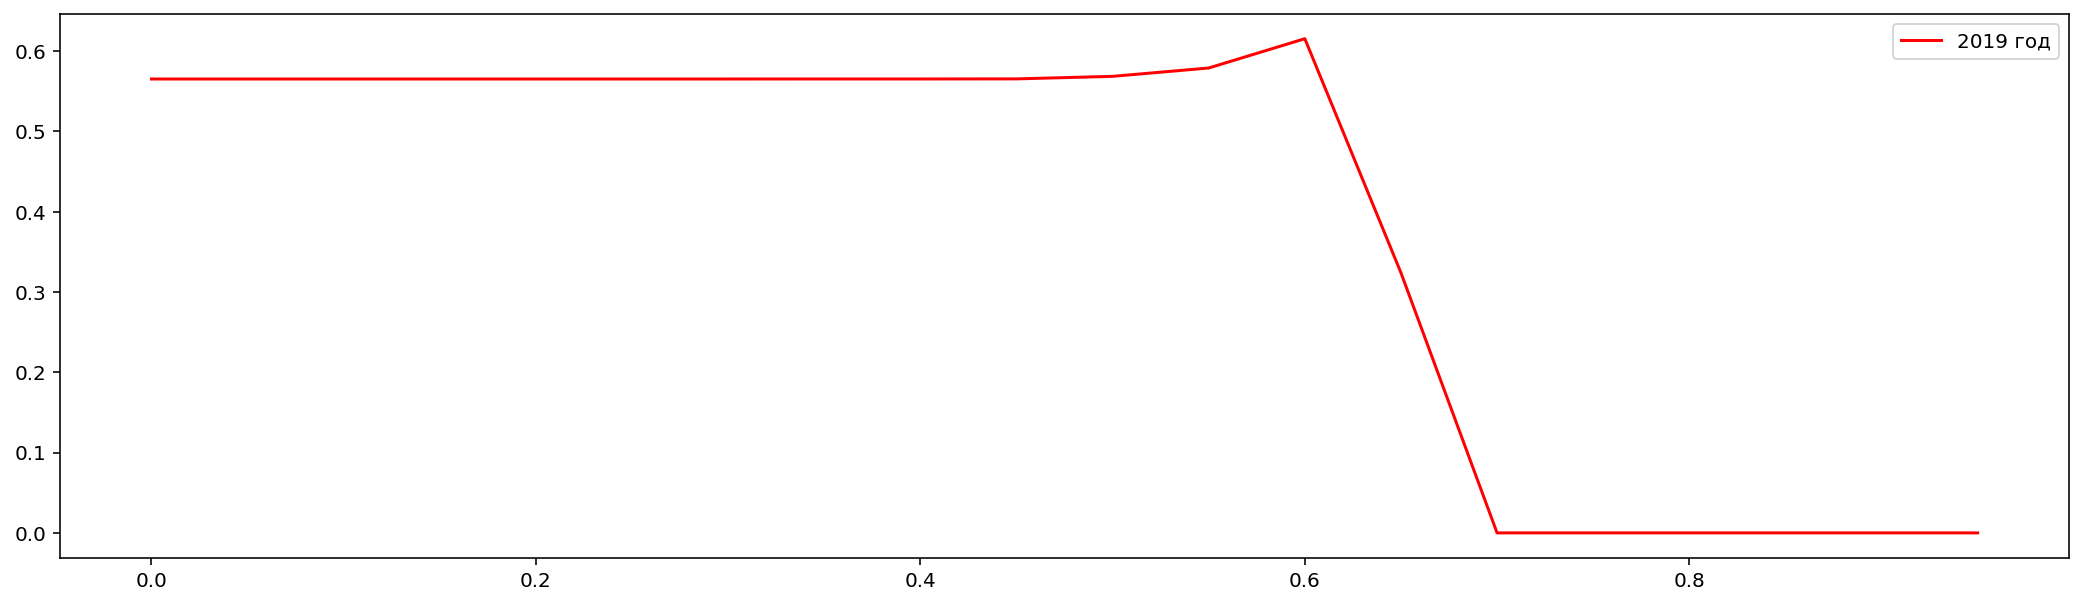

2020
roc_auc = 0.44
Time to train = 0.11 seconds
максимальная точность 0.7666666666666667


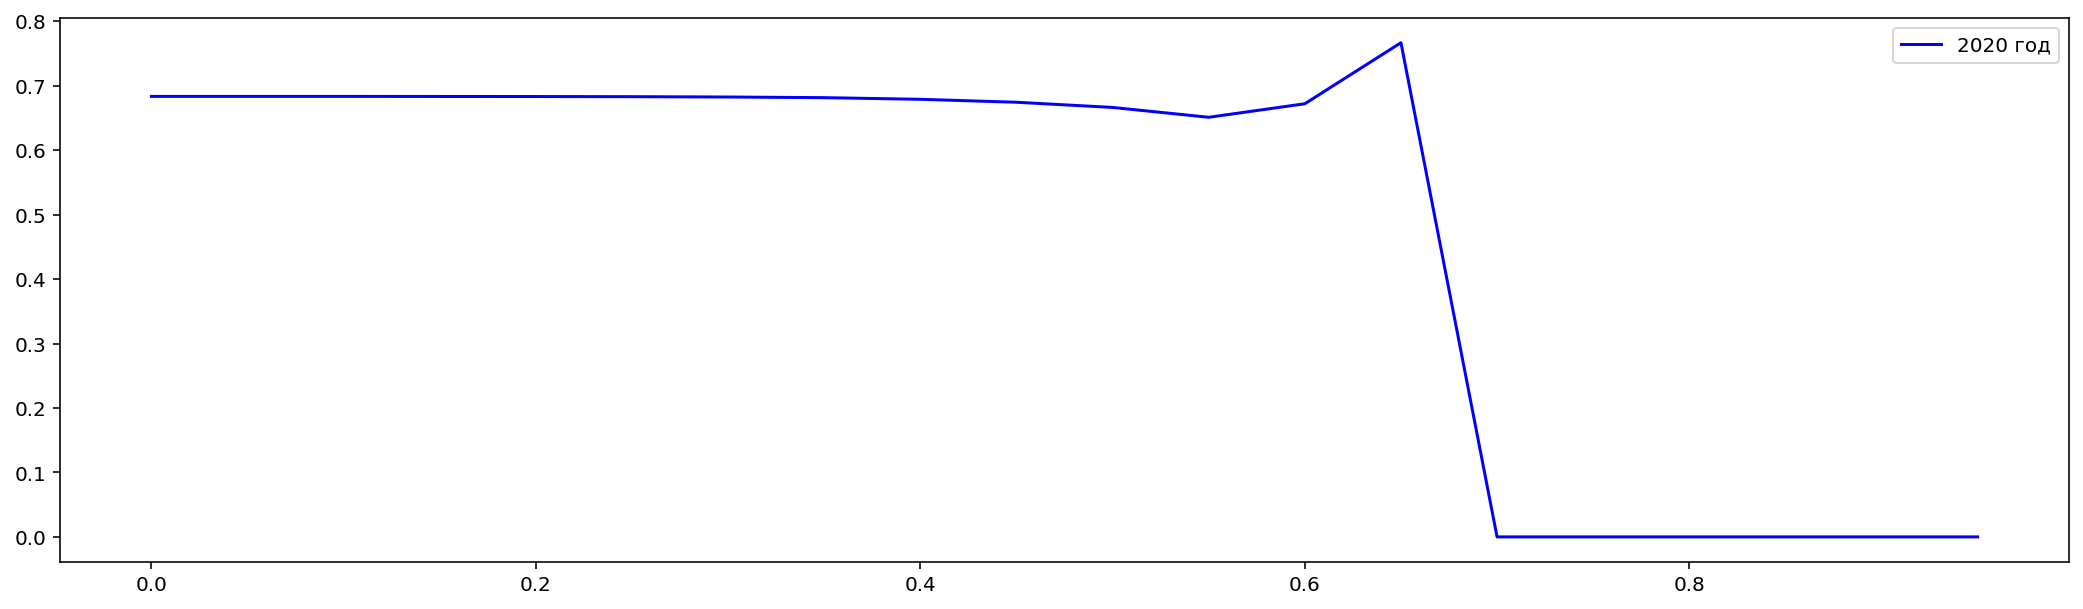

2021
roc_auc = 0.51
Time to train = 0.13 seconds
максимальная точность 0.7435246317927883


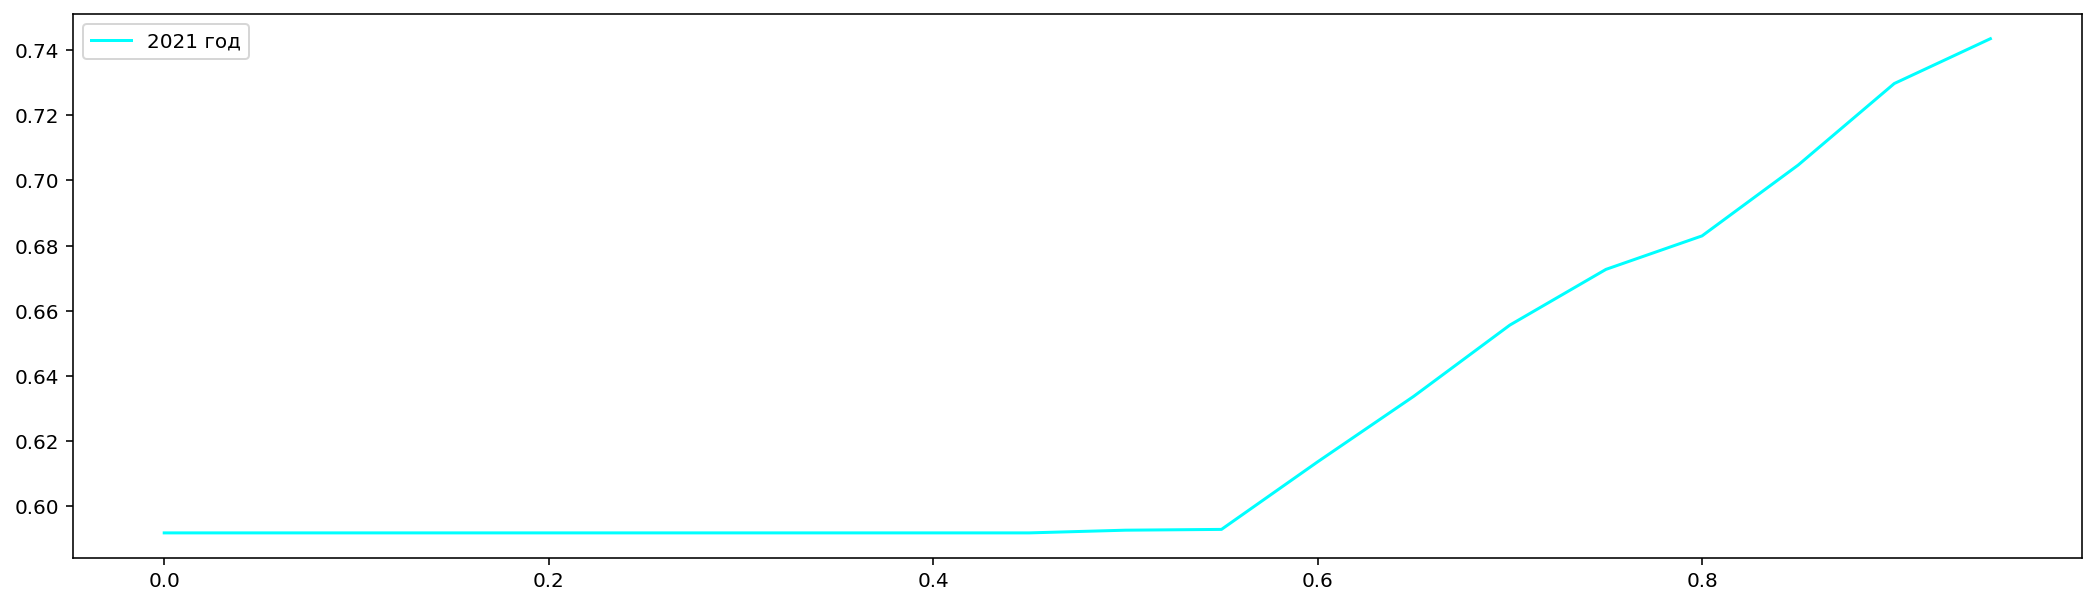

2022
roc_auc = 0.51
Time to train = 0.16 seconds
максимальная точность 0.4604412086366903


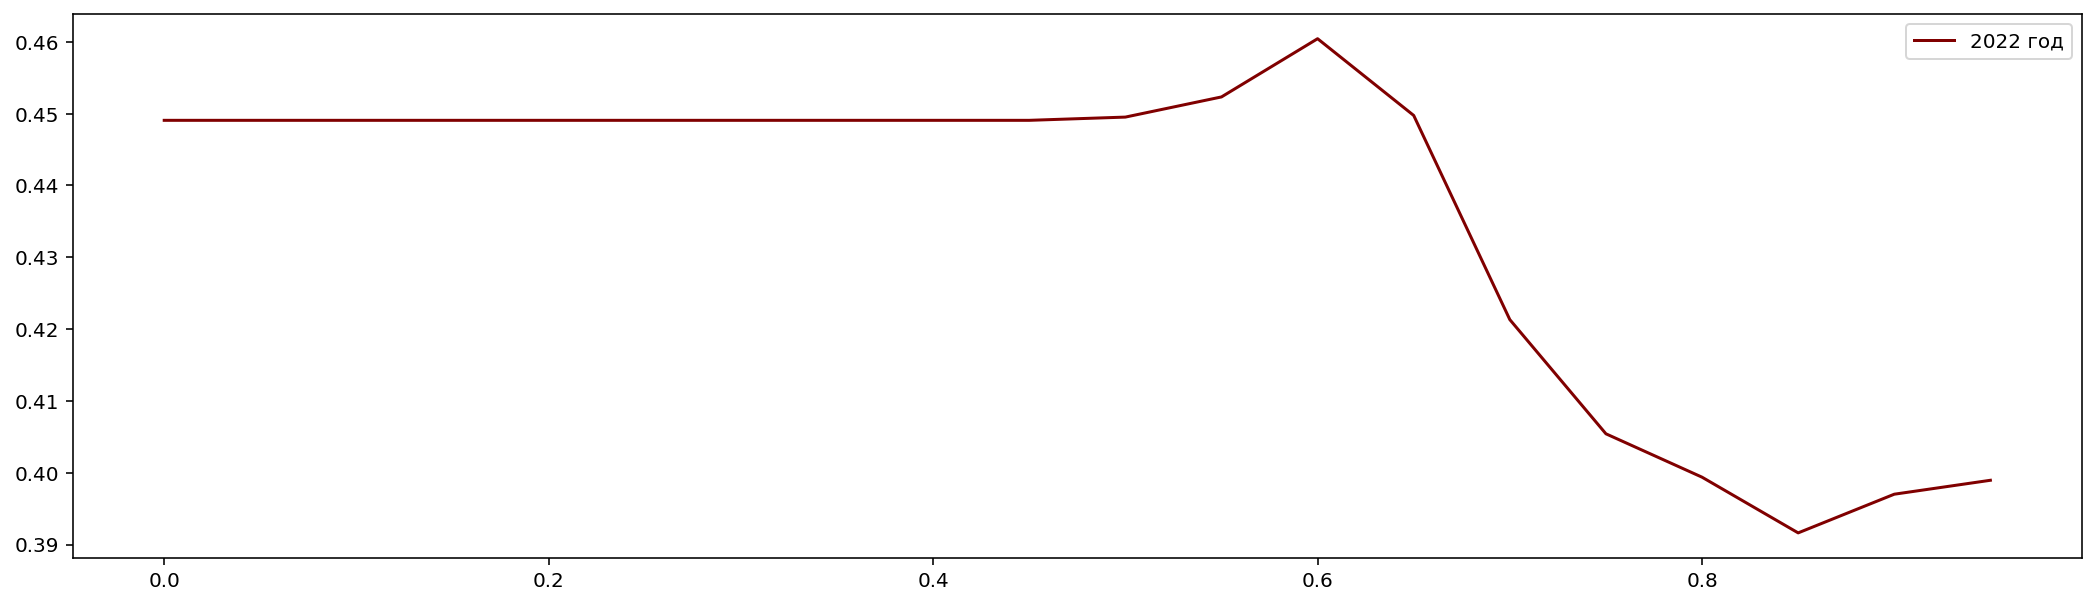

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = GaussianNB()
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
hgbc = ExtraTreesClassifier(criterion='entropy', random_state=42)
parametrs = { 'n_estimators': range(1800, 5000, 500)
             }
grid = GridSearchCV(hgbc, parametrs, cv=3, scoring = 'roc_auc')
grid.fit(X_test, y_test)
print(f'The best parameters for ExtraTreesClassifier:\n {grid.best_params_}')
print(f'The value roc_auc for ExtraTreesClassifier: {grid.best_score_}')

The best parameters for ExtraTreesClassifier:
 {'n_estimators': 1800}
The value roc_auc for ExtraTreesClassifier: 0.5279968455119793


### ExtraTreesClassifier without gyperparameters

2014
roc_auc = 0.51
Time to train = 1.15 seconds
максимальная точность 0.648327181109744


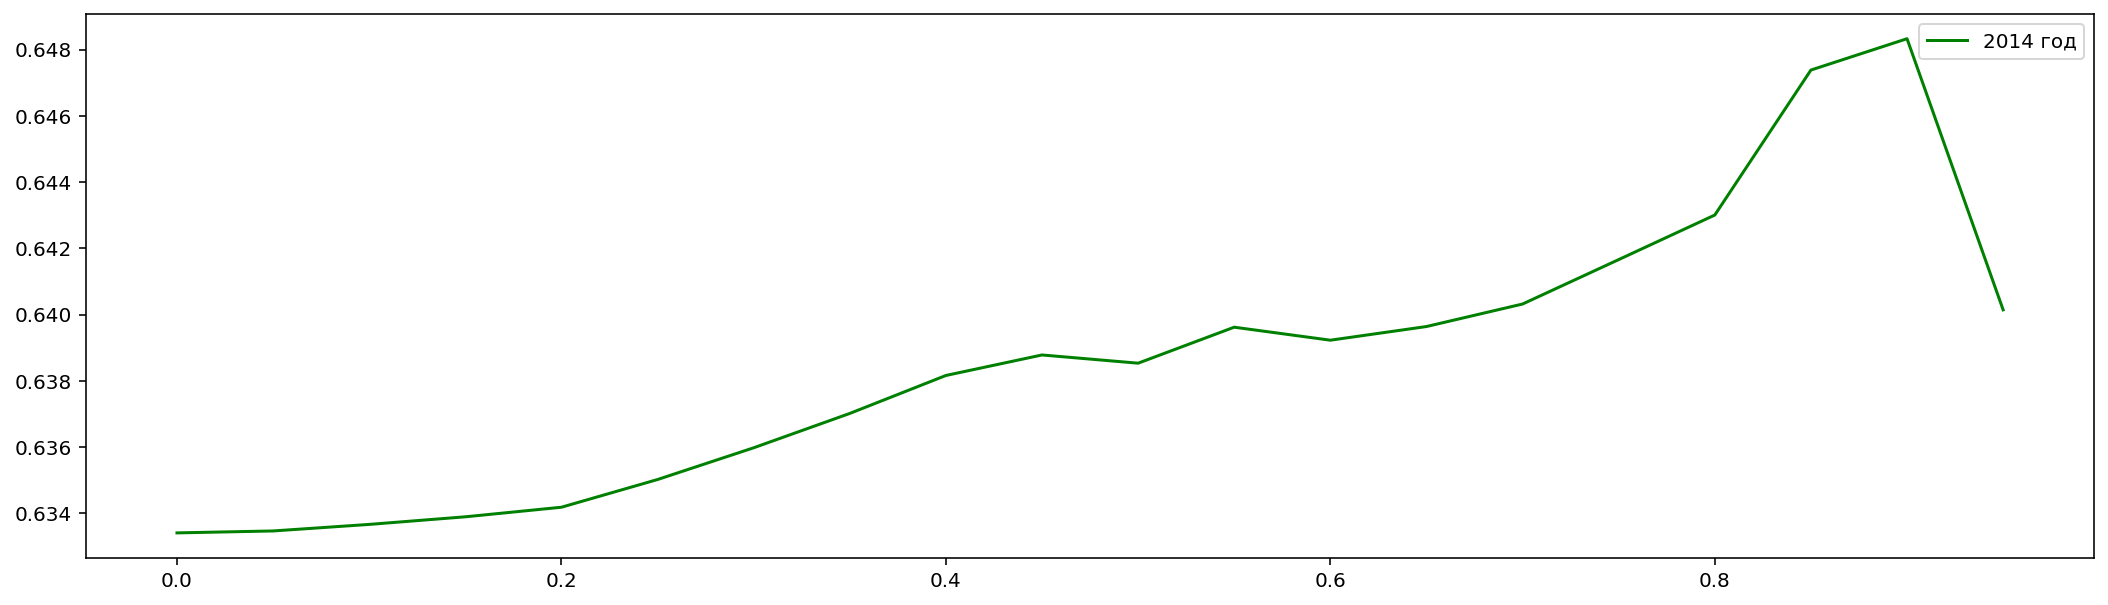

2015
roc_auc = 0.51
Time to train = 6.08 seconds
максимальная точность 0.48525641025641025


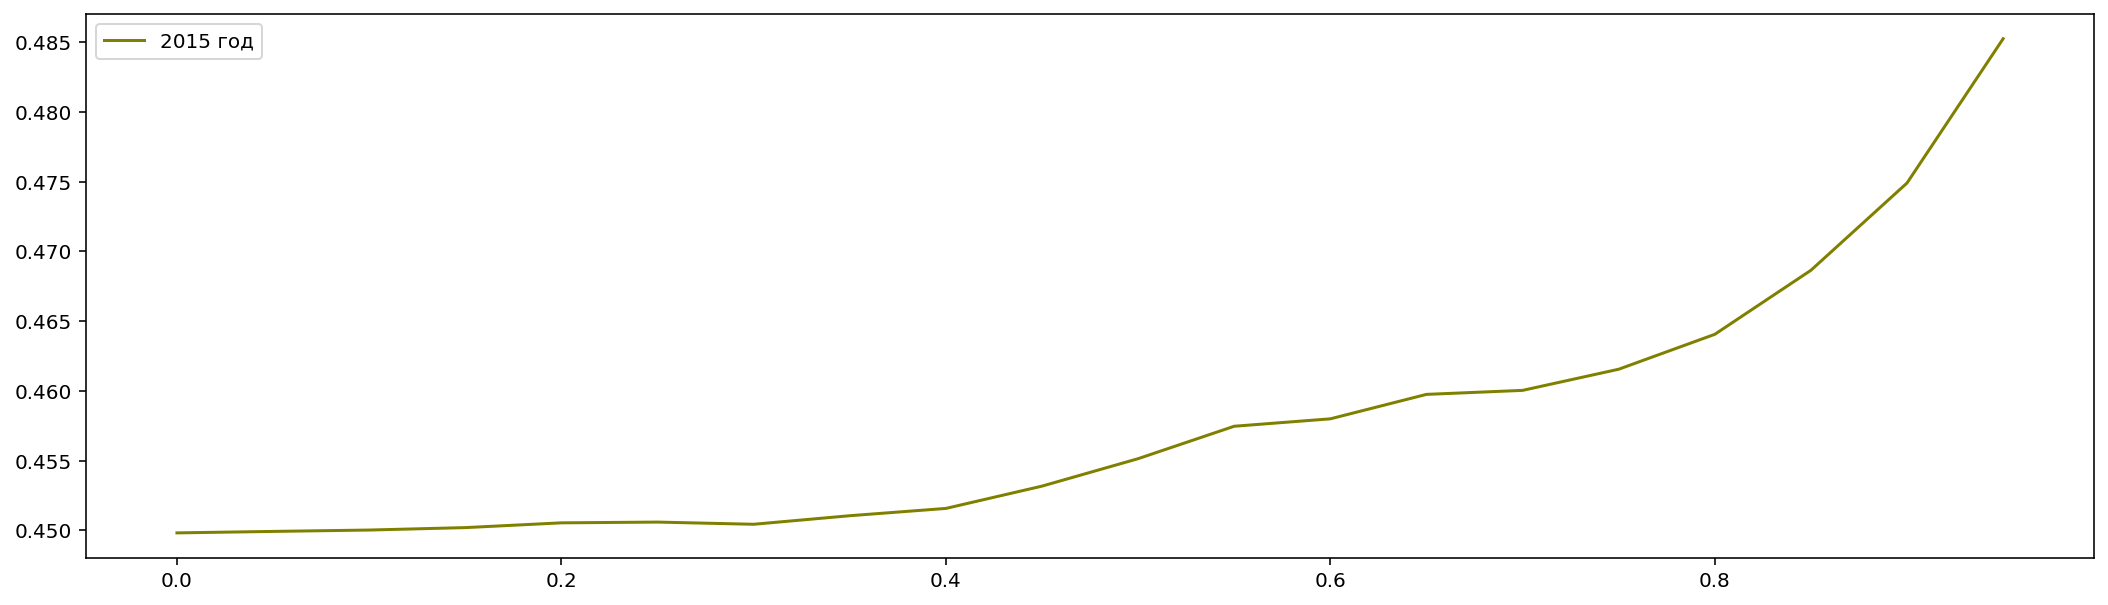

2016
roc_auc = 0.52
Time to train = 12.03 seconds
максимальная точность 0.7384256298759432


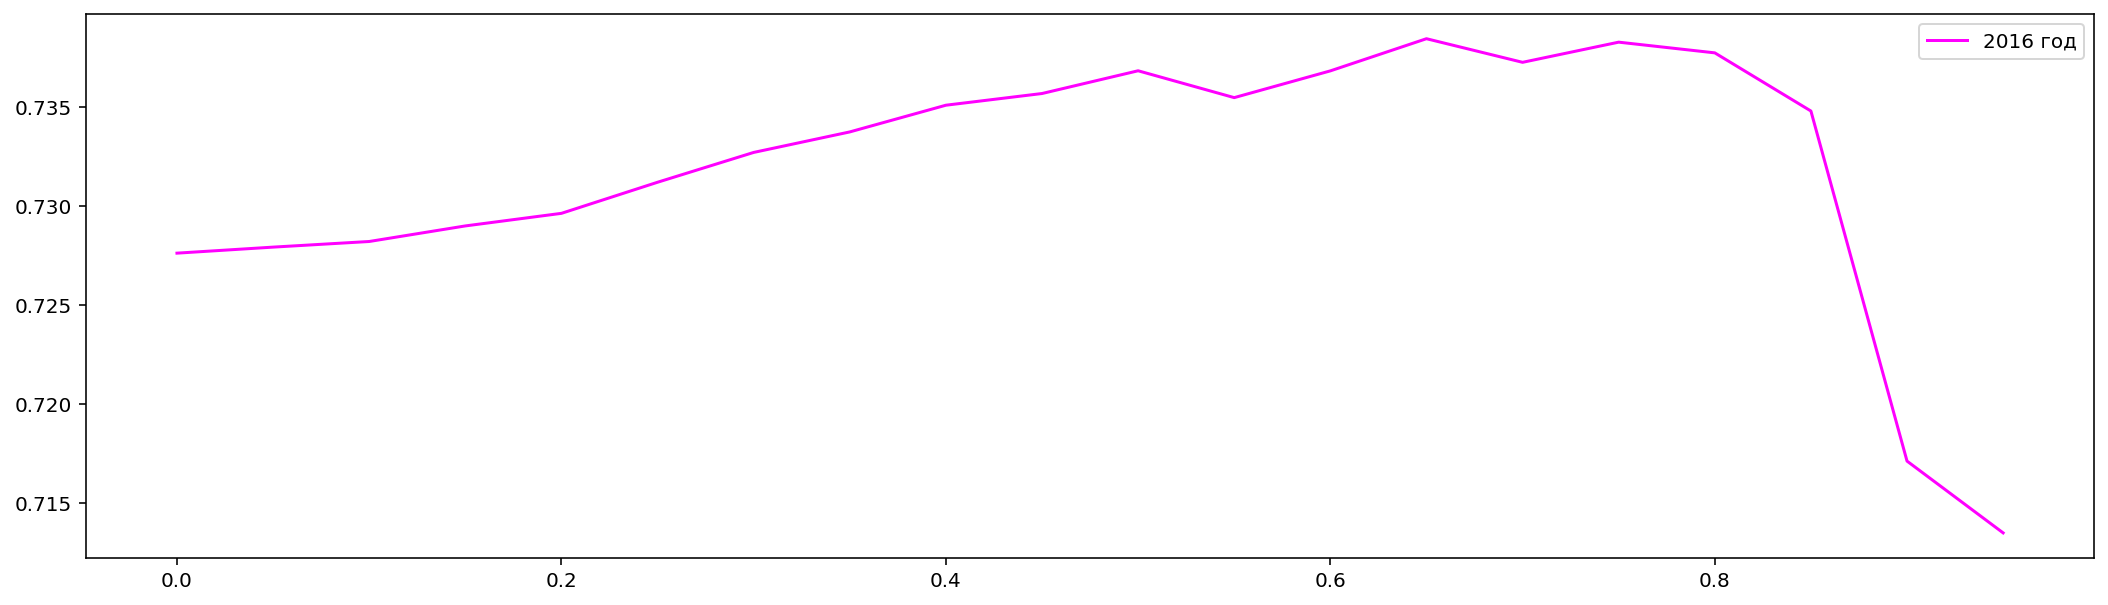

2017
roc_auc = 0.51
Time to train = 17.55 seconds
максимальная точность 0.604429192919292


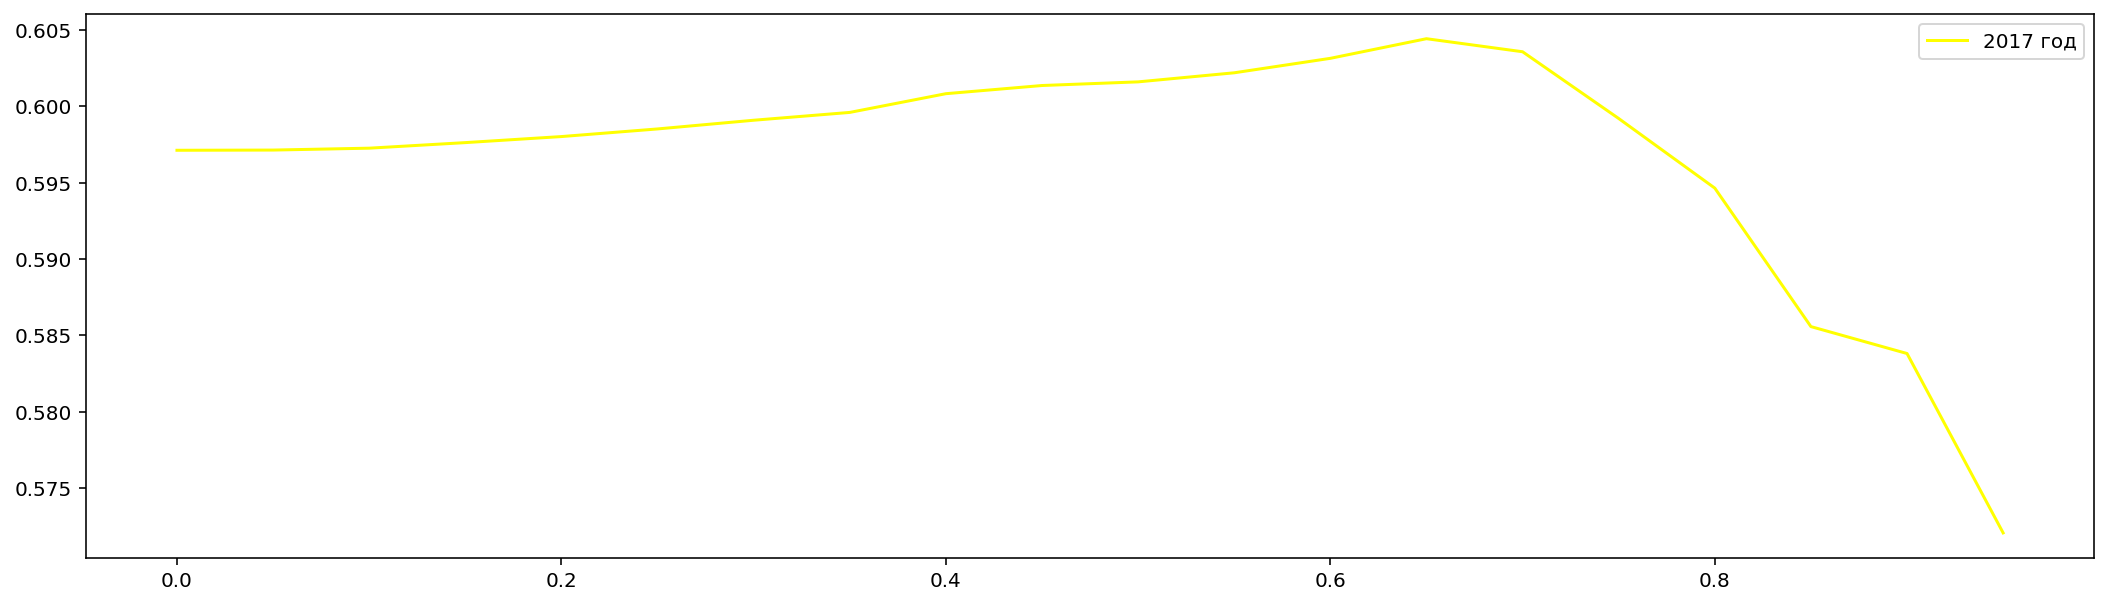

2018
roc_auc = 0.51
Time to train = 23.93 seconds
максимальная точность 0.530917242667663


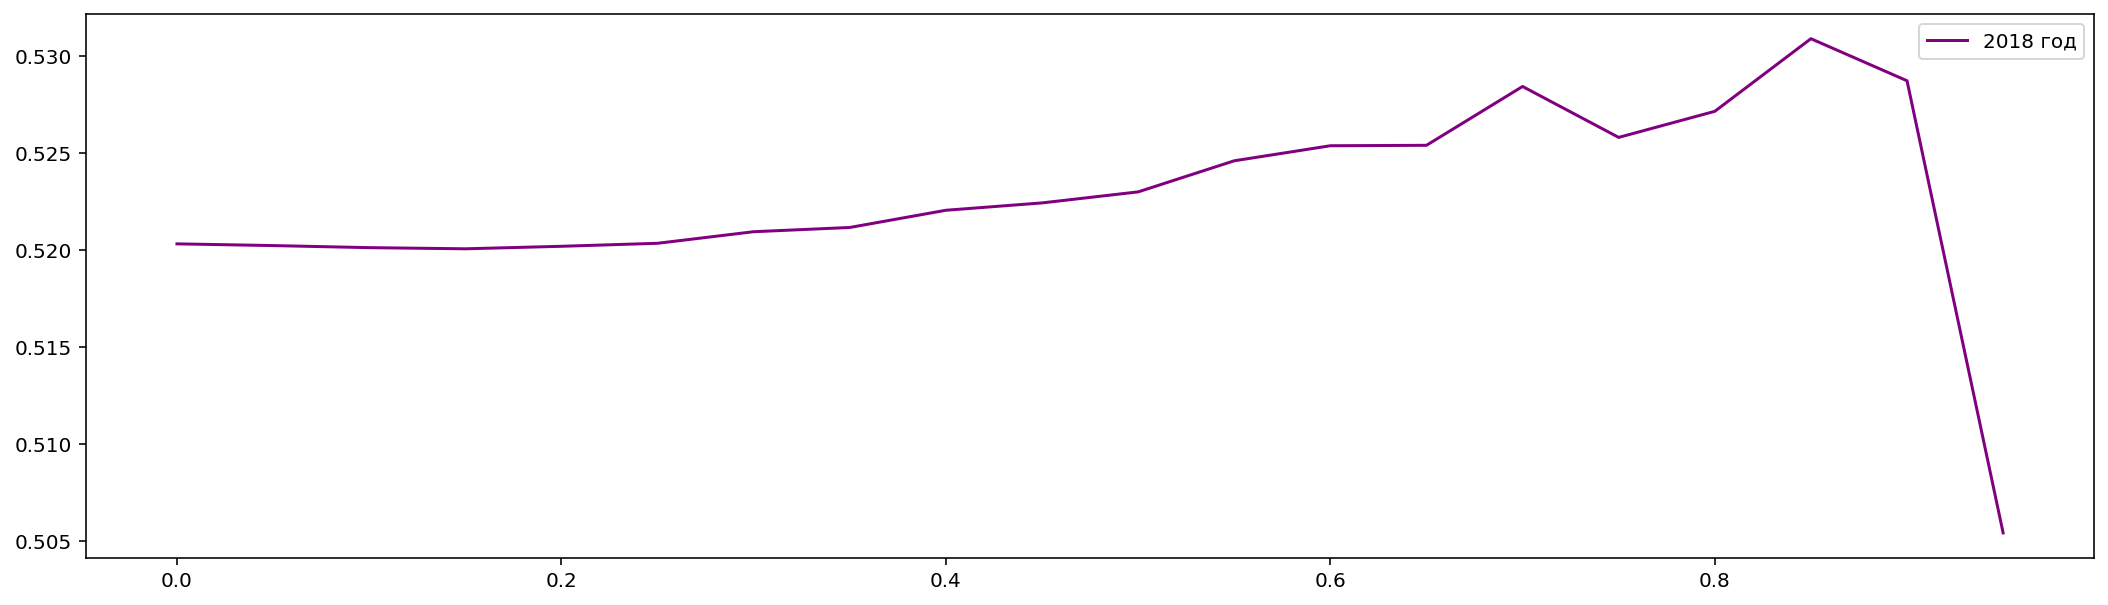

2019
roc_auc = 0.51
Time to train = 30.94 seconds
максимальная точность 0.6132252027448534


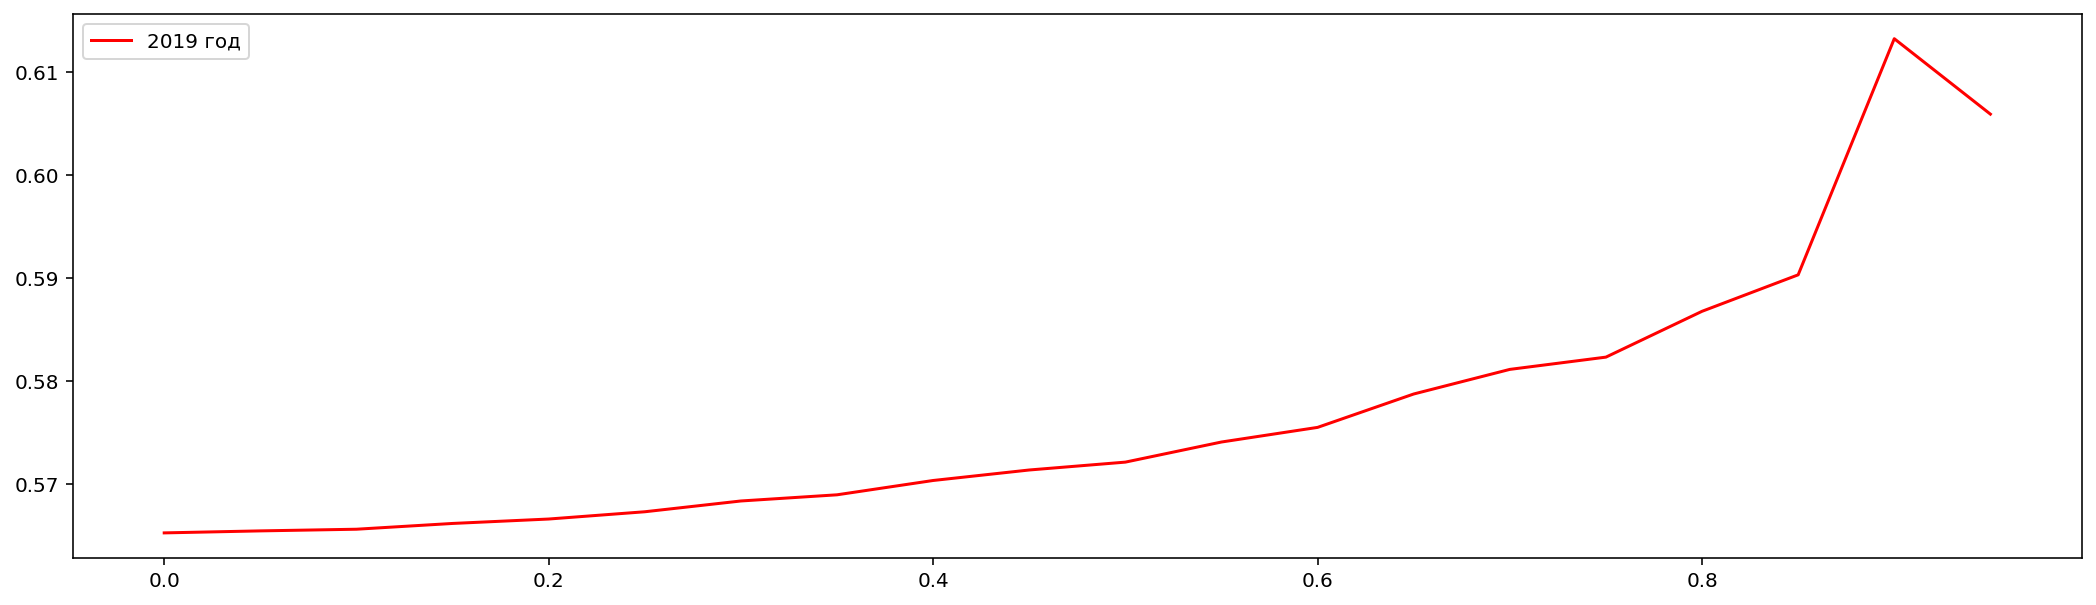

2020
roc_auc = 0.52
Time to train = 38.02 seconds
максимальная точность 0.7727272727272727


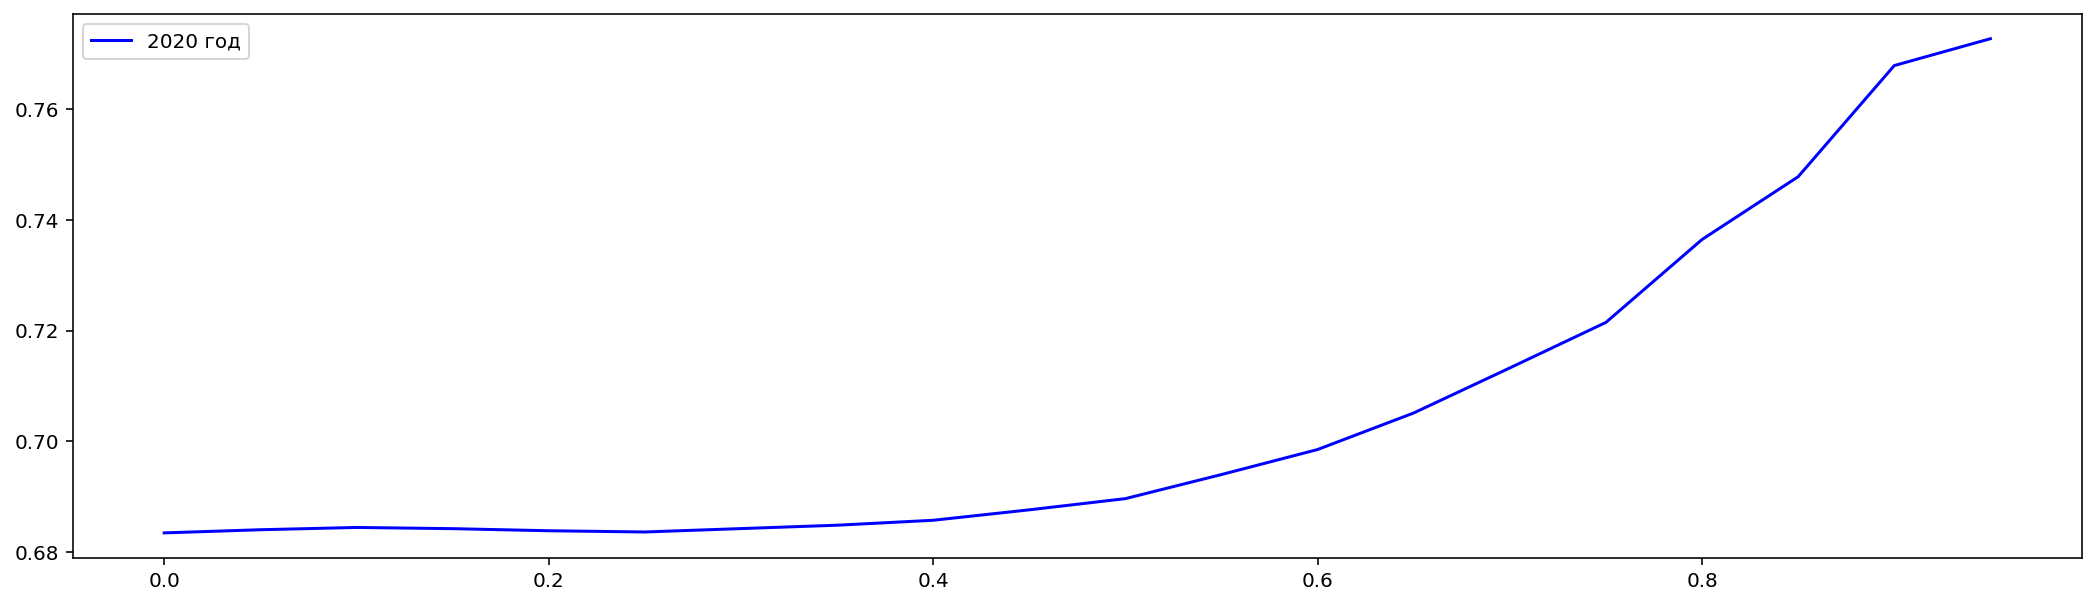

2021
roc_auc = 0.51
Time to train = 46.41 seconds
максимальная точность 0.7070534698521047


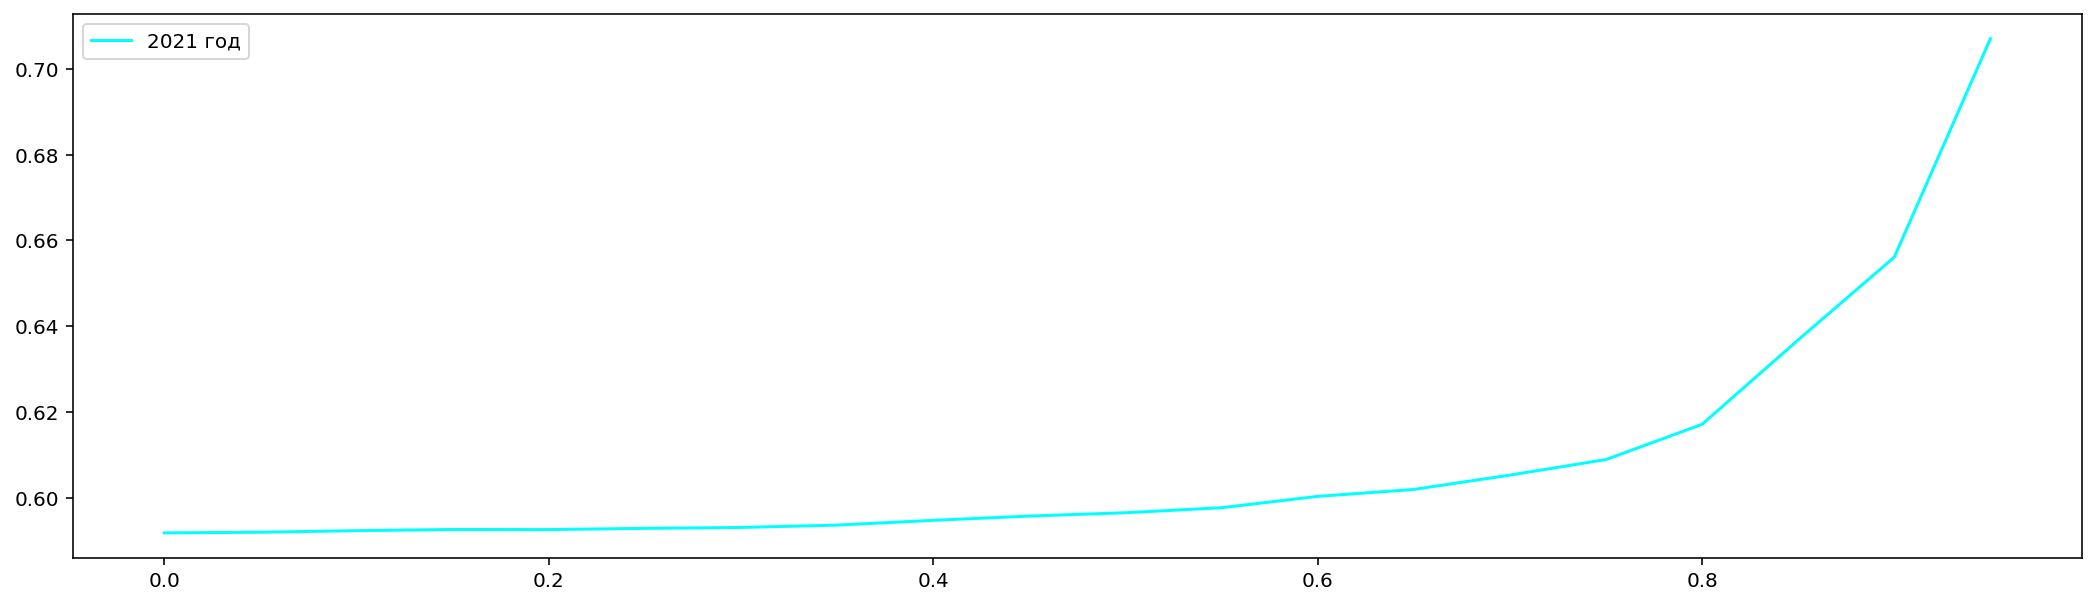

2022
roc_auc = 0.50
Time to train = 59.31 seconds
максимальная точность 0.4518232396612212


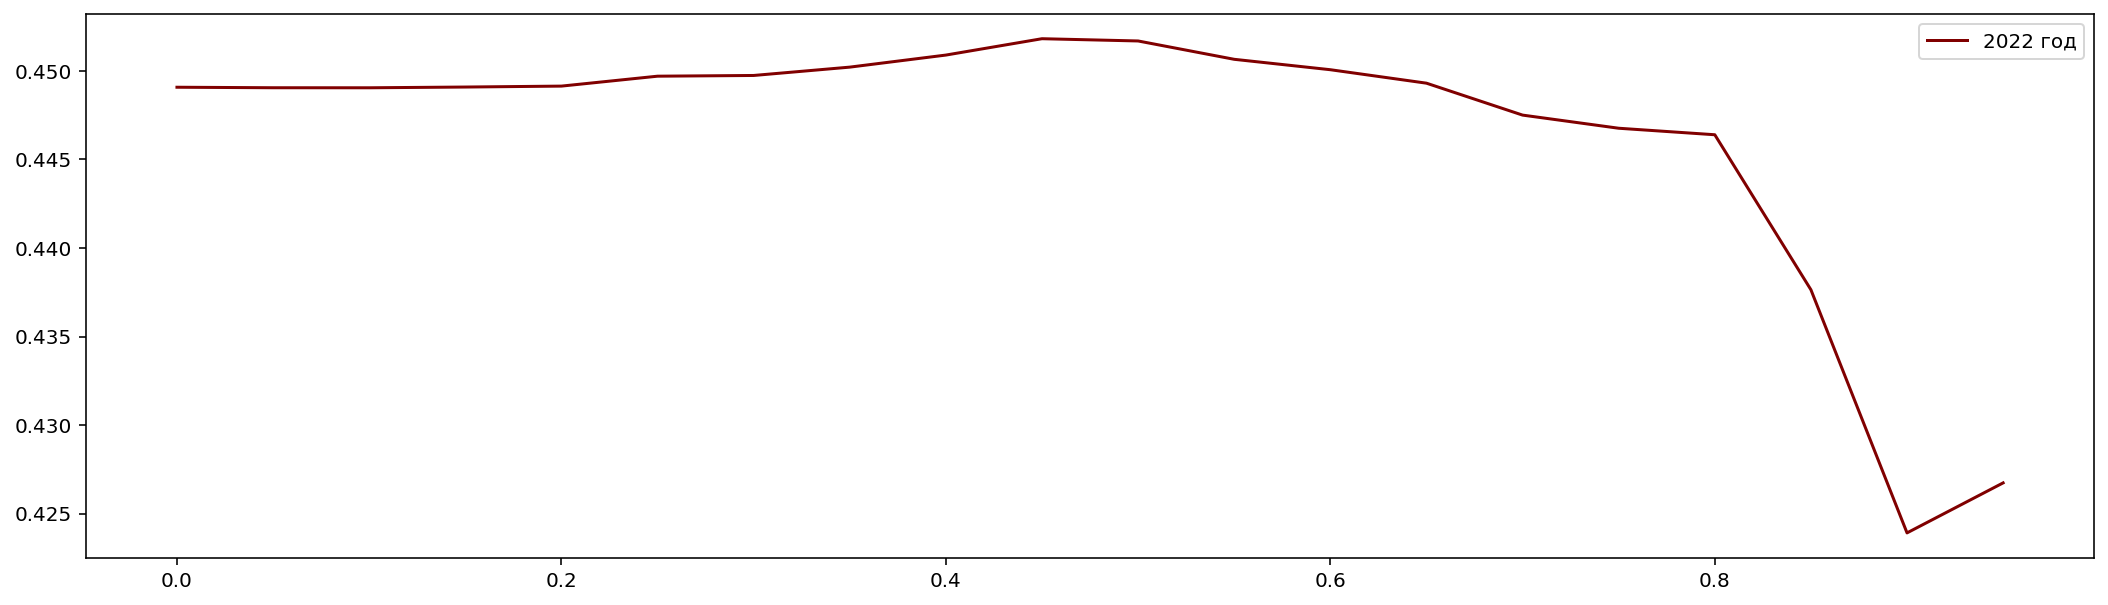

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = ExtraTreesClassifier(random_state=42, criterion='gini', n_estimators=100)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

### ExtraTreesClassifier with gyperparameters

2014
roc_auc = 0.51
Time to train = 5.80 seconds
максимальная точность 0.6454206144128625


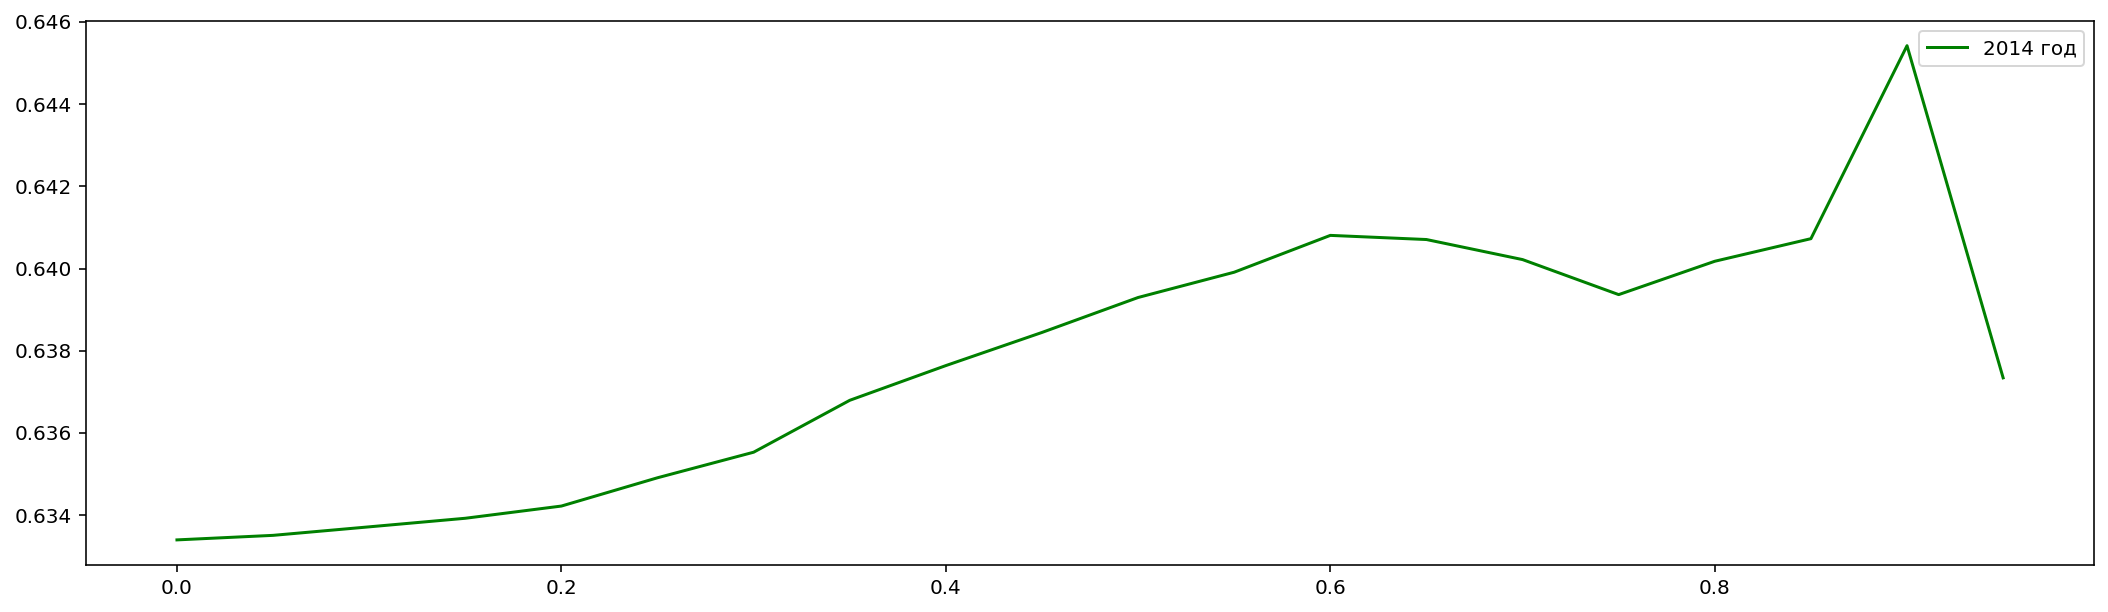

2015
roc_auc = 0.51
Time to train = 32.54 seconds
максимальная точность 0.48415622697126015


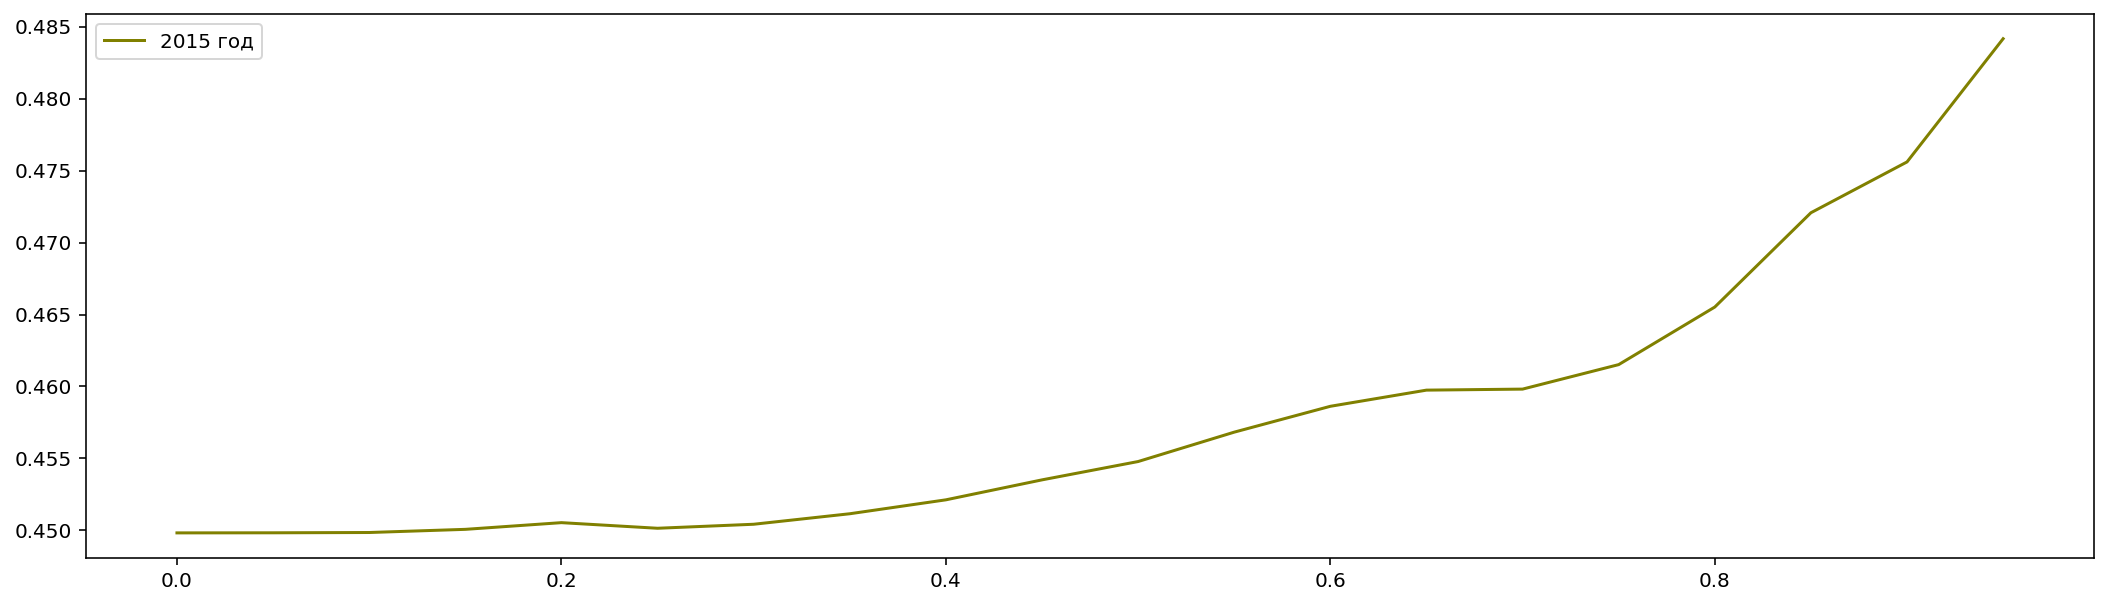

2016
roc_auc = 0.52
Time to train = 64.95 seconds
максимальная точность 0.7392596420957426


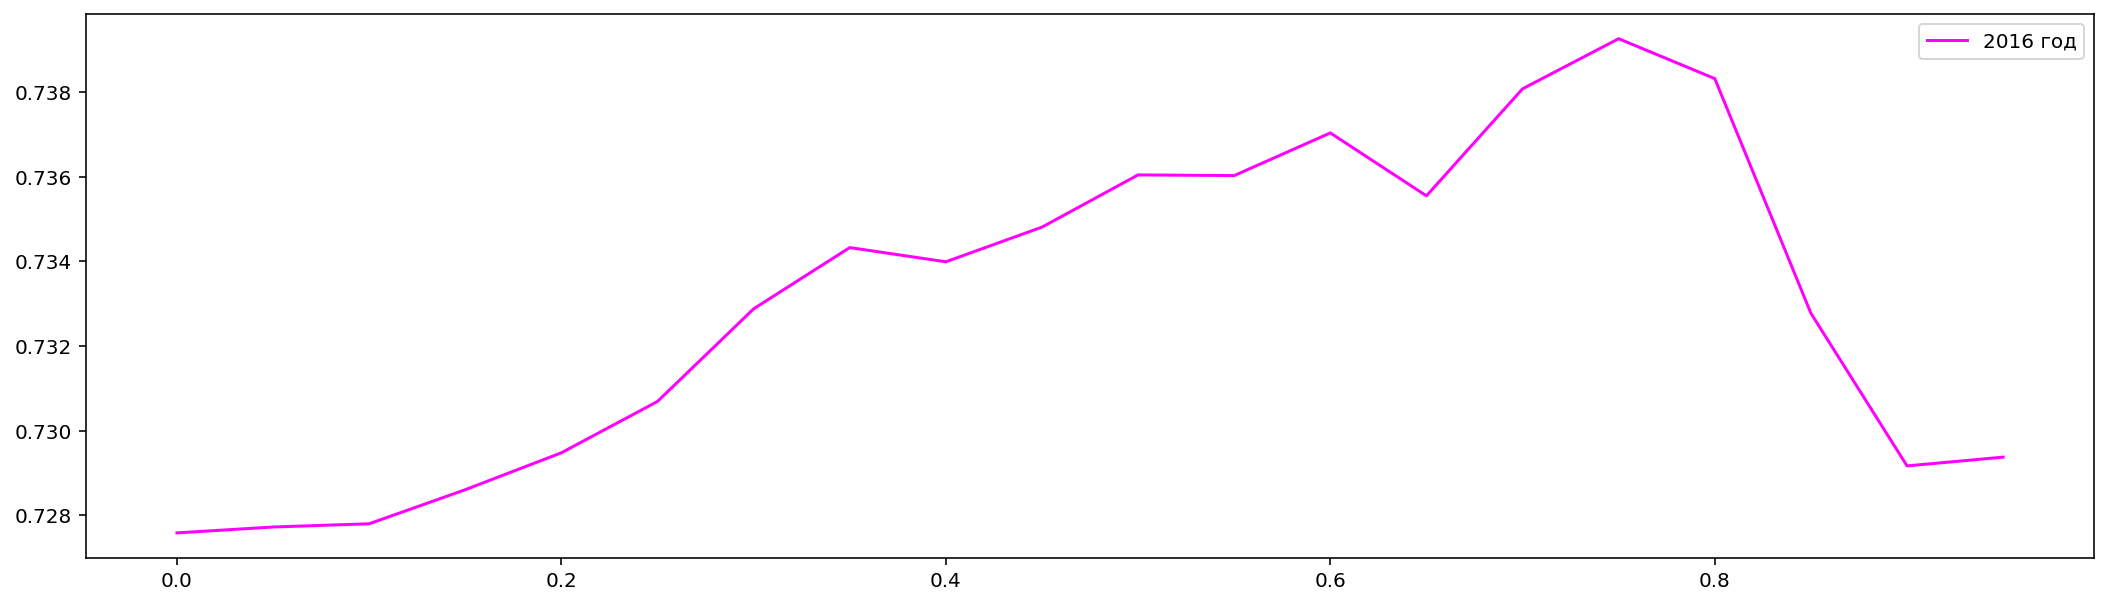

2017
roc_auc = 0.51
Time to train = 96.76 seconds
максимальная точность 0.6048884998157021


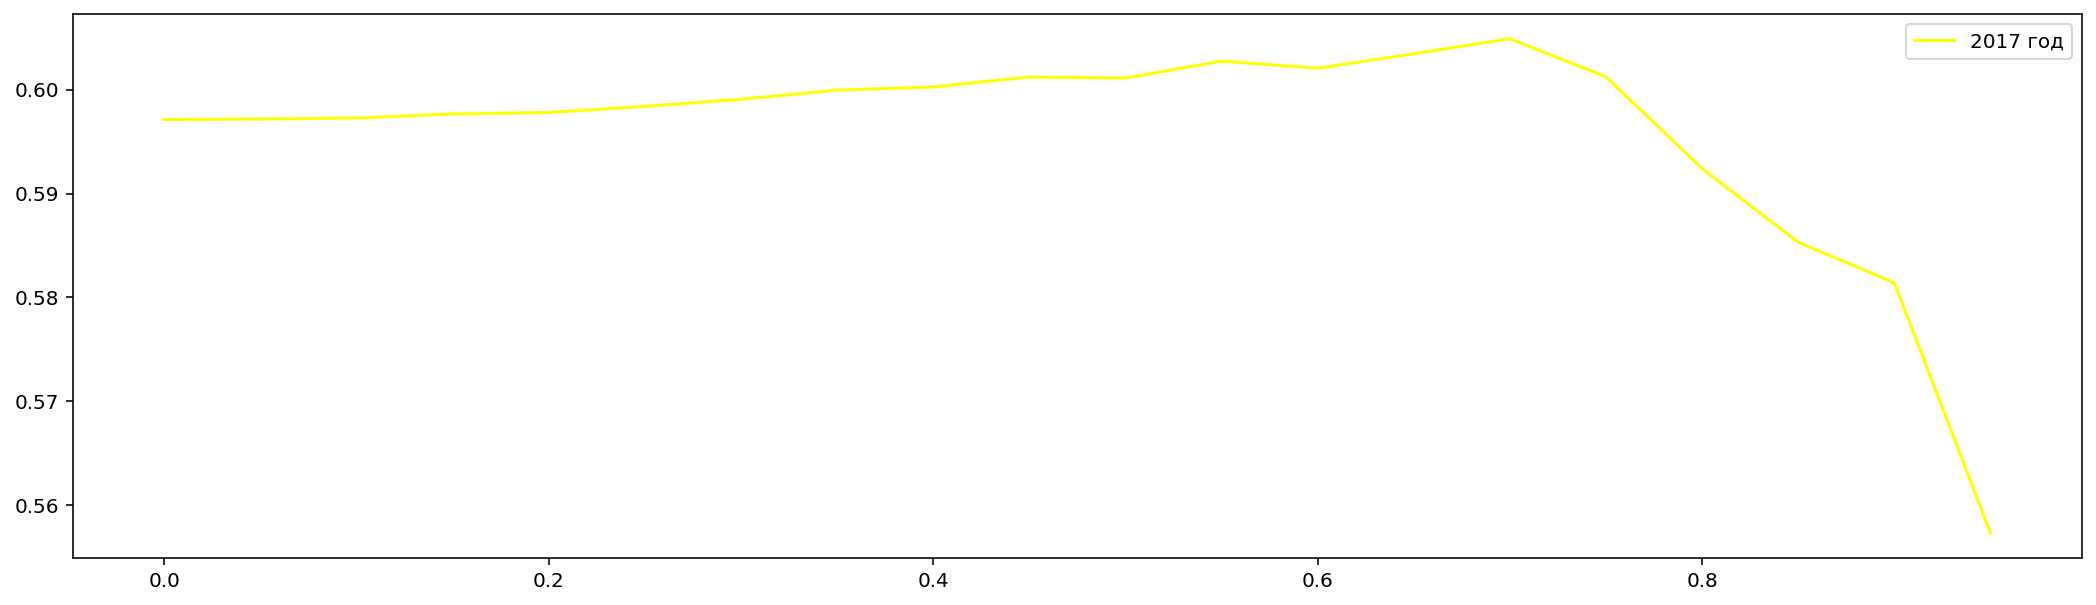

2018
roc_auc = 0.51
Time to train = 129.03 seconds
максимальная точность 0.5370233702337024


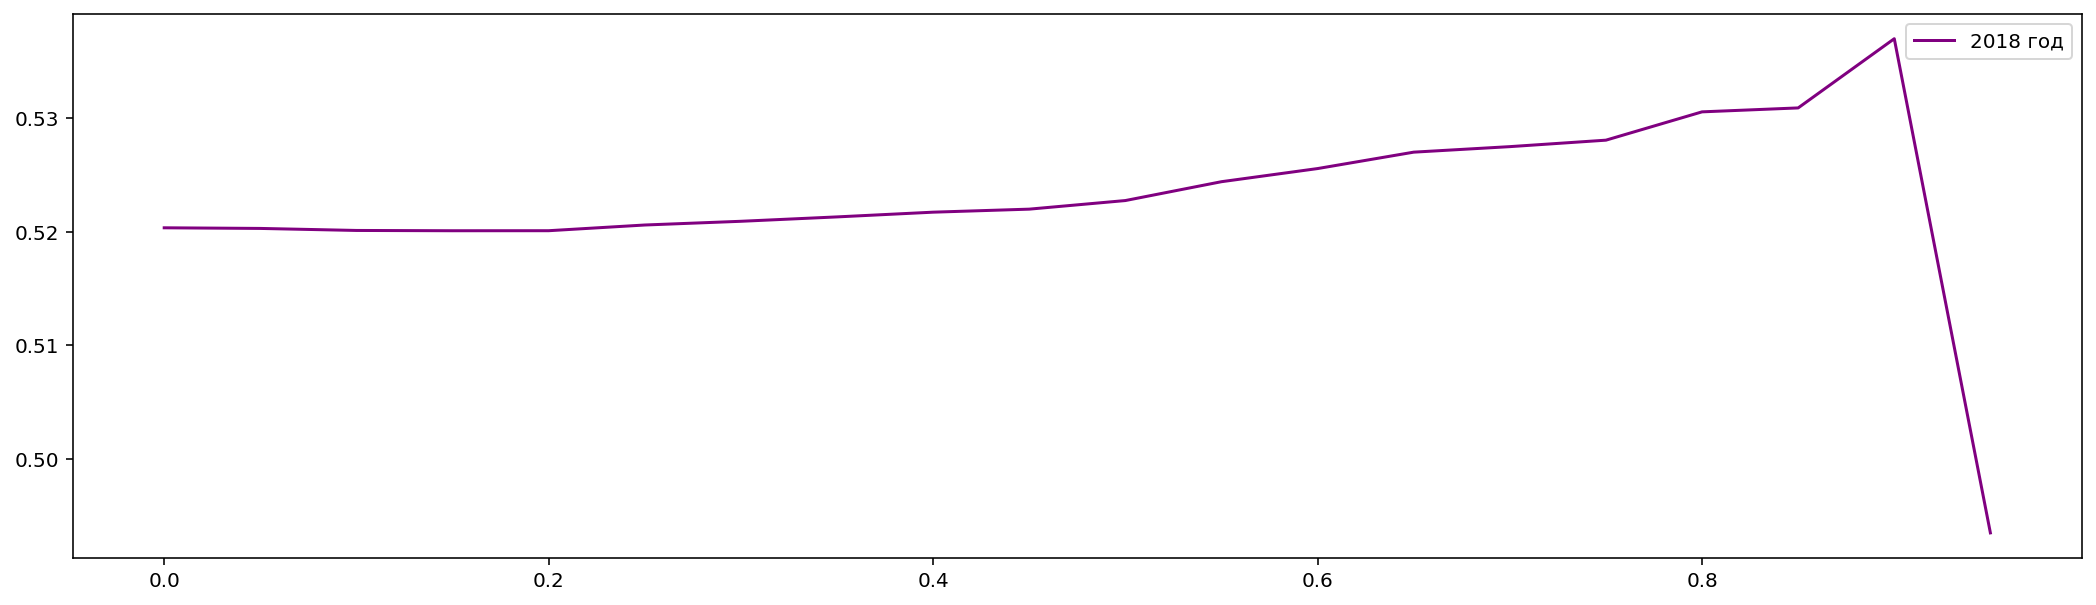

2019
roc_auc = 0.51
Time to train = 168.41 seconds
максимальная точность 0.6176470588235294


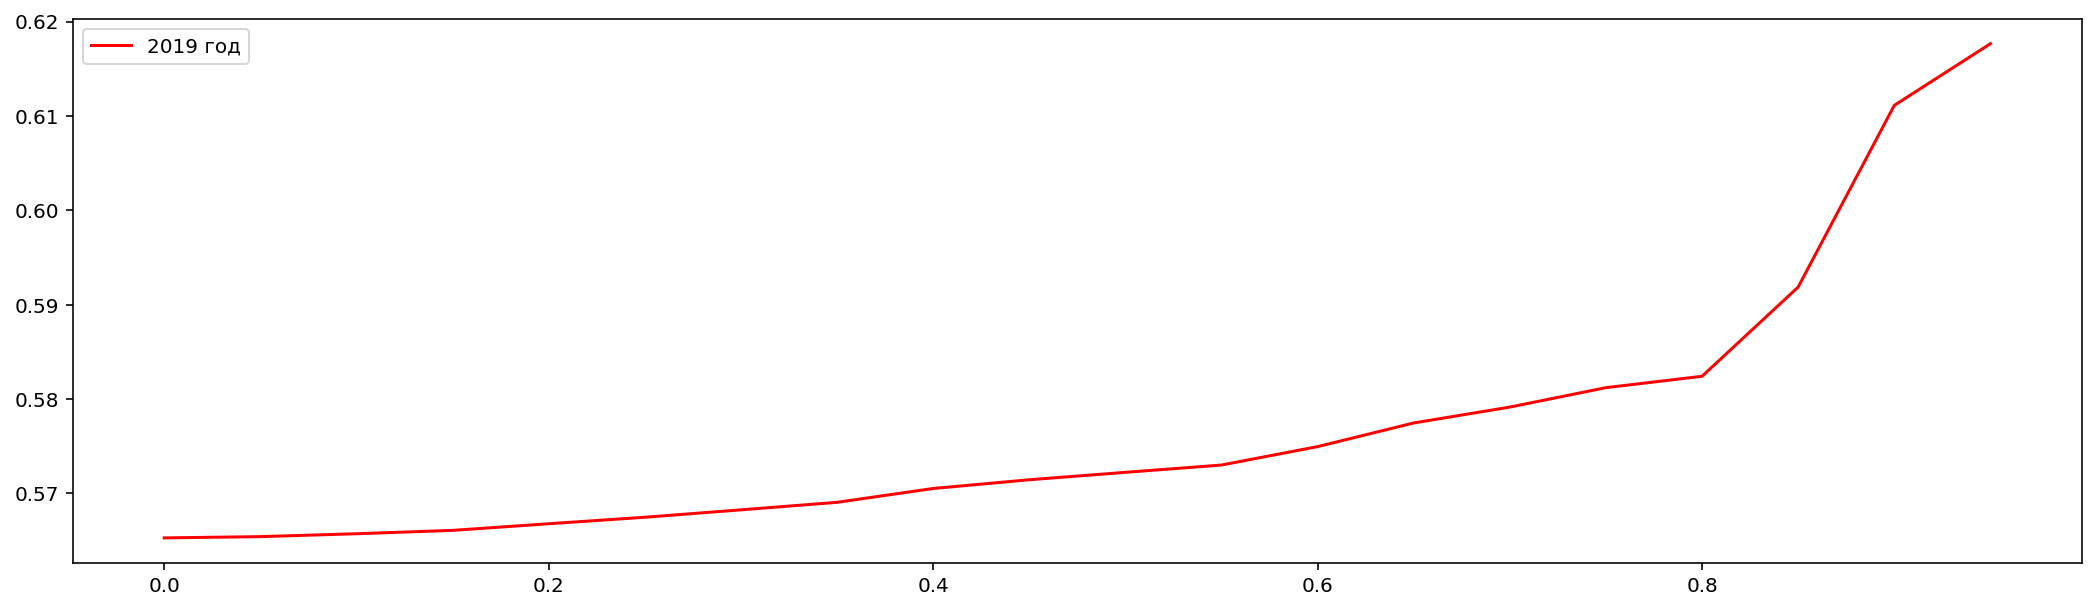

2020
roc_auc = 0.52
Time to train = 214.30 seconds
максимальная точность 0.7797695262483995


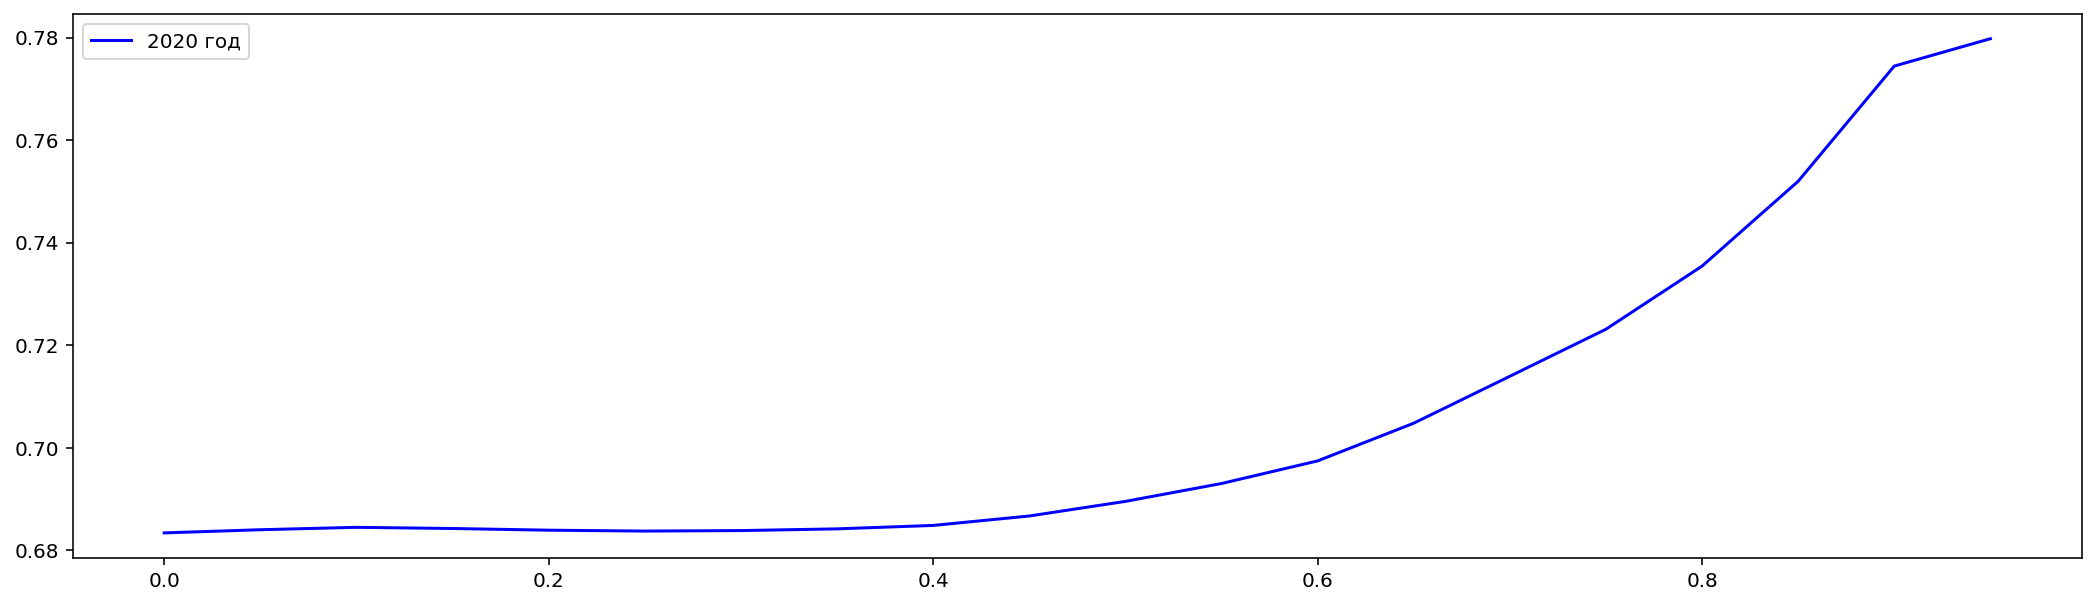

2021
roc_auc = 0.51
Time to train = 318.66 seconds
максимальная точность 0.731245923026745


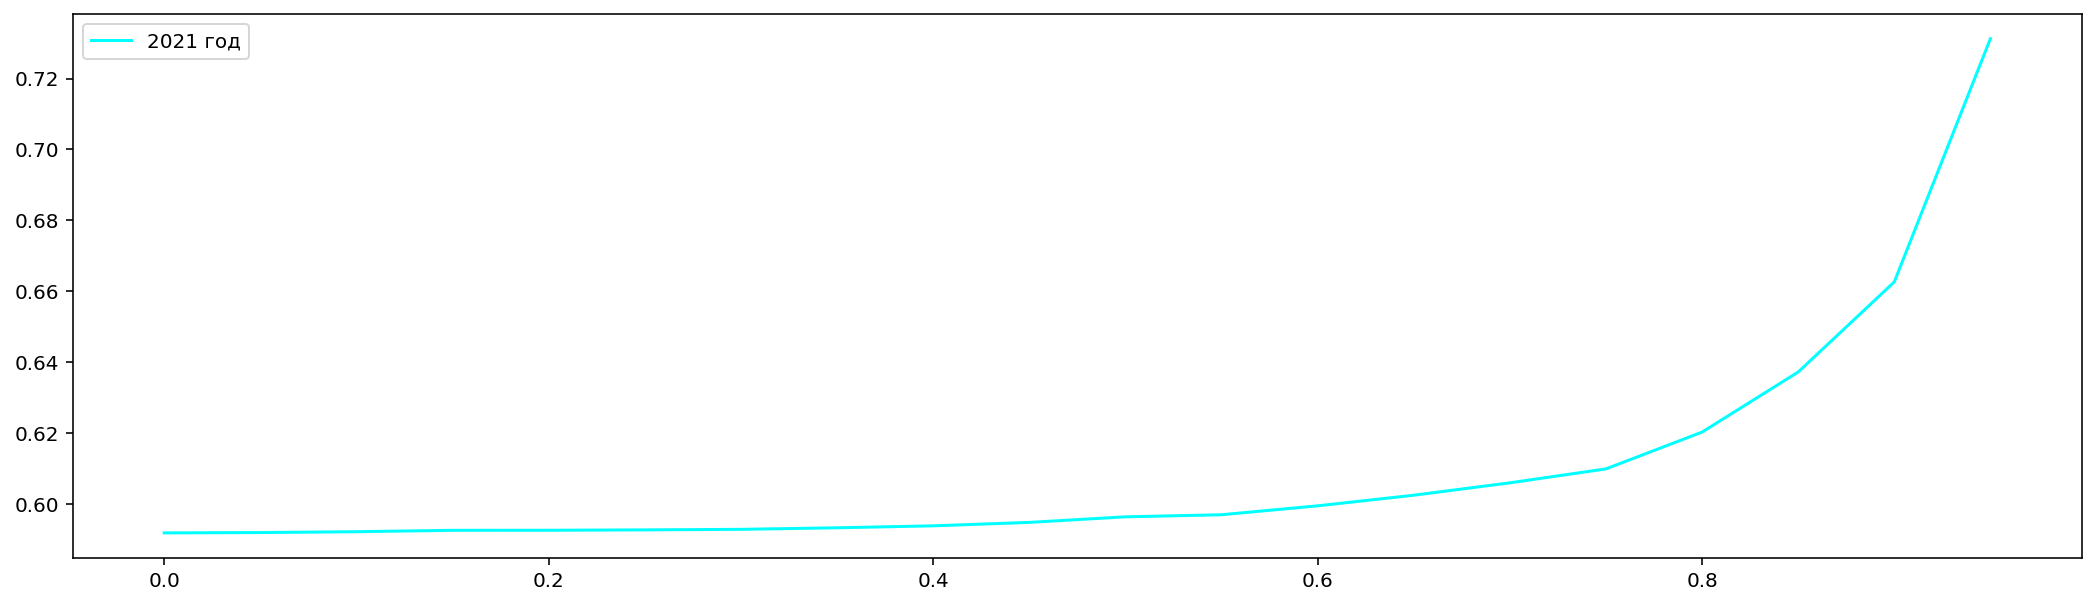

2022
roc_auc = 0.50
Time to train = 431.59 seconds
максимальная точность 0.45136516534882704


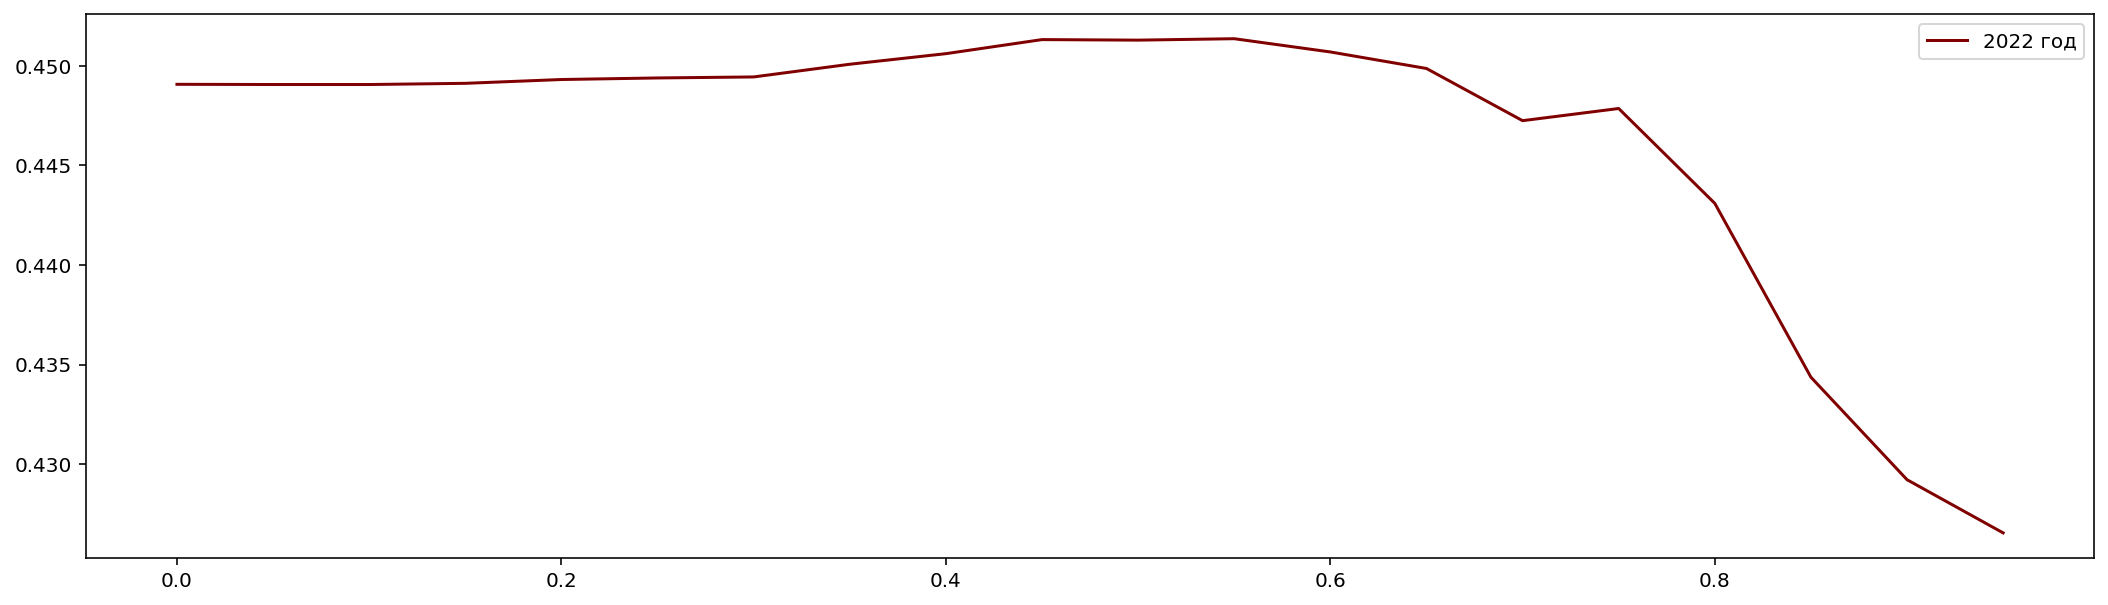

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = ExtraTreesClassifier(random_state=42, criterion='entropy', n_estimators=500)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

2014
roc_auc = 0.51
Time to train = 9.96 seconds
максимальная точность 0.6460459968023613


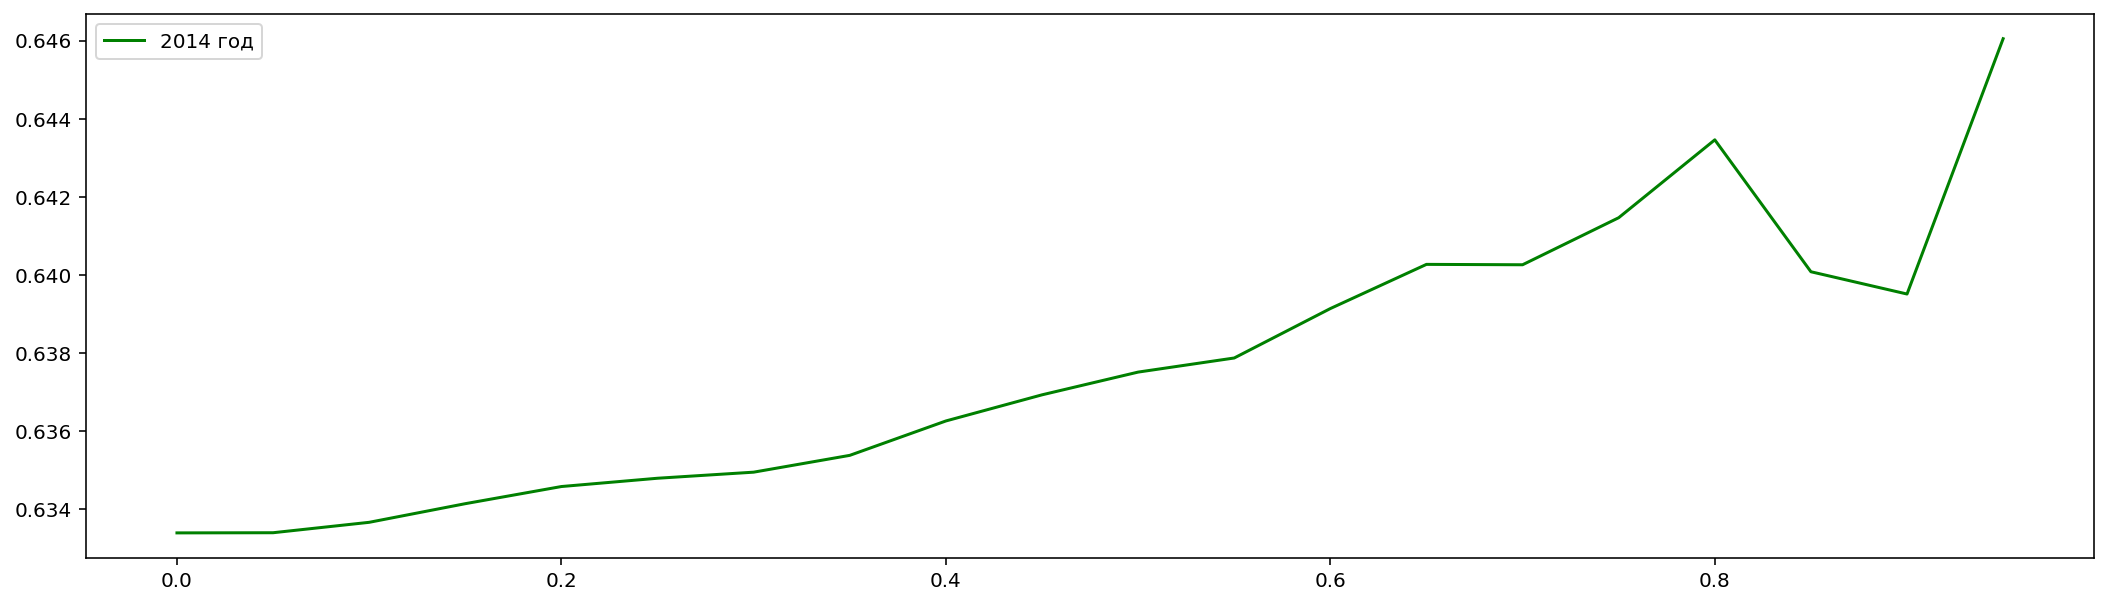

2015
roc_auc = 0.51
Time to train = 32.76 seconds
максимальная точность 0.466030989272944


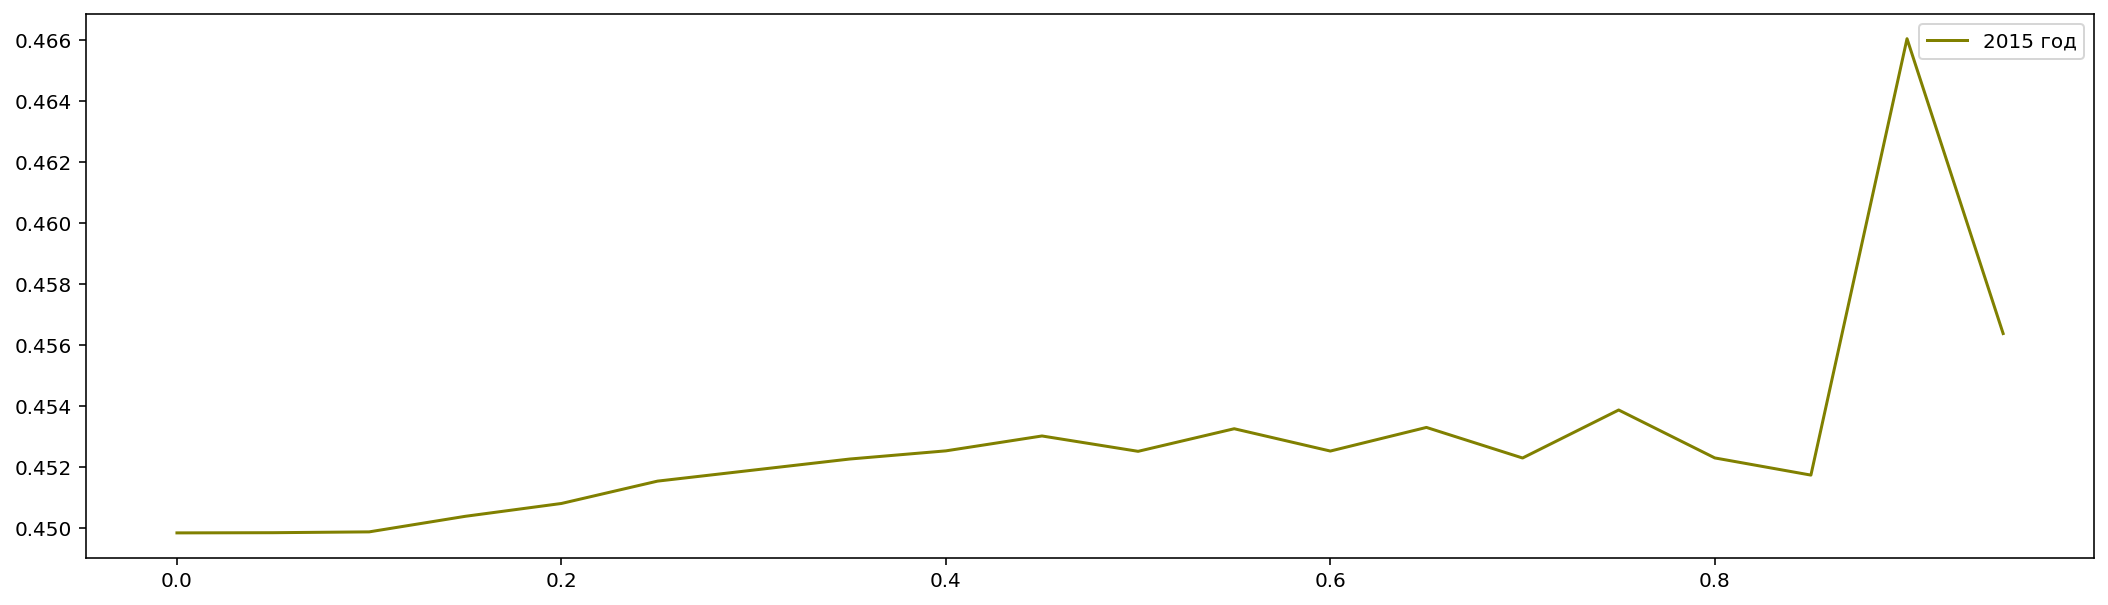

2016
roc_auc = 0.51
Time to train = 64.69 seconds
максимальная точность 0.7337142106645653


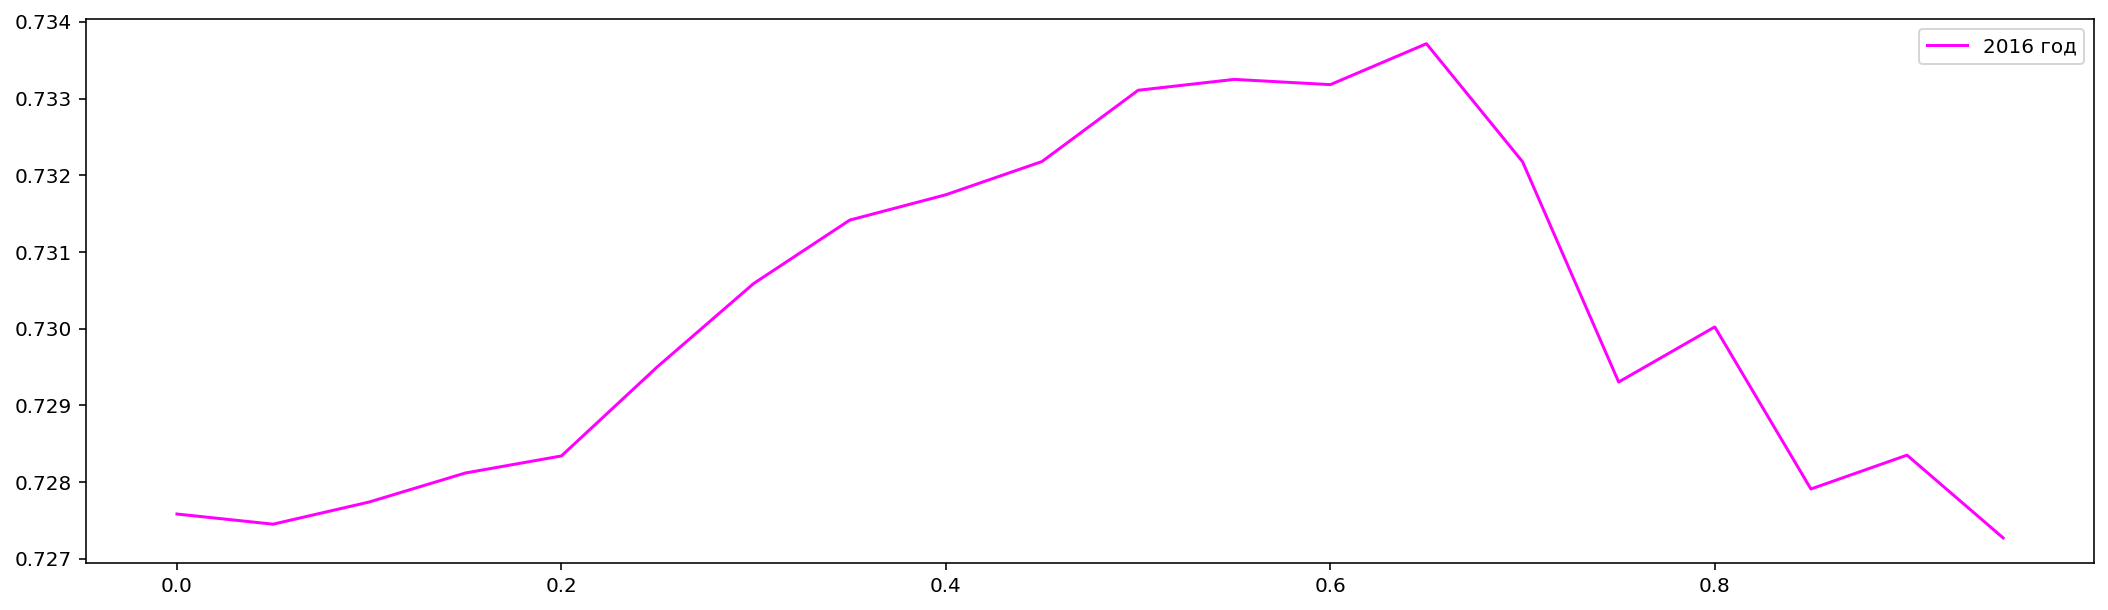

2017
roc_auc = 0.50
Time to train = 97.15 seconds
максимальная точность 0.6916299559471366


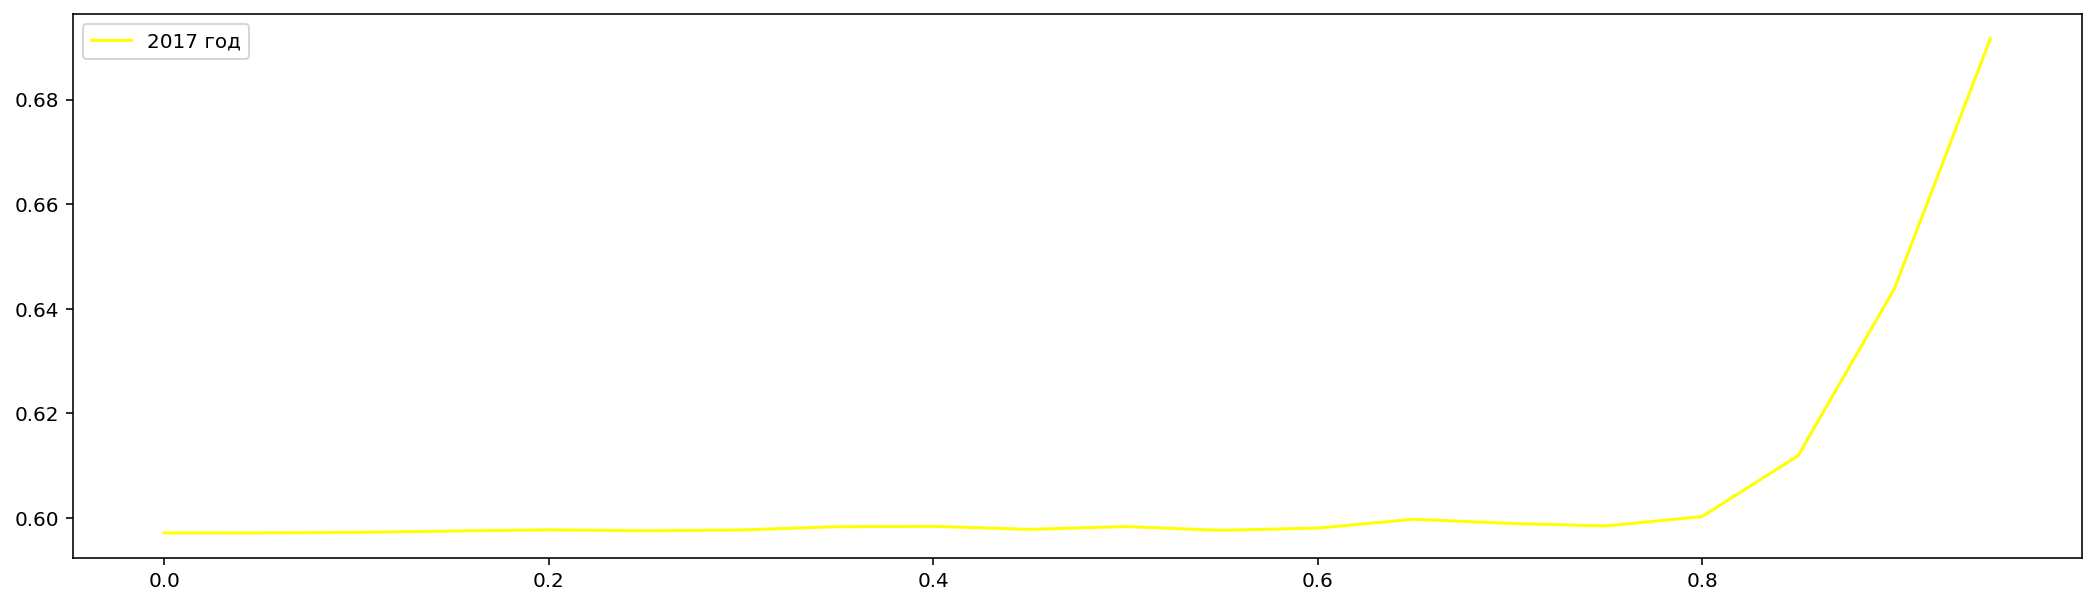

2018
roc_auc = 0.50
Time to train = 130.76 seconds
максимальная точность 0.5286312849162011


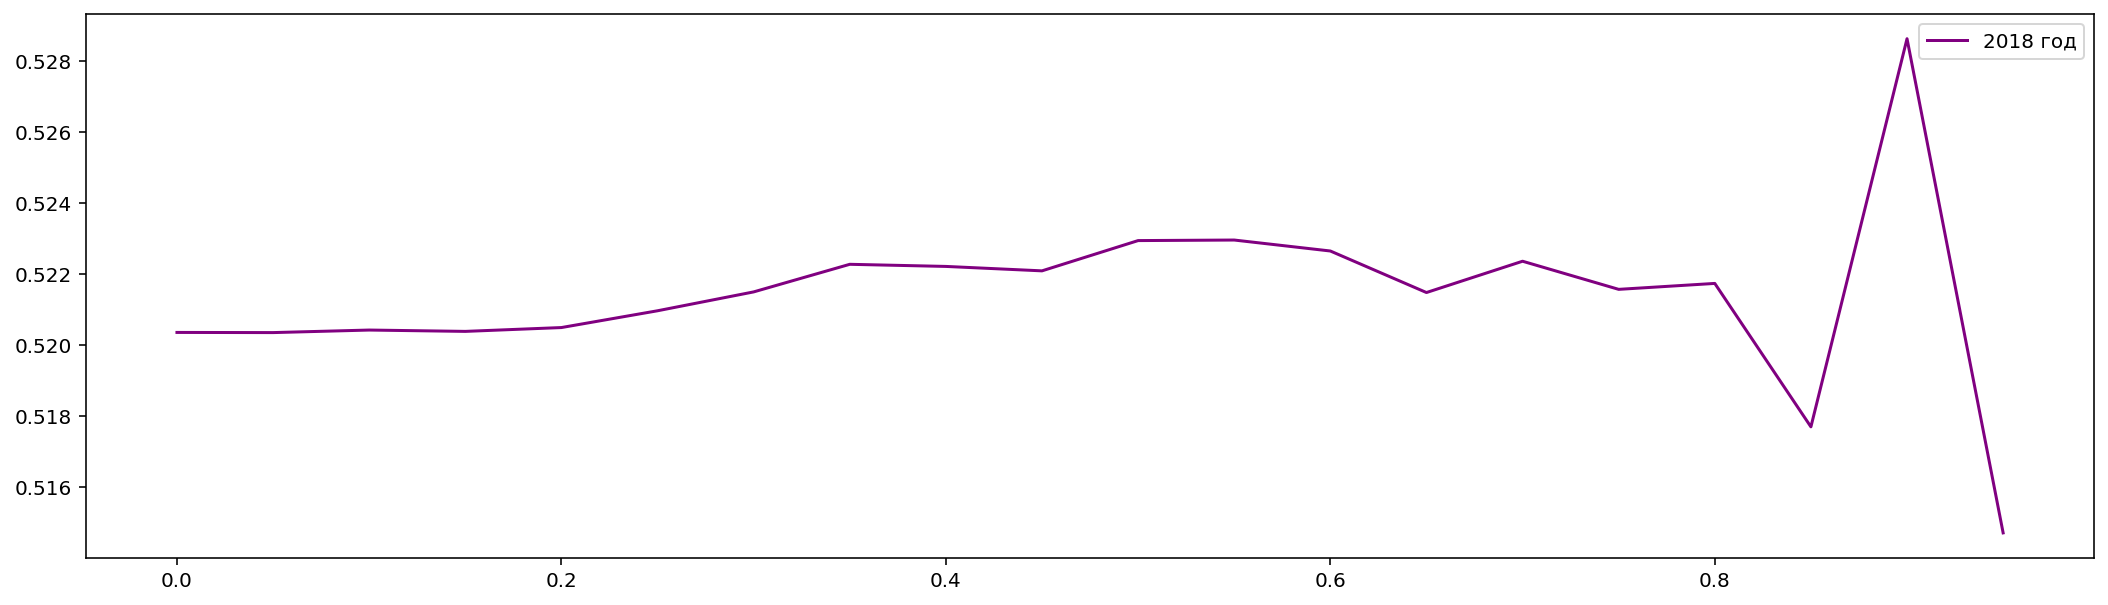

2019
roc_auc = 0.51
Time to train = 169.95 seconds
максимальная точность 0.5764154745113842


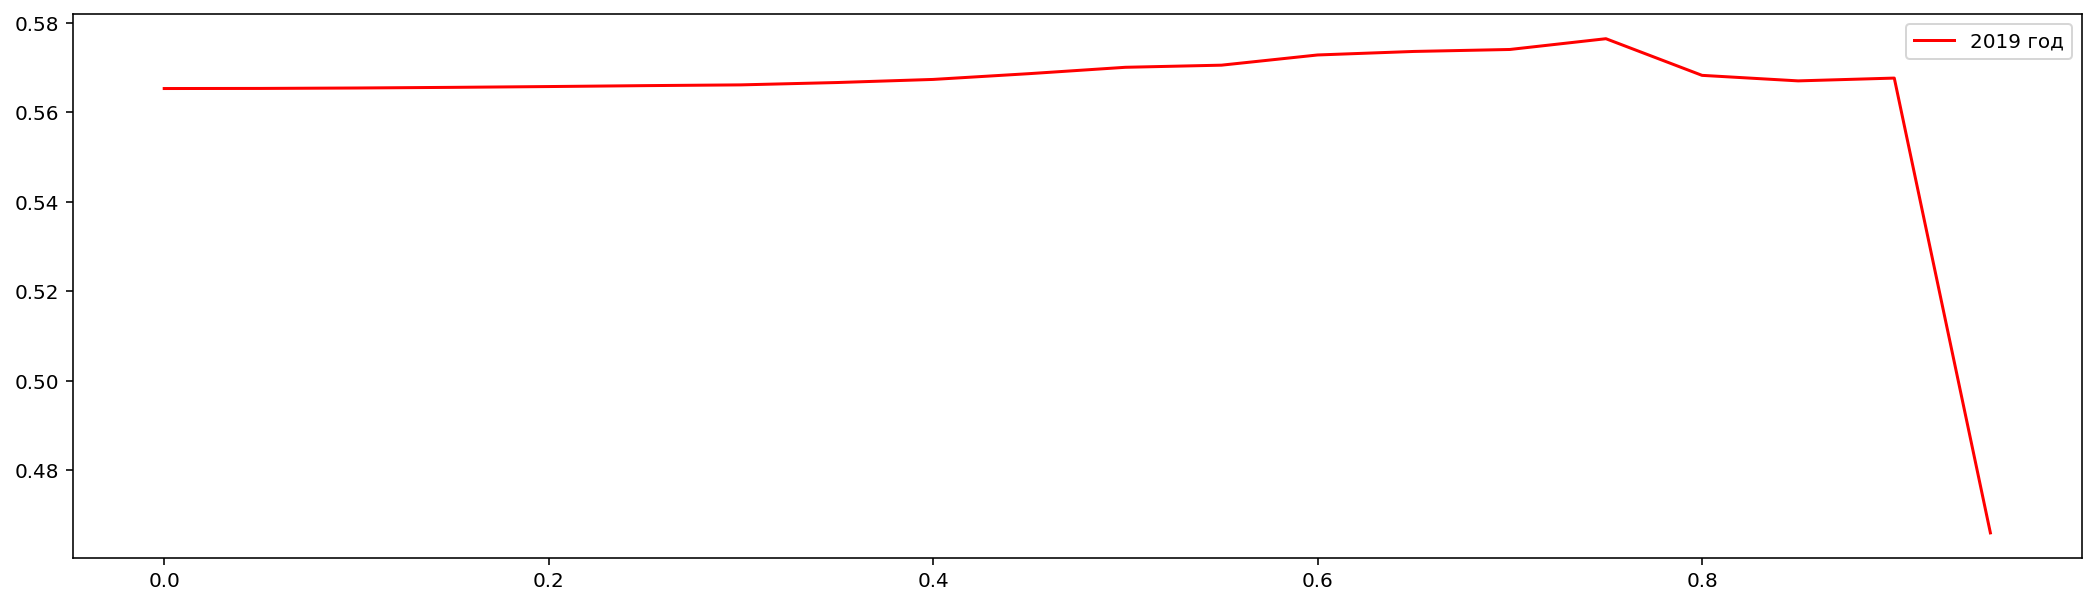

2020
roc_auc = 0.51
Time to train = 224.92 seconds
максимальная точность 0.7788252356780275


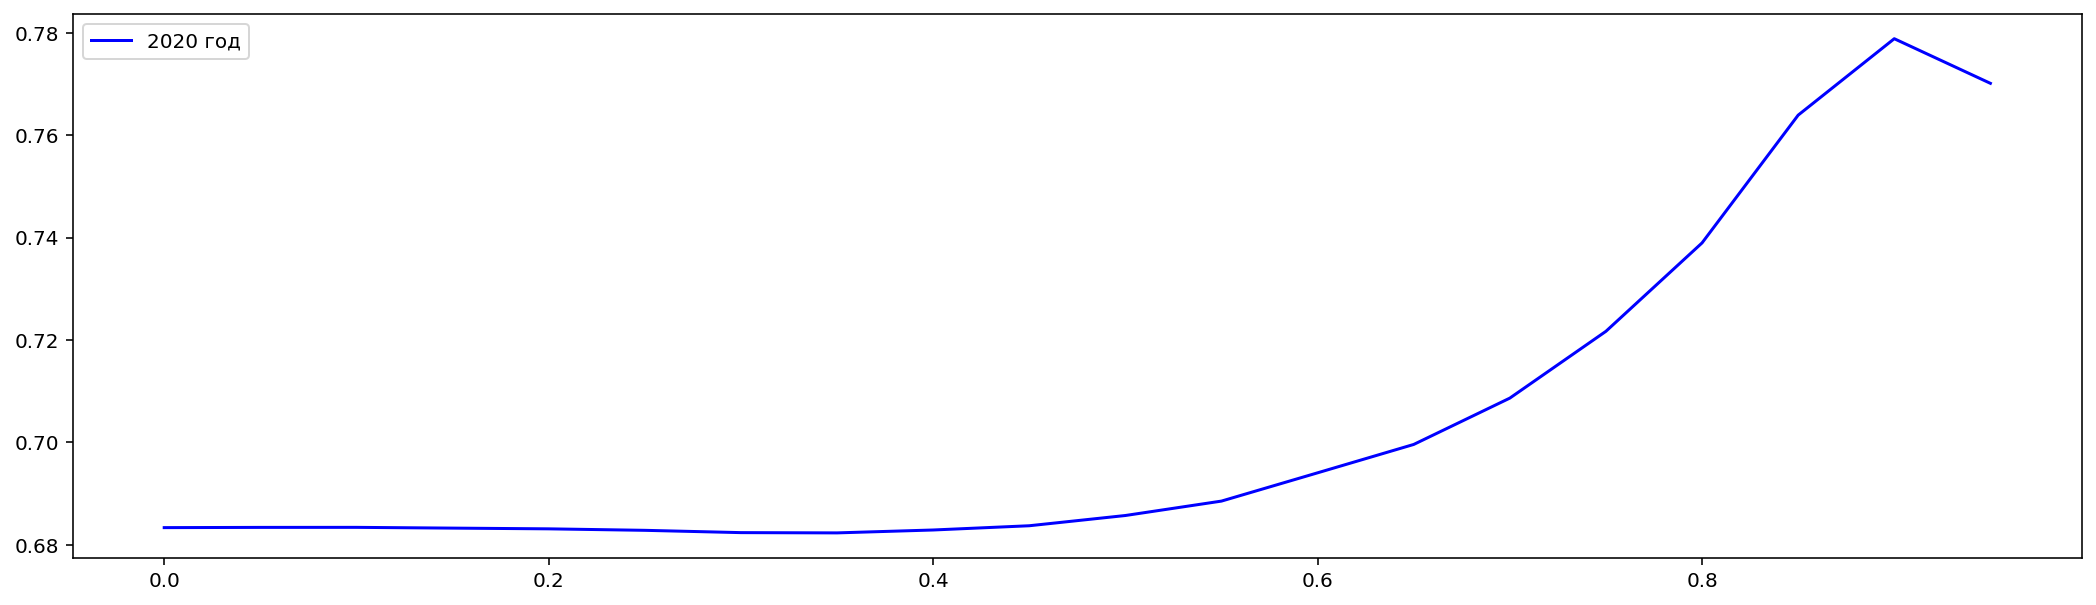

2021
roc_auc = 0.51
Time to train = 337.38 seconds
максимальная точность 0.6563573883161512


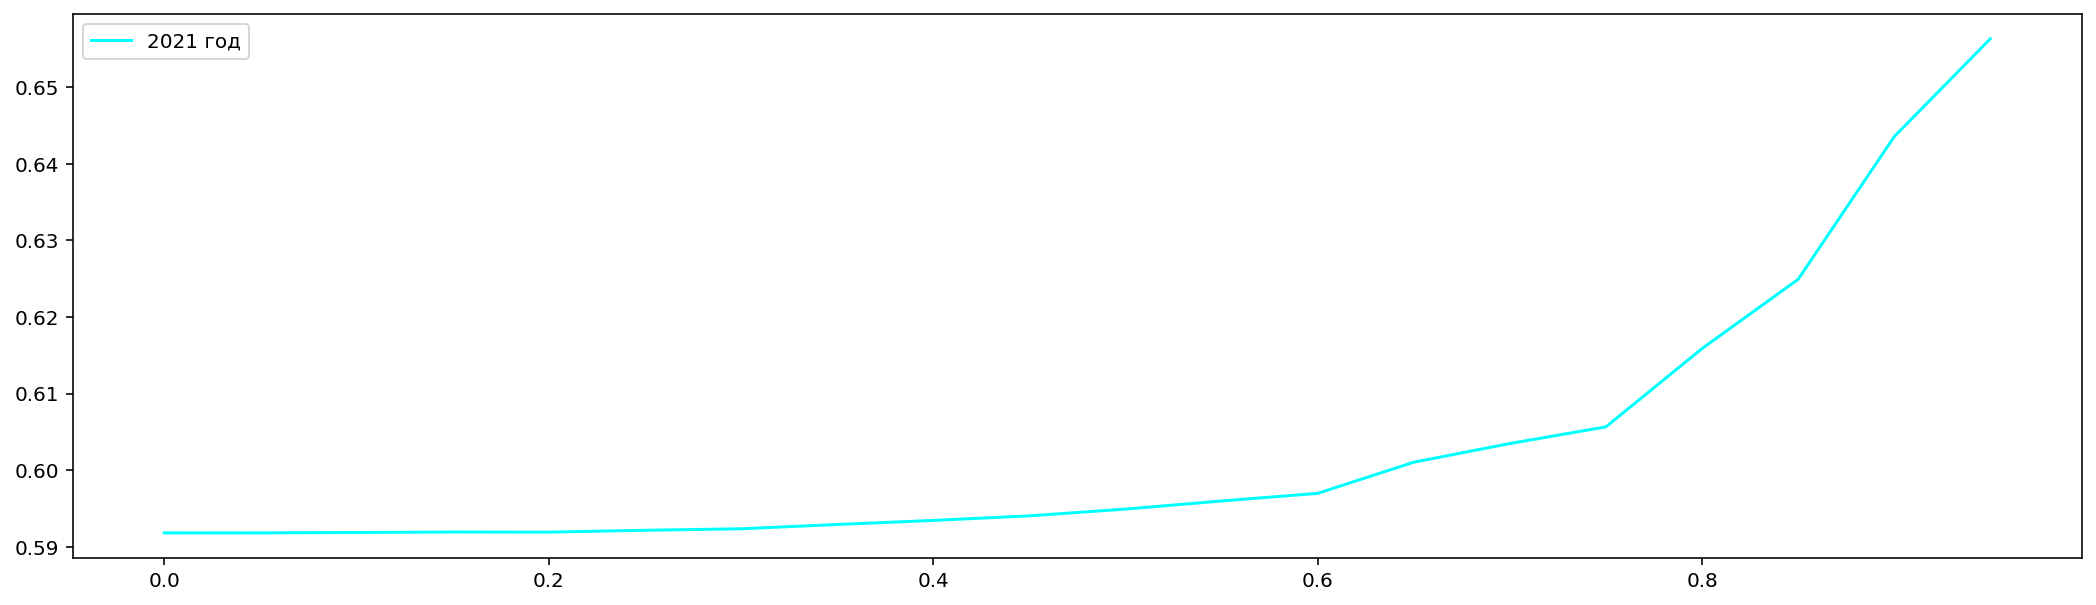

2022
roc_auc = 0.51
Time to train = 478.69 seconds
максимальная точность 0.4581024539183535


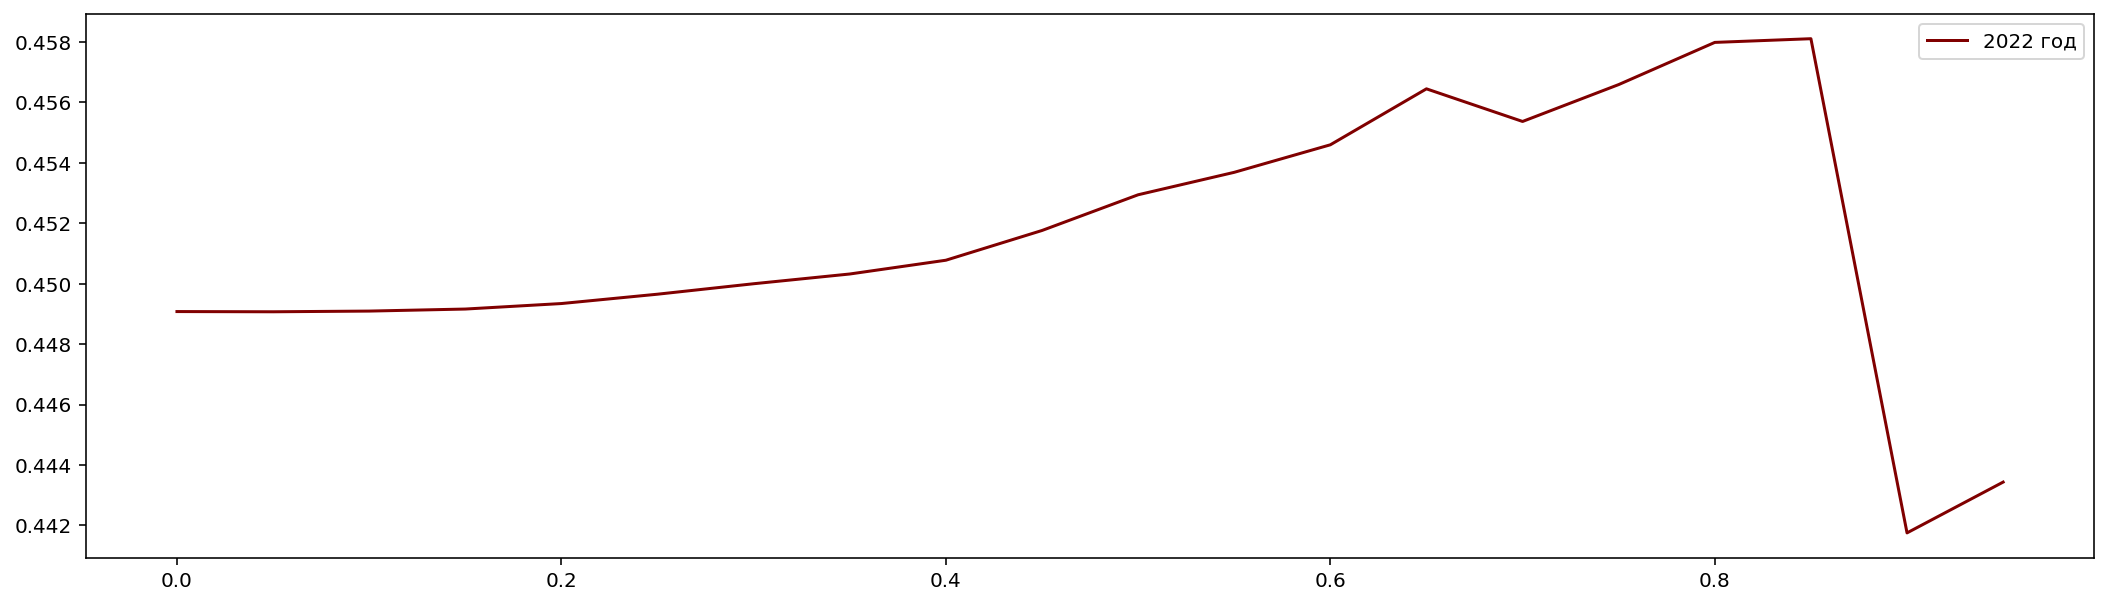

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB




colors = {2014: 'green', 2015: 'olive', 2016: 'magenta', 2017: 'yellow', 2018: 'purple',
         2019: 'red', 2020: 'blue', 2021: 'cyan', 2022: 'maroon'}
for i in range (2013, 2022):
    train = s_edit[(s_edit.index.year <= i)]
    test = s_edit[s_edit.index.year == i + 1]
    X_train = train.drop(columns=['value'])
    X_test = test.drop(columns=['value'])
    y_train = train['value']
    y_test = test['value']
    
    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    std_scaled = std_scaler.transform(X_train)
    std_scaled_test = std_scaler.transform(X_test)
    X_train[X_train.columns] = std_scaled
    X_test[X_test.columns] = std_scaled_test
    
    
    t0 = time.time()
    lr_model = ExtraTreesClassifier(random_state=42, criterion='entropy', n_estimators=500)
    lr_model.fit(X_train, y_train)


    lr_y = y_test.values

    lr_y_pred = lr_model.predict_proba(X_test)
    tF = time.time()


    lr_rocauc = roc_auc_score(y_test, lr_y_pred[:,1])
    print(str(i+1))
    print('roc_auc = %.2f' % lr_rocauc)
    print('Time to train = %.2f seconds' % (tF - t0))## RMSE = 3.84
    probs_val = lr_y_pred[:,1]
    precision = []
    max_prec = 0
    for j in np.arange(0,1,0.05):
        
        cl = (probs_val > j).astype(int)
        precision.append(precision_score(y_test, cl))
        
        if (precision_score(y_test, cl) > max_prec):
            max_prec = precision_score(y_test, cl)
    print(f'максимальная точность {max_prec}')
    color = colors[i+1]
    plt.plot(np.arange(0,1,0.05), precision, color=color, label=f'{i+1} год')
    plt.legend()
    plt.show()

In [ ]:
s = pd.read_csv('D:\\Michael\\Data\\Trinity\\Trinity_Value_stocks.csv', 
                index_col=1, 
                parse_dates=True)
s = s.drop(columns=['Month', 'MC', 'Day_of_week', 'SMA', 'VQ', 'SmithRank', 'GV_value', 'Trend', 'daysInSSI'])

s.dropna(inplace=True)
s

In [4]:
# загрузим данные
import warnings
warnings.filterwarnings('ignore')
import time
import itertools
import datetime
from IPython.display import clear_output
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score


    
s = pd.read_csv('D:\\Michael\\Data\\Trinity\\Trinity_Value_stocks.csv', 
                index_col=1, 
                parse_dates=True)
s = s.drop(columns=['Month', 'Day_of_week', 'SMA', 'VQ', 'SmithRank', 'GV_value', 'Trend', 'daysInSSI'])

s.dropna(inplace=True)

percent_profit = pd.DataFrame(columns=['Ticker', 'Business_Quality', 'GV_rank', 'Slope_of_trend', 'MC', 'Prediction'])
for j in range(2014,2023):
    clear_output(wait = True)
    print(f'{j} год')
    train = s[(s.index.year < j)]
    test = s[(s.index.year == j)]
    X_test = test.drop(columns=['Ticker', 'value', 'MC'])
    X_train = train.drop(columns=['value', 'Ticker', 'MC'])
    y_train = train['value']



    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    X_train[X_train.columns] = std_scaler.transform(X_train)
    X_test[X_test.columns] = std_scaler.transform(X_test)




    lr_model = ExtraTreesClassifier(random_state=42, criterion='entropy', n_estimators=500)
    lr_model.fit(X_train, y_train)



    lr_y_pred = lr_model.predict_proba(X_test)
    probs_val = lr_y_pred[:,1]
    test['Ticker'] = test.Ticker + "_TRINITY"
    test['MC'] = test.MC
    test['Prediction'] = np.round(probs_val * 100, 2)
    test = test.drop(columns=['value'])
    percent_profit = percent_profit.append(test)

result = pd.DataFrame(columns=['Ticker','Business_Quality', 'GV_rank', 'Slope_of_trend', 'MC', 'Prediction', 'Date', 'Rank'])
percent_profit['MC'] = percent_profit.index

percent_profit['Date'] = pd.to_datetime(percent_profit['Date'], format='%Y-%m-%d')
percent_profit
# percent_profit = percent_profit.sort_values(by=['Date', 'Prediction'], ascending = False)
# dates = percent_profit['Date'].unique()
# n = 0
# for k in dates:
#     n += 1
#     clear_output(wait = True)
#     print(f'{j} год, запроцешено: {n/len(dates)}')
#     dat = percent_profit[percent_profit['Date'] == k]
#     dat['Rank'] = np.arange(1, len(dat)+1)

#     result = result.append(dat)
# result.to_csv('D:\\Michael\\Data\\Trinity\\Trinity_Ranks_basic(GV_rank).csv', index=False)
        
# result
   

2022 год


MemoryError: could not allocate 117440512 bytes

In [ ]:
# загрузим данные
import warnings
warnings.filterwarnings('ignore')
import time
import itertools
import datetime
from IPython.display import clear_output



    
s = pd.read_csv('D:\\Michael\\Data\\Trinity\\Trinity_Value_stocks.csv', 
                index_col=1, 
                parse_dates=True)
s = s.drop(columns=['Month', 'MC', 'Day_of_week', 'SMA', 'VQ', 'SmithRank', 'GV_rank', 'Trend', 'daysInSSI'])

s.dropna(inplace=True)

percent_profit = pd.DataFrame(columns=['Ticker','Business_Quality', 'GV_rank', 'Slope_of_trend', 'Prediction'])
for j in range(2014,2023):
    clear_output(wait = True)
    print(f'{j} год')
    train = s[(s.index.year < j)]
    test = s[(s.index.year == j)]
    X_test = test.drop(columns=['Ticker', 'value'])
    X_train = train.drop(columns=['value', 'Ticker'])
    y_train = train['value']



    std_scaler = MinMaxScaler()
    std_scaler.fit(X_train)
    X_train[X_train.columns] = std_scaler.transform(X_train)
    X_test[X_test.columns] = std_scaler.transform(X_test)




    lr_model = ExtraTreesClassifier(random_state=42, criterion='entropy', n_estimators=500)
    lr_model.fit(X_train, y_train)



    lr_y_pred = lr_model.predict_proba(X_test)
    probs_val = lr_y_pred[:,1]
    test['Ticker'] = test.Ticker + "_TRINITY"
    test['predict_' + str(i) + '%'] = np.round(probs_val * 100, 2)
    test = test.drop(columns=['value'])
    percent_profit = percent_profit.append(test)

result = pd.DataFrame(columns=['Ticker','Business_Quality', 'GV_rank', 'Slope_of_trend', 'Prediction', 'Date', 'Rank'])

percent_profit['Date'] = percent_profit.index
percent_profit['Date'] = pd.to_datetime(percent_profit['Date'], format='%Y-%m-%d')
percent_profit = percent_profit.sort_values(by=['Date', 'Prediction'], ascending = False)
dates = percent_profit['Date'].unique()
n = 0
for k in dates:
    n += 1
    clear_output(wait = True)
    print(f'{j} год, запроцешено: {n/len(dates)}')
    dat = percent_profit[percent_profit['Date'] == k]
    dat['rank'] = np.arange(1, len(dat)+1)

    result = result.append(dat)
result.to_csv('D:\\Michael\\Data\\Trinity\\Trinity_Ranks_basic(GV_rank).csv', index=False)
        
result
   

In [2]:
df = pd.read_csv('D:\\Michael\\Data\\Trinity\\Trinity_Ranks_basic(GV_rank).csv')
df

Ticker  Business_Quality  GV_rank  Slope_of_trend  Prediction  \
0        HLLY_TRINITY             -0.23   567.00            0.41       97.80   
1        BRMK_TRINITY              0.09   530.00            0.60       96.00   
2         HAL_TRINITY             -0.00   535.00            1.36       95.60   
3         ACT_TRINITY              0.33   652.00            1.02       95.40   
4         EBS_TRINITY             -0.34   573.00            0.59       94.40   
...               ...               ...      ...             ...         ...   
1182267   YUM_TRINITY              0.80   256.00            1.07        7.40   
1182268   SPH_TRINITY             -0.31   384.00            1.00        7.20   
1182269     X_TRINITY             -0.61   390.00            1.61        6.40   
1182270   BKE_TRINITY              1.07   452.00            1.02        6.20   
1182271   MHO_TRINITY             -0.24   298.00            1.24        4.20   

               Date  Rank  
0        2022-12-30     1  
1        2022-12-30     2  
2        2022-12-30     3  
3        2022-12-30     4  
4        2022-12-30     5  
...             ...   ...  
1182267  2014-01-02   359  
1182268  2014-01-02   360  
1182269  2014-01-02   361  
1182270  2014-01-02   362  
1182271  2014-01-02   363  

[1182272 rows x 7 columns]